In [7]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [10]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [11]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 2 # 1 for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 7 # 5 for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000 # 2000
params.nV = 200  # 200
params.nD = 1600
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [12]:
sim = MaaSSim.simulators.simulate_rldqn_case1_rev(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING,file_res='../../rl_results/ams_prop_exp_002_1600.csv',stp=0.05,initial_comm_rate=0.5)

This simulation uses albatros data


[2023-02-28 01:07:58,482] Setting up 4h simulation at 2023-02-27 23:07:34 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


stp is:  0.05
type(stp):  <class 'float'>
initial comm rate:  0.5
type(comm_rate):  <class 'numpy.float64'>
----------------> day: 0 of 1600 <--------------------


[2023-02-28 01:08:06,730] simulation time 3.5 s


day:  0 , nP:  0 , nV:  0 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  0.0 , new nP:  0 , new nV:  0 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 1100.0
----------------> day: 1 of 1600 <--------------------


[2023-02-28 01:08:15,560] simulation time 4.0 s


day:  1 , nP:  0 , nV:  0 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  46.56 , new nP:  10 , new nV:  0 , plat_rev: 46.56 , plat_rev_wod: 46.56 , marketing_cost: 1100.0
----------------> day: 2 of 1600 <--------------------


[2023-02-28 01:08:24,050] simulation time 3.8 s


day:  2 , nP:  10 , nV:  0 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  47.75 , new nP:  11 , new nV:  4 , plat_rev: 47.75 , plat_rev_wod: 47.75 , marketing_cost: 1100.0
----------------> day: 3 of 1600 <--------------------


[2023-02-28 01:08:32,933] simulation time 3.9 s


day:  3 , nP:  11 , nV:  4 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  93.0 , new nP:  21 , new nV:  1 , plat_rev: 93.0 , plat_rev_wod: 93.0 , marketing_cost: 1100.0
----------------> day: 4 of 1600 <--------------------


[2023-02-28 01:08:41,985] simulation time 4.0 s


day:  4 , nP:  21 , nV:  1 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  174.14 , new nP:  32 , new nV:  1 , plat_rev: 174.14 , plat_rev_wod: 174.14 , marketing_cost: 1100.0
----------------> day: 5 of 1600 <--------------------


[2023-02-28 01:08:51,128] simulation time 4.4 s


day:  5 , nP:  32 , nV:  1 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  151.71 , new nP:  31 , new nV:  4 , plat_rev: 151.71 , plat_rev_wod: 151.71 , marketing_cost: 1100.0
----------------> day: 6 of 1600 <--------------------


[2023-02-28 01:09:00,183] simulation time 4.1 s


day:  6 , nP:  31 , nV:  4 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  199.8 , new nP:  38 , new nV:  1 , plat_rev: 199.8 , plat_rev_wod: 199.8 , marketing_cost: 1100.0
----------------> day: 7 of 1600 <--------------------


[2023-02-28 01:09:10,989] simulation time 4.7 s


day:  7 , nP:  38 , nV:  1 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  217.18 , new nP:  41 , new nV:  7 , plat_rev: 217.18 , plat_rev_wod: 217.18 , marketing_cost: 1100.0
----------------> day: 8 of 1600 <--------------------


[2023-02-28 01:09:20,703] simulation time 4.9 s


day:  8 , nP:  41 , nV:  7 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  321.86 , new nP:  55 , new nV:  5 , plat_rev: 321.86 , plat_rev_wod: 321.86 , marketing_cost: 1100.0
----------------> day: 9 of 1600 <--------------------


[2023-02-28 01:09:30,469] simulation time 4.7 s


day:  9 , nP:  55 , nV:  5 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  242.01 , new nP:  48 , new nV:  4 , plat_rev: 242.01 , plat_rev_wod: 242.01 , marketing_cost: 1100.0
----------------> day: 10 of 1600 <--------------------


[2023-02-28 01:09:40,500] simulation time 5.0 s


day:  10 , nP:  48 , nV:  4 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  313.86 , new nP:  55 , new nV:  8 , plat_rev: 313.86 , plat_rev_wod: 313.86 , marketing_cost: 1100.0
----------------> day: 11 of 1600 <--------------------


[2023-02-28 01:09:50,451] simulation time 5.2 s


day:  11 , nP:  55 , nV:  8 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  403.76 , new nP:  67 , new nV:  5 , plat_rev: 403.76 , plat_rev_wod: 403.76 , marketing_cost: 1100.0
----------------> day: 12 of 1600 <--------------------


[2023-02-28 01:10:00,221] simulation time 4.8 s


day:  12 , nP:  67 , nV:  5 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  244.27 , new nP:  46 , new nV:  7 , plat_rev: 244.27 , plat_rev_wod: 244.27 , marketing_cost: 1100.0
----------------> day: 13 of 1600 <--------------------


[2023-02-28 01:10:09,988] simulation time 4.9 s


day:  13 , nP:  46 , nV:  7 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  275.42 , new nP:  48 , new nV:  6 , plat_rev: 275.42 , plat_rev_wod: 275.42 , marketing_cost: 1100.0
----------------> day: 14 of 1600 <--------------------


[2023-02-28 01:10:19,972] simulation time 5.2 s


day:  14 , nP:  48 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  395.96 , new nP:  62 , new nV:  7 , plat_rev: 395.96 , plat_rev_wod: 395.96 , marketing_cost: 1100.0
----------------> day: 15 of 1600 <--------------------


[2023-02-28 01:10:30,723] simulation time 5.4 s


day:  15 , nP:  62 , nV:  7 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  433.64 , new nP:  69 , new nV:  8 , plat_rev: 433.64 , plat_rev_wod: 433.64 , marketing_cost: 1100.0
----------------> day: 16 of 1600 <--------------------


[2023-02-28 01:10:40,796] simulation time 5.1 s


day:  16 , nP:  69 , nV:  8 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  378.89 , new nP:  62 , new nV:  6 , plat_rev: 378.89 , plat_rev_wod: 378.89 , marketing_cost: 1100.0
----------------> day: 17 of 1600 <--------------------


[2023-02-28 01:10:50,739] simulation time 5.2 s


day:  17 , nP:  62 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  415.8 , new nP:  62 , new nV:  8 , plat_rev: 415.8 , plat_rev_wod: 415.8 , marketing_cost: 1100.0
----------------> day: 18 of 1600 <--------------------


[2023-02-28 01:11:00,765] simulation time 5.1 s


day:  18 , nP:  62 , nV:  8 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  405.38 , new nP:  70 , new nV:  4 , plat_rev: 405.38 , plat_rev_wod: 405.38 , marketing_cost: 1100.0
----------------> day: 19 of 1600 <--------------------


[2023-02-28 01:11:10,663] simulation time 5.2 s


day:  19 , nP:  70 , nV:  4 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  380.43 , new nP:  65 , new nV:  5 , plat_rev: 380.43 , plat_rev_wod: 380.43 , marketing_cost: 1100.0
----------------> day: 20 of 1600 <--------------------


[2023-02-28 01:11:20,693] simulation time 5.1 s


day:  20 , nP:  65 , nV:  5 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  311.61 , new nP:  56 , new nV:  6 , plat_rev: 311.61 , plat_rev_wod: 311.61 , marketing_cost: 1100.0
----------------> day: 21 of 1600 <--------------------


[2023-02-28 01:11:31,072] simulation time 5.3 s


day:  21 , nP:  56 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  392.98 , new nP:  65 , new nV:  11 , plat_rev: 392.98 , plat_rev_wod: 392.98 , marketing_cost: 1100.0
----------------> day: 22 of 1600 <--------------------


[2023-02-28 01:11:40,853] simulation time 5.0 s


day:  22 , nP:  65 , nV:  11 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  297.86 , new nP:  53 , new nV:  6 , plat_rev: 297.86 , plat_rev_wod: 297.86 , marketing_cost: 1100.0
----------------> day: 23 of 1600 <--------------------


[2023-02-28 01:11:50,961] simulation time 5.2 s


day:  23 , nP:  53 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  372.8 , new nP:  59 , new nV:  7 , plat_rev: 372.8 , plat_rev_wod: 372.8 , marketing_cost: 1100.0
----------------> day: 24 of 1600 <--------------------


[2023-02-28 01:12:00,740] simulation time 4.9 s


day:  24 , nP:  59 , nV:  7 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  369.4 , new nP:  52 , new nV:  5 , plat_rev: 369.4 , plat_rev_wod: 369.4 , marketing_cost: 1100.0
----------------> day: 25 of 1600 <--------------------


[2023-02-28 01:12:10,432] simulation time 5.0 s


day:  25 , nP:  52 , nV:  5 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  369.02 , new nP:  53 , new nV:  6 , plat_rev: 369.02 , plat_rev_wod: 369.02 , marketing_cost: 1100.0
----------------> day: 26 of 1600 <--------------------


[2023-02-28 01:12:20,506] simulation time 5.1 s


day:  26 , nP:  53 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  378.83 , new nP:  60 , new nV:  5 , plat_rev: 378.83 , plat_rev_wod: 378.83 , marketing_cost: 1100.0
----------------> day: 27 of 1600 <--------------------


[2023-02-28 01:12:30,870] simulation time 5.6 s


day:  27 , nP:  60 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  506.69 , new nP:  79 , new nV:  10 , plat_rev: 506.69 , plat_rev_wod: 506.69 , marketing_cost: 1100.0
----------------> day: 28 of 1600 <--------------------


[2023-02-28 01:12:41,225] simulation time 5.4 s


day:  28 , nP:  79 , nV:  10 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  479.2 , new nP:  73 , new nV:  8 , plat_rev: 479.2 , plat_rev_wod: 479.2 , marketing_cost: 1100.0
----------------> day: 29 of 1600 <--------------------


[2023-02-28 01:12:51,371] simulation time 5.2 s


day:  29 , nP:  73 , nV:  8 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  388.47 , new nP:  63 , new nV:  7 , plat_rev: 388.47 , plat_rev_wod: 388.47 , marketing_cost: 1100.0
----------------> day: 30 of 1600 <--------------------


[2023-02-28 01:13:01,220] simulation time 5.1 s


day:  30 , nP:  63 , nV:  7 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  406.87 , new nP:  67 , new nV:  4 , plat_rev: 406.87 , plat_rev_wod: 406.87 , marketing_cost: 1100.0
----------------> day: 31 of 1600 <--------------------


[2023-02-28 01:13:11,185] simulation time 5.0 s


day:  31 , nP:  67 , nV:  4 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  347.65 , new nP:  53 , new nV:  10 , plat_rev: 347.65 , plat_rev_wod: 347.65 , marketing_cost: 1100.0
----------------> day: 32 of 1600 <--------------------


[2023-02-28 01:13:21,115] simulation time 5.2 s


day:  32 , nP:  53 , nV:  10 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  521.74 , new nP:  65 , new nV:  6 , plat_rev: 521.74 , plat_rev_wod: 521.74 , marketing_cost: 1100.0
----------------> day: 33 of 1600 <--------------------


[2023-02-28 01:13:31,028] simulation time 4.9 s


day:  33 , nP:  65 , nV:  6 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  480.75 , new nP:  54 , new nV:  5 , plat_rev: 480.75 , plat_rev_wod: 480.75 , marketing_cost: 1100.0
----------------> day: 34 of 1600 <--------------------


[2023-02-28 01:13:40,949] simulation time 5.2 s


day:  34 , nP:  54 , nV:  5 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  555.44 , new nP:  66 , new nV:  6 , plat_rev: 555.44 , plat_rev_wod: 555.44 , marketing_cost: 1100.0
----------------> day: 35 of 1600 <--------------------


[2023-02-28 01:13:51,098] simulation time 5.2 s


day:  35 , nP:  66 , nV:  6 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  503.36 , new nP:  62 , new nV:  6 , plat_rev: 503.36 , plat_rev_wod: 503.36 , marketing_cost: 1100.0
----------------> day: 36 of 1600 <--------------------


[2023-02-28 01:14:01,211] simulation time 5.3 s


day:  36 , nP:  62 , nV:  6 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  566.27 , new nP:  71 , new nV:  5 , plat_rev: 566.27 , plat_rev_wod: 566.27 , marketing_cost: 1100.0
----------------> day: 37 of 1600 <--------------------


[2023-02-28 01:14:11,166] simulation time 5.0 s


day:  37 , nP:  71 , nV:  5 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  551.25 , new nP:  55 , new nV:  7 , plat_rev: 551.25 , plat_rev_wod: 551.25 , marketing_cost: 1100.0
----------------> day: 38 of 1600 <--------------------


[2023-02-28 01:14:20,882] simulation time 4.9 s


day:  38 , nP:  55 , nV:  7 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  441.92 , new nP:  49 , new nV:  9 , plat_rev: 441.92 , plat_rev_wod: 441.92 , marketing_cost: 1100.0
----------------> day: 39 of 1600 <--------------------


[2023-02-28 01:14:30,690] simulation time 4.8 s


day:  39 , nP:  49 , nV:  9 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  430.02 , new nP:  49 , new nV:  4 , plat_rev: 430.02 , plat_rev_wod: 430.02 , marketing_cost: 1100.0
----------------> day: 40 of 1600 <--------------------


[2023-02-28 01:14:41,094] simulation time 5.6 s


day:  40 , nP:  49 , nV:  4 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  647.87 , new nP:  74 , new nV:  8 , plat_rev: 647.87 , plat_rev_wod: 647.87 , marketing_cost: 1100.0
----------------> day: 41 of 1600 <--------------------


[2023-02-28 01:14:51,313] simulation time 5.2 s


day:  41 , nP:  74 , nV:  8 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  593.0 , new nP:  65 , new nV:  7 , plat_rev: 593.0 , plat_rev_wod: 593.0 , marketing_cost: 1100.0
----------------> day: 42 of 1600 <--------------------


[2023-02-28 01:15:01,357] simulation time 5.2 s


day:  42 , nP:  65 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  536.2 , new nP:  62 , new nV:  9 , plat_rev: 536.2 , plat_rev_wod: 536.2 , marketing_cost: 1100.0
----------------> day: 43 of 1600 <--------------------


[2023-02-28 01:15:11,434] simulation time 5.1 s


day:  43 , nP:  62 , nV:  9 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  537.23 , new nP:  57 , new nV:  7 , plat_rev: 537.23 , plat_rev_wod: 537.23 , marketing_cost: 1100.0
----------------> day: 44 of 1600 <--------------------


[2023-02-28 01:15:21,439] simulation time 5.0 s


day:  44 , nP:  57 , nV:  7 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  622.6 , new nP:  64 , new nV:  4 , plat_rev: 622.6 , plat_rev_wod: 622.6 , marketing_cost: 1100.0
----------------> day: 45 of 1600 <--------------------


[2023-02-28 01:15:31,668] simulation time 5.4 s


day:  45 , nP:  64 , nV:  4 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  781.57 , new nP:  73 , new nV:  7 , plat_rev: 781.57 , plat_rev_wod: 781.57 , marketing_cost: 1100.0
----------------> day: 46 of 1600 <--------------------


[2023-02-28 01:15:41,873] simulation time 5.2 s


day:  46 , nP:  73 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  696.76 , new nP:  62 , new nV:  8 , plat_rev: 696.76 , plat_rev_wod: 696.76 , marketing_cost: 1100.0
----------------> day: 47 of 1600 <--------------------


[2023-02-28 01:15:51,824] simulation time 5.2 s


day:  47 , nP:  62 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  617.79 , new nP:  62 , new nV:  7 , plat_rev: 617.79 , plat_rev_wod: 617.79 , marketing_cost: 1100.0
----------------> day: 48 of 1600 <--------------------


[2023-02-28 01:16:01,661] simulation time 5.0 s


day:  48 , nP:  62 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  566.22 , new nP:  53 , new nV:  9 , plat_rev: 566.22 , plat_rev_wod: 566.22 , marketing_cost: 1100.0
----------------> day: 49 of 1600 <--------------------


[2023-02-28 01:16:11,470] simulation time 4.8 s


day:  49 , nP:  53 , nV:  9 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  564.23 , new nP:  53 , new nV:  3 , plat_rev: 564.23 , plat_rev_wod: 564.23 , marketing_cost: 1100.0
----------------> day: 50 of 1600 <--------------------


[2023-02-28 01:16:21,609] simulation time 5.1 s


day:  50 , nP:  53 , nV:  3 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  640.38 , new nP:  59 , new nV:  7 , plat_rev: 640.38 , plat_rev_wod: 640.38 , marketing_cost: 1100.0
----------------> day: 51 of 1600 <--------------------


[2023-02-28 01:16:31,588] simulation time 5.2 s


day:  51 , nP:  59 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  642.9 , new nP:  60 , new nV:  8 , plat_rev: 642.9 , plat_rev_wod: 642.9 , marketing_cost: 1100.0
----------------> day: 52 of 1600 <--------------------


[2023-02-28 01:16:41,273] simulation time 4.8 s


day:  52 , nP:  60 , nV:  8 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  691.01 , new nP:  57 , new nV:  4 , plat_rev: 691.01 , plat_rev_wod: 691.01 , marketing_cost: 1100.0
----------------> day: 53 of 1600 <--------------------


[2023-02-28 01:16:51,315] simulation time 5.0 s


day:  53 , nP:  57 , nV:  4 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  493.21 , new nP:  52 , new nV:  8 , plat_rev: 493.21 , plat_rev_wod: 493.21 , marketing_cost: 1100.0
----------------> day: 54 of 1600 <--------------------


[2023-02-28 01:17:00,760] simulation time 4.6 s


day:  54 , nP:  52 , nV:  8 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  468.54 , new nP:  47 , new nV:  3 , plat_rev: 468.54 , plat_rev_wod: 468.54 , marketing_cost: 1100.0
----------------> day: 55 of 1600 <--------------------


[2023-02-28 01:17:11,093] simulation time 5.3 s


day:  55 , nP:  47 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  796.82 , new nP:  64 , new nV:  8 , plat_rev: 796.82 , plat_rev_wod: 796.82 , marketing_cost: 1100.0
----------------> day: 56 of 1600 <--------------------


[2023-02-28 01:17:20,880] simulation time 4.8 s


day:  56 , nP:  64 , nV:  8 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  696.26 , new nP:  58 , new nV:  3 , plat_rev: 696.26 , plat_rev_wod: 696.26 , marketing_cost: 1100.0
----------------> day: 57 of 1600 <--------------------


[2023-02-28 01:17:30,762] simulation time 5.1 s


day:  57 , nP:  58 , nV:  3 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  642.95 , new nP:  61 , new nV:  4 , plat_rev: 642.95 , plat_rev_wod: 642.95 , marketing_cost: 1100.0
----------------> day: 58 of 1600 <--------------------


[2023-02-28 01:17:40,564] simulation time 5.0 s


day:  58 , nP:  61 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  723.31 , new nP:  69 , new nV:  3 , plat_rev: 723.31 , plat_rev_wod: 723.31 , marketing_cost: 1100.0
----------------> day: 59 of 1600 <--------------------


[2023-02-28 01:17:50,913] simulation time 5.3 s


day:  59 , nP:  69 , nV:  3 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  579.79 , new nP:  65 , new nV:  6 , plat_rev: 579.79 , plat_rev_wod: 579.79 , marketing_cost: 1100.0
----------------> day: 60 of 1600 <--------------------


[2023-02-28 01:18:00,786] simulation time 4.9 s


day:  60 , nP:  65 , nV:  6 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  647.47 , new nP:  61 , new nV:  4 , plat_rev: 647.47 , plat_rev_wod: 647.47 , marketing_cost: 1100.0
----------------> day: 61 of 1600 <--------------------


[2023-02-28 01:18:11,216] simulation time 5.6 s


day:  61 , nP:  61 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  971.17 , new nP:  79 , new nV:  10 , plat_rev: 971.17 , plat_rev_wod: 971.17 , marketing_cost: 1100.0
----------------> day: 62 of 1600 <--------------------


[2023-02-28 01:18:21,429] simulation time 5.1 s


day:  62 , nP:  79 , nV:  10 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  623.52 , new nP:  57 , new nV:  12 , plat_rev: 623.52 , plat_rev_wod: 623.52 , marketing_cost: 1100.0
----------------> day: 63 of 1600 <--------------------


[2023-02-28 01:18:31,123] simulation time 4.8 s


day:  63 , nP:  57 , nV:  12 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  533.41 , new nP:  57 , new nV:  3 , plat_rev: 533.41 , plat_rev_wod: 533.41 , marketing_cost: 1100.0
----------------> day: 64 of 1600 <--------------------


[2023-02-28 01:18:41,342] simulation time 5.3 s


day:  64 , nP:  57 , nV:  3 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  719.02 , new nP:  68 , new nV:  7 , plat_rev: 719.02 , plat_rev_wod: 719.02 , marketing_cost: 1100.0
----------------> day: 65 of 1600 <--------------------


[2023-02-28 01:18:51,659] simulation time 5.3 s


day:  65 , nP:  68 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  753.86 , new nP:  66 , new nV:  6 , plat_rev: 753.86 , plat_rev_wod: 753.86 , marketing_cost: 1100.0
----------------> day: 66 of 1600 <--------------------


[2023-02-28 01:19:02,114] simulation time 5.4 s


day:  66 , nP:  66 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  825.41 , new nP:  71 , new nV:  11 , plat_rev: 825.41 , plat_rev_wod: 825.41 , marketing_cost: 1100.0
----------------> day: 67 of 1600 <--------------------


[2023-02-28 01:19:11,939] simulation time 5.0 s


day:  67 , nP:  71 , nV:  11 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  557.81 , new nP:  53 , new nV:  6 , plat_rev: 557.81 , plat_rev_wod: 557.81 , marketing_cost: 1100.0
----------------> day: 68 of 1600 <--------------------


[2023-02-28 01:19:22,223] simulation time 5.2 s


day:  68 , nP:  53 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  677.85 , new nP:  61 , new nV:  8 , plat_rev: 677.85 , plat_rev_wod: 677.85 , marketing_cost: 1100.0
----------------> day: 69 of 1600 <--------------------


[2023-02-28 01:19:32,327] simulation time 5.3 s


day:  69 , nP:  61 , nV:  8 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  685.63 , new nP:  66 , new nV:  6 , plat_rev: 685.63 , plat_rev_wod: 685.63 , marketing_cost: 1100.0
----------------> day: 70 of 1600 <--------------------


[2023-02-28 01:19:43,336] simulation time 6.1 s


day:  70 , nP:  66 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  692.93 , new nP:  71 , new nV:  6 , plat_rev: 692.93 , plat_rev_wod: 692.93 , marketing_cost: 1100.0
----------------> day: 71 of 1600 <--------------------


[2023-02-28 01:19:53,639] simulation time 5.2 s


day:  71 , nP:  71 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  549.04 , new nP:  62 , new nV:  6 , plat_rev: 549.04 , plat_rev_wod: 549.04 , marketing_cost: 1100.0
----------------> day: 72 of 1600 <--------------------


[2023-02-28 01:20:03,866] simulation time 5.3 s


day:  72 , nP:  62 , nV:  6 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  693.41 , new nP:  67 , new nV:  7 , plat_rev: 693.41 , plat_rev_wod: 693.41 , marketing_cost: 1100.0
----------------> day: 73 of 1600 <--------------------


[2023-02-28 01:20:14,129] simulation time 5.1 s


day:  73 , nP:  67 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  547.93 , new nP:  60 , new nV:  6 , plat_rev: 547.93 , plat_rev_wod: 547.93 , marketing_cost: 1100.0
----------------> day: 74 of 1600 <--------------------


[2023-02-28 01:20:24,421] simulation time 5.4 s


day:  74 , nP:  60 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  632.94 , new nP:  71 , new nV:  7 , plat_rev: 632.94 , plat_rev_wod: 632.94 , marketing_cost: 1100.0
----------------> day: 75 of 1600 <--------------------


[2023-02-28 01:20:33,896] simulation time 4.4 s


day:  75 , nP:  71 , nV:  7 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  635.69 , new nP:  71 , new nV:  1 , plat_rev: 635.69 , plat_rev_wod: 635.69 , marketing_cost: 1100.0
----------------> day: 76 of 1600 <--------------------


[2023-02-28 01:20:44,296] simulation time 5.5 s


day:  76 , nP:  71 , nV:  1 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  772.25 , new nP:  77 , new nV:  6 , plat_rev: 772.25 , plat_rev_wod: 772.25 , marketing_cost: 1100.0
----------------> day: 77 of 1600 <--------------------


[2023-02-28 01:20:54,667] simulation time 5.2 s


day:  77 , nP:  77 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  535.58 , new nP:  62 , new nV:  7 , plat_rev: 535.58 , plat_rev_wod: 535.58 , marketing_cost: 1100.0
----------------> day: 78 of 1600 <--------------------


[2023-02-28 01:21:04,817] simulation time 5.3 s


day:  78 , nP:  62 , nV:  7 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  520.63 , new nP:  64 , new nV:  8 , plat_rev: 520.63 , plat_rev_wod: 520.63 , marketing_cost: 1100.0
----------------> day: 79 of 1600 <--------------------


[2023-02-28 01:21:15,122] simulation time 5.1 s


day:  79 , nP:  64 , nV:  8 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  564.07 , new nP:  61 , new nV:  8 , plat_rev: 564.07 , plat_rev_wod: 564.07 , marketing_cost: 1100.0
----------------> day: 80 of 1600 <--------------------


[2023-02-28 01:21:25,136] simulation time 5.1 s


day:  80 , nP:  61 , nV:  8 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  557.78 , new nP:  68 , new nV:  4 , plat_rev: 557.78 , plat_rev_wod: 557.78 , marketing_cost: 1100.0
----------------> day: 81 of 1600 <--------------------


[2023-02-28 01:21:35,411] simulation time 5.3 s


day:  81 , nP:  68 , nV:  4 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  508.15 , new nP:  65 , new nV:  10 , plat_rev: 508.15 , plat_rev_wod: 508.15 , marketing_cost: 1100.0
----------------> day: 82 of 1600 <--------------------


[2023-02-28 01:21:44,983] simulation time 4.4 s


day:  82 , nP:  65 , nV:  10 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  340.05 , new nP:  43 , new nV:  2 , plat_rev: 340.05 , plat_rev_wod: 340.05 , marketing_cost: 1100.0
----------------> day: 83 of 1600 <--------------------


[2023-02-28 01:21:54,996] simulation time 5.1 s


day:  83 , nP:  43 , nV:  2 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  454.65 , new nP:  67 , new nV:  4 , plat_rev: 454.65 , plat_rev_wod: 454.65 , marketing_cost: 1100.0
----------------> day: 84 of 1600 <--------------------


[2023-02-28 01:22:05,112] simulation time 4.9 s


day:  84 , nP:  67 , nV:  4 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  522.62 , new nP:  60 , new nV:  4 , plat_rev: 522.62 , plat_rev_wod: 522.62 , marketing_cost: 1100.0
----------------> day: 85 of 1600 <--------------------


[2023-02-28 01:22:15,074] simulation time 5.0 s


day:  85 , nP:  60 , nV:  4 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  547.69 , new nP:  65 , new nV:  4 , plat_rev: 547.69 , plat_rev_wod: 547.69 , marketing_cost: 1100.0
----------------> day: 86 of 1600 <--------------------


[2023-02-28 01:22:25,346] simulation time 5.1 s


day:  86 , nP:  65 , nV:  4 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  436.39 , new nP:  57 , new nV:  6 , plat_rev: 436.39 , plat_rev_wod: 436.39 , marketing_cost: 1100.0
----------------> day: 87 of 1600 <--------------------


[2023-02-28 01:22:35,507] simulation time 5.3 s


day:  87 , nP:  57 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  539.19 , new nP:  63 , new nV:  10 , plat_rev: 539.19 , plat_rev_wod: 539.19 , marketing_cost: 1100.0
----------------> day: 88 of 1600 <--------------------


[2023-02-28 01:22:45,968] simulation time 5.3 s


day:  88 , nP:  63 , nV:  10 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  512.99 , new nP:  66 , new nV:  9 , plat_rev: 512.99 , plat_rev_wod: 512.99 , marketing_cost: 1100.0
----------------> day: 89 of 1600 <--------------------


[2023-02-28 01:22:56,297] simulation time 5.4 s


day:  89 , nP:  66 , nV:  9 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  575.08 , new nP:  73 , new nV:  9 , plat_rev: 575.08 , plat_rev_wod: 575.08 , marketing_cost: 1100.0
----------------> day: 90 of 1600 <--------------------


[2023-02-28 01:23:06,495] simulation time 5.3 s


day:  90 , nP:  73 , nV:  9 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  454.9 , new nP:  64 , new nV:  8 , plat_rev: 454.9 , plat_rev_wod: 454.9 , marketing_cost: 1100.0
----------------> day: 91 of 1600 <--------------------


[2023-02-28 01:23:17,011] simulation time 5.3 s


day:  91 , nP:  64 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  438.53 , new nP:  67 , new nV:  8 , plat_rev: 438.53 , plat_rev_wod: 438.53 , marketing_cost: 1100.0
----------------> day: 92 of 1600 <--------------------


[2023-02-28 01:23:27,172] simulation time 5.3 s


day:  92 , nP:  67 , nV:  8 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  443.99 , new nP:  65 , new nV:  8 , plat_rev: 443.99 , plat_rev_wod: 443.99 , marketing_cost: 1100.0
----------------> day: 93 of 1600 <--------------------


[2023-02-28 01:23:37,193] simulation time 5.1 s


day:  93 , nP:  65 , nV:  8 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  425.01 , new nP:  64 , new nV:  4 , plat_rev: 425.01 , plat_rev_wod: 425.01 , marketing_cost: 1100.0
----------------> day: 94 of 1600 <--------------------


[2023-02-28 01:23:47,309] simulation time 5.0 s


day:  94 , nP:  64 , nV:  4 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  321.95 , new nP:  62 , new nV:  4 , plat_rev: 321.95 , plat_rev_wod: 321.95 , marketing_cost: 1100.0
----------------> day: 95 of 1600 <--------------------


[2023-02-28 01:23:57,013] simulation time 4.8 s


day:  95 , nP:  62 , nV:  4 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  320.89 , new nP:  61 , new nV:  3 , plat_rev: 320.89 , plat_rev_wod: 320.89 , marketing_cost: 1100.0
----------------> day: 96 of 1600 <--------------------


[2023-02-28 01:24:07,187] simulation time 5.0 s


day:  96 , nP:  61 , nV:  3 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  277.18 , new nP:  55 , new nV:  5 , plat_rev: 277.18 , plat_rev_wod: 277.18 , marketing_cost: 1100.0
----------------> day: 97 of 1600 <--------------------


[2023-02-28 01:24:16,826] simulation time 4.7 s


day:  97 , nP:  55 , nV:  5 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  303.99 , new nP:  58 , new nV:  3 , plat_rev: 303.99 , plat_rev_wod: 303.99 , marketing_cost: 1100.0
----------------> day: 98 of 1600 <--------------------


[2023-02-28 01:24:27,015] simulation time 5.0 s


day:  98 , nP:  58 , nV:  3 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  276.33 , new nP:  53 , new nV:  7 , plat_rev: 276.33 , plat_rev_wod: 276.33 , marketing_cost: 1100.0
----------------> day: 99 of 1600 <--------------------


[2023-02-28 01:24:36,889] simulation time 5.0 s


day:  99 , nP:  53 , nV:  7 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  True , reward:  213.36 , new nP:  53 , new nV:  11 , plat_rev: 213.36 , plat_rev_wod: 213.36 , marketing_cost: 1100.0
----------------> day: 100 of 1600 <--------------------


[2023-02-28 01:24:47,176] simulation time 5.4 s


day:  100 , nP:  53 , nV:  11 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -38.99 , new nP:  68 , new nV:  9 , plat_rev: -38.99 , plat_rev_wod: 272.95 , marketing_cost: 0
----------------> day: 101 of 1600 <--------------------


[2023-02-28 01:24:57,419] simulation time 5.0 s


day:  101 , nP:  68 , nV:  9 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -35.33 , new nP:  56 , new nV:  6 , plat_rev: -35.33 , plat_rev_wod: 247.28 , marketing_cost: 0
----------------> day: 102 of 1600 <--------------------


[2023-02-28 01:25:07,619] simulation time 5.3 s


day:  102 , nP:  56 , nV:  6 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -40.87 , new nP:  67 , new nV:  6 , plat_rev: -40.87 , plat_rev_wod: 286.06 , marketing_cost: 0
----------------> day: 103 of 1600 <--------------------


[2023-02-28 01:25:17,605] simulation time 4.8 s


day:  103 , nP:  67 , nV:  6 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -60.11 , new nP:  54 , new nV:  3 , plat_rev: -60.11 , plat_rev_wod: 180.34 , marketing_cost: 0
----------------> day: 104 of 1600 <--------------------


[2023-02-28 01:25:27,690] simulation time 5.2 s


day:  104 , nP:  54 , nV:  3 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -75.97 , new nP:  66 , new nV:  5 , plat_rev: -75.97 , plat_rev_wod: 227.91 , marketing_cost: 0
----------------> day: 105 of 1600 <--------------------


[2023-02-28 01:25:38,093] simulation time 5.4 s


day:  105 , nP:  66 , nV:  5 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -75.01 , new nP:  68 , new nV:  8 , plat_rev: -75.01 , plat_rev_wod: 225.03 , marketing_cost: 0
----------------> day: 106 of 1600 <--------------------


[2023-02-28 01:25:48,498] simulation time 5.2 s


day:  106 , nP:  68 , nV:  8 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -115.18 , new nP:  66 , new nV:  5 , plat_rev: -115.18 , plat_rev_wod: 191.97 , marketing_cost: 0
----------------> day: 107 of 1600 <--------------------


[2023-02-28 01:25:58,299] simulation time 4.9 s


day:  107 , nP:  66 , nV:  5 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -92.14 , new nP:  72 , new nV:  3 , plat_rev: -92.14 , plat_rev_wod: 276.43 , marketing_cost: 0
----------------> day: 108 of 1600 <--------------------


[2023-02-28 01:26:08,494] simulation time 5.3 s


day:  108 , nP:  72 , nV:  3 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -65.51 , new nP:  62 , new nV:  8 , plat_rev: -65.51 , plat_rev_wod: 196.53 , marketing_cost: 0
----------------> day: 109 of 1600 <--------------------


[2023-02-28 01:26:18,904] simulation time 5.2 s


day:  109 , nP:  62 , nV:  8 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -74.32 , new nP:  65 , new nV:  6 , plat_rev: -74.32 , plat_rev_wod: 222.96 , marketing_cost: 0
----------------> day: 110 of 1600 <--------------------


[2023-02-28 01:26:29,365] simulation time 5.6 s


day:  110 , nP:  65 , nV:  6 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -123.74 , new nP:  77 , new nV:  7 , plat_rev: -123.74 , plat_rev_wod: 206.24 , marketing_cost: 0
----------------> day: 111 of 1600 <--------------------


[2023-02-28 01:26:39,322] simulation time 5.0 s


day:  111 , nP:  77 , nV:  7 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -126.1 , new nP:  57 , new nV:  4 , plat_rev: -126.1 , plat_rev_wod: 126.1 , marketing_cost: 0
----------------> day: 112 of 1600 <--------------------


[2023-02-28 01:26:50,070] simulation time 5.6 s


day:  112 , nP:  57 , nV:  4 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -127.12 , new nP:  76 , new nV:  8 , plat_rev: -127.12 , plat_rev_wod: 211.86 , marketing_cost: 0
----------------> day: 113 of 1600 <--------------------


[2023-02-28 01:27:00,476] simulation time 5.5 s


day:  113 , nP:  76 , nV:  8 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -126.5 , new nP:  74 , new nV:  7 , plat_rev: -126.5 , plat_rev_wod: 210.84 , marketing_cost: 0
----------------> day: 114 of 1600 <--------------------


[2023-02-28 01:27:10,571] simulation time 5.2 s


day:  114 , nP:  74 , nV:  7 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -71.58 , new nP:  60 , new nV:  10 , plat_rev: -71.58 , plat_rev_wod: 214.74 , marketing_cost: 0
----------------> day: 115 of 1600 <--------------------


[2023-02-28 01:27:21,336] simulation time 5.6 s


day:  115 , nP:  60 , nV:  10 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -85.77 , new nP:  75 , new nV:  14 , plat_rev: -85.77 , plat_rev_wod: 257.31 , marketing_cost: 0
----------------> day: 116 of 1600 <--------------------


[2023-02-28 01:27:31,334] simulation time 5.1 s


day:  116 , nP:  75 , nV:  14 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -63.22 , new nP:  55 , new nV:  9 , plat_rev: -63.22 , plat_rev_wod: 196.17 , marketing_cost: 0
----------------> day: 117 of 1600 <--------------------


[2023-02-28 01:27:41,366] simulation time 5.1 s


day:  117 , nP:  55 , nV:  9 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -68.03 , new nP:  64 , new nV:  5 , plat_rev: -68.03 , plat_rev_wod: 210.61 , marketing_cost: 0
----------------> day: 118 of 1600 <--------------------


[2023-02-28 01:27:51,851] simulation time 5.3 s


day:  118 , nP:  64 , nV:  5 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -30.41 , new nP:  65 , new nV:  11 , plat_rev: -30.41 , plat_rev_wod: 251.12 , marketing_cost: 0
----------------> day: 119 of 1600 <--------------------


[2023-02-28 01:28:01,868] simulation time 5.1 s


day:  119 , nP:  65 , nV:  11 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -27.39 , new nP:  55 , new nV:  10 , plat_rev: -27.39 , plat_rev_wod: 206.93 , marketing_cost: 0
----------------> day: 120 of 1600 <--------------------


[2023-02-28 01:28:12,266] simulation time 5.5 s


day:  120 , nP:  55 , nV:  10 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  9.2 , new nP:  73 , new nV:  10 , plat_rev: 9.2 , plat_rev_wod: 313.08 , marketing_cost: 0
----------------> day: 121 of 1600 <--------------------


[2023-02-28 01:28:22,833] simulation time 5.4 s


day:  121 , nP:  73 , nV:  10 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -27.7 , new nP:  69 , new nV:  9 , plat_rev: -27.7 , plat_rev_wod: 281.12 , marketing_cost: 0
----------------> day: 122 of 1600 <--------------------


[2023-02-28 01:28:33,011] simulation time 5.3 s


day:  122 , nP:  69 , nV:  9 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -68.7 , new nP:  64 , new nV:  8 , plat_rev: -68.7 , plat_rev_wod: 222.5 , marketing_cost: 0
----------------> day: 123 of 1600 <--------------------


[2023-02-28 01:28:43,234] simulation time 5.3 s


day:  123 , nP:  64 , nV:  8 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -25.84 , new nP:  66 , new nV:  7 , plat_rev: -25.84 , plat_rev_wod: 270.74 , marketing_cost: 0
----------------> day: 124 of 1600 <--------------------


[2023-02-28 01:28:53,647] simulation time 5.2 s


day:  124 , nP:  66 , nV:  7 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -68.78 , new nP:  71 , new nV:  5 , plat_rev: -68.78 , plat_rev_wod: 244.88 , marketing_cost: 0
----------------> day: 125 of 1600 <--------------------


[2023-02-28 01:29:03,814] simulation time 5.3 s


day:  125 , nP:  71 , nV:  5 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -28.19 , new nP:  67 , new nV:  6 , plat_rev: -28.19 , plat_rev_wod: 258.44 , marketing_cost: 0
----------------> day: 126 of 1600 <--------------------


[2023-02-28 01:29:14,240] simulation time 5.5 s


day:  126 , nP:  67 , nV:  6 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -75.98 , new nP:  81 , new nV:  5 , plat_rev: -75.98 , plat_rev_wod: 254.11 , marketing_cost: 0
----------------> day: 127 of 1600 <--------------------


[2023-02-28 01:29:24,933] simulation time 5.4 s


day:  127 , nP:  81 , nV:  5 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -33.9 , new nP:  70 , new nV:  11 , plat_rev: -33.9 , plat_rev_wod: 275.61 , marketing_cost: 0
----------------> day: 128 of 1600 <--------------------


[2023-02-28 01:29:35,016] simulation time 5.1 s


day:  128 , nP:  70 , nV:  11 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  7.66 , new nP:  58 , new nV:  12 , plat_rev: 7.66 , plat_rev_wod: 295.64 , marketing_cost: 0
----------------> day: 129 of 1600 <--------------------


[2023-02-28 01:29:45,086] simulation time 5.2 s


day:  129 , nP:  58 , nV:  12 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  7.41 , new nP:  61 , new nV:  9 , plat_rev: 7.41 , plat_rev_wod: 247.54 , marketing_cost: 0
----------------> day: 130 of 1600 <--------------------


[2023-02-28 01:29:55,600] simulation time 5.3 s


day:  130 , nP:  61 , nV:  9 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  12.6 , new nP:  67 , new nV:  9 , plat_rev: 12.6 , plat_rev_wod: 294.89 , marketing_cost: 0
----------------> day: 131 of 1600 <--------------------


[2023-02-28 01:30:05,974] simulation time 5.5 s


day:  131 , nP:  67 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  63.59 , new nP:  82 , new nV:  5 , plat_rev: 63.59 , plat_rev_wod: 409.72 , marketing_cost: 0
----------------> day: 132 of 1600 <--------------------


[2023-02-28 01:30:16,132] simulation time 5.2 s


day:  132 , nP:  82 , nV:  5 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  17.62 , new nP:  70 , new nV:  5 , plat_rev: 17.62 , plat_rev_wod: 318.04 , marketing_cost: 0
----------------> day: 133 of 1600 <--------------------


[2023-02-28 01:30:26,565] simulation time 5.5 s


day:  133 , nP:  70 , nV:  5 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  16.55 , new nP:  71 , new nV:  11 , plat_rev: 16.55 , plat_rev_wod: 291.18 , marketing_cost: 0
----------------> day: 134 of 1600 <--------------------


[2023-02-28 01:30:37,269] simulation time 5.5 s


day:  134 , nP:  71 , nV:  11 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  61.79 , new nP:  73 , new nV:  11 , plat_rev: 61.79 , plat_rev_wod: 331.1 , marketing_cost: 0
----------------> day: 135 of 1600 <--------------------


[2023-02-28 01:30:47,507] simulation time 5.3 s


day:  135 , nP:  73 , nV:  11 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  28.35 , new nP:  66 , new nV:  11 , plat_rev: 28.35 , plat_rev_wod: 265.88 , marketing_cost: 0
----------------> day: 136 of 1600 <--------------------


[2023-02-28 01:30:57,905] simulation time 5.4 s


day:  136 , nP:  66 , nV:  11 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -7.19 , new nP:  76 , new nV:  5 , plat_rev: -7.19 , plat_rev_wod: 278.63 , marketing_cost: 0
----------------> day: 137 of 1600 <--------------------


[2023-02-28 01:31:08,870] simulation time 5.7 s


day:  137 , nP:  76 , nV:  5 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -74.89 , new nP:  82 , new nV:  9 , plat_rev: -74.89 , plat_rev_wod: 284.06 , marketing_cost: 0
----------------> day: 138 of 1600 <--------------------


[2023-02-28 01:31:19,313] simulation time 5.5 s


day:  138 , nP:  82 , nV:  9 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -42.56 , new nP:  75 , new nV:  10 , plat_rev: -42.56 , plat_rev_wod: 225.82 , marketing_cost: 0
----------------> day: 139 of 1600 <--------------------


[2023-02-28 01:31:29,798] simulation time 5.5 s


day:  139 , nP:  75 , nV:  10 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -54.87 , new nP:  75 , new nV:  10 , plat_rev: -54.87 , plat_rev_wod: 233.62 , marketing_cost: 0
----------------> day: 140 of 1600 <--------------------


[2023-02-28 01:31:40,814] simulation time 5.8 s


day:  140 , nP:  75 , nV:  10 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -58.32 , new nP:  84 , new nV:  9 , plat_rev: -58.32 , plat_rev_wod: 287.43 , marketing_cost: 0
----------------> day: 141 of 1600 <--------------------


[2023-02-28 01:31:51,651] simulation time 5.9 s


day:  141 , nP:  84 , nV:  9 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -99.32 , new nP:  91 , new nV:  9 , plat_rev: -99.32 , plat_rev_wod: 216.36 , marketing_cost: 0
----------------> day: 142 of 1600 <--------------------


[2023-02-28 01:32:01,999] simulation time 5.4 s


day:  142 , nP:  91 , nV:  9 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -106.41 , new nP:  79 , new nV:  6 , plat_rev: -106.41 , plat_rev_wod: 225.58 , marketing_cost: 0
----------------> day: 143 of 1600 <--------------------


[2023-02-28 01:32:12,588] simulation time 5.6 s


day:  143 , nP:  79 , nV:  6 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -97.23 , new nP:  78 , new nV:  13 , plat_rev: -97.23 , plat_rev_wod: 219.15 , marketing_cost: 0
----------------> day: 144 of 1600 <--------------------


[2023-02-28 01:32:23,742] simulation time 5.9 s


day:  144 , nP:  78 , nV:  13 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -152.84 , new nP:  92 , new nV:  8 , plat_rev: -152.84 , plat_rev_wod: 178.82 , marketing_cost: 0
----------------> day: 145 of 1600 <--------------------


[2023-02-28 01:32:34,671] simulation time 6.0 s


day:  145 , nP:  92 , nV:  8 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -112.89 , new nP:  94 , new nV:  10 , plat_rev: -112.89 , plat_rev_wod: 250.95 , marketing_cost: 0
----------------> day: 146 of 1600 <--------------------


[2023-02-28 01:32:45,357] simulation time 5.7 s


day:  146 , nP:  94 , nV:  10 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -103.58 , new nP:  85 , new nV:  9 , plat_rev: -103.58 , plat_rev_wod: 230.78 , marketing_cost: 0
----------------> day: 147 of 1600 <--------------------


[2023-02-28 01:32:55,944] simulation time 5.6 s


day:  147 , nP:  85 , nV:  9 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -92.16 , new nP:  78 , new nV:  11 , plat_rev: -92.16 , plat_rev_wod: 208.0 , marketing_cost: 0
----------------> day: 148 of 1600 <--------------------


[2023-02-28 01:33:07,041] simulation time 5.9 s


day:  148 , nP:  78 , nV:  11 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -70.6 , new nP:  92 , new nV:  10 , plat_rev: -70.6 , plat_rev_wod: 223.57 , marketing_cost: 0
----------------> day: 149 of 1600 <--------------------


[2023-02-28 01:33:17,732] simulation time 5.7 s


day:  149 , nP:  92 , nV:  10 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -101.8 , new nP:  83 , new nV:  10 , plat_rev: -101.8 , plat_rev_wod: 163.07 , marketing_cost: 0
----------------> day: 150 of 1600 <--------------------


[2023-02-28 01:33:28,336] simulation time 5.6 s


day:  150 , nP:  83 , nV:  10 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -136.63 , new nP:  77 , new nV:  11 , plat_rev: -136.63 , plat_rev_wod: 173.22 , marketing_cost: 0
----------------> day: 151 of 1600 <--------------------


[2023-02-28 01:33:39,220] simulation time 5.9 s


day:  151 , nP:  77 , nV:  11 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -119.97 , new nP:  91 , new nV:  15 , plat_rev: -119.97 , plat_rev_wod: 183.56 , marketing_cost: 0
----------------> day: 152 of 1600 <--------------------


[2023-02-28 01:33:50,344] simulation time 5.9 s


day:  152 , nP:  91 , nV:  15 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -167.05 , new nP:  90 , new nV:  13 , plat_rev: -167.05 , plat_rev_wod: 140.44 , marketing_cost: 0
----------------> day: 153 of 1600 <--------------------


[2023-02-28 01:34:01,016] simulation time 5.7 s


day:  153 , nP:  90 , nV:  13 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -163.4 , new nP:  85 , new nV:  15 , plat_rev: -163.4 , plat_rev_wod: 137.53 , marketing_cost: 0
----------------> day: 154 of 1600 <--------------------


[2023-02-28 01:34:11,856] simulation time 5.8 s


day:  154 , nP:  85 , nV:  15 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -161.75 , new nP:  87 , new nV:  11 , plat_rev: -161.75 , plat_rev_wod: 81.76 , marketing_cost: 0
----------------> day: 155 of 1600 <--------------------


[2023-02-28 01:34:22,739] simulation time 5.8 s


day:  155 , nP:  87 , nV:  11 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -160.05 , new nP:  93 , new nV:  8 , plat_rev: -160.05 , plat_rev_wod: 144.93 , marketing_cost: 0
----------------> day: 156 of 1600 <--------------------


[2023-02-28 01:34:34,431] simulation time 6.4 s


day:  156 , nP:  93 , nV:  8 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -251.17 , new nP:  111 , new nV:  17 , plat_rev: -251.17 , plat_rev_wod: 109.01 , marketing_cost: 0
----------------> day: 157 of 1600 <--------------------


[2023-02-28 01:34:45,865] simulation time 6.5 s


day:  157 , nP:  111 , nV:  17 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -244.3 , new nP:  115 , new nV:  16 , plat_rev: -244.3 , plat_rev_wod: 110.51 , marketing_cost: 0
----------------> day: 158 of 1600 <--------------------


[2023-02-28 01:34:57,357] simulation time 6.2 s


day:  158 , nP:  115 , nV:  16 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -186.85 , new nP:  105 , new nV:  18 , plat_rev: -186.85 , plat_rev_wod: 155.2 , marketing_cost: 0
----------------> day: 159 of 1600 <--------------------


[2023-02-28 01:35:08,396] simulation time 6.1 s


day:  159 , nP:  105 , nV:  18 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -130.39 , new nP:  98 , new nV:  15 , plat_rev: -130.39 , plat_rev_wod: 131.84 , marketing_cost: 0
----------------> day: 160 of 1600 <--------------------


[2023-02-28 01:35:20,027] simulation time 6.4 s


day:  160 , nP:  98 , nV:  15 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -103.49 , new nP:  112 , new nV:  15 , plat_rev: -103.49 , plat_rev_wod: 215.35 , marketing_cost: 0
----------------> day: 161 of 1600 <--------------------


[2023-02-28 01:35:31,131] simulation time 6.2 s


day:  161 , nP:  112 , nV:  15 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -122.35 , new nP:  102 , new nV:  14 , plat_rev: -122.35 , plat_rev_wod: 149.1 , marketing_cost: 0
----------------> day: 162 of 1600 <--------------------


[2023-02-28 01:35:42,226] simulation time 6.2 s


day:  162 , nP:  102 , nV:  14 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -120.37 , new nP:  101 , new nV:  10 , plat_rev: -120.37 , plat_rev_wod: 141.14 , marketing_cost: 0
----------------> day: 163 of 1600 <--------------------


[2023-02-28 01:35:54,171] simulation time 7.0 s


day:  163 , nP:  101 , nV:  10 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -278.5 , new nP:  121 , new nV:  16 , plat_rev: -278.5 , plat_rev_wod: 131.01 , marketing_cost: 0
----------------> day: 164 of 1600 <--------------------


[2023-02-28 01:36:05,508] simulation time 6.3 s


day:  164 , nP:  121 , nV:  16 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -216.92 , new nP:  111 , new nV:  20 , plat_rev: -216.92 , plat_rev_wod: 107.83 , marketing_cost: 0
----------------> day: 165 of 1600 <--------------------


[2023-02-28 01:36:16,538] simulation time 6.0 s


day:  165 , nP:  111 , nV:  20 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -113.82 , new nP:  98 , new nV:  13 , plat_rev: -113.82 , plat_rev_wod: 140.12 , marketing_cost: 0
----------------> day: 166 of 1600 <--------------------


[2023-02-28 01:36:28,067] simulation time 6.5 s


day:  166 , nP:  98 , nV:  13 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -148.08 , new nP:  117 , new nV:  13 , plat_rev: -148.08 , plat_rev_wod: 170.97 , marketing_cost: 0
----------------> day: 167 of 1600 <--------------------


[2023-02-28 01:36:39,468] simulation time 6.4 s


day:  167 , nP:  117 , nV:  13 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -149.93 , new nP:  110 , new nV:  15 , plat_rev: -149.93 , plat_rev_wod: 174.79 , marketing_cost: 0
----------------> day: 168 of 1600 <--------------------


[2023-02-28 01:36:51,315] simulation time 6.6 s


day:  168 , nP:  110 , nV:  15 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -115.6 , new nP:  120 , new nV:  12 , plat_rev: -115.6 , plat_rev_wod: 158.4 , marketing_cost: 0
----------------> day: 169 of 1600 <--------------------


[2023-02-28 01:37:02,745] simulation time 6.4 s


day:  169 , nP:  120 , nV:  12 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -169.28 , new nP:  114 , new nV:  19 , plat_rev: -169.28 , plat_rev_wod: 102.5 , marketing_cost: 0
----------------> day: 170 of 1600 <--------------------


[2023-02-28 01:37:14,483] simulation time 6.8 s


day:  170 , nP:  114 , nV:  19 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -200.37 , new nP:  128 , new nV:  17 , plat_rev: -200.37 , plat_rev_wod: 113.99 , marketing_cost: 0
----------------> day: 171 of 1600 <--------------------


[2023-02-28 01:37:26,654] simulation time 6.9 s


day:  171 , nP:  128 , nV:  17 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -204.65 , new nP:  130 , new nV:  15 , plat_rev: -204.65 , plat_rev_wod: 126.36 , marketing_cost: 0
----------------> day: 172 of 1600 <--------------------


[2023-02-28 01:37:38,603] simulation time 6.9 s


day:  172 , nP:  130 , nV:  15 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -255.98 , new nP:  131 , new nV:  21 , plat_rev: -255.98 , plat_rev_wod: 62.63 , marketing_cost: 0
----------------> day: 173 of 1600 <--------------------


[2023-02-28 01:37:50,588] simulation time 7.0 s


day:  173 , nP:  131 , nV:  21 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -316.03 , new nP:  135 , new nV:  21 , plat_rev: -316.03 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 174 of 1600 <--------------------


[2023-02-28 01:38:02,279] simulation time 6.7 s


day:  174 , nP:  135 , nV:  21 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -204.69 , new nP:  122 , new nV:  25 , plat_rev: -204.69 , plat_rev_wod: 56.81 , marketing_cost: 0
----------------> day: 175 of 1600 <--------------------


[2023-02-28 01:38:14,249] simulation time 7.0 s


day:  175 , nP:  122 , nV:  25 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -258.77 , new nP:  134 , new nV:  20 , plat_rev: -258.77 , plat_rev_wod: 62.8 , marketing_cost: 0
----------------> day: 176 of 1600 <--------------------


[2023-02-28 01:38:26,632] simulation time 7.1 s


day:  176 , nP:  134 , nV:  20 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -218.73 , new nP:  141 , new nV:  17 , plat_rev: -218.73 , plat_rev_wod: 134.74 , marketing_cost: 0
----------------> day: 177 of 1600 <--------------------


[2023-02-28 01:38:38,914] simulation time 7.3 s


day:  177 , nP:  141 , nV:  17 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -263.78 , new nP:  148 , new nV:  20 , plat_rev: -263.78 , plat_rev_wod: 66.52 , marketing_cost: 0
----------------> day: 178 of 1600 <--------------------


[2023-02-28 01:38:51,775] simulation time 7.9 s


day:  178 , nP:  148 , nV:  20 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -370.02 , new nP:  173 , new nV:  17 , plat_rev: -370.02 , plat_rev_wod: 85.65 , marketing_cost: 0
----------------> day: 179 of 1600 <--------------------


[2023-02-28 01:39:04,403] simulation time 7.6 s


day:  179 , nP:  173 , nV:  17 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -264.34 , new nP:  157 , new nV:  27 , plat_rev: -264.34 , plat_rev_wod: 72.8 , marketing_cost: 0
----------------> day: 180 of 1600 <--------------------


[2023-02-28 01:39:17,450] simulation time 7.7 s


day:  180 , nP:  157 , nV:  27 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -284.0 , new nP:  165 , new nV:  19 , plat_rev: -284.0 , plat_rev_wod: 76.01 , marketing_cost: 0
----------------> day: 181 of 1600 <--------------------


[2023-02-28 01:39:30,653] simulation time 8.2 s


day:  181 , nP:  165 , nV:  19 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -394.15 , new nP:  186 , new nV:  28 , plat_rev: -394.15 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 182 of 1600 <--------------------


[2023-02-28 01:39:44,056] simulation time 8.4 s


day:  182 , nP:  186 , nV:  28 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -327.54 , new nP:  191 , new nV:  27 , plat_rev: -327.54 , plat_rev_wod: 91.07 , marketing_cost: 0
----------------> day: 183 of 1600 <--------------------


[2023-02-28 01:39:57,057] simulation time 7.9 s


day:  183 , nP:  191 , nV:  27 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -291.37 , new nP:  177 , new nV:  29 , plat_rev: -291.37 , plat_rev_wod: 80.14 , marketing_cost: 0
----------------> day: 184 of 1600 <--------------------


[2023-02-28 01:40:10,830] simulation time 8.7 s


day:  184 , nP:  177 , nV:  29 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -328.31 , new nP:  198 , new nV:  26 , plat_rev: -328.31 , plat_rev_wod: 89.31 , marketing_cost: 0
----------------> day: 185 of 1600 <--------------------


[2023-02-28 01:40:23,815] simulation time 7.9 s


day:  185 , nP:  198 , nV:  26 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -128.26 , new nP:  173 , new nV:  26 , plat_rev: -128.26 , plat_rev_wod: 153.86 , marketing_cost: 0
----------------> day: 186 of 1600 <--------------------


[2023-02-28 01:40:37,081] simulation time 8.2 s


day:  186 , nP:  173 , nV:  26 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -246.22 , new nP:  188 , new nV:  33 , plat_rev: -246.22 , plat_rev_wod: 85.02 , marketing_cost: 0
----------------> day: 187 of 1600 <--------------------


[2023-02-28 01:40:50,737] simulation time 8.6 s


day:  187 , nP:  188 , nV:  33 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -260.5 , new nP:  201 , new nV:  27 , plat_rev: -260.5 , plat_rev_wod: 90.8 , marketing_cost: 0
----------------> day: 188 of 1600 <--------------------


[2023-02-28 01:41:04,995] simulation time 9.2 s


day:  188 , nP:  201 , nV:  27 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -419.9 , new nP:  213 , new nV:  26 , plat_rev: -419.9 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 189 of 1600 <--------------------


[2023-02-28 01:41:18,540] simulation time 8.5 s


day:  189 , nP:  213 , nV:  26 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -258.99 , new nP:  202 , new nV:  30 , plat_rev: -258.99 , plat_rev_wod: 91.38 , marketing_cost: 0
----------------> day: 190 of 1600 <--------------------


[2023-02-28 01:41:32,077] simulation time 8.5 s


day:  190 , nP:  202 , nV:  30 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -302.3 , new nP:  198 , new nV:  31 , plat_rev: -302.3 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 191 of 1600 <--------------------


[2023-02-28 01:41:46,077] simulation time 9.0 s


day:  191 , nP:  198 , nV:  31 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -364.72 , new nP:  219 , new nV:  24 , plat_rev: -364.72 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 192 of 1600 <--------------------


[2023-02-28 01:42:00,418] simulation time 9.3 s


day:  192 , nP:  219 , nV:  24 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -246.25 , new nP:  210 , new nV:  34 , plat_rev: -246.25 , plat_rev_wod: 96.64 , marketing_cost: 0
----------------> day: 193 of 1600 <--------------------


[2023-02-28 01:42:14,342] simulation time 8.9 s


day:  193 , nP:  210 , nV:  34 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -331.04 , new nP:  208 , new nV:  36 , plat_rev: -331.04 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 194 of 1600 <--------------------


[2023-02-28 01:42:28,521] simulation time 9.1 s


day:  194 , nP:  208 , nV:  36 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -355.93 , new nP:  224 , new nV:  29 , plat_rev: -355.93 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 195 of 1600 <--------------------


[2023-02-28 01:42:42,422] simulation time 8.9 s


day:  195 , nP:  224 , nV:  29 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -319.73 , new nP:  211 , new nV:  33 , plat_rev: -319.73 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 196 of 1600 <--------------------


[2023-02-28 01:42:56,856] simulation time 9.4 s


day:  196 , nP:  211 , nV:  33 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -386.37 , new nP:  229 , new nV:  35 , plat_rev: -386.37 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 197 of 1600 <--------------------


[2023-02-28 01:43:11,654] simulation time 9.7 s


day:  197 , nP:  229 , nV:  35 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -359.04 , new nP:  248 , new nV:  35 , plat_rev: -359.04 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 198 of 1600 <--------------------


[2023-02-28 01:43:26,299] simulation time 9.2 s


day:  198 , nP:  248 , nV:  35 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -190.71 , new nP:  227 , new nV:  39 , plat_rev: -190.71 , plat_rev_wod: 97.96 , marketing_cost: 0
----------------> day: 199 of 1600 <--------------------


[2023-02-28 01:43:41,267] simulation time 9.9 s


day:  199 , nP:  227 , nV:  39 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0.4 , daily_marketing:  False , reward:  -123.27 , new nP:  251 , new nV:  35 , plat_rev: -123.27 , plat_rev_wod: 221.87 , marketing_cost: 0
----------------> day: 200 of 1600 <--------------------


[2023-02-28 01:43:56,021] simulation time 9.7 s


day:  200 , nP:  251 , nV:  35 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  111.26 , new nP:  248 , new nV:  32 , plat_rev: 111.26 , plat_rev_wod: 111.26 , marketing_cost: 0
----------------> day: 201 of 1600 <--------------------


[2023-02-28 01:44:11,106] simulation time 9.9 s


day:  201 , nP:  248 , nV:  32 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  111.7 , new nP:  257 , new nV:  34 , plat_rev: 111.7 , plat_rev_wod: 111.7 , marketing_cost: 0
----------------> day: 202 of 1600 <--------------------


[2023-02-28 01:44:26,409] simulation time 10.2 s


day:  202 , nP:  257 , nV:  34 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  263 , new nV:  40 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 203 of 1600 <--------------------


[2023-02-28 01:44:41,188] simulation time 9.6 s


day:  203 , nP:  263 , nV:  40 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  240 , new nV:  44 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 204 of 1600 <--------------------


[2023-02-28 01:44:56,150] simulation time 9.9 s


day:  204 , nP:  240 , nV:  44 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  236 , new nV:  32 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 205 of 1600 <--------------------


[2023-02-28 01:45:11,644] simulation time 10.4 s


day:  205 , nP:  236 , nV:  32 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  100.05 , new nP:  225 , new nV:  37 , plat_rev: 100.05 , plat_rev_wod: 100.05 , marketing_cost: 0
----------------> day: 206 of 1600 <--------------------


[2023-02-28 01:45:25,822] simulation time 9.1 s


day:  206 , nP:  225 , nV:  37 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  186.61 , new nP:  219 , new nV:  35 , plat_rev: 186.61 , plat_rev_wod: 186.61 , marketing_cost: 0
----------------> day: 207 of 1600 <--------------------


[2023-02-28 01:45:39,954] simulation time 9.1 s


day:  207 , nP:  219 , nV:  35 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  287.9 , new nP:  218 , new nV:  36 , plat_rev: 287.9 , plat_rev_wod: 287.9 , marketing_cost: 0
----------------> day: 208 of 1600 <--------------------


[2023-02-28 01:45:54,372] simulation time 9.3 s


day:  208 , nP:  218 , nV:  36 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  192.52 , new nP:  224 , new nV:  29 , plat_rev: 192.52 , plat_rev_wod: 192.52 , marketing_cost: 0
----------------> day: 209 of 1600 <--------------------


[2023-02-28 01:46:08,519] simulation time 9.0 s


day:  209 , nP:  224 , nV:  29 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  284.01 , new nP:  215 , new nV:  37 , plat_rev: 284.01 , plat_rev_wod: 284.01 , marketing_cost: 0
----------------> day: 210 of 1600 <--------------------


[2023-02-28 01:46:22,903] simulation time 9.2 s


day:  210 , nP:  215 , nV:  37 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  397.94 , new nP:  225 , new nV:  36 , plat_rev: 397.94 , plat_rev_wod: 397.94 , marketing_cost: 0
----------------> day: 211 of 1600 <--------------------


[2023-02-28 01:46:36,784] simulation time 8.8 s


day:  211 , nP:  225 , nV:  36 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  441.15 , new nP:  209 , new nV:  33 , plat_rev: 441.15 , plat_rev_wod: 441.15 , marketing_cost: 0
----------------> day: 212 of 1600 <--------------------


[2023-02-28 01:46:51,406] simulation time 9.2 s


day:  212 , nP:  209 , nV:  33 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  403.18 , new nP:  227 , new nV:  34 , plat_rev: 403.18 , plat_rev_wod: 403.18 , marketing_cost: 0
----------------> day: 213 of 1600 <--------------------


[2023-02-28 01:47:05,674] simulation time 9.2 s


day:  213 , nP:  227 , nV:  34 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  486.02 , new nP:  219 , new nV:  33 , plat_rev: 486.02 , plat_rev_wod: 486.02 , marketing_cost: 0
----------------> day: 214 of 1600 <--------------------


[2023-02-28 01:47:19,356] simulation time 8.6 s


day:  214 , nP:  219 , nV:  33 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  524.46 , new nP:  202 , new nV:  26 , plat_rev: 524.46 , plat_rev_wod: 524.46 , marketing_cost: 0
----------------> day: 215 of 1600 <--------------------


[2023-02-28 01:47:33,158] simulation time 8.7 s


day:  215 , nP:  202 , nV:  26 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  649.84 , new nP:  208 , new nV:  28 , plat_rev: 649.84 , plat_rev_wod: 649.84 , marketing_cost: 0
----------------> day: 216 of 1600 <--------------------


[2023-02-28 01:47:47,240] simulation time 9.0 s


day:  216 , nP:  208 , nV:  28 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  565.86 , new nP:  220 , new nV:  21 , plat_rev: 565.86 , plat_rev_wod: 565.86 , marketing_cost: 0
----------------> day: 217 of 1600 <--------------------


[2023-02-28 01:48:01,214] simulation time 8.8 s


day:  217 , nP:  220 , nV:  21 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  561.87 , new nP:  208 , new nV:  30 , plat_rev: 561.87 , plat_rev_wod: 561.87 , marketing_cost: 0
----------------> day: 218 of 1600 <--------------------


[2023-02-28 01:48:15,086] simulation time 8.7 s


day:  218 , nP:  208 , nV:  30 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  485.07 , new nP:  210 , new nV:  24 , plat_rev: 485.07 , plat_rev_wod: 485.07 , marketing_cost: 0
----------------> day: 219 of 1600 <--------------------


[2023-02-28 01:48:28,489] simulation time 8.3 s


day:  219 , nP:  210 , nV:  24 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  333.0 , new nP:  188 , new nV:  25 , plat_rev: 333.0 , plat_rev_wod: 333.0 , marketing_cost: 0
----------------> day: 220 of 1600 <--------------------


[2023-02-28 01:48:42,159] simulation time 8.6 s


day:  220 , nP:  188 , nV:  25 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  434.49 , new nP:  205 , new nV:  19 , plat_rev: 434.49 , plat_rev_wod: 434.49 , marketing_cost: 0
----------------> day: 221 of 1600 <--------------------


[2023-02-28 01:48:55,935] simulation time 8.7 s


day:  221 , nP:  205 , nV:  19 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  459.82 , new nP:  204 , new nV:  25 , plat_rev: 459.82 , plat_rev_wod: 459.82 , marketing_cost: 0
----------------> day: 222 of 1600 <--------------------


[2023-02-28 01:49:09,465] simulation time 8.1 s


day:  222 , nP:  204 , nV:  25 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  390.11 , new nP:  180 , new nV:  24 , plat_rev: 390.11 , plat_rev_wod: 390.11 , marketing_cost: 0
----------------> day: 223 of 1600 <--------------------


[2023-02-28 01:49:22,798] simulation time 8.3 s


day:  223 , nP:  180 , nV:  24 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  336.17 , new nP:  192 , new nV:  19 , plat_rev: 336.17 , plat_rev_wod: 336.17 , marketing_cost: 0
----------------> day: 224 of 1600 <--------------------


[2023-02-28 01:49:36,444] simulation time 8.6 s


day:  224 , nP:  192 , nV:  19 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  372.58 , new nP:  205 , new nV:  21 , plat_rev: 372.58 , plat_rev_wod: 372.58 , marketing_cost: 0
----------------> day: 225 of 1600 <--------------------


[2023-02-28 01:49:49,785] simulation time 8.3 s


day:  225 , nP:  205 , nV:  21 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  421.03 , new nP:  181 , new nV:  27 , plat_rev: 421.03 , plat_rev_wod: 421.03 , marketing_cost: 0
----------------> day: 226 of 1600 <--------------------


[2023-02-28 01:50:03,697] simulation time 8.7 s


day:  226 , nP:  181 , nV:  27 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  368.53 , new nP:  204 , new nV:  24 , plat_rev: 368.53 , plat_rev_wod: 368.53 , marketing_cost: 0
----------------> day: 227 of 1600 <--------------------


[2023-02-28 01:50:17,248] simulation time 8.4 s


day:  227 , nP:  204 , nV:  24 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  357.94 , new nP:  194 , new nV:  30 , plat_rev: 357.94 , plat_rev_wod: 357.94 , marketing_cost: 0
----------------> day: 228 of 1600 <--------------------


[2023-02-28 01:50:30,431] simulation time 8.1 s


day:  228 , nP:  194 , nV:  30 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  317.49 , new nP:  180 , new nV:  28 , plat_rev: 317.49 , plat_rev_wod: 317.49 , marketing_cost: 0
----------------> day: 229 of 1600 <--------------------


[2023-02-28 01:50:43,530] simulation time 8.0 s


day:  229 , nP:  180 , nV:  28 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  226.66 , new nP:  179 , new nV:  25 , plat_rev: 226.66 , plat_rev_wod: 226.66 , marketing_cost: 0
----------------> day: 230 of 1600 <--------------------


[2023-02-28 01:50:56,696] simulation time 8.1 s


day:  230 , nP:  179 , nV:  25 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  161.43 , new nP:  184 , new nV:  24 , plat_rev: 161.43 , plat_rev_wod: 161.43 , marketing_cost: 0
----------------> day: 231 of 1600 <--------------------


[2023-02-28 01:51:09,778] simulation time 8.0 s


day:  231 , nP:  184 , nV:  24 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  153.94 , new nP:  180 , new nV:  24 , plat_rev: 153.94 , plat_rev_wod: 153.94 , marketing_cost: 0
----------------> day: 232 of 1600 <--------------------


[2023-02-28 01:51:23,188] simulation time 8.3 s


day:  232 , nP:  180 , nV:  24 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  84.07 , new nP:  192 , new nV:  25 , plat_rev: 84.07 , plat_rev_wod: 84.07 , marketing_cost: 0
----------------> day: 233 of 1600 <--------------------


[2023-02-28 01:51:36,280] simulation time 8.0 s


day:  233 , nP:  192 , nV:  25 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  82.49 , new nP:  180 , new nV:  31 , plat_rev: 82.49 , plat_rev_wod: 82.49 , marketing_cost: 0
----------------> day: 234 of 1600 <--------------------


[2023-02-28 01:51:49,994] simulation time 8.6 s


day:  234 , nP:  180 , nV:  31 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.75 , new nP:  198 , new nV:  27 , plat_rev: 86.75 , plat_rev_wod: 86.75 , marketing_cost: 0
----------------> day: 235 of 1600 <--------------------


[2023-02-28 01:52:03,757] simulation time 8.3 s


day:  235 , nP:  198 , nV:  27 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  193 , new nV:  26 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 236 of 1600 <--------------------


[2023-02-28 01:52:17,062] simulation time 8.2 s


day:  236 , nP:  193 , nV:  26 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  182 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 237 of 1600 <--------------------


[2023-02-28 01:52:30,174] simulation time 8.0 s


day:  237 , nP:  182 , nV:  29 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  178 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 238 of 1600 <--------------------


[2023-02-28 01:52:43,851] simulation time 8.6 s


day:  238 , nP:  178 , nV:  29 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  200 , new nV:  30 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 239 of 1600 <--------------------


[2023-02-28 01:52:57,331] simulation time 8.4 s


day:  239 , nP:  200 , nV:  30 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  189 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 240 of 1600 <--------------------


[2023-02-28 01:53:10,888] simulation time 8.5 s


day:  240 , nP:  189 , nV:  28 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  90.72 , new nP:  198 , new nV:  29 , plat_rev: 90.72 , plat_rev_wod: 90.72 , marketing_cost: 0
----------------> day: 241 of 1600 <--------------------


[2023-02-28 01:53:24,460] simulation time 8.5 s


day:  241 , nP:  198 , nV:  29 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  191 , new nV:  37 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 242 of 1600 <--------------------


[2023-02-28 01:53:37,929] simulation time 8.3 s


day:  242 , nP:  191 , nV:  37 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  186 , new nV:  39 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 243 of 1600 <--------------------


[2023-02-28 01:53:51,626] simulation time 8.6 s


day:  243 , nP:  186 , nV:  39 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  90.86 , new nP:  197 , new nV:  35 , plat_rev: 90.86 , plat_rev_wod: 90.86 , marketing_cost: 0
----------------> day: 244 of 1600 <--------------------


[2023-02-28 01:54:04,825] simulation time 8.1 s


day:  244 , nP:  197 , nV:  35 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  79.94 , new nP:  181 , new nV:  30 , plat_rev: 79.94 , plat_rev_wod: 79.94 , marketing_cost: 0
----------------> day: 245 of 1600 <--------------------


[2023-02-28 01:54:18,689] simulation time 8.7 s


day:  245 , nP:  181 , nV:  30 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  184.15 , new nP:  202 , new nV:  30 , plat_rev: 184.15 , plat_rev_wod: 184.15 , marketing_cost: 0
----------------> day: 246 of 1600 <--------------------


[2023-02-28 01:54:32,583] simulation time 8.8 s


day:  246 , nP:  202 , nV:  30 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  271.54 , new nP:  206 , new nV:  30 , plat_rev: 271.54 , plat_rev_wod: 271.54 , marketing_cost: 0
----------------> day: 247 of 1600 <--------------------


[2023-02-28 01:54:46,114] simulation time 8.4 s


day:  247 , nP:  206 , nV:  30 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  342.96 , new nP:  197 , new nV:  21 , plat_rev: 342.96 , plat_rev_wod: 342.96 , marketing_cost: 0
----------------> day: 248 of 1600 <--------------------


[2023-02-28 01:54:59,791] simulation time 8.6 s


day:  248 , nP:  197 , nV:  21 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  455.27 , new nP:  204 , new nV:  29 , plat_rev: 455.27 , plat_rev_wod: 455.27 , marketing_cost: 0
----------------> day: 249 of 1600 <--------------------


[2023-02-28 01:55:13,075] simulation time 8.1 s


day:  249 , nP:  204 , nV:  29 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  325.04 , new nP:  183 , new nV:  27 , plat_rev: 325.04 , plat_rev_wod: 325.04 , marketing_cost: 0
----------------> day: 250 of 1600 <--------------------


[2023-02-28 01:55:26,421] simulation time 8.2 s


day:  250 , nP:  183 , nV:  27 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  401.78 , new nP:  185 , new nV:  28 , plat_rev: 401.78 , plat_rev_wod: 401.78 , marketing_cost: 0
----------------> day: 251 of 1600 <--------------------


[2023-02-28 01:55:39,834] simulation time 8.3 s


day:  251 , nP:  185 , nV:  28 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  512.19 , new nP:  189 , new nV:  28 , plat_rev: 512.19 , plat_rev_wod: 512.19 , marketing_cost: 0
----------------> day: 252 of 1600 <--------------------


[2023-02-28 01:55:53,404] simulation time 8.4 s


day:  252 , nP:  189 , nV:  28 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  529.26 , new nP:  193 , new nV:  23 , plat_rev: 529.26 , plat_rev_wod: 529.26 , marketing_cost: 0
----------------> day: 253 of 1600 <--------------------


[2023-02-28 01:56:06,867] simulation time 8.3 s


day:  253 , nP:  193 , nV:  23 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  423.82 , new nP:  191 , new nV:  26 , plat_rev: 423.82 , plat_rev_wod: 423.82 , marketing_cost: 0
----------------> day: 254 of 1600 <--------------------


[2023-02-28 01:56:20,066] simulation time 8.0 s


day:  254 , nP:  191 , nV:  26 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  452.85 , new nP:  175 , new nV:  23 , plat_rev: 452.85 , plat_rev_wod: 452.85 , marketing_cost: 0
----------------> day: 255 of 1600 <--------------------


[2023-02-28 01:56:33,263] simulation time 8.1 s


day:  255 , nP:  175 , nV:  23 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  445.78 , new nP:  183 , new nV:  16 , plat_rev: 445.78 , plat_rev_wod: 445.78 , marketing_cost: 0
----------------> day: 256 of 1600 <--------------------


[2023-02-28 01:56:46,606] simulation time 8.2 s


day:  256 , nP:  183 , nV:  16 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  594.8 , new nP:  187 , new nV:  25 , plat_rev: 594.8 , plat_rev_wod: 594.8 , marketing_cost: 0
----------------> day: 257 of 1600 <--------------------


[2023-02-28 01:56:59,824] simulation time 8.1 s


day:  257 , nP:  187 , nV:  25 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  625.01 , new nP:  184 , new nV:  18 , plat_rev: 625.01 , plat_rev_wod: 625.01 , marketing_cost: 0
----------------> day: 258 of 1600 <--------------------


[2023-02-28 01:57:13,062] simulation time 8.1 s


day:  258 , nP:  184 , nV:  18 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  701.79 , new nP:  184 , new nV:  19 , plat_rev: 701.79 , plat_rev_wod: 701.79 , marketing_cost: 0
----------------> day: 259 of 1600 <--------------------


[2023-02-28 01:57:26,399] simulation time 8.3 s


day:  259 , nP:  184 , nV:  19 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  667.97 , new nP:  193 , new nV:  15 , plat_rev: 667.97 , plat_rev_wod: 667.97 , marketing_cost: 0
----------------> day: 260 of 1600 <--------------------


[2023-02-28 01:57:39,759] simulation time 8.2 s


day:  260 , nP:  193 , nV:  15 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  751.72 , new nP:  187 , new nV:  18 , plat_rev: 751.72 , plat_rev_wod: 751.72 , marketing_cost: 0
----------------> day: 261 of 1600 <--------------------


[2023-02-28 01:57:53,026] simulation time 8.1 s


day:  261 , nP:  187 , nV:  18 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  738.27 , new nP:  182 , new nV:  14 , plat_rev: 738.27 , plat_rev_wod: 738.27 , marketing_cost: 0
----------------> day: 262 of 1600 <--------------------


[2023-02-28 01:58:06,120] simulation time 7.9 s


day:  262 , nP:  182 , nV:  14 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  755.29 , new nP:  173 , new nV:  18 , plat_rev: 755.29 , plat_rev_wod: 755.29 , marketing_cost: 0
----------------> day: 263 of 1600 <--------------------


[2023-02-28 01:58:19,485] simulation time 8.3 s


day:  263 , nP:  173 , nV:  18 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  810.45 , new nP:  189 , new nV:  14 , plat_rev: 810.45 , plat_rev_wod: 810.45 , marketing_cost: 0
----------------> day: 264 of 1600 <--------------------


[2023-02-28 01:58:32,466] simulation time 7.8 s


day:  264 , nP:  189 , nV:  14 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  688.73 , new nP:  175 , new nV:  11 , plat_rev: 688.73 , plat_rev_wod: 688.73 , marketing_cost: 0
----------------> day: 265 of 1600 <--------------------


[2023-02-28 01:58:45,278] simulation time 7.7 s


day:  265 , nP:  175 , nV:  11 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  699.23 , new nP:  166 , new nV:  13 , plat_rev: 699.23 , plat_rev_wod: 699.23 , marketing_cost: 0
----------------> day: 266 of 1600 <--------------------


[2023-02-28 01:58:57,506] simulation time 7.1 s


day:  266 , nP:  166 , nV:  13 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  716.43 , new nP:  181 , new nV:  6 , plat_rev: 716.43 , plat_rev_wod: 716.43 , marketing_cost: 0
----------------> day: 267 of 1600 <--------------------


[2023-02-28 01:59:09,872] simulation time 7.3 s


day:  267 , nP:  181 , nV:  6 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  530.64 , new nP:  148 , new nV:  12 , plat_rev: 530.64 , plat_rev_wod: 530.64 , marketing_cost: 0
----------------> day: 268 of 1600 <--------------------


[2023-02-28 01:59:23,051] simulation time 8.0 s


day:  268 , nP:  148 , nV:  12 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  592.88 , new nP:  182 , new nV:  11 , plat_rev: 592.88 , plat_rev_wod: 592.88 , marketing_cost: 0
----------------> day: 269 of 1600 <--------------------


[2023-02-28 01:59:35,453] simulation time 7.3 s


day:  269 , nP:  182 , nV:  11 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  439.19 , new nP:  151 , new nV:  12 , plat_rev: 439.19 , plat_rev_wod: 439.19 , marketing_cost: 0
----------------> day: 270 of 1600 <--------------------


[2023-02-28 01:59:47,436] simulation time 6.9 s


day:  270 , nP:  151 , nV:  12 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  442.18 , new nP:  134 , new nV:  10 , plat_rev: 442.18 , plat_rev_wod: 442.18 , marketing_cost: 0
----------------> day: 271 of 1600 <--------------------


[2023-02-28 01:59:59,646] simulation time 7.1 s


day:  271 , nP:  134 , nV:  10 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  407.66 , new nP:  139 , new nV:  13 , plat_rev: 407.66 , plat_rev_wod: 407.66 , marketing_cost: 0
----------------> day: 272 of 1600 <--------------------


[2023-02-28 02:00:11,496] simulation time 6.7 s


day:  272 , nP:  139 , nV:  13 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  350.45 , new nP:  124 , new nV:  13 , plat_rev: 350.45 , plat_rev_wod: 350.45 , marketing_cost: 0
----------------> day: 273 of 1600 <--------------------


[2023-02-28 02:00:23,379] simulation time 6.8 s


day:  273 , nP:  124 , nV:  13 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  294.98 , new nP:  128 , new nV:  15 , plat_rev: 294.98 , plat_rev_wod: 294.98 , marketing_cost: 0
----------------> day: 274 of 1600 <--------------------


[2023-02-28 02:00:35,205] simulation time 6.8 s


day:  274 , nP:  128 , nV:  15 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  283.08 , new nP:  126 , new nV:  19 , plat_rev: 283.08 , plat_rev_wod: 283.08 , marketing_cost: 0
----------------> day: 275 of 1600 <--------------------


[2023-02-28 02:00:47,627] simulation time 7.2 s


day:  275 , nP:  126 , nV:  19 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  352.19 , new nP:  146 , new nV:  14 , plat_rev: 352.19 , plat_rev_wod: 352.19 , marketing_cost: 0
----------------> day: 276 of 1600 <--------------------


[2023-02-28 02:00:59,743] simulation time 7.0 s


day:  276 , nP:  146 , nV:  14 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  377.23 , new nP:  134 , new nV:  21 , plat_rev: 377.23 , plat_rev_wod: 377.23 , marketing_cost: 0
----------------> day: 277 of 1600 <--------------------


[2023-02-28 02:01:12,117] simulation time 7.2 s


day:  277 , nP:  134 , nV:  21 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  330.94 , new nP:  145 , new nV:  16 , plat_rev: 330.94 , plat_rev_wod: 330.94 , marketing_cost: 0
----------------> day: 278 of 1600 <--------------------


[2023-02-28 02:01:24,260] simulation time 7.1 s


day:  278 , nP:  145 , nV:  16 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  329.75 , new nP:  139 , new nV:  16 , plat_rev: 329.75 , plat_rev_wod: 329.75 , marketing_cost: 0
----------------> day: 279 of 1600 <--------------------


[2023-02-28 02:01:37,032] simulation time 7.7 s


day:  279 , nP:  139 , nV:  16 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  462.3 , new nP:  163 , new nV:  15 , plat_rev: 462.3 , plat_rev_wod: 462.3 , marketing_cost: 0
----------------> day: 280 of 1600 <--------------------


[2023-02-28 02:01:48,844] simulation time 6.8 s


day:  280 , nP:  163 , nV:  15 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  411.58 , new nP:  124 , new nV:  19 , plat_rev: 411.58 , plat_rev_wod: 411.58 , marketing_cost: 0
----------------> day: 281 of 1600 <--------------------


[2023-02-28 02:02:01,190] simulation time 7.2 s


day:  281 , nP:  124 , nV:  19 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  415.46 , new nP:  147 , new nV:  17 , plat_rev: 415.46 , plat_rev_wod: 415.46 , marketing_cost: 0
----------------> day: 282 of 1600 <--------------------


[2023-02-28 02:02:13,276] simulation time 7.0 s


day:  282 , nP:  147 , nV:  17 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  372.51 , new nP:  136 , new nV:  20 , plat_rev: 372.51 , plat_rev_wod: 372.51 , marketing_cost: 0
----------------> day: 283 of 1600 <--------------------


[2023-02-28 02:02:25,219] simulation time 6.8 s


day:  283 , nP:  136 , nV:  20 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  340.15 , new nP:  126 , new nV:  19 , plat_rev: 340.15 , plat_rev_wod: 340.15 , marketing_cost: 0
----------------> day: 284 of 1600 <--------------------


[2023-02-28 02:02:36,954] simulation time 6.6 s


day:  284 , nP:  126 , nV:  19 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  280.54 , new nP:  120 , new nV:  19 , plat_rev: 280.54 , plat_rev_wod: 280.54 , marketing_cost: 0
----------------> day: 285 of 1600 <--------------------


[2023-02-28 02:02:49,011] simulation time 6.9 s


day:  285 , nP:  120 , nV:  19 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  374.55 , new nP:  133 , new nV:  11 , plat_rev: 374.55 , plat_rev_wod: 374.55 , marketing_cost: 0
----------------> day: 286 of 1600 <--------------------


[2023-02-28 02:03:01,197] simulation time 7.1 s


day:  286 , nP:  133 , nV:  11 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  310.93 , new nP:  140 , new nV:  18 , plat_rev: 310.93 , plat_rev_wod: 310.93 , marketing_cost: 0
----------------> day: 287 of 1600 <--------------------


[2023-02-28 02:03:13,216] simulation time 6.9 s


day:  287 , nP:  140 , nV:  18 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  354.32 , new nP:  131 , new nV:  18 , plat_rev: 354.32 , plat_rev_wod: 354.32 , marketing_cost: 0
----------------> day: 288 of 1600 <--------------------


[2023-02-28 02:03:25,044] simulation time 6.8 s


day:  288 , nP:  131 , nV:  18 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  362.5 , new nP:  126 , new nV:  15 , plat_rev: 362.5 , plat_rev_wod: 362.5 , marketing_cost: 0
----------------> day: 289 of 1600 <--------------------


[2023-02-28 02:03:37,106] simulation time 7.0 s


day:  289 , nP:  126 , nV:  15 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  432.23 , new nP:  137 , new nV:  19 , plat_rev: 432.23 , plat_rev_wod: 432.23 , marketing_cost: 0
----------------> day: 290 of 1600 <--------------------


[2023-02-28 02:03:49,180] simulation time 7.0 s


day:  290 , nP:  137 , nV:  19 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  428.38 , new nP:  136 , new nV:  15 , plat_rev: 428.38 , plat_rev_wod: 428.38 , marketing_cost: 0
----------------> day: 291 of 1600 <--------------------


[2023-02-28 02:04:01,232] simulation time 7.0 s


day:  291 , nP:  136 , nV:  15 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  445.03 , new nP:  134 , new nV:  19 , plat_rev: 445.03 , plat_rev_wod: 445.03 , marketing_cost: 0
----------------> day: 292 of 1600 <--------------------


[2023-02-28 02:04:13,355] simulation time 7.0 s


day:  292 , nP:  134 , nV:  19 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  393.47 , new nP:  136 , new nV:  17 , plat_rev: 393.47 , plat_rev_wod: 393.47 , marketing_cost: 0
----------------> day: 293 of 1600 <--------------------


[2023-02-28 02:04:25,490] simulation time 7.1 s


day:  293 , nP:  136 , nV:  17 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  472.45 , new nP:  140 , new nV:  13 , plat_rev: 472.45 , plat_rev_wod: 472.45 , marketing_cost: 0
----------------> day: 294 of 1600 <--------------------


[2023-02-28 02:04:37,780] simulation time 7.2 s


day:  294 , nP:  140 , nV:  13 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  473.56 , new nP:  146 , new nV:  18 , plat_rev: 473.56 , plat_rev_wod: 473.56 , marketing_cost: 0
----------------> day: 295 of 1600 <--------------------


[2023-02-28 02:04:50,275] simulation time 7.3 s


day:  295 , nP:  146 , nV:  18 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  425.6 , new nP:  148 , new nV:  11 , plat_rev: 425.6 , plat_rev_wod: 425.6 , marketing_cost: 0
----------------> day: 296 of 1600 <--------------------


[2023-02-28 02:05:02,548] simulation time 7.1 s


day:  296 , nP:  148 , nV:  11 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  394.74 , new nP:  138 , new nV:  18 , plat_rev: 394.74 , plat_rev_wod: 394.74 , marketing_cost: 0
----------------> day: 297 of 1600 <--------------------


[2023-02-28 02:05:14,530] simulation time 6.9 s


day:  297 , nP:  138 , nV:  18 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  289.4 , new nP:  130 , new nV:  16 , plat_rev: 289.4 , plat_rev_wod: 289.4 , marketing_cost: 0
----------------> day: 298 of 1600 <--------------------


[2023-02-28 02:05:26,514] simulation time 6.9 s


day:  298 , nP:  130 , nV:  16 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  306.86 , new nP:  132 , new nV:  18 , plat_rev: 306.86 , plat_rev_wod: 306.86 , marketing_cost: 0
----------------> day: 299 of 1600 <--------------------


[2023-02-28 02:05:38,297] simulation time 6.7 s


day:  299 , nP:  132 , nV:  18 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  343.77 , new nP:  125 , new nV:  9 , plat_rev: 343.77 , plat_rev_wod: 343.77 , marketing_cost: 0
----------------> day: 300 of 1600 <--------------------


[2023-02-28 02:05:50,514] simulation time 7.1 s


day:  300 , nP:  125 , nV:  9 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  455.45 , new nP:  140 , new nV:  21 , plat_rev: 455.45 , plat_rev_wod: 455.45 , marketing_cost: 0
----------------> day: 301 of 1600 <--------------------


[2023-02-28 02:06:02,620] simulation time 7.0 s


day:  301 , nP:  140 , nV:  21 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  447.25 , new nP:  138 , new nV:  12 , plat_rev: 447.25 , plat_rev_wod: 447.25 , marketing_cost: 0
----------------> day: 302 of 1600 <--------------------


[2023-02-28 02:06:14,805] simulation time 7.1 s


day:  302 , nP:  138 , nV:  12 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  509.03 , new nP:  139 , new nV:  16 , plat_rev: 509.03 , plat_rev_wod: 509.03 , marketing_cost: 0
----------------> day: 303 of 1600 <--------------------


[2023-02-28 02:06:27,041] simulation time 7.1 s


day:  303 , nP:  139 , nV:  16 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  522.13 , new nP:  141 , new nV:  13 , plat_rev: 522.13 , plat_rev_wod: 522.13 , marketing_cost: 0
----------------> day: 304 of 1600 <--------------------


[2023-02-28 02:06:39,037] simulation time 6.9 s


day:  304 , nP:  141 , nV:  13 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  505.02 , new nP:  134 , new nV:  17 , plat_rev: 505.02 , plat_rev_wod: 505.02 , marketing_cost: 0
----------------> day: 305 of 1600 <--------------------


[2023-02-28 02:06:51,028] simulation time 6.9 s


day:  305 , nP:  134 , nV:  17 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  421.37 , new nP:  135 , new nV:  11 , plat_rev: 421.37 , plat_rev_wod: 421.37 , marketing_cost: 0
----------------> day: 306 of 1600 <--------------------


[2023-02-28 02:07:03,191] simulation time 7.0 s


day:  306 , nP:  135 , nV:  11 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  394.02 , new nP:  138 , new nV:  13 , plat_rev: 394.02 , plat_rev_wod: 394.02 , marketing_cost: 0
----------------> day: 307 of 1600 <--------------------


[2023-02-28 02:07:15,300] simulation time 7.0 s


day:  307 , nP:  138 , nV:  13 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  313.56 , new nP:  137 , new nV:  19 , plat_rev: 313.56 , plat_rev_wod: 313.56 , marketing_cost: 0
----------------> day: 308 of 1600 <--------------------


[2023-02-28 02:07:27,381] simulation time 7.0 s


day:  308 , nP:  137 , nV:  19 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  326.95 , new nP:  138 , new nV:  10 , plat_rev: 326.95 , plat_rev_wod: 326.95 , marketing_cost: 0
----------------> day: 309 of 1600 <--------------------


[2023-02-28 02:07:39,437] simulation time 7.0 s


day:  309 , nP:  138 , nV:  10 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  381.1 , new nP:  138 , new nV:  14 , plat_rev: 381.1 , plat_rev_wod: 381.1 , marketing_cost: 0
----------------> day: 310 of 1600 <--------------------


[2023-02-28 02:07:51,220] simulation time 6.7 s


day:  310 , nP:  138 , nV:  14 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  270.01 , new nP:  126 , new nV:  19 , plat_rev: 270.01 , plat_rev_wod: 270.01 , marketing_cost: 0
----------------> day: 311 of 1600 <--------------------


[2023-02-28 02:08:03,573] simulation time 7.2 s


day:  311 , nP:  126 , nV:  19 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  268.04 , new nP:  148 , new nV:  15 , plat_rev: 268.04 , plat_rev_wod: 268.04 , marketing_cost: 0
----------------> day: 312 of 1600 <--------------------


[2023-02-28 02:08:15,421] simulation time 6.8 s


day:  312 , nP:  148 , nV:  15 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  231.1 , new nP:  129 , new nV:  18 , plat_rev: 231.1 , plat_rev_wod: 231.1 , marketing_cost: 0
----------------> day: 313 of 1600 <--------------------


[2023-02-28 02:08:27,471] simulation time 7.0 s


day:  313 , nP:  129 , nV:  18 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  186.87 , new nP:  136 , new nV:  22 , plat_rev: 186.87 , plat_rev_wod: 186.87 , marketing_cost: 0
----------------> day: 314 of 1600 <--------------------


[2023-02-28 02:08:39,793] simulation time 7.2 s


day:  314 , nP:  136 , nV:  22 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  132.87 , new nP:  143 , new nV:  12 , plat_rev: 132.87 , plat_rev_wod: 132.87 , marketing_cost: 0
----------------> day: 315 of 1600 <--------------------


[2023-02-28 02:08:51,691] simulation time 6.8 s


day:  315 , nP:  143 , nV:  12 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  120.56 , new nP:  128 , new nV:  16 , plat_rev: 120.56 , plat_rev_wod: 120.56 , marketing_cost: 0
----------------> day: 316 of 1600 <--------------------


[2023-02-28 02:09:03,825] simulation time 7.0 s


day:  316 , nP:  128 , nV:  16 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  66.62 , new nP:  137 , new nV:  16 , plat_rev: 66.62 , plat_rev_wod: 66.62 , marketing_cost: 0
----------------> day: 317 of 1600 <--------------------


[2023-02-28 02:09:16,200] simulation time 7.3 s


day:  317 , nP:  137 , nV:  16 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  134.71 , new nP:  147 , new nV:  23 , plat_rev: 134.71 , plat_rev_wod: 134.71 , marketing_cost: 0
----------------> day: 318 of 1600 <--------------------


[2023-02-28 02:09:28,845] simulation time 7.5 s


day:  318 , nP:  147 , nV:  23 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  73.37 , new nP:  152 , new nV:  19 , plat_rev: 73.37 , plat_rev_wod: 73.37 , marketing_cost: 0
----------------> day: 319 of 1600 <--------------------


[2023-02-28 02:09:41,332] simulation time 7.4 s


day:  319 , nP:  152 , nV:  19 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.86 , new nP:  152 , new nV:  23 , plat_rev: 72.86 , plat_rev_wod: 72.86 , marketing_cost: 0
----------------> day: 320 of 1600 <--------------------


[2023-02-28 02:09:53,546] simulation time 7.1 s


day:  320 , nP:  152 , nV:  23 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  67.68 , new nP:  139 , new nV:  20 , plat_rev: 67.68 , plat_rev_wod: 67.68 , marketing_cost: 0
----------------> day: 321 of 1600 <--------------------


[2023-02-28 02:10:05,943] simulation time 7.3 s


day:  321 , nP:  139 , nV:  20 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  145 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 322 of 1600 <--------------------


[2023-02-28 02:10:18,165] simulation time 7.0 s


day:  322 , nP:  145 , nV:  28 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  135 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 323 of 1600 <--------------------


[2023-02-28 02:10:30,312] simulation time 7.0 s


day:  323 , nP:  135 , nV:  23 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  138 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 324 of 1600 <--------------------


[2023-02-28 02:10:42,548] simulation time 7.1 s


day:  324 , nP:  138 , nV:  25 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  139 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 325 of 1600 <--------------------


[2023-02-28 02:10:55,084] simulation time 7.4 s


day:  325 , nP:  139 , nV:  23 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  70.98 , new nP:  150 , new nV:  25 , plat_rev: 70.98 , plat_rev_wod: 70.98 , marketing_cost: 0
----------------> day: 326 of 1600 <--------------------


[2023-02-28 02:11:07,246] simulation time 7.0 s


day:  326 , nP:  150 , nV:  25 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  64.19 , new nP:  137 , new nV:  23 , plat_rev: 64.19 , plat_rev_wod: 64.19 , marketing_cost: 0
----------------> day: 327 of 1600 <--------------------


[2023-02-28 02:11:19,451] simulation time 7.1 s


day:  327 , nP:  137 , nV:  23 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  138 , new nV:  22 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 328 of 1600 <--------------------


[2023-02-28 02:11:31,791] simulation time 7.2 s


day:  328 , nP:  138 , nV:  22 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  65.83 , new nP:  144 , new nV:  24 , plat_rev: 65.83 , plat_rev_wod: 65.83 , marketing_cost: 0
----------------> day: 329 of 1600 <--------------------


[2023-02-28 02:11:44,082] simulation time 7.2 s


day:  329 , nP:  144 , nV:  24 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  128.74 , new nP:  142 , new nV:  26 , plat_rev: 128.74 , plat_rev_wod: 128.74 , marketing_cost: 0
----------------> day: 330 of 1600 <--------------------


[2023-02-28 02:11:55,850] simulation time 6.7 s


day:  330 , nP:  142 , nV:  26 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  144.42 , new nP:  119 , new nV:  24 , plat_rev: 144.42 , plat_rev_wod: 144.42 , marketing_cost: 0
----------------> day: 331 of 1600 <--------------------


[2023-02-28 02:12:07,809] simulation time 6.8 s


day:  331 , nP:  119 , nV:  24 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  185.79 , new nP:  130 , new nV:  16 , plat_rev: 185.79 , plat_rev_wod: 185.79 , marketing_cost: 0
----------------> day: 332 of 1600 <--------------------


[2023-02-28 02:12:20,079] simulation time 7.1 s


day:  332 , nP:  130 , nV:  16 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  247.52 , new nP:  141 , new nV:  18 , plat_rev: 247.52 , plat_rev_wod: 247.52 , marketing_cost: 0
----------------> day: 333 of 1600 <--------------------


[2023-02-28 02:12:32,346] simulation time 7.1 s


day:  333 , nP:  141 , nV:  18 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  195.22 , new nP:  140 , new nV:  16 , plat_rev: 195.22 , plat_rev_wod: 195.22 , marketing_cost: 0
----------------> day: 334 of 1600 <--------------------


[2023-02-28 02:12:44,771] simulation time 7.2 s


day:  334 , nP:  140 , nV:  16 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  205.11 , new nP:  146 , new nV:  19 , plat_rev: 205.11 , plat_rev_wod: 205.11 , marketing_cost: 0
----------------> day: 335 of 1600 <--------------------


[2023-02-28 02:12:56,816] simulation time 7.3 s


day:  335 , nP:  146 , nV:  19 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  204.22 , new nP:  148 , new nV:  21 , plat_rev: 204.22 , plat_rev_wod: 204.22 , marketing_cost: 0
----------------> day: 336 of 1600 <--------------------


[2023-02-28 02:13:09,030] simulation time 7.1 s


day:  336 , nP:  148 , nV:  21 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  119.25 , new nP:  139 , new nV:  15 , plat_rev: 119.25 , plat_rev_wod: 119.25 , marketing_cost: 0
----------------> day: 337 of 1600 <--------------------


[2023-02-28 02:13:21,450] simulation time 7.3 s


day:  337 , nP:  139 , nV:  15 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  141.74 , new nP:  147 , new nV:  25 , plat_rev: 141.74 , plat_rev_wod: 141.74 , marketing_cost: 0
----------------> day: 338 of 1600 <--------------------


[2023-02-28 02:13:33,380] simulation time 6.8 s


day:  338 , nP:  147 , nV:  25 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  172.7 , new nP:  130 , new nV:  20 , plat_rev: 172.7 , plat_rev_wod: 172.7 , marketing_cost: 0
----------------> day: 339 of 1600 <--------------------


[2023-02-28 02:13:45,644] simulation time 7.2 s


day:  339 , nP:  130 , nV:  20 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  201.02 , new nP:  146 , new nV:  22 , plat_rev: 201.02 , plat_rev_wod: 201.02 , marketing_cost: 0
----------------> day: 340 of 1600 <--------------------


[2023-02-28 02:13:57,705] simulation time 7.0 s


day:  340 , nP:  146 , nV:  22 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  117.15 , new nP:  134 , new nV:  25 , plat_rev: 117.15 , plat_rev_wod: 117.15 , marketing_cost: 0
----------------> day: 341 of 1600 <--------------------


[2023-02-28 02:14:10,006] simulation time 7.2 s


day:  341 , nP:  134 , nV:  25 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  203.44 , new nP:  146 , new nV:  19 , plat_rev: 203.44 , plat_rev_wod: 203.44 , marketing_cost: 0
----------------> day: 342 of 1600 <--------------------


[2023-02-28 02:14:21,983] simulation time 6.9 s


day:  342 , nP:  146 , nV:  19 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  167.5 , new nP:  129 , new nV:  20 , plat_rev: 167.5 , plat_rev_wod: 167.5 , marketing_cost: 0
----------------> day: 343 of 1600 <--------------------


[2023-02-28 02:14:34,006] simulation time 6.9 s


day:  343 , nP:  129 , nV:  20 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  119.28 , new nP:  134 , new nV:  22 , plat_rev: 119.28 , plat_rev_wod: 119.28 , marketing_cost: 0
----------------> day: 344 of 1600 <--------------------


[2023-02-28 02:14:46,402] simulation time 7.3 s


day:  344 , nP:  134 , nV:  22 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  136.3 , new nP:  151 , new nV:  22 , plat_rev: 136.3 , plat_rev_wod: 136.3 , marketing_cost: 0
----------------> day: 345 of 1600 <--------------------


[2023-02-28 02:14:58,422] simulation time 6.9 s


day:  345 , nP:  151 , nV:  22 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  121.96 , new nP:  134 , new nV:  20 , plat_rev: 121.96 , plat_rev_wod: 121.96 , marketing_cost: 0
----------------> day: 346 of 1600 <--------------------


[2023-02-28 02:15:10,583] simulation time 7.0 s


day:  346 , nP:  134 , nV:  20 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  59.03 , new nP:  135 , new nV:  26 , plat_rev: 59.03 , plat_rev_wod: 59.03 , marketing_cost: 0
----------------> day: 347 of 1600 <--------------------


[2023-02-28 02:15:23,173] simulation time 7.5 s


day:  347 , nP:  135 , nV:  26 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  153 , new nV:  19 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 348 of 1600 <--------------------


[2023-02-28 02:15:35,533] simulation time 7.3 s


day:  348 , nP:  153 , nV:  19 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  144 , new nV:  26 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 349 of 1600 <--------------------


[2023-02-28 02:15:47,774] simulation time 7.1 s


day:  349 , nP:  144 , nV:  26 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  142 , new nV:  24 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 350 of 1600 <--------------------


[2023-02-28 02:16:00,220] simulation time 7.3 s


day:  350 , nP:  142 , nV:  24 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.78 , new nP:  151 , new nV:  23 , plat_rev: 72.78 , plat_rev_wod: 72.78 , marketing_cost: 0
----------------> day: 351 of 1600 <--------------------


[2023-02-28 02:16:12,625] simulation time 7.3 s


day:  351 , nP:  151 , nV:  23 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  149 , new nV:  24 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 352 of 1600 <--------------------


[2023-02-28 02:16:25,045] simulation time 7.3 s


day:  352 , nP:  149 , nV:  24 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  148 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 353 of 1600 <--------------------


[2023-02-28 02:16:37,330] simulation time 7.2 s


day:  353 , nP:  148 , nV:  28 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  145 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 354 of 1600 <--------------------


[2023-02-28 02:16:50,193] simulation time 7.7 s


day:  354 , nP:  145 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  164 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 355 of 1600 <--------------------


[2023-02-28 02:17:02,355] simulation time 7.0 s


day:  355 , nP:  164 , nV:  28 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  61.58 , new nP:  138 , new nV:  29 , plat_rev: 61.58 , plat_rev_wod: 61.58 , marketing_cost: 0
----------------> day: 356 of 1600 <--------------------


[2023-02-28 02:17:14,800] simulation time 7.3 s


day:  356 , nP:  138 , nV:  29 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  60.88 , new nP:  145 , new nV:  29 , plat_rev: 60.88 , plat_rev_wod: 60.88 , marketing_cost: 0
----------------> day: 357 of 1600 <--------------------


[2023-02-28 02:17:26,814] simulation time 7.3 s


day:  357 , nP:  145 , nV:  29 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  150 , new nV:  22 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 358 of 1600 <--------------------


[2023-02-28 02:17:39,221] simulation time 7.2 s


day:  358 , nP:  150 , nV:  22 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  145 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 359 of 1600 <--------------------


[2023-02-28 02:17:51,700] simulation time 7.3 s


day:  359 , nP:  145 , nV:  23 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  148 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 360 of 1600 <--------------------


[2023-02-28 02:18:04,286] simulation time 7.4 s


day:  360 , nP:  148 , nV:  23 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  152 , new nV:  19 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 361 of 1600 <--------------------


[2023-02-28 02:18:17,042] simulation time 7.6 s


day:  361 , nP:  152 , nV:  19 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  164 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 362 of 1600 <--------------------


[2023-02-28 02:18:29,622] simulation time 7.4 s


day:  362 , nP:  164 , nV:  29 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  151 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 363 of 1600 <--------------------


[2023-02-28 02:18:42,271] simulation time 7.5 s


day:  363 , nP:  151 , nV:  27 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  154 , new nV:  30 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 364 of 1600 <--------------------


[2023-02-28 02:18:55,336] simulation time 7.9 s


day:  364 , nP:  154 , nV:  30 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  168 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 365 of 1600 <--------------------


[2023-02-28 02:19:08,390] simulation time 7.9 s


day:  365 , nP:  168 , nV:  27 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  172 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 366 of 1600 <--------------------


[2023-02-28 02:19:21,364] simulation time 7.8 s


day:  366 , nP:  172 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  166 , new nV:  30 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 367 of 1600 <--------------------


[2023-02-28 02:19:33,935] simulation time 7.8 s


day:  367 , nP:  166 , nV:  30 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  152 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 368 of 1600 <--------------------


[2023-02-28 02:19:46,078] simulation time 7.4 s


day:  368 , nP:  152 , nV:  29 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  71.33 , new nP:  151 , new nV:  30 , plat_rev: 71.33 , plat_rev_wod: 71.33 , marketing_cost: 0
----------------> day: 369 of 1600 <--------------------


[2023-02-28 02:19:58,824] simulation time 7.5 s


day:  369 , nP:  151 , nV:  30 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  125.73 , new nP:  143 , new nV:  30 , plat_rev: 125.73 , plat_rev_wod: 125.73 , marketing_cost: 0
----------------> day: 370 of 1600 <--------------------


[2023-02-28 02:20:11,448] simulation time 7.5 s


day:  370 , nP:  143 , nV:  30 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  140.42 , new nP:  154 , new nV:  23 , plat_rev: 140.42 , plat_rev_wod: 140.42 , marketing_cost: 0
----------------> day: 371 of 1600 <--------------------


[2023-02-28 02:20:23,745] simulation time 7.1 s


day:  371 , nP:  154 , nV:  23 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  184.91 , new nP:  140 , new nV:  22 , plat_rev: 184.91 , plat_rev_wod: 184.91 , marketing_cost: 0
----------------> day: 372 of 1600 <--------------------


[2023-02-28 02:20:36,293] simulation time 7.4 s


day:  372 , nP:  140 , nV:  22 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  191.5 , new nP:  150 , new nV:  26 , plat_rev: 191.5 , plat_rev_wod: 191.5 , marketing_cost: 0
----------------> day: 373 of 1600 <--------------------


[2023-02-28 02:20:49,017] simulation time 7.5 s


day:  373 , nP:  150 , nV:  26 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  210.36 , new nP:  158 , new nV:  25 , plat_rev: 210.36 , plat_rev_wod: 210.36 , marketing_cost: 0
----------------> day: 374 of 1600 <--------------------


[2023-02-28 02:21:01,615] simulation time 7.4 s


day:  374 , nP:  158 , nV:  25 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  139.89 , new nP:  154 , new nV:  22 , plat_rev: 139.89 , plat_rev_wod: 139.89 , marketing_cost: 0
----------------> day: 375 of 1600 <--------------------


[2023-02-28 02:21:14,306] simulation time 7.5 s


day:  375 , nP:  154 , nV:  22 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  138.6 , new nP:  156 , new nV:  29 , plat_rev: 138.6 , plat_rev_wod: 138.6 , marketing_cost: 0
----------------> day: 376 of 1600 <--------------------


[2023-02-28 02:21:27,122] simulation time 7.6 s


day:  376 , nP:  156 , nV:  29 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  147.62 , new nP:  160 , new nV:  21 , plat_rev: 147.62 , plat_rev_wod: 147.62 , marketing_cost: 0
----------------> day: 377 of 1600 <--------------------


[2023-02-28 02:21:39,197] simulation time 7.3 s


day:  377 , nP:  160 , nV:  21 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  122.6 , new nP:  145 , new nV:  17 , plat_rev: 122.6 , plat_rev_wod: 122.6 , marketing_cost: 0
----------------> day: 378 of 1600 <--------------------


[2023-02-28 02:21:52,244] simulation time 7.9 s


day:  378 , nP:  145 , nV:  17 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  78.48 , new nP:  168 , new nV:  27 , plat_rev: 78.48 , plat_rev_wod: 78.48 , marketing_cost: 0
----------------> day: 379 of 1600 <--------------------


[2023-02-28 02:22:04,833] simulation time 7.4 s


day:  379 , nP:  168 , nV:  27 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  151 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 380 of 1600 <--------------------


[2023-02-28 02:22:17,298] simulation time 7.3 s


day:  380 , nP:  151 , nV:  25 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  63.86 , new nP:  150 , new nV:  25 , plat_rev: 63.86 , plat_rev_wod: 63.86 , marketing_cost: 0
----------------> day: 381 of 1600 <--------------------


[2023-02-28 02:22:29,858] simulation time 7.4 s


day:  381 , nP:  150 , nV:  25 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  150 , new nV:  32 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 382 of 1600 <--------------------


[2023-02-28 02:22:42,568] simulation time 7.6 s


day:  382 , nP:  150 , nV:  32 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  161 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 383 of 1600 <--------------------


[2023-02-28 02:22:55,130] simulation time 7.4 s


day:  383 , nP:  161 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  149 , new nV:  24 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 384 of 1600 <--------------------


[2023-02-28 02:23:07,937] simulation time 7.6 s


day:  384 , nP:  149 , nV:  24 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  164 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 385 of 1600 <--------------------


[2023-02-28 02:23:20,303] simulation time 7.6 s


day:  385 , nP:  164 , nV:  27 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  71.73 , new nP:  159 , new nV:  26 , plat_rev: 71.73 , plat_rev_wod: 71.73 , marketing_cost: 0
----------------> day: 386 of 1600 <--------------------


[2023-02-28 02:23:33,013] simulation time 7.5 s


day:  386 , nP:  159 , nV:  26 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  70.45 , new nP:  155 , new nV:  22 , plat_rev: 70.45 , plat_rev_wod: 70.45 , marketing_cost: 0
----------------> day: 387 of 1600 <--------------------


[2023-02-28 02:23:45,362] simulation time 7.1 s


day:  387 , nP:  155 , nV:  22 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  121.27 , new nP:  139 , new nV:  25 , plat_rev: 121.27 , plat_rev_wod: 121.27 , marketing_cost: 0
----------------> day: 388 of 1600 <--------------------


[2023-02-28 02:23:58,221] simulation time 7.7 s


day:  388 , nP:  139 , nV:  25 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  74.79 , new nP:  166 , new nV:  23 , plat_rev: 74.79 , plat_rev_wod: 74.79 , marketing_cost: 0
----------------> day: 389 of 1600 <--------------------


[2023-02-28 02:24:11,052] simulation time 7.6 s


day:  389 , nP:  166 , nV:  23 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  146.77 , new nP:  162 , new nV:  23 , plat_rev: 146.77 , plat_rev_wod: 146.77 , marketing_cost: 0
----------------> day: 390 of 1600 <--------------------


[2023-02-28 02:24:23,797] simulation time 7.5 s


day:  390 , nP:  162 , nV:  23 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  69.04 , new nP:  157 , new nV:  24 , plat_rev: 69.04 , plat_rev_wod: 69.04 , marketing_cost: 0
----------------> day: 391 of 1600 <--------------------


[2023-02-28 02:24:36,395] simulation time 7.8 s


day:  391 , nP:  157 , nV:  24 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  70.86 , new nP:  151 , new nV:  21 , plat_rev: 70.86 , plat_rev_wod: 70.86 , marketing_cost: 0
----------------> day: 392 of 1600 <--------------------


[2023-02-28 02:24:49,049] simulation time 7.9 s


day:  392 , nP:  151 , nV:  21 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  172 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 393 of 1600 <--------------------


[2023-02-28 02:25:01,967] simulation time 7.7 s


day:  393 , nP:  172 , nV:  23 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  160 , new nV:  30 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 394 of 1600 <--------------------


[2023-02-28 02:25:14,730] simulation time 7.6 s


day:  394 , nP:  160 , nV:  30 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  74.17 , new nP:  160 , new nV:  25 , plat_rev: 74.17 , plat_rev_wod: 74.17 , marketing_cost: 0
----------------> day: 395 of 1600 <--------------------


[2023-02-28 02:25:27,362] simulation time 7.4 s


day:  395 , nP:  160 , nV:  25 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  152 , new nV:  26 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 396 of 1600 <--------------------


[2023-02-28 02:25:40,269] simulation time 7.7 s


day:  396 , nP:  152 , nV:  26 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  69.35 , new nP:  163 , new nV:  21 , plat_rev: 69.35 , plat_rev_wod: 69.35 , marketing_cost: 0
----------------> day: 397 of 1600 <--------------------


[2023-02-28 02:25:52,928] simulation time 7.5 s


day:  397 , nP:  163 , nV:  21 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  142.84 , new nP:  155 , new nV:  25 , plat_rev: 142.84 , plat_rev_wod: 142.84 , marketing_cost: 0
----------------> day: 398 of 1600 <--------------------


[2023-02-28 02:26:05,532] simulation time 7.8 s


day:  398 , nP:  155 , nV:  25 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  151.57 , new nP:  170 , new nV:  26 , plat_rev: 151.57 , plat_rev_wod: 151.57 , marketing_cost: 0
----------------> day: 399 of 1600 <--------------------


[2023-02-28 02:26:18,592] simulation time 7.8 s


day:  399 , nP:  170 , nV:  26 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  224.65 , new nP:  166 , new nV:  26 , plat_rev: 224.65 , plat_rev_wod: 224.65 , marketing_cost: 0
----------------> day: 400 of 1600 <--------------------


[2023-02-28 02:26:31,368] simulation time 7.5 s


day:  400 , nP:  166 , nV:  26 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  132.8 , new nP:  151 , new nV:  20 , plat_rev: 132.8 , plat_rev_wod: 132.8 , marketing_cost: 0
----------------> day: 401 of 1600 <--------------------


[2023-02-28 02:26:44,189] simulation time 7.6 s


day:  401 , nP:  151 , nV:  20 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  69.18 , new nP:  160 , new nV:  29 , plat_rev: 69.18 , plat_rev_wod: 69.18 , marketing_cost: 0
----------------> day: 402 of 1600 <--------------------


[2023-02-28 02:26:56,644] simulation time 7.3 s


day:  402 , nP:  160 , nV:  29 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  65.78 , new nP:  147 , new nV:  19 , plat_rev: 65.78 , plat_rev_wod: 65.78 , marketing_cost: 0
----------------> day: 403 of 1600 <--------------------


[2023-02-28 02:27:09,509] simulation time 7.6 s


day:  403 , nP:  147 , nV:  19 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  149.12 , new nP:  161 , new nV:  22 , plat_rev: 149.12 , plat_rev_wod: 149.12 , marketing_cost: 0
----------------> day: 404 of 1600 <--------------------


[2023-02-28 02:27:21,928] simulation time 7.6 s


day:  404 , nP:  161 , nV:  22 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  222.79 , new nP:  163 , new nV:  24 , plat_rev: 222.79 , plat_rev_wod: 222.79 , marketing_cost: 0
----------------> day: 405 of 1600 <--------------------


[2023-02-28 02:27:34,507] simulation time 7.3 s


day:  405 , nP:  163 , nV:  24 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  128.18 , new nP:  148 , new nV:  25 , plat_rev: 128.18 , plat_rev_wod: 128.18 , marketing_cost: 0
----------------> day: 406 of 1600 <--------------------


[2023-02-28 02:27:47,351] simulation time 7.7 s


day:  406 , nP:  148 , nV:  25 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  75.51 , new nP:  163 , new nV:  22 , plat_rev: 75.51 , plat_rev_wod: 75.51 , marketing_cost: 0
----------------> day: 407 of 1600 <--------------------


[2023-02-28 02:28:00,375] simulation time 7.8 s


day:  407 , nP:  163 , nV:  22 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  167 , new nV:  30 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 408 of 1600 <--------------------


[2023-02-28 02:28:13,582] simulation time 8.0 s


day:  408 , nP:  167 , nV:  30 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  176 , new nV:  32 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 409 of 1600 <--------------------


[2023-02-28 02:28:26,631] simulation time 7.8 s


day:  409 , nP:  176 , nV:  32 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  75.2 , new nP:  170 , new nV:  32 , plat_rev: 75.2 , plat_rev_wod: 75.2 , marketing_cost: 0
----------------> day: 410 of 1600 <--------------------


[2023-02-28 02:28:38,764] simulation time 7.4 s


day:  410 , nP:  170 , nV:  32 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  65.36 , new nP:  151 , new nV:  33 , plat_rev: 65.36 , plat_rev_wod: 65.36 , marketing_cost: 0
----------------> day: 411 of 1600 <--------------------


[2023-02-28 02:28:51,766] simulation time 7.8 s


day:  411 , nP:  151 , nV:  33 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  170 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 412 of 1600 <--------------------


[2023-02-28 02:29:04,375] simulation time 7.4 s


day:  412 , nP:  170 , nV:  25 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  156 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 413 of 1600 <--------------------


[2023-02-28 02:29:17,145] simulation time 7.6 s


day:  413 , nP:  156 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  159 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 414 of 1600 <--------------------


[2023-02-28 02:29:29,955] simulation time 7.6 s


day:  414 , nP:  159 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  159 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 415 of 1600 <--------------------


[2023-02-28 02:29:42,961] simulation time 7.8 s


day:  415 , nP:  159 , nV:  27 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  168 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 416 of 1600 <--------------------


[2023-02-28 02:29:55,578] simulation time 7.8 s


day:  416 , nP:  168 , nV:  18 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.2 , new nP:  168 , new nV:  30 , plat_rev: 72.2 , plat_rev_wod: 72.2 , marketing_cost: 0
----------------> day: 417 of 1600 <--------------------


[2023-02-28 02:30:08,746] simulation time 7.9 s


day:  417 , nP:  168 , nV:  30 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  78.11 , new nP:  172 , new nV:  28 , plat_rev: 78.11 , plat_rev_wod: 78.11 , marketing_cost: 0
----------------> day: 418 of 1600 <--------------------


[2023-02-28 02:30:21,797] simulation time 7.8 s


day:  418 , nP:  172 , nV:  28 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  76.4 , new nP:  170 , new nV:  26 , plat_rev: 76.4 , plat_rev_wod: 76.4 , marketing_cost: 0
----------------> day: 419 of 1600 <--------------------


[2023-02-28 02:30:34,353] simulation time 7.3 s


day:  419 , nP:  170 , nV:  26 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  150 , new nV:  22 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 420 of 1600 <--------------------


[2023-02-28 02:30:47,422] simulation time 7.9 s


day:  420 , nP:  150 , nV:  22 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  170 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 421 of 1600 <--------------------


[2023-02-28 02:31:00,026] simulation time 7.8 s


day:  421 , nP:  170 , nV:  27 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  168 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 422 of 1600 <--------------------


[2023-02-28 02:31:12,910] simulation time 7.7 s


day:  422 , nP:  168 , nV:  27 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  68.76 , new nP:  164 , new nV:  24 , plat_rev: 68.76 , plat_rev_wod: 68.76 , marketing_cost: 0
----------------> day: 423 of 1600 <--------------------


[2023-02-28 02:31:25,931] simulation time 7.8 s


day:  423 , nP:  164 , nV:  24 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.54 , new nP:  167 , new nV:  33 , plat_rev: 72.54 , plat_rev_wod: 72.54 , marketing_cost: 0
----------------> day: 424 of 1600 <--------------------


[2023-02-28 02:31:38,282] simulation time 7.2 s


day:  424 , nP:  167 , nV:  33 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  57.65 , new nP:  139 , new nV:  32 , plat_rev: 57.65 , plat_rev_wod: 57.65 , marketing_cost: 0
----------------> day: 425 of 1600 <--------------------


[2023-02-28 02:31:51,270] simulation time 7.7 s


day:  425 , nP:  139 , nV:  32 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  166 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 426 of 1600 <--------------------


[2023-02-28 02:32:03,561] simulation time 7.5 s


day:  426 , nP:  166 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  157 , new nV:  20 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 427 of 1600 <--------------------


[2023-02-28 02:32:16,737] simulation time 7.9 s


day:  427 , nP:  157 , nV:  20 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  76.32 , new nP:  172 , new nV:  22 , plat_rev: 76.32 , plat_rev_wod: 76.32 , marketing_cost: 0
----------------> day: 428 of 1600 <--------------------


[2023-02-28 02:32:29,621] simulation time 7.7 s


day:  428 , nP:  172 , nV:  22 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  67.94 , new nP:  158 , new nV:  28 , plat_rev: 67.94 , plat_rev_wod: 67.94 , marketing_cost: 0
----------------> day: 429 of 1600 <--------------------


[2023-02-28 02:32:42,605] simulation time 7.8 s


day:  429 , nP:  158 , nV:  28 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  143.3 , new nP:  170 , new nV:  24 , plat_rev: 143.3 , plat_rev_wod: 143.3 , marketing_cost: 0
----------------> day: 430 of 1600 <--------------------


[2023-02-28 02:32:55,486] simulation time 7.7 s


day:  430 , nP:  170 , nV:  24 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  205.95 , new nP:  162 , new nV:  24 , plat_rev: 205.95 , plat_rev_wod: 205.95 , marketing_cost: 0
----------------> day: 431 of 1600 <--------------------


[2023-02-28 02:33:08,572] simulation time 7.9 s


day:  431 , nP:  162 , nV:  24 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  150.54 , new nP:  174 , new nV:  25 , plat_rev: 150.54 , plat_rev_wod: 150.54 , marketing_cost: 0
----------------> day: 432 of 1600 <--------------------


[2023-02-28 02:33:21,398] simulation time 8.0 s


day:  432 , nP:  174 , nV:  25 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  168.19 , new nP:  181 , new nV:  22 , plat_rev: 168.19 , plat_rev_wod: 168.19 , marketing_cost: 0
----------------> day: 433 of 1600 <--------------------


[2023-02-28 02:33:34,187] simulation time 7.5 s


day:  433 , nP:  181 , nV:  22 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  132.63 , new nP:  158 , new nV:  25 , plat_rev: 132.63 , plat_rev_wod: 132.63 , marketing_cost: 0
----------------> day: 434 of 1600 <--------------------


[2023-02-28 02:33:47,251] simulation time 7.8 s


day:  434 , nP:  158 , nV:  25 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  220.31 , new nP:  168 , new nV:  27 , plat_rev: 220.31 , plat_rev_wod: 220.31 , marketing_cost: 0
----------------> day: 435 of 1600 <--------------------


[2023-02-28 02:34:00,543] simulation time 8.1 s


day:  435 , nP:  168 , nV:  27 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  161.8 , new nP:  180 , new nV:  23 , plat_rev: 161.8 , plat_rev_wod: 161.8 , marketing_cost: 0
----------------> day: 436 of 1600 <--------------------


[2023-02-28 02:34:13,615] simulation time 7.8 s


day:  436 , nP:  180 , nV:  23 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  212.87 , new nP:  165 , new nV:  27 , plat_rev: 212.87 , plat_rev_wod: 212.87 , marketing_cost: 0
----------------> day: 437 of 1600 <--------------------


[2023-02-28 02:34:26,217] simulation time 7.8 s


day:  437 , nP:  165 , nV:  27 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  302.21 , new nP:  173 , new nV:  22 , plat_rev: 302.21 , plat_rev_wod: 302.21 , marketing_cost: 0
----------------> day: 438 of 1600 <--------------------


[2023-02-28 02:34:39,307] simulation time 7.8 s


day:  438 , nP:  173 , nV:  22 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  298.68 , new nP:  168 , new nV:  26 , plat_rev: 298.68 , plat_rev_wod: 298.68 , marketing_cost: 0
----------------> day: 439 of 1600 <--------------------


[2023-02-28 02:34:52,442] simulation time 7.9 s


day:  439 , nP:  168 , nV:  26 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  236.6 , new nP:  175 , new nV:  22 , plat_rev: 236.6 , plat_rev_wod: 236.6 , marketing_cost: 0
----------------> day: 440 of 1600 <--------------------


[2023-02-28 02:35:05,314] simulation time 7.6 s


day:  440 , nP:  175 , nV:  22 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  194.24 , new nP:  153 , new nV:  25 , plat_rev: 194.24 , plat_rev_wod: 194.24 , marketing_cost: 0
----------------> day: 441 of 1600 <--------------------


[2023-02-28 02:35:17,759] simulation time 7.7 s


day:  441 , nP:  153 , nV:  25 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  211.26 , new nP:  160 , new nV:  26 , plat_rev: 211.26 , plat_rev_wod: 211.26 , marketing_cost: 0
----------------> day: 442 of 1600 <--------------------


[2023-02-28 02:35:30,913] simulation time 7.9 s


day:  442 , nP:  160 , nV:  26 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  306.17 , new nP:  170 , new nV:  25 , plat_rev: 306.17 , plat_rev_wod: 306.17 , marketing_cost: 0
----------------> day: 443 of 1600 <--------------------


[2023-02-28 02:35:44,175] simulation time 8.0 s


day:  443 , nP:  170 , nV:  25 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  231.64 , new nP:  178 , new nV:  22 , plat_rev: 231.64 , plat_rev_wod: 231.64 , marketing_cost: 0
----------------> day: 444 of 1600 <--------------------


[2023-02-28 02:35:57,118] simulation time 7.7 s


day:  444 , nP:  178 , nV:  22 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  154.65 , new nP:  165 , new nV:  25 , plat_rev: 154.65 , plat_rev_wod: 154.65 , marketing_cost: 0
----------------> day: 445 of 1600 <--------------------


[2023-02-28 02:36:09,530] simulation time 7.1 s


day:  445 , nP:  165 , nV:  25 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  60.03 , new nP:  140 , new nV:  26 , plat_rev: 60.03 , plat_rev_wod: 60.03 , marketing_cost: 0
----------------> day: 446 of 1600 <--------------------


[2023-02-28 02:36:21,862] simulation time 7.6 s


day:  446 , nP:  140 , nV:  26 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  136.99 , new nP:  161 , new nV:  21 , plat_rev: 136.99 , plat_rev_wod: 136.99 , marketing_cost: 0
----------------> day: 447 of 1600 <--------------------


[2023-02-28 02:36:35,109] simulation time 8.0 s


day:  447 , nP:  161 , nV:  21 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  162.91 , new nP:  178 , new nV:  25 , plat_rev: 162.91 , plat_rev_wod: 162.91 , marketing_cost: 0
----------------> day: 448 of 1600 <--------------------


[2023-02-28 02:36:47,673] simulation time 7.3 s


day:  448 , nP:  178 , nV:  25 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  190.25 , new nP:  149 , new nV:  19 , plat_rev: 190.25 , plat_rev_wod: 190.25 , marketing_cost: 0
----------------> day: 449 of 1600 <--------------------


[2023-02-28 02:37:00,347] simulation time 7.4 s


day:  449 , nP:  149 , nV:  19 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  128.19 , new nP:  156 , new nV:  20 , plat_rev: 128.19 , plat_rev_wod: 128.19 , marketing_cost: 0
----------------> day: 450 of 1600 <--------------------


[2023-02-28 02:37:13,176] simulation time 8.1 s


day:  450 , nP:  156 , nV:  20 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  247.42 , new nP:  182 , new nV:  22 , plat_rev: 247.42 , plat_rev_wod: 247.42 , marketing_cost: 0
----------------> day: 451 of 1600 <--------------------


[2023-02-28 02:37:26,154] simulation time 7.7 s


day:  451 , nP:  182 , nV:  22 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  302.21 , new nP:  167 , new nV:  25 , plat_rev: 302.21 , plat_rev_wod: 302.21 , marketing_cost: 0
----------------> day: 452 of 1600 <--------------------


[2023-02-28 02:37:39,116] simulation time 7.7 s


day:  452 , nP:  167 , nV:  25 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  368.23 , new nP:  168 , new nV:  20 , plat_rev: 368.23 , plat_rev_wod: 368.23 , marketing_cost: 0
----------------> day: 453 of 1600 <--------------------


[2023-02-28 02:37:51,852] simulation time 7.5 s


day:  453 , nP:  168 , nV:  20 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  337.44 , new nP:  158 , new nV:  22 , plat_rev: 337.44 , plat_rev_wod: 337.44 , marketing_cost: 0
----------------> day: 454 of 1600 <--------------------


[2023-02-28 02:38:04,351] simulation time 7.7 s


day:  454 , nP:  158 , nV:  22 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  386.22 , new nP:  170 , new nV:  23 , plat_rev: 386.22 , plat_rev_wod: 386.22 , marketing_cost: 0
----------------> day: 455 of 1600 <--------------------


[2023-02-28 02:38:17,115] simulation time 7.5 s


day:  455 , nP:  170 , nV:  23 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  274.68 , new nP:  157 , new nV:  25 , plat_rev: 274.68 , plat_rev_wod: 274.68 , marketing_cost: 0
----------------> day: 456 of 1600 <--------------------


[2023-02-28 02:38:29,930] simulation time 7.6 s


day:  456 , nP:  157 , nV:  25 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  214.12 , new nP:  163 , new nV:  18 , plat_rev: 214.12 , plat_rev_wod: 214.12 , marketing_cost: 0
----------------> day: 457 of 1600 <--------------------


[2023-02-28 02:38:43,089] simulation time 7.9 s


day:  457 , nP:  163 , nV:  18 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  156.12 , new nP:  174 , new nV:  23 , plat_rev: 156.12 , plat_rev_wod: 156.12 , marketing_cost: 0
----------------> day: 458 of 1600 <--------------------


[2023-02-28 02:38:55,719] simulation time 7.4 s


day:  458 , nP:  174 , nV:  23 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  137.55 , new nP:  152 , new nV:  24 , plat_rev: 137.55 , plat_rev_wod: 137.55 , marketing_cost: 0
----------------> day: 459 of 1600 <--------------------


[2023-02-28 02:39:08,218] simulation time 7.8 s


day:  459 , nP:  152 , nV:  24 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  206.89 , new nP:  169 , new nV:  23 , plat_rev: 206.89 , plat_rev_wod: 206.89 , marketing_cost: 0
----------------> day: 460 of 1600 <--------------------


[2023-02-28 02:39:21,002] simulation time 7.5 s


day:  460 , nP:  169 , nV:  23 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  278.61 , new nP:  154 , new nV:  23 , plat_rev: 278.61 , plat_rev_wod: 278.61 , marketing_cost: 0
----------------> day: 461 of 1600 <--------------------


[2023-02-28 02:39:33,766] simulation time 7.5 s


day:  461 , nP:  154 , nV:  23 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  358.6 , new nP:  157 , new nV:  21 , plat_rev: 358.6 , plat_rev_wod: 358.6 , marketing_cost: 0
----------------> day: 462 of 1600 <--------------------


[2023-02-28 02:39:46,779] simulation time 7.7 s


day:  462 , nP:  157 , nV:  21 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  291.11 , new nP:  166 , new nV:  25 , plat_rev: 291.11 , plat_rev_wod: 291.11 , marketing_cost: 0
----------------> day: 463 of 1600 <--------------------


[2023-02-28 02:39:59,232] simulation time 7.7 s


day:  463 , nP:  166 , nV:  25 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  377.97 , new nP:  164 , new nV:  25 , plat_rev: 377.97 , plat_rev_wod: 377.97 , marketing_cost: 0
----------------> day: 464 of 1600 <--------------------


[2023-02-28 02:40:12,340] simulation time 7.8 s


day:  464 , nP:  164 , nV:  25 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  287.76 , new nP:  167 , new nV:  22 , plat_rev: 287.76 , plat_rev_wod: 287.76 , marketing_cost: 0
----------------> day: 465 of 1600 <--------------------


[2023-02-28 02:40:25,472] simulation time 7.9 s


day:  465 , nP:  167 , nV:  22 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  229.64 , new nP:  177 , new nV:  18 , plat_rev: 229.64 , plat_rev_wod: 229.64 , marketing_cost: 0
----------------> day: 466 of 1600 <--------------------


[2023-02-28 02:40:38,062] simulation time 7.3 s


day:  466 , nP:  177 , nV:  18 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  185.87 , new nP:  152 , new nV:  21 , plat_rev: 185.87 , plat_rev_wod: 185.87 , marketing_cost: 0
----------------> day: 467 of 1600 <--------------------


[2023-02-28 02:40:50,946] simulation time 7.6 s


day:  467 , nP:  152 , nV:  21 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  273.44 , new nP:  162 , new nV:  20 , plat_rev: 273.44 , plat_rev_wod: 273.44 , marketing_cost: 0
----------------> day: 468 of 1600 <--------------------


[2023-02-28 02:41:03,377] simulation time 7.7 s


day:  468 , nP:  162 , nV:  20 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  360.79 , new nP:  166 , new nV:  24 , plat_rev: 360.79 , plat_rev_wod: 360.79 , marketing_cost: 0
----------------> day: 469 of 1600 <--------------------


[2023-02-28 02:41:16,455] simulation time 7.8 s


day:  469 , nP:  166 , nV:  24 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  392.43 , new nP:  170 , new nV:  26 , plat_rev: 392.43 , plat_rev_wod: 392.43 , marketing_cost: 0
----------------> day: 470 of 1600 <--------------------


[2023-02-28 02:41:29,651] simulation time 8.0 s


day:  470 , nP:  170 , nV:  26 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  326.82 , new nP:  181 , new nV:  13 , plat_rev: 326.82 , plat_rev_wod: 326.82 , marketing_cost: 0
----------------> day: 471 of 1600 <--------------------


[2023-02-28 02:41:42,594] simulation time 7.7 s


day:  471 , nP:  181 , nV:  13 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  294.67 , new nP:  163 , new nV:  19 , plat_rev: 294.67 , plat_rev_wod: 294.67 , marketing_cost: 0
----------------> day: 472 of 1600 <--------------------


[2023-02-28 02:41:55,018] simulation time 7.7 s


day:  472 , nP:  163 , nV:  19 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  204.16 , new nP:  163 , new nV:  25 , plat_rev: 204.16 , plat_rev_wod: 204.16 , marketing_cost: 0
----------------> day: 473 of 1600 <--------------------


[2023-02-28 02:42:08,072] simulation time 7.8 s


day:  473 , nP:  163 , nV:  25 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  217.77 , new nP:  168 , new nV:  19 , plat_rev: 217.77 , plat_rev_wod: 217.77 , marketing_cost: 0
----------------> day: 474 of 1600 <--------------------


[2023-02-28 02:42:20,663] simulation time 7.3 s


day:  474 , nP:  168 , nV:  19 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  272.1 , new nP:  147 , new nV:  27 , plat_rev: 272.1 , plat_rev_wod: 272.1 , marketing_cost: 0
----------------> day: 475 of 1600 <--------------------


[2023-02-28 02:42:33,803] simulation time 7.9 s


day:  475 , nP:  147 , nV:  27 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  231.33 , new nP:  176 , new nV:  22 , plat_rev: 231.33 , plat_rev_wod: 231.33 , marketing_cost: 0
----------------> day: 476 of 1600 <--------------------


[2023-02-28 02:42:46,763] simulation time 7.7 s


day:  476 , nP:  176 , nV:  22 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  144.97 , new nP:  165 , new nV:  19 , plat_rev: 144.97 , plat_rev_wod: 144.97 , marketing_cost: 0
----------------> day: 477 of 1600 <--------------------


[2023-02-28 02:42:59,519] simulation time 8.0 s


day:  477 , nP:  165 , nV:  19 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  159.63 , new nP:  173 , new nV:  24 , plat_rev: 159.63 , plat_rev_wod: 159.63 , marketing_cost: 0
----------------> day: 478 of 1600 <--------------------


[2023-02-28 02:43:12,570] simulation time 7.8 s


day:  478 , nP:  173 , nV:  24 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  74.38 , new nP:  170 , new nV:  22 , plat_rev: 74.38 , plat_rev_wod: 74.38 , marketing_cost: 0
----------------> day: 479 of 1600 <--------------------


[2023-02-28 02:43:25,782] simulation time 8.0 s


day:  479 , nP:  170 , nV:  22 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  178 , new nV:  26 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 480 of 1600 <--------------------


[2023-02-28 02:43:38,451] simulation time 7.9 s


day:  480 , nP:  178 , nV:  26 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  171 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 481 of 1600 <--------------------


[2023-02-28 02:43:51,823] simulation time 8.1 s


day:  481 , nP:  171 , nV:  29 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  180 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 482 of 1600 <--------------------


[2023-02-28 02:44:04,780] simulation time 7.7 s


day:  482 , nP:  180 , nV:  23 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  167 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 483 of 1600 <--------------------


[2023-02-28 02:44:17,964] simulation time 7.9 s


day:  483 , nP:  167 , nV:  27 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  75.09 , new nP:  175 , new nV:  25 , plat_rev: 75.09 , plat_rev_wod: 75.09 , marketing_cost: 0
----------------> day: 484 of 1600 <--------------------


[2023-02-28 02:44:31,049] simulation time 7.8 s


day:  484 , nP:  175 , nV:  25 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  164 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 485 of 1600 <--------------------


[2023-02-28 02:44:43,889] simulation time 8.1 s


day:  485 , nP:  164 , nV:  27 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  183 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 486 of 1600 <--------------------


[2023-02-28 02:44:56,825] simulation time 7.6 s


day:  486 , nP:  183 , nV:  27 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  162 , new nV:  31 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 487 of 1600 <--------------------


[2023-02-28 02:45:09,987] simulation time 7.9 s


day:  487 , nP:  162 , nV:  31 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  172 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 488 of 1600 <--------------------


[2023-02-28 02:45:22,324] simulation time 7.5 s


day:  488 , nP:  172 , nV:  27 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  158 , new nV:  31 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 489 of 1600 <--------------------


[2023-02-28 02:45:35,246] simulation time 7.6 s


day:  489 , nP:  158 , nV:  31 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  162 , new nV:  34 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 490 of 1600 <--------------------


[2023-02-28 02:45:48,423] simulation time 7.9 s


day:  490 , nP:  162 , nV:  34 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  175 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 491 of 1600 <--------------------


[2023-02-28 02:46:01,391] simulation time 7.7 s


day:  491 , nP:  175 , nV:  23 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  167 , new nV:  30 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 492 of 1600 <--------------------


[2023-02-28 02:46:14,302] simulation time 8.1 s


day:  492 , nP:  167 , nV:  30 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  80.46 , new nP:  183 , new nV:  27 , plat_rev: 80.46 , plat_rev_wod: 80.46 , marketing_cost: 0
----------------> day: 493 of 1600 <--------------------


[2023-02-28 02:46:27,617] simulation time 8.0 s


day:  493 , nP:  183 , nV:  27 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  178 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 494 of 1600 <--------------------


[2023-02-28 02:46:40,601] simulation time 7.7 s


day:  494 , nP:  178 , nV:  25 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  170 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 495 of 1600 <--------------------


[2023-02-28 02:46:53,396] simulation time 7.5 s


day:  495 , nP:  170 , nV:  27 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  66.12 , new nP:  154 , new nV:  33 , plat_rev: 66.12 , plat_rev_wod: 66.12 , marketing_cost: 0
----------------> day: 496 of 1600 <--------------------


[2023-02-28 02:47:06,131] simulation time 8.0 s


day:  496 , nP:  154 , nV:  33 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  174 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 497 of 1600 <--------------------


[2023-02-28 02:47:19,440] simulation time 8.0 s


day:  497 , nP:  174 , nV:  29 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  174 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 498 of 1600 <--------------------


[2023-02-28 02:47:32,631] simulation time 7.9 s


day:  498 , nP:  174 , nV:  28 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  78.54 , new nP:  174 , new nV:  31 , plat_rev: 78.54 , plat_rev_wod: 78.54 , marketing_cost: 0
----------------> day: 499 of 1600 <--------------------


[2023-02-28 02:47:45,670] simulation time 7.7 s


day:  499 , nP:  174 , nV:  31 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.91 , new nP:  168 , new nV:  27 , plat_rev: 72.91 , plat_rev_wod: 72.91 , marketing_cost: 0
----------------> day: 500 of 1600 <--------------------


[2023-02-28 02:47:58,066] simulation time 7.6 s


day:  500 , nP:  168 , nV:  27 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  135.52 , new nP:  159 , new nV:  28 , plat_rev: 135.52 , plat_rev_wod: 135.52 , marketing_cost: 0
----------------> day: 501 of 1600 <--------------------


[2023-02-28 02:48:11,324] simulation time 7.9 s


day:  501 , nP:  159 , nV:  28 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  228.91 , new nP:  176 , new nV:  30 , plat_rev: 228.91 , plat_rev_wod: 228.91 , marketing_cost: 0
----------------> day: 502 of 1600 <--------------------


[2023-02-28 02:48:24,358] simulation time 7.8 s


day:  502 , nP:  176 , nV:  30 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  137.24 , new nP:  166 , new nV:  26 , plat_rev: 137.24 , plat_rev_wod: 137.24 , marketing_cost: 0
----------------> day: 503 of 1600 <--------------------


[2023-02-28 02:48:37,373] simulation time 7.7 s


day:  503 , nP:  166 , nV:  26 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  143.21 , new nP:  162 , new nV:  21 , plat_rev: 143.21 , plat_rev_wod: 143.21 , marketing_cost: 0
----------------> day: 504 of 1600 <--------------------


[2023-02-28 02:48:49,666] simulation time 7.5 s


day:  504 , nP:  162 , nV:  21 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  196.33 , new nP:  154 , new nV:  27 , plat_rev: 196.33 , plat_rev_wod: 196.33 , marketing_cost: 0
----------------> day: 505 of 1600 <--------------------


[2023-02-28 02:49:02,739] simulation time 7.7 s


day:  505 , nP:  154 , nV:  27 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  147.65 , new nP:  167 , new nV:  20 , plat_rev: 147.65 , plat_rev_wod: 147.65 , marketing_cost: 0
----------------> day: 506 of 1600 <--------------------


[2023-02-28 02:49:16,146] simulation time 8.1 s


day:  506 , nP:  167 , nV:  20 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  164.74 , new nP:  179 , new nV:  29 , plat_rev: 164.74 , plat_rev_wod: 164.74 , marketing_cost: 0
----------------> day: 507 of 1600 <--------------------


[2023-02-28 02:49:28,618] simulation time 7.7 s


day:  507 , nP:  179 , nV:  29 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  142.63 , new nP:  167 , new nV:  24 , plat_rev: 142.63 , plat_rev_wod: 142.63 , marketing_cost: 0
----------------> day: 508 of 1600 <--------------------


[2023-02-28 02:49:41,660] simulation time 7.7 s


day:  508 , nP:  167 , nV:  24 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  70.89 , new nP:  168 , new nV:  25 , plat_rev: 70.89 , plat_rev_wod: 70.89 , marketing_cost: 0
----------------> day: 509 of 1600 <--------------------


[2023-02-28 02:49:54,934] simulation time 8.0 s


day:  509 , nP:  168 , nV:  25 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  182 , new nV:  27 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 510 of 1600 <--------------------


[2023-02-28 02:50:08,321] simulation time 8.1 s


day:  510 , nP:  182 , nV:  27 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  166 , new nV:  22 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 511 of 1600 <--------------------


[2023-02-28 02:50:20,943] simulation time 7.8 s


day:  511 , nP:  166 , nV:  22 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  169 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 512 of 1600 <--------------------


[2023-02-28 02:50:34,305] simulation time 8.0 s


day:  512 , nP:  169 , nV:  28 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  176 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 513 of 1600 <--------------------


[2023-02-28 02:50:47,643] simulation time 8.1 s


day:  513 , nP:  176 , nV:  23 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  174 , new nV:  32 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 514 of 1600 <--------------------


[2023-02-28 02:51:01,037] simulation time 8.1 s


day:  514 , nP:  174 , nV:  32 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  175 , new nV:  32 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 515 of 1600 <--------------------


[2023-02-28 02:51:13,909] simulation time 8.1 s


day:  515 , nP:  175 , nV:  32 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  176 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 516 of 1600 <--------------------


[2023-02-28 02:51:27,042] simulation time 7.8 s


day:  516 , nP:  176 , nV:  23 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  165 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 517 of 1600 <--------------------


[2023-02-28 02:51:40,422] simulation time 8.1 s


day:  517 , nP:  165 , nV:  29 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  178 , new nV:  25 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 518 of 1600 <--------------------


[2023-02-28 02:51:53,716] simulation time 7.9 s


day:  518 , nP:  178 , nV:  25 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  171 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 519 of 1600 <--------------------


[2023-02-28 02:52:06,512] simulation time 8.0 s


day:  519 , nP:  171 , nV:  28 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  82.07 , new nP:  177 , new nV:  25 , plat_rev: 82.07 , plat_rev_wod: 82.07 , marketing_cost: 0
----------------> day: 520 of 1600 <--------------------


[2023-02-28 02:52:20,099] simulation time 8.2 s


day:  520 , nP:  177 , nV:  25 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  160.74 , new nP:  184 , new nV:  30 , plat_rev: 160.74 , plat_rev_wod: 160.74 , marketing_cost: 0
----------------> day: 521 of 1600 <--------------------


[2023-02-28 02:52:33,682] simulation time 8.3 s


day:  521 , nP:  184 , nV:  30 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  84.89 , new nP:  186 , new nV:  32 , plat_rev: 84.89 , plat_rev_wod: 84.89 , marketing_cost: 0
----------------> day: 522 of 1600 <--------------------


[2023-02-28 02:52:46,476] simulation time 8.0 s


day:  522 , nP:  186 , nV:  32 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  148.67 , new nP:  177 , new nV:  27 , plat_rev: 148.67 , plat_rev_wod: 148.67 , marketing_cost: 0
----------------> day: 523 of 1600 <--------------------


[2023-02-28 02:52:59,776] simulation time 7.9 s


day:  523 , nP:  177 , nV:  27 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  77.85 , new nP:  174 , new nV:  24 , plat_rev: 77.85 , plat_rev_wod: 77.85 , marketing_cost: 0
----------------> day: 524 of 1600 <--------------------


[2023-02-28 02:53:12,795] simulation time 7.7 s


day:  524 , nP:  174 , nV:  24 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  144.76 , new nP:  162 , new nV:  26 , plat_rev: 144.76 , plat_rev_wod: 144.76 , marketing_cost: 0
----------------> day: 525 of 1600 <--------------------


[2023-02-28 02:53:25,877] simulation time 8.3 s


day:  525 , nP:  162 , nV:  26 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  247.66 , new nP:  187 , new nV:  27 , plat_rev: 247.66 , plat_rev_wod: 247.66 , marketing_cost: 0
----------------> day: 526 of 1600 <--------------------


[2023-02-28 02:53:38,840] simulation time 7.6 s


day:  526 , nP:  187 , nV:  27 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  140.72 , new nP:  161 , new nV:  29 , plat_rev: 140.72 , plat_rev_wod: 140.72 , marketing_cost: 0
----------------> day: 527 of 1600 <--------------------


[2023-02-28 02:53:52,073] simulation time 7.9 s


day:  527 , nP:  161 , nV:  29 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  150.24 , new nP:  173 , new nV:  24 , plat_rev: 150.24 , plat_rev_wod: 150.24 , marketing_cost: 0
----------------> day: 528 of 1600 <--------------------


[2023-02-28 02:54:04,683] simulation time 7.8 s


day:  528 , nP:  173 , nV:  24 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  144.8 , new nP:  171 , new nV:  23 , plat_rev: 144.8 , plat_rev_wod: 144.8 , marketing_cost: 0
----------------> day: 529 of 1600 <--------------------


[2023-02-28 02:54:17,923] simulation time 7.9 s


day:  529 , nP:  171 , nV:  23 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  156.43 , new nP:  173 , new nV:  25 , plat_rev: 156.43 , plat_rev_wod: 156.43 , marketing_cost: 0
----------------> day: 530 of 1600 <--------------------


[2023-02-28 02:54:30,812] simulation time 7.6 s


day:  530 , nP:  173 , nV:  25 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  212.85 , new nP:  162 , new nV:  27 , plat_rev: 212.85 , plat_rev_wod: 212.85 , marketing_cost: 0
----------------> day: 531 of 1600 <--------------------


[2023-02-28 02:54:43,710] simulation time 7.6 s


day:  531 , nP:  162 , nV:  27 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  213.2 , new nP:  162 , new nV:  27 , plat_rev: 213.2 , plat_rev_wod: 213.2 , marketing_cost: 0
----------------> day: 532 of 1600 <--------------------


[2023-02-28 02:54:56,902] simulation time 8.4 s


day:  532 , nP:  162 , nV:  27 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  181.53 , new nP:  194 , new nV:  23 , plat_rev: 181.53 , plat_rev_wod: 181.53 , marketing_cost: 0
----------------> day: 533 of 1600 <--------------------


[2023-02-28 02:55:10,816] simulation time 8.5 s


day:  533 , nP:  194 , nV:  23 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  87.42 , new nP:  197 , new nV:  25 , plat_rev: 87.42 , plat_rev_wod: 87.42 , marketing_cost: 0
----------------> day: 534 of 1600 <--------------------


[2023-02-28 02:55:24,027] simulation time 7.9 s


day:  534 , nP:  197 , nV:  25 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  77.08 , new nP:  172 , new nV:  27 , plat_rev: 77.08 , plat_rev_wod: 77.08 , marketing_cost: 0
----------------> day: 535 of 1600 <--------------------


[2023-02-28 02:55:36,853] simulation time 8.0 s


day:  535 , nP:  172 , nV:  27 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  80.76 , new nP:  178 , new nV:  28 , plat_rev: 80.76 , plat_rev_wod: 80.76 , marketing_cost: 0
----------------> day: 536 of 1600 <--------------------


[2023-02-28 02:55:50,112] simulation time 7.9 s


day:  536 , nP:  178 , nV:  28 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  148.8 , new nP:  172 , new nV:  30 , plat_rev: 148.8 , plat_rev_wod: 148.8 , marketing_cost: 0
----------------> day: 537 of 1600 <--------------------


[2023-02-28 02:56:03,304] simulation time 7.8 s


day:  537 , nP:  172 , nV:  30 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  223.68 , new nP:  168 , new nV:  28 , plat_rev: 223.68 , plat_rev_wod: 223.68 , marketing_cost: 0
----------------> day: 538 of 1600 <--------------------


[2023-02-28 02:56:16,190] simulation time 8.1 s


day:  538 , nP:  168 , nV:  28 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  156.56 , new nP:  181 , new nV:  27 , plat_rev: 156.56 , plat_rev_wod: 156.56 , marketing_cost: 0
----------------> day: 539 of 1600 <--------------------


[2023-02-28 02:56:29,316] simulation time 7.8 s


day:  539 , nP:  181 , nV:  27 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  219.9 , new nP:  169 , new nV:  24 , plat_rev: 219.9 , plat_rev_wod: 219.9 , marketing_cost: 0
----------------> day: 540 of 1600 <--------------------


[2023-02-28 02:56:42,416] simulation time 7.8 s


day:  540 , nP:  169 , nV:  24 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  139.39 , new nP:  167 , new nV:  27 , plat_rev: 139.39 , plat_rev_wod: 139.39 , marketing_cost: 0
----------------> day: 541 of 1600 <--------------------


[2023-02-28 02:56:55,864] simulation time 8.1 s


day:  541 , nP:  167 , nV:  27 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  84.51 , new nP:  180 , new nV:  29 , plat_rev: 84.51 , plat_rev_wod: 84.51 , marketing_cost: 0
----------------> day: 542 of 1600 <--------------------


[2023-02-28 02:57:08,814] simulation time 8.1 s


day:  542 , nP:  180 , nV:  29 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  162.78 , new nP:  184 , new nV:  25 , plat_rev: 162.78 , plat_rev_wod: 162.78 , marketing_cost: 0
----------------> day: 543 of 1600 <--------------------


[2023-02-28 02:57:22,184] simulation time 8.1 s


day:  543 , nP:  184 , nV:  25 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  73.36 , new nP:  182 , new nV:  21 , plat_rev: 73.36 , plat_rev_wod: 73.36 , marketing_cost: 0
----------------> day: 544 of 1600 <--------------------


[2023-02-28 02:57:35,472] simulation time 7.9 s


day:  544 , nP:  182 , nV:  21 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  71.56 , new nP:  174 , new nV:  27 , plat_rev: 71.56 , plat_rev_wod: 71.56 , marketing_cost: 0
----------------> day: 545 of 1600 <--------------------


[2023-02-28 02:57:47,977] simulation time 7.7 s


day:  545 , nP:  174 , nV:  27 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  143.04 , new nP:  165 , new nV:  29 , plat_rev: 143.04 , plat_rev_wod: 143.04 , marketing_cost: 0
----------------> day: 546 of 1600 <--------------------


[2023-02-28 02:58:01,648] simulation time 8.3 s


day:  546 , nP:  165 , nV:  29 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.23 , new nP:  192 , new nV:  29 , plat_rev: 86.23 , plat_rev_wod: 86.23 , marketing_cost: 0
----------------> day: 547 of 1600 <--------------------


[2023-02-28 02:58:14,966] simulation time 8.0 s


day:  547 , nP:  192 , nV:  29 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  174 , new nV:  23 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 548 of 1600 <--------------------


[2023-02-28 02:58:27,835] simulation time 8.1 s


day:  548 , nP:  174 , nV:  23 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  177 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 549 of 1600 <--------------------


[2023-02-28 02:58:41,510] simulation time 8.3 s


day:  549 , nP:  177 , nV:  28 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  187 , new nV:  31 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 550 of 1600 <--------------------


[2023-02-28 02:58:55,070] simulation time 8.2 s


day:  550 , nP:  187 , nV:  31 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  183 , new nV:  26 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 551 of 1600 <--------------------


[2023-02-28 02:59:08,828] simulation time 9.0 s


day:  551 , nP:  183 , nV:  26 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  87.43 , new nP:  190 , new nV:  34 , plat_rev: 87.43 , plat_rev_wod: 87.43 , marketing_cost: 0
----------------> day: 552 of 1600 <--------------------


[2023-02-28 02:59:21,658] simulation time 8.0 s


day:  552 , nP:  190 , nV:  34 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.54 , new nP:  174 , new nV:  34 , plat_rev: 72.54 , plat_rev_wod: 72.54 , marketing_cost: 0
----------------> day: 553 of 1600 <--------------------


[2023-02-28 02:59:35,409] simulation time 8.4 s


day:  553 , nP:  174 , nV:  34 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  178.19 , new nP:  193 , new nV:  33 , plat_rev: 178.19 , plat_rev_wod: 178.19 , marketing_cost: 0
----------------> day: 554 of 1600 <--------------------


[2023-02-28 02:59:49,075] simulation time 8.3 s


day:  554 , nP:  193 , nV:  33 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  81.33 , new nP:  186 , new nV:  29 , plat_rev: 81.33 , plat_rev_wod: 81.33 , marketing_cost: 0
----------------> day: 555 of 1600 <--------------------


[2023-02-28 03:00:02,205] simulation time 8.4 s


day:  555 , nP:  186 , nV:  29 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  189 , new nV:  31 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 556 of 1600 <--------------------


[2023-02-28 03:00:15,896] simulation time 8.3 s


day:  556 , nP:  189 , nV:  31 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  187 , new nV:  33 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 557 of 1600 <--------------------


[2023-02-28 03:00:29,481] simulation time 8.2 s


day:  557 , nP:  187 , nV:  33 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.46 , new nP:  186 , new nV:  25 , plat_rev: 86.46 , plat_rev_wod: 86.46 , marketing_cost: 0
----------------> day: 558 of 1600 <--------------------


[2023-02-28 03:00:42,610] simulation time 8.3 s


day:  558 , nP:  186 , nV:  25 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  191 , new nV:  30 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 559 of 1600 <--------------------


[2023-02-28 03:00:55,880] simulation time 7.9 s


day:  559 , nP:  191 , nV:  30 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  71.08 , new nP:  172 , new nV:  29 , plat_rev: 71.08 , plat_rev_wod: 71.08 , marketing_cost: 0
----------------> day: 560 of 1600 <--------------------


[2023-02-28 03:01:08,964] simulation time 7.7 s


day:  560 , nP:  172 , nV:  29 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  140.37 , new nP:  165 , new nV:  26 , plat_rev: 140.37 , plat_rev_wod: 140.37 , marketing_cost: 0
----------------> day: 561 of 1600 <--------------------


[2023-02-28 03:01:21,421] simulation time 7.7 s


day:  561 , nP:  165 , nV:  26 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  69.25 , new nP:  163 , new nV:  27 , plat_rev: 69.25 , plat_rev_wod: 69.25 , marketing_cost: 0
----------------> day: 562 of 1600 <--------------------


[2023-02-28 03:01:34,757] simulation time 8.0 s


day:  562 , nP:  163 , nV:  27 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  75.81 , new nP:  178 , new nV:  29 , plat_rev: 75.81 , plat_rev_wod: 75.81 , marketing_cost: 0
----------------> day: 563 of 1600 <--------------------


[2023-02-28 03:01:48,005] simulation time 7.9 s


day:  563 , nP:  178 , nV:  29 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  74.19 , new nP:  173 , new nV:  32 , plat_rev: 74.19 , plat_rev_wod: 74.19 , marketing_cost: 0
----------------> day: 564 of 1600 <--------------------


[2023-02-28 03:02:00,461] simulation time 7.7 s


day:  564 , nP:  173 , nV:  32 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  68.95 , new nP:  163 , new nV:  28 , plat_rev: 68.95 , plat_rev_wod: 68.95 , marketing_cost: 0
----------------> day: 565 of 1600 <--------------------


[2023-02-28 03:02:14,041] simulation time 8.2 s


day:  565 , nP:  163 , nV:  28 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  79.27 , new nP:  184 , new nV:  21 , plat_rev: 79.27 , plat_rev_wod: 79.27 , marketing_cost: 0
----------------> day: 566 of 1600 <--------------------


[2023-02-28 03:02:27,285] simulation time 7.9 s


day:  566 , nP:  184 , nV:  21 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  154.12 , new nP:  173 , new nV:  18 , plat_rev: 154.12 , plat_rev_wod: 154.12 , marketing_cost: 0
----------------> day: 567 of 1600 <--------------------


[2023-02-28 03:02:40,365] simulation time 8.3 s


day:  567 , nP:  173 , nV:  18 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  170.9 , new nP:  191 , new nV:  26 , plat_rev: 170.9 , plat_rev_wod: 170.9 , marketing_cost: 0
----------------> day: 568 of 1600 <--------------------


[2023-02-28 03:02:53,342] simulation time 7.6 s


day:  568 , nP:  191 , nV:  26 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  142.02 , new nP:  163 , new nV:  26 , plat_rev: 142.02 , plat_rev_wod: 142.02 , marketing_cost: 0
----------------> day: 569 of 1600 <--------------------


[2023-02-28 03:03:06,714] simulation time 8.0 s


day:  569 , nP:  163 , nV:  26 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  157.51 , new nP:  179 , new nV:  31 , plat_rev: 157.51 , plat_rev_wod: 157.51 , marketing_cost: 0
----------------> day: 570 of 1600 <--------------------


[2023-02-28 03:03:19,927] simulation time 8.4 s


day:  570 , nP:  179 , nV:  31 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  81.81 , new nP:  192 , new nV:  25 , plat_rev: 81.81 , plat_rev_wod: 81.81 , marketing_cost: 0
----------------> day: 571 of 1600 <--------------------


[2023-02-28 03:03:33,572] simulation time 8.3 s


day:  571 , nP:  192 , nV:  25 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  167.67 , new nP:  193 , new nV:  26 , plat_rev: 167.67 , plat_rev_wod: 167.67 , marketing_cost: 0
----------------> day: 572 of 1600 <--------------------


[2023-02-28 03:03:47,314] simulation time 8.4 s


day:  572 , nP:  193 , nV:  26 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.7 , new nP:  196 , new nV:  21 , plat_rev: 86.7 , plat_rev_wod: 86.7 , marketing_cost: 0
----------------> day: 573 of 1600 <--------------------


[2023-02-28 03:03:59,873] simulation time 7.7 s


day:  573 , nP:  196 , nV:  21 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  166 , new nV:  32 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 574 of 1600 <--------------------


[2023-02-28 03:04:13,280] simulation time 8.0 s


day:  574 , nP:  166 , nV:  32 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  179 , new nV:  26 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 575 of 1600 <--------------------


[2023-02-28 03:04:26,924] simulation time 8.3 s


day:  575 , nP:  179 , nV:  26 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  188 , new nV:  32 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 576 of 1600 <--------------------


[2023-02-28 03:04:39,742] simulation time 8.0 s


day:  576 , nP:  188 , nV:  32 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  76.68 , new nP:  178 , new nV:  27 , plat_rev: 76.68 , plat_rev_wod: 76.68 , marketing_cost: 0
----------------> day: 577 of 1600 <--------------------


[2023-02-28 03:04:53,191] simulation time 8.1 s


day:  577 , nP:  178 , nV:  27 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  76.85 , new nP:  181 , new nV:  31 , plat_rev: 76.85 , plat_rev_wod: 76.85 , marketing_cost: 0
----------------> day: 578 of 1600 <--------------------


[2023-02-28 03:05:06,948] simulation time 8.4 s


day:  578 , nP:  181 , nV:  31 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  180 , new nV:  26 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 579 of 1600 <--------------------


[2023-02-28 03:05:19,893] simulation time 8.1 s


day:  579 , nP:  180 , nV:  26 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  182 , new nV:  24 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 580 of 1600 <--------------------


[2023-02-28 03:05:33,382] simulation time 8.1 s


day:  580 , nP:  182 , nV:  24 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  184 , new nV:  24 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 581 of 1600 <--------------------


[2023-02-28 03:05:46,907] simulation time 8.2 s


day:  581 , nP:  184 , nV:  24 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  185 , new nV:  29 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 582 of 1600 <--------------------


[2023-02-28 03:05:59,602] simulation time 7.9 s


day:  582 , nP:  185 , nV:  29 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  77.27 , new nP:  175 , new nV:  28 , plat_rev: 77.27 , plat_rev_wod: 77.27 , marketing_cost: 0
----------------> day: 583 of 1600 <--------------------


[2023-02-28 03:06:12,930] simulation time 8.0 s


day:  583 , nP:  175 , nV:  28 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  151.2 , new nP:  175 , new nV:  28 , plat_rev: 151.2 , plat_rev_wod: 151.2 , marketing_cost: 0
----------------> day: 584 of 1600 <--------------------


[2023-02-28 03:06:26,611] simulation time 8.3 s


day:  584 , nP:  175 , nV:  28 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  250.99 , new nP:  189 , new nV:  27 , plat_rev: 250.99 , plat_rev_wod: 250.99 , marketing_cost: 0
----------------> day: 585 of 1600 <--------------------


[2023-02-28 03:06:39,715] simulation time 8.3 s


day:  585 , nP:  189 , nV:  27 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  332.38 , new nP:  188 , new nV:  28 , plat_rev: 332.38 , plat_rev_wod: 332.38 , marketing_cost: 0
----------------> day: 586 of 1600 <--------------------


[2023-02-28 03:06:53,184] simulation time 8.1 s


day:  586 , nP:  188 , nV:  28 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  399.99 , new nP:  183 , new nV:  29 , plat_rev: 399.99 , plat_rev_wod: 399.99 , marketing_cost: 0
----------------> day: 587 of 1600 <--------------------


[2023-02-28 03:07:06,272] simulation time 7.7 s


day:  587 , nP:  183 , nV:  29 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  335.36 , new nP:  165 , new nV:  30 , plat_rev: 335.36 , plat_rev_wod: 335.36 , marketing_cost: 0
----------------> day: 588 of 1600 <--------------------


[2023-02-28 03:07:19,086] simulation time 8.0 s


day:  588 , nP:  165 , nV:  30 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  309.35 , new nP:  181 , new nV:  20 , plat_rev: 309.35 , plat_rev_wod: 309.35 , marketing_cost: 0
----------------> day: 589 of 1600 <--------------------


[2023-02-28 03:07:32,444] simulation time 8.0 s


day:  589 , nP:  181 , nV:  20 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  228.83 , new nP:  179 , new nV:  20 , plat_rev: 228.83 , plat_rev_wod: 228.83 , marketing_cost: 0
----------------> day: 590 of 1600 <--------------------


[2023-02-28 03:07:45,722] simulation time 7.9 s


day:  590 , nP:  179 , nV:  20 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  224.53 , new nP:  175 , new nV:  26 , plat_rev: 224.53 , plat_rev_wod: 224.53 , marketing_cost: 0
----------------> day: 591 of 1600 <--------------------


[2023-02-28 03:07:59,030] simulation time 8.5 s


day:  591 , nP:  175 , nV:  26 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  275.61 , new nP:  196 , new nV:  25 , plat_rev: 275.61 , plat_rev_wod: 275.61 , marketing_cost: 0
----------------> day: 592 of 1600 <--------------------


[2023-02-28 03:08:12,490] simulation time 8.1 s


day:  592 , nP:  196 , nV:  25 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  237.28 , new nP:  181 , new nV:  24 , plat_rev: 237.28 , plat_rev_wod: 237.28 , marketing_cost: 0
----------------> day: 593 of 1600 <--------------------


[2023-02-28 03:08:25,893] simulation time 8.0 s


day:  593 , nP:  181 , nV:  24 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  219.54 , new nP:  176 , new nV:  21 , plat_rev: 219.54 , plat_rev_wod: 219.54 , marketing_cost: 0
----------------> day: 594 of 1600 <--------------------


[2023-02-28 03:08:38,517] simulation time 7.8 s


day:  594 , nP:  176 , nV:  21 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  220.48 , new nP:  169 , new nV:  23 , plat_rev: 220.48 , plat_rev_wod: 220.48 , marketing_cost: 0
----------------> day: 595 of 1600 <--------------------


[2023-02-28 03:08:51,959] simulation time 8.1 s


day:  595 , nP:  169 , nV:  23 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  243.36 , new nP:  180 , new nV:  28 , plat_rev: 243.36 , plat_rev_wod: 243.36 , marketing_cost: 0
----------------> day: 596 of 1600 <--------------------


[2023-02-28 03:09:05,284] simulation time 7.9 s


day:  596 , nP:  180 , nV:  28 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  284.97 , new nP:  170 , new nV:  31 , plat_rev: 284.97 , plat_rev_wod: 284.97 , marketing_cost: 0
----------------> day: 597 of 1600 <--------------------


[2023-02-28 03:09:18,436] simulation time 8.4 s


day:  597 , nP:  170 , nV:  31 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  261.47 , new nP:  194 , new nV:  24 , plat_rev: 261.47 , plat_rev_wod: 261.47 , marketing_cost: 0
----------------> day: 598 of 1600 <--------------------


[2023-02-28 03:09:31,879] simulation time 8.1 s


day:  598 , nP:  194 , nV:  24 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  159.37 , new nP:  176 , new nV:  26 , plat_rev: 159.37 , plat_rev_wod: 159.37 , marketing_cost: 0
----------------> day: 599 of 1600 <--------------------


[2023-02-28 03:09:45,570] simulation time 8.3 s


day:  599 , nP:  176 , nV:  26 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  247.84 , new nP:  189 , new nV:  24 , plat_rev: 247.84 , plat_rev_wod: 247.84 , marketing_cost: 0
----------------> day: 600 of 1600 <--------------------


[2023-02-28 03:09:58,660] simulation time 8.3 s


day:  600 , nP:  189 , nV:  24 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  341.17 , new nP:  190 , new nV:  25 , plat_rev: 341.17 , plat_rev_wod: 341.17 , marketing_cost: 0
----------------> day: 601 of 1600 <--------------------


[2023-02-28 03:10:12,190] simulation time 8.1 s


day:  601 , nP:  190 , nV:  25 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  325.76 , new nP:  183 , new nV:  27 , plat_rev: 325.76 , plat_rev_wod: 325.76 , marketing_cost: 0
----------------> day: 602 of 1600 <--------------------


[2023-02-28 03:10:25,515] simulation time 7.9 s


day:  602 , nP:  183 , nV:  27 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  299.35 , new nP:  172 , new nV:  23 , plat_rev: 299.35 , plat_rev_wod: 299.35 , marketing_cost: 0
----------------> day: 603 of 1600 <--------------------


[2023-02-28 03:10:38,305] simulation time 8.0 s


day:  603 , nP:  172 , nV:  23 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  235.66 , new nP:  176 , new nV:  28 , plat_rev: 235.66 , plat_rev_wod: 235.66 , marketing_cost: 0
----------------> day: 604 of 1600 <--------------------


[2023-02-28 03:10:51,898] simulation time 8.2 s


day:  604 , nP:  176 , nV:  28 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  335.29 , new nP:  188 , new nV:  20 , plat_rev: 335.29 , plat_rev_wod: 335.29 , marketing_cost: 0
----------------> day: 605 of 1600 <--------------------


[2023-02-28 03:11:05,612] simulation time 8.9 s


day:  605 , nP:  188 , nV:  20 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  329.06 , new nP:  190 , new nV:  23 , plat_rev: 329.06 , plat_rev_wod: 329.06 , marketing_cost: 0
----------------> day: 606 of 1600 <--------------------


[2023-02-28 03:11:18,160] simulation time 7.8 s


day:  606 , nP:  190 , nV:  23 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  373.43 , new nP:  168 , new nV:  18 , plat_rev: 373.43 , plat_rev_wod: 373.43 , marketing_cost: 0
----------------> day: 607 of 1600 <--------------------


[2023-02-28 03:11:31,620] simulation time 8.1 s


day:  607 , nP:  168 , nV:  18 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  406.42 , new nP:  180 , new nV:  30 , plat_rev: 406.42 , plat_rev_wod: 406.42 , marketing_cost: 0
----------------> day: 608 of 1600 <--------------------


[2023-02-28 03:11:44,643] simulation time 8.2 s


day:  608 , nP:  180 , nV:  30 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  422.2 , new nP:  190 , new nV:  21 , plat_rev: 422.2 , plat_rev_wod: 422.2 , marketing_cost: 0
----------------> day: 609 of 1600 <--------------------


[2023-02-28 03:11:58,150] simulation time 8.1 s


day:  609 , nP:  190 , nV:  21 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  392.12 , new nP:  185 , new nV:  21 , plat_rev: 392.12 , plat_rev_wod: 392.12 , marketing_cost: 0
----------------> day: 610 of 1600 <--------------------


[2023-02-28 03:12:11,804] simulation time 8.3 s


day:  610 , nP:  185 , nV:  21 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  346.62 , new nP:  190 , new nV:  20 , plat_rev: 346.62 , plat_rev_wod: 346.62 , marketing_cost: 0
----------------> day: 611 of 1600 <--------------------


[2023-02-28 03:12:24,715] simulation time 8.1 s


day:  611 , nP:  190 , nV:  20 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  310.17 , new nP:  180 , new nV:  24 , plat_rev: 310.17 , plat_rev_wod: 310.17 , marketing_cost: 0
----------------> day: 612 of 1600 <--------------------


[2023-02-28 03:12:38,498] simulation time 8.3 s


day:  612 , nP:  180 , nV:  24 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  259.09 , new nP:  188 , new nV:  24 , plat_rev: 259.09 , plat_rev_wod: 259.09 , marketing_cost: 0
----------------> day: 613 of 1600 <--------------------


[2023-02-28 03:12:51,990] simulation time 8.1 s


day:  613 , nP:  188 , nV:  24 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  309.85 , new nP:  180 , new nV:  28 , plat_rev: 309.85 , plat_rev_wod: 309.85 , marketing_cost: 0
----------------> day: 614 of 1600 <--------------------


[2023-02-28 03:13:05,108] simulation time 8.3 s


day:  614 , nP:  180 , nV:  28 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  242.83 , new nP:  188 , new nV:  26 , plat_rev: 242.83 , plat_rev_wod: 242.83 , marketing_cost: 0
----------------> day: 615 of 1600 <--------------------


[2023-02-28 03:13:18,554] simulation time 8.1 s


day:  615 , nP:  188 , nV:  26 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  314.98 , new nP:  181 , new nV:  21 , plat_rev: 314.98 , plat_rev_wod: 314.98 , marketing_cost: 0
----------------> day: 616 of 1600 <--------------------


[2023-02-28 03:13:32,257] simulation time 8.3 s


day:  616 , nP:  181 , nV:  21 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  246.14 , new nP:  188 , new nV:  24 , plat_rev: 246.14 , plat_rev_wod: 246.14 , marketing_cost: 0
----------------> day: 617 of 1600 <--------------------


[2023-02-28 03:13:45,494] simulation time 8.4 s


day:  617 , nP:  188 , nV:  24 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  257.9 , new nP:  194 , new nV:  22 , plat_rev: 257.9 , plat_rev_wod: 257.9 , marketing_cost: 0
----------------> day: 618 of 1600 <--------------------


[2023-02-28 03:13:59,636] simulation time 8.7 s


day:  618 , nP:  194 , nV:  22 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  368.49 , new nP:  206 , new nV:  25 , plat_rev: 368.49 , plat_rev_wod: 368.49 , marketing_cost: 0
----------------> day: 619 of 1600 <--------------------


[2023-02-28 03:14:13,630] simulation time 9.2 s


day:  619 , nP:  206 , nV:  25 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  435.23 , new nP:  201 , new nV:  29 , plat_rev: 435.23 , plat_rev_wod: 435.23 , marketing_cost: 0
----------------> day: 620 of 1600 <--------------------


[2023-02-28 03:14:26,506] simulation time 8.1 s


day:  620 , nP:  201 , nV:  29 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  310.57 , new nP:  182 , new nV:  23 , plat_rev: 310.57 , plat_rev_wod: 310.57 , marketing_cost: 0
----------------> day: 621 of 1600 <--------------------


[2023-02-28 03:14:39,844] simulation time 7.9 s


day:  621 , nP:  182 , nV:  23 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  228.91 , new nP:  172 , new nV:  18 , plat_rev: 228.91 , plat_rev_wod: 228.91 , marketing_cost: 0
----------------> day: 622 of 1600 <--------------------


[2023-02-28 03:14:52,863] simulation time 8.2 s


day:  622 , nP:  172 , nV:  18 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  157.67 , new nP:  187 , new nV:  24 , plat_rev: 157.67 , plat_rev_wod: 157.67 , marketing_cost: 0
----------------> day: 623 of 1600 <--------------------


[2023-02-28 03:15:06,395] simulation time 8.1 s


day:  623 , nP:  187 , nV:  24 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  79.11 , new nP:  182 , new nV:  20 , plat_rev: 79.11 , plat_rev_wod: 79.11 , marketing_cost: 0
----------------> day: 624 of 1600 <--------------------


[2023-02-28 03:15:20,019] simulation time 8.2 s


day:  624 , nP:  182 , nV:  20 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  79.72 , new nP:  185 , new nV:  26 , plat_rev: 79.72 , plat_rev_wod: 79.72 , marketing_cost: 0
----------------> day: 625 of 1600 <--------------------


[2023-02-28 03:15:32,851] simulation time 8.0 s


day:  625 , nP:  185 , nV:  26 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  179 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 626 of 1600 <--------------------


[2023-02-28 03:15:46,778] simulation time 8.5 s


day:  626 , nP:  179 , nV:  28 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  197 , new nV:  28 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 627 of 1600 <--------------------


[2023-02-28 03:16:00,264] simulation time 8.0 s


day:  627 , nP:  197 , nV:  28 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  75.41 , new nP:  175 , new nV:  26 , plat_rev: 75.41 , plat_rev_wod: 75.41 , marketing_cost: 0
----------------> day: 628 of 1600 <--------------------


[2023-02-28 03:16:13,080] simulation time 8.0 s


day:  628 , nP:  175 , nV:  26 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  152.33 , new nP:  181 , new nV:  26 , plat_rev: 152.33 , plat_rev_wod: 152.33 , marketing_cost: 0
----------------> day: 629 of 1600 <--------------------


[2023-02-28 03:16:26,565] simulation time 8.1 s


day:  629 , nP:  181 , nV:  26 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  231.77 , new nP:  180 , new nV:  25 , plat_rev: 231.77 , plat_rev_wod: 231.77 , marketing_cost: 0
----------------> day: 630 of 1600 <--------------------


[2023-02-28 03:16:39,942] simulation time 8.6 s


day:  630 , nP:  180 , nV:  25 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  276.8 , new nP:  199 , new nV:  28 , plat_rev: 276.8 , plat_rev_wod: 276.8 , marketing_cost: 0
----------------> day: 631 of 1600 <--------------------


[2023-02-28 03:16:53,533] simulation time 8.2 s


day:  631 , nP:  199 , nV:  28 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  250.52 , new nP:  187 , new nV:  31 , plat_rev: 250.52 , plat_rev_wod: 250.52 , marketing_cost: 0
----------------> day: 632 of 1600 <--------------------


[2023-02-28 03:17:07,072] simulation time 8.1 s


day:  632 , nP:  187 , nV:  31 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  313.28 , new nP:  185 , new nV:  35 , plat_rev: 313.28 , plat_rev_wod: 313.28 , marketing_cost: 0
----------------> day: 633 of 1600 <--------------------


[2023-02-28 03:17:19,959] simulation time 8.1 s


day:  633 , nP:  185 , nV:  35 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  235.1 , new nP:  180 , new nV:  28 , plat_rev: 235.1 , plat_rev_wod: 235.1 , marketing_cost: 0
----------------> day: 634 of 1600 <--------------------


[2023-02-28 03:17:33,649] simulation time 8.3 s


day:  634 , nP:  180 , nV:  28 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  244.12 , new nP:  189 , new nV:  20 , plat_rev: 244.12 , plat_rev_wod: 244.12 , marketing_cost: 0
----------------> day: 635 of 1600 <--------------------


[2023-02-28 03:17:47,405] simulation time 8.3 s


day:  635 , nP:  189 , nV:  20 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  169.5 , new nP:  193 , new nV:  22 , plat_rev: 169.5 , plat_rev_wod: 169.5 , marketing_cost: 0
----------------> day: 636 of 1600 <--------------------


[2023-02-28 03:18:00,780] simulation time 8.5 s


day:  636 , nP:  193 , nV:  22 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  267.48 , new nP:  200 , new nV:  28 , plat_rev: 267.48 , plat_rev_wod: 267.48 , marketing_cost: 0
----------------> day: 637 of 1600 <--------------------


[2023-02-28 03:18:14,160] simulation time 7.9 s


day:  637 , nP:  200 , nV:  28 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  301.26 , new nP:  174 , new nV:  31 , plat_rev: 301.26 , plat_rev_wod: 301.26 , marketing_cost: 0
----------------> day: 638 of 1600 <--------------------


[2023-02-28 03:18:27,543] simulation time 8.6 s


day:  638 , nP:  174 , nV:  31 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  428.06 , new nP:  199 , new nV:  30 , plat_rev: 428.06 , plat_rev_wod: 428.06 , marketing_cost: 0
----------------> day: 639 of 1600 <--------------------


[2023-02-28 03:18:41,341] simulation time 8.3 s


day:  639 , nP:  199 , nV:  30 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  438.97 , new nP:  188 , new nV:  22 , plat_rev: 438.97 , plat_rev_wod: 438.97 , marketing_cost: 0
----------------> day: 640 of 1600 <--------------------


[2023-02-28 03:18:55,005] simulation time 8.2 s


day:  640 , nP:  188 , nV:  22 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  315.65 , new nP:  184 , new nV:  31 , plat_rev: 315.65 , plat_rev_wod: 315.65 , marketing_cost: 0
----------------> day: 641 of 1600 <--------------------


[2023-02-28 03:19:07,727] simulation time 7.9 s


day:  641 , nP:  184 , nV:  31 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  306.7 , new nP:  174 , new nV:  17 , plat_rev: 306.7 , plat_rev_wod: 306.7 , marketing_cost: 0
----------------> day: 642 of 1600 <--------------------


[2023-02-28 03:19:21,317] simulation time 8.1 s


day:  642 , nP:  174 , nV:  17 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  256.62 , new nP:  182 , new nV:  30 , plat_rev: 256.62 , plat_rev_wod: 256.62 , marketing_cost: 0
----------------> day: 643 of 1600 <--------------------


[2023-02-28 03:19:35,276] simulation time 9.1 s


day:  643 , nP:  182 , nV:  30 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  255.92 , new nP:  199 , new nV:  28 , plat_rev: 255.92 , plat_rev_wod: 255.92 , marketing_cost: 0
----------------> day: 644 of 1600 <--------------------


[2023-02-28 03:19:48,789] simulation time 8.7 s


day:  644 , nP:  199 , nV:  28 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  277.63 , new nP:  206 , new nV:  26 , plat_rev: 277.63 , plat_rev_wod: 277.63 , marketing_cost: 0
----------------> day: 645 of 1600 <--------------------


[2023-02-28 03:20:02,521] simulation time 8.3 s


day:  645 , nP:  206 , nV:  26 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  154.9 , new nP:  188 , new nV:  19 , plat_rev: 154.9 , plat_rev_wod: 154.9 , marketing_cost: 0
----------------> day: 646 of 1600 <--------------------


[2023-02-28 03:20:15,935] simulation time 8.6 s


day:  646 , nP:  188 , nV:  19 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  82.11 , new nP:  190 , new nV:  31 , plat_rev: 82.11 , plat_rev_wod: 82.11 , marketing_cost: 0
----------------> day: 647 of 1600 <--------------------


[2023-02-28 03:20:29,842] simulation time 8.5 s


day:  647 , nP:  190 , nV:  31 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  195 , new nV:  30 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 648 of 1600 <--------------------


[2023-02-28 03:20:43,395] simulation time 8.1 s


day:  648 , nP:  195 , nV:  30 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  183 , new nV:  20 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 649 of 1600 <--------------------


[2023-02-28 03:20:56,118] simulation time 7.9 s


day:  649 , nP:  183 , nV:  20 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  73.47 , new nP:  173 , new nV:  26 , plat_rev: 73.47 , plat_rev_wod: 73.47 , marketing_cost: 0
----------------> day: 650 of 1600 <--------------------


[2023-02-28 03:21:09,682] simulation time 8.1 s


day:  650 , nP:  173 , nV:  26 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  165.63 , new nP:  181 , new nV:  35 , plat_rev: 165.63 , plat_rev_wod: 165.63 , marketing_cost: 0
----------------> day: 651 of 1600 <--------------------


[2023-02-28 03:21:22,530] simulation time 8.0 s


day:  651 , nP:  181 , nV:  35 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  228.44 , new nP:  176 , new nV:  27 , plat_rev: 228.44 , plat_rev_wod: 228.44 , marketing_cost: 0
----------------> day: 652 of 1600 <--------------------


[2023-02-28 03:21:36,319] simulation time 8.3 s


day:  652 , nP:  176 , nV:  27 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  242.28 , new nP:  189 , new nV:  21 , plat_rev: 242.28 , plat_rev_wod: 242.28 , marketing_cost: 0
----------------> day: 653 of 1600 <--------------------


[2023-02-28 03:21:49,989] simulation time 8.2 s


day:  653 , nP:  189 , nV:  21 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  227.29 , new nP:  180 , new nV:  34 , plat_rev: 227.29 , plat_rev_wod: 227.29 , marketing_cost: 0
----------------> day: 654 of 1600 <--------------------


[2023-02-28 03:22:02,789] simulation time 8.0 s


day:  654 , nP:  180 , nV:  34 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  153.16 , new nP:  178 , new nV:  26 , plat_rev: 153.16 , plat_rev_wod: 153.16 , marketing_cost: 0
----------------> day: 655 of 1600 <--------------------


[2023-02-28 03:22:16,257] simulation time 8.0 s


day:  655 , nP:  178 , nV:  26 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  152.78 , new nP:  178 , new nV:  27 , plat_rev: 152.78 , plat_rev_wod: 152.78 , marketing_cost: 0
----------------> day: 656 of 1600 <--------------------


[2023-02-28 03:22:29,404] simulation time 8.4 s


day:  656 , nP:  178 , nV:  27 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  258.69 , new nP:  190 , new nV:  30 , plat_rev: 258.69 , plat_rev_wod: 258.69 , marketing_cost: 0
----------------> day: 657 of 1600 <--------------------


[2023-02-28 03:22:43,067] simulation time 8.2 s


day:  657 , nP:  190 , nV:  30 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  336.5 , new nP:  186 , new nV:  32 , plat_rev: 336.5 , plat_rev_wod: 336.5 , marketing_cost: 0
----------------> day: 658 of 1600 <--------------------


[2023-02-28 03:22:56,751] simulation time 8.2 s


day:  658 , nP:  186 , nV:  32 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  236.42 , new nP:  185 , new nV:  24 , plat_rev: 236.42 , plat_rev_wod: 236.42 , marketing_cost: 0
----------------> day: 659 of 1600 <--------------------


[2023-02-28 03:23:09,826] simulation time 8.3 s


day:  659 , nP:  185 , nV:  24 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  162.2 , new nP:  187 , new nV:  23 , plat_rev: 162.2 , plat_rev_wod: 162.2 , marketing_cost: 0
----------------> day: 660 of 1600 <--------------------


[2023-02-28 03:23:23,591] simulation time 8.4 s


day:  660 , nP:  187 , nV:  23 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  176.98 , new nP:  193 , new nV:  22 , plat_rev: 176.98 , plat_rev_wod: 176.98 , marketing_cost: 0
----------------> day: 661 of 1600 <--------------------


[2023-02-28 03:23:37,623] simulation time 8.6 s


day:  661 , nP:  193 , nV:  22 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  253.41 , new nP:  201 , new nV:  21 , plat_rev: 253.41 , plat_rev_wod: 253.41 , marketing_cost: 0
----------------> day: 662 of 1600 <--------------------


[2023-02-28 03:23:50,793] simulation time 8.3 s


day:  662 , nP:  201 , nV:  21 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  240.64 , new nP:  191 , new nV:  33 , plat_rev: 240.64 , plat_rev_wod: 240.64 , marketing_cost: 0
----------------> day: 663 of 1600 <--------------------


[2023-02-28 03:24:04,698] simulation time 8.5 s


day:  663 , nP:  191 , nV:  33 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  264.51 , new nP:  198 , new nV:  29 , plat_rev: 264.51 , plat_rev_wod: 264.51 , marketing_cost: 0
----------------> day: 664 of 1600 <--------------------


[2023-02-28 03:24:17,515] simulation time 8.0 s


day:  664 , nP:  198 , nV:  29 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  296.89 , new nP:  175 , new nV:  25 , plat_rev: 296.89 , plat_rev_wod: 296.89 , marketing_cost: 0
----------------> day: 665 of 1600 <--------------------


[2023-02-28 03:24:31,095] simulation time 8.1 s


day:  665 , nP:  175 , nV:  25 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  243.72 , new nP:  183 , new nV:  21 , plat_rev: 243.72 , plat_rev_wod: 243.72 , marketing_cost: 0
----------------> day: 666 of 1600 <--------------------


[2023-02-28 03:24:44,858] simulation time 9.0 s


day:  666 , nP:  183 , nV:  21 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  165.83 , new nP:  189 , new nV:  28 , plat_rev: 165.83 , plat_rev_wod: 165.83 , marketing_cost: 0
----------------> day: 667 of 1600 <--------------------


[2023-02-28 03:24:58,088] simulation time 8.4 s


day:  667 , nP:  189 , nV:  28 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  262.08 , new nP:  197 , new nV:  28 , plat_rev: 262.08 , plat_rev_wod: 262.08 , marketing_cost: 0
----------------> day: 668 of 1600 <--------------------


[2023-02-28 03:25:11,857] simulation time 8.3 s


day:  668 , nP:  197 , nV:  28 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  253.35 , new nP:  189 , new nV:  19 , plat_rev: 253.35 , plat_rev_wod: 253.35 , marketing_cost: 0
----------------> day: 669 of 1600 <--------------------


[2023-02-28 03:25:24,768] simulation time 8.1 s


day:  669 , nP:  189 , nV:  19 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  233.44 , new nP:  184 , new nV:  24 , plat_rev: 233.44 , plat_rev_wod: 233.44 , marketing_cost: 0
----------------> day: 670 of 1600 <--------------------


[2023-02-28 03:25:38,587] simulation time 8.4 s


day:  670 , nP:  184 , nV:  24 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  160.47 , new nP:  188 , new nV:  30 , plat_rev: 160.47 , plat_rev_wod: 160.47 , marketing_cost: 0
----------------> day: 671 of 1600 <--------------------


[2023-02-28 03:25:52,142] simulation time 8.0 s


day:  671 , nP:  188 , nV:  30 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  151.57 , new nP:  177 , new nV:  26 , plat_rev: 151.57 , plat_rev_wod: 151.57 , marketing_cost: 0
----------------> day: 672 of 1600 <--------------------


[2023-02-28 03:26:05,239] simulation time 8.3 s


day:  672 , nP:  177 , nV:  26 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  83.92 , new nP:  192 , new nV:  24 , plat_rev: 83.92 , plat_rev_wod: 83.92 , marketing_cost: 0
----------------> day: 673 of 1600 <--------------------


[2023-02-28 03:26:18,917] simulation time 8.2 s


day:  673 , nP:  192 , nV:  24 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  159.84 , new nP:  188 , new nV:  27 , plat_rev: 159.84 , plat_rev_wod: 159.84 , marketing_cost: 0
----------------> day: 674 of 1600 <--------------------


[2023-02-28 03:26:31,792] simulation time 8.0 s


day:  674 , nP:  188 , nV:  27 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  233.39 , new nP:  178 , new nV:  25 , plat_rev: 233.39 , plat_rev_wod: 233.39 , marketing_cost: 0
----------------> day: 675 of 1600 <--------------------


[2023-02-28 03:26:45,648] simulation time 8.4 s


day:  675 , nP:  178 , nV:  25 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  257.59 , new nP:  194 , new nV:  35 , plat_rev: 257.59 , plat_rev_wod: 257.59 , marketing_cost: 0
----------------> day: 676 of 1600 <--------------------


[2023-02-28 03:26:58,910] simulation time 8.5 s


day:  676 , nP:  194 , nV:  35 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  260.78 , new nP:  199 , new nV:  26 , plat_rev: 260.78 , plat_rev_wod: 260.78 , marketing_cost: 0
----------------> day: 677 of 1600 <--------------------


[2023-02-28 03:27:12,589] simulation time 8.2 s


day:  677 , nP:  199 , nV:  26 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  317.62 , new nP:  189 , new nV:  25 , plat_rev: 317.62 , plat_rev_wod: 317.62 , marketing_cost: 0
----------------> day: 678 of 1600 <--------------------


[2023-02-28 03:27:26,396] simulation time 8.4 s


day:  678 , nP:  189 , nV:  25 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  350.06 , new nP:  195 , new nV:  18 , plat_rev: 350.06 , plat_rev_wod: 350.06 , marketing_cost: 0
----------------> day: 679 of 1600 <--------------------


[2023-02-28 03:27:39,294] simulation time 8.1 s


day:  679 , nP:  195 , nV:  18 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  227.38 , new nP:  181 , new nV:  17 , plat_rev: 227.38 , plat_rev_wod: 227.38 , marketing_cost: 0
----------------> day: 680 of 1600 <--------------------


[2023-02-28 03:27:53,266] simulation time 8.6 s


day:  680 , nP:  181 , nV:  17 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  352.98 , new nP:  201 , new nV:  34 , plat_rev: 352.98 , plat_rev_wod: 352.98 , marketing_cost: 0
----------------> day: 681 of 1600 <--------------------


[2023-02-28 03:28:06,463] simulation time 8.4 s


day:  681 , nP:  201 , nV:  34 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  258.29 , new nP:  190 , new nV:  28 , plat_rev: 258.29 , plat_rev_wod: 258.29 , marketing_cost: 0
----------------> day: 682 of 1600 <--------------------


[2023-02-28 03:28:19,988] simulation time 8.1 s


day:  682 , nP:  190 , nV:  28 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  225.9 , new nP:  181 , new nV:  29 , plat_rev: 225.9 , plat_rev_wod: 225.9 , marketing_cost: 0
----------------> day: 683 of 1600 <--------------------


[2023-02-28 03:28:33,804] simulation time 8.4 s


day:  683 , nP:  181 , nV:  29 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  346.88 , new nP:  190 , new nV:  29 , plat_rev: 346.88 , plat_rev_wod: 346.88 , marketing_cost: 0
----------------> day: 684 of 1600 <--------------------


[2023-02-28 03:28:47,050] simulation time 8.4 s


day:  684 , nP:  190 , nV:  29 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  338.79 , new nP:  194 , new nV:  31 , plat_rev: 338.79 , plat_rev_wod: 338.79 , marketing_cost: 0
----------------> day: 685 of 1600 <--------------------


[2023-02-28 03:29:00,999] simulation time 8.5 s


day:  685 , nP:  194 , nV:  31 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  335.4 , new nP:  197 , new nV:  22 , plat_rev: 335.4 , plat_rev_wod: 335.4 , marketing_cost: 0
----------------> day: 686 of 1600 <--------------------


[2023-02-28 03:29:14,218] simulation time 8.4 s


day:  686 , nP:  197 , nV:  22 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  428.32 , new nP:  194 , new nV:  28 , plat_rev: 428.32 , plat_rev_wod: 428.32 , marketing_cost: 0
----------------> day: 687 of 1600 <--------------------


[2023-02-28 03:29:28,162] simulation time 8.4 s


day:  687 , nP:  194 , nV:  28 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  419.56 , new nP:  196 , new nV:  20 , plat_rev: 419.56 , plat_rev_wod: 419.56 , marketing_cost: 0
----------------> day: 688 of 1600 <--------------------


[2023-02-28 03:29:41,694] simulation time 8.7 s


day:  688 , nP:  196 , nV:  20 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  445.53 , new nP:  205 , new nV:  21 , plat_rev: 445.53 , plat_rev_wod: 445.53 , marketing_cost: 0
----------------> day: 689 of 1600 <--------------------


[2023-02-28 03:29:55,658] simulation time 8.5 s


day:  689 , nP:  205 , nV:  21 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  498.14 , new nP:  194 , new nV:  25 , plat_rev: 498.14 , plat_rev_wod: 498.14 , marketing_cost: 0
----------------> day: 690 of 1600 <--------------------


[2023-02-28 03:30:09,349] simulation time 8.2 s


day:  690 , nP:  194 , nV:  25 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  382.3 , new nP:  181 , new nV:  26 , plat_rev: 382.3 , plat_rev_wod: 382.3 , marketing_cost: 0
----------------> day: 691 of 1600 <--------------------


[2023-02-28 03:30:22,686] simulation time 8.5 s


day:  691 , nP:  181 , nV:  26 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  501.07 , new nP:  200 , new nV:  20 , plat_rev: 501.07 , plat_rev_wod: 501.07 , marketing_cost: 0
----------------> day: 692 of 1600 <--------------------


[2023-02-28 03:30:36,476] simulation time 8.3 s


day:  692 , nP:  200 , nV:  20 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  477.68 , new nP:  187 , new nV:  23 , plat_rev: 477.68 , plat_rev_wod: 477.68 , marketing_cost: 0
----------------> day: 693 of 1600 <--------------------


[2023-02-28 03:30:49,850] simulation time 8.6 s


day:  693 , nP:  187 , nV:  23 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  517.31 , new nP:  202 , new nV:  20 , plat_rev: 517.31 , plat_rev_wod: 517.31 , marketing_cost: 0
----------------> day: 694 of 1600 <--------------------


[2023-02-28 03:31:03,361] simulation time 8.1 s


day:  694 , nP:  202 , nV:  20 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  461.72 , new nP:  181 , new nV:  21 , plat_rev: 461.72 , plat_rev_wod: 461.72 , marketing_cost: 0
----------------> day: 695 of 1600 <--------------------


[2023-02-28 03:31:16,898] simulation time 8.7 s


day:  695 , nP:  181 , nV:  21 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  443.23 , new nP:  178 , new nV:  22 , plat_rev: 443.23 , plat_rev_wod: 443.23 , marketing_cost: 0
----------------> day: 696 of 1600 <--------------------


[2023-02-28 03:31:29,767] simulation time 8.1 s


day:  696 , nP:  178 , nV:  22 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  388.07 , new nP:  181 , new nV:  23 , plat_rev: 388.07 , plat_rev_wod: 388.07 , marketing_cost: 0
----------------> day: 697 of 1600 <--------------------


[2023-02-28 03:31:43,828] simulation time 8.6 s


day:  697 , nP:  181 , nV:  23 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  434.84 , new nP:  204 , new nV:  18 , plat_rev: 434.84 , plat_rev_wod: 434.84 , marketing_cost: 0
----------------> day: 698 of 1600 <--------------------


[2023-02-28 03:31:57,003] simulation time 8.3 s


day:  698 , nP:  204 , nV:  18 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  488.51 , new nP:  188 , new nV:  25 , plat_rev: 488.51 , plat_rev_wod: 488.51 , marketing_cost: 0
----------------> day: 699 of 1600 <--------------------


[2023-02-28 03:32:10,740] simulation time 8.3 s


day:  699 , nP:  188 , nV:  25 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  562.11 , new nP:  191 , new nV:  18 , plat_rev: 562.11 , plat_rev_wod: 562.11 , marketing_cost: 0
----------------> day: 700 of 1600 <--------------------


[2023-02-28 03:32:23,321] simulation time 7.8 s


day:  700 , nP:  191 , nV:  18 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  433.49 , new nP:  172 , new nV:  19 , plat_rev: 433.49 , plat_rev_wod: 433.49 , marketing_cost: 0
----------------> day: 701 of 1600 <--------------------


[2023-02-28 03:32:36,911] simulation time 8.1 s


day:  701 , nP:  172 , nV:  19 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  382.7 , new nP:  182 , new nV:  20 , plat_rev: 382.7 , plat_rev_wod: 382.7 , marketing_cost: 0
----------------> day: 702 of 1600 <--------------------


[2023-02-28 03:32:50,853] simulation time 8.4 s


day:  702 , nP:  182 , nV:  20 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  533.56 , new nP:  198 , new nV:  20 , plat_rev: 533.56 , plat_rev_wod: 533.56 , marketing_cost: 0
----------------> day: 703 of 1600 <--------------------


[2023-02-28 03:33:03,638] simulation time 8.0 s


day:  703 , nP:  198 , nV:  20 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  399.88 , new nP:  175 , new nV:  22 , plat_rev: 399.88 , plat_rev_wod: 399.88 , marketing_cost: 0
----------------> day: 704 of 1600 <--------------------


[2023-02-28 03:33:17,523] simulation time 8.4 s


day:  704 , nP:  175 , nV:  22 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  501.76 , new nP:  193 , new nV:  25 , plat_rev: 501.76 , plat_rev_wod: 501.76 , marketing_cost: 0
----------------> day: 705 of 1600 <--------------------


[2023-02-28 03:33:30,667] simulation time 8.4 s


day:  705 , nP:  193 , nV:  25 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  578.9 , new nP:  195 , new nV:  21 , plat_rev: 578.9 , plat_rev_wod: 578.9 , marketing_cost: 0
----------------> day: 706 of 1600 <--------------------


[2023-02-28 03:33:44,521] simulation time 8.4 s


day:  706 , nP:  195 , nV:  21 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  692.52 , new nP:  197 , new nV:  20 , plat_rev: 692.52 , plat_rev_wod: 692.52 , marketing_cost: 0
----------------> day: 707 of 1600 <--------------------


[2023-02-28 03:33:57,656] simulation time 8.3 s


day:  707 , nP:  197 , nV:  20 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  572.52 , new nP:  193 , new nV:  19 , plat_rev: 572.52 , plat_rev_wod: 572.52 , marketing_cost: 0
----------------> day: 708 of 1600 <--------------------


[2023-02-28 03:34:11,728] simulation time 8.6 s


day:  708 , nP:  193 , nV:  19 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  602.92 , new nP:  200 , new nV:  22 , plat_rev: 602.92 , plat_rev_wod: 602.92 , marketing_cost: 0
----------------> day: 709 of 1600 <--------------------


[2023-02-28 03:34:25,342] simulation time 8.1 s


day:  709 , nP:  200 , nV:  22 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  493.1 , new nP:  183 , new nV:  15 , plat_rev: 493.1 , plat_rev_wod: 493.1 , marketing_cost: 0
----------------> day: 710 of 1600 <--------------------


[2023-02-28 03:34:38,305] simulation time 8.2 s


day:  710 , nP:  183 , nV:  15 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  525.91 , new nP:  186 , new nV:  18 , plat_rev: 525.91 , plat_rev_wod: 525.91 , marketing_cost: 0
----------------> day: 711 of 1600 <--------------------


[2023-02-28 03:34:51,880] simulation time 8.1 s


day:  711 , nP:  186 , nV:  18 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  571.19 , new nP:  184 , new nV:  16 , plat_rev: 571.19 , plat_rev_wod: 571.19 , marketing_cost: 0
----------------> day: 712 of 1600 <--------------------


[2023-02-28 03:35:04,952] simulation time 8.3 s


day:  712 , nP:  184 , nV:  16 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  655.1 , new nP:  191 , new nV:  25 , plat_rev: 655.1 , plat_rev_wod: 655.1 , marketing_cost: 0
----------------> day: 713 of 1600 <--------------------


[2023-02-28 03:35:18,628] simulation time 8.1 s


day:  713 , nP:  191 , nV:  25 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  493.22 , new nP:  173 , new nV:  18 , plat_rev: 493.22 , plat_rev_wod: 493.22 , marketing_cost: 0
----------------> day: 714 of 1600 <--------------------


[2023-02-28 03:35:31,703] simulation time 8.2 s


day:  714 , nP:  173 , nV:  18 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  497.59 , new nP:  187 , new nV:  22 , plat_rev: 497.59 , plat_rev_wod: 497.59 , marketing_cost: 0
----------------> day: 715 of 1600 <--------------------


[2023-02-28 03:35:45,079] simulation time 7.9 s


day:  715 , nP:  187 , nV:  22 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  534.83 , new nP:  175 , new nV:  19 , plat_rev: 534.83 , plat_rev_wod: 534.83 , marketing_cost: 0
----------------> day: 716 of 1600 <--------------------


[2023-02-28 03:35:58,146] simulation time 8.3 s


day:  716 , nP:  175 , nV:  19 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  653.58 , new nP:  192 , new nV:  13 , plat_rev: 653.58 , plat_rev_wod: 653.58 , marketing_cost: 0
----------------> day: 717 of 1600 <--------------------


[2023-02-28 03:36:11,861] simulation time 8.2 s


day:  717 , nP:  192 , nV:  13 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  761.02 , new nP:  186 , new nV:  20 , plat_rev: 761.02 , plat_rev_wod: 761.02 , marketing_cost: 0
----------------> day: 718 of 1600 <--------------------


[2023-02-28 03:36:25,585] simulation time 8.2 s


day:  718 , nP:  186 , nV:  20 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  656.03 , new nP:  190 , new nV:  16 , plat_rev: 656.03 , plat_rev_wod: 656.03 , marketing_cost: 0
----------------> day: 719 of 1600 <--------------------


[2023-02-28 03:36:38,450] simulation time 8.0 s


day:  719 , nP:  190 , nV:  16 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  748.91 , new nP:  185 , new nV:  11 , plat_rev: 748.91 , plat_rev_wod: 748.91 , marketing_cost: 0
----------------> day: 720 of 1600 <--------------------


[2023-02-28 03:36:52,256] simulation time 8.3 s


day:  720 , nP:  185 , nV:  11 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  828.4 , new nP:  196 , new nV:  14 , plat_rev: 828.4 , plat_rev_wod: 828.4 , marketing_cost: 0
----------------> day: 721 of 1600 <--------------------


[2023-02-28 03:37:05,021] simulation time 7.9 s


day:  721 , nP:  196 , nV:  14 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  795.36 , new nP:  178 , new nV:  19 , plat_rev: 795.36 , plat_rev_wod: 795.36 , marketing_cost: 0
----------------> day: 722 of 1600 <--------------------


[2023-02-28 03:37:18,505] simulation time 7.9 s


day:  722 , nP:  178 , nV:  19 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  828.54 , new nP:  176 , new nV:  10 , plat_rev: 828.54 , plat_rev_wod: 828.54 , marketing_cost: 0
----------------> day: 723 of 1600 <--------------------


[2023-02-28 03:37:30,719] simulation time 7.4 s


day:  723 , nP:  176 , nV:  10 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  826.17 , new nP:  153 , new nV:  15 , plat_rev: 826.17 , plat_rev_wod: 826.17 , marketing_cost: 0
----------------> day: 724 of 1600 <--------------------


[2023-02-28 03:37:43,633] simulation time 7.4 s


day:  724 , nP:  153 , nV:  15 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  686.78 , new nP:  151 , new nV:  16 , plat_rev: 686.78 , plat_rev_wod: 686.78 , marketing_cost: 0
----------------> day: 725 of 1600 <--------------------


[2023-02-28 03:37:55,723] simulation time 7.3 s


day:  725 , nP:  151 , nV:  16 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  882.77 , new nP:  162 , new nV:  8 , plat_rev: 882.77 , plat_rev_wod: 882.77 , marketing_cost: 0
----------------> day: 726 of 1600 <--------------------


[2023-02-28 03:38:08,653] simulation time 7.4 s


day:  726 , nP:  162 , nV:  8 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  832.33 , new nP:  155 , new nV:  13 , plat_rev: 832.33 , plat_rev_wod: 832.33 , marketing_cost: 0
----------------> day: 727 of 1600 <--------------------


[2023-02-28 03:38:21,168] simulation time 7.0 s


day:  727 , nP:  155 , nV:  13 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  1081.72 , new nP:  171 , new nV:  6 , plat_rev: 1081.72 , plat_rev_wod: 1081.72 , marketing_cost: 0
----------------> day: 728 of 1600 <--------------------


[2023-02-28 03:38:32,911] simulation time 6.9 s


day:  728 , nP:  171 , nV:  6 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  990.75 , new nP:  143 , new nV:  7 , plat_rev: 990.75 , plat_rev_wod: 990.75 , marketing_cost: 0
----------------> day: 729 of 1600 <--------------------


[2023-02-28 03:38:44,812] simulation time 6.4 s


day:  729 , nP:  143 , nV:  7 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  1007.93 , new nP:  139 , new nV:  5 , plat_rev: 1007.93 , plat_rev_wod: 1007.93 , marketing_cost: 0
----------------> day: 730 of 1600 <--------------------


[2023-02-28 03:38:55,828] simulation time 6.2 s


day:  730 , nP:  139 , nV:  5 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  776.68 , new nP:  123 , new nV:  5 , plat_rev: 776.68 , plat_rev_wod: 776.68 , marketing_cost: 0
----------------> day: 731 of 1600 <--------------------


[2023-02-28 03:39:07,343] simulation time 6.0 s


day:  731 , nP:  123 , nV:  5 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  641.84 , new nP:  97 , new nV:  9 , plat_rev: 641.84 , plat_rev_wod: 641.84 , marketing_cost: 0
----------------> day: 732 of 1600 <--------------------


[2023-02-28 03:39:17,476] simulation time 5.4 s


day:  732 , nP:  97 , nV:  9 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  669.69 , new nP:  103 , new nV:  3 , plat_rev: 669.69 , plat_rev_wod: 669.69 , marketing_cost: 0
----------------> day: 733 of 1600 <--------------------


[2023-02-28 03:39:28,819] simulation time 5.9 s


day:  733 , nP:  103 , nV:  3 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  613.92 , new nP:  100 , new nV:  6 , plat_rev: 613.92 , plat_rev_wod: 613.92 , marketing_cost: 0
----------------> day: 734 of 1600 <--------------------


[2023-02-28 03:39:38,976] simulation time 5.4 s


day:  734 , nP:  100 , nV:  6 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  433.61 , new nP:  69 , new nV:  6 , plat_rev: 433.61 , plat_rev_wod: 433.61 , marketing_cost: 0
----------------> day: 735 of 1600 <--------------------


[2023-02-28 03:39:50,335] simulation time 5.9 s


day:  735 , nP:  69 , nV:  6 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  484.92 , new nP:  90 , new nV:  8 , plat_rev: 484.92 , plat_rev_wod: 484.92 , marketing_cost: 0
----------------> day: 736 of 1600 <--------------------


[2023-02-28 03:40:01,703] simulation time 6.6 s


day:  736 , nP:  90 , nV:  8 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  458.92 , new nP:  90 , new nV:  9 , plat_rev: 458.92 , plat_rev_wod: 458.92 , marketing_cost: 0
----------------> day: 737 of 1600 <--------------------


[2023-02-28 03:40:12,418] simulation time 5.9 s


day:  737 , nP:  90 , nV:  9 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  506.72 , new nP:  101 , new nV:  6 , plat_rev: 506.72 , plat_rev_wod: 506.72 , marketing_cost: 0
----------------> day: 738 of 1600 <--------------------


[2023-02-28 03:40:23,862] simulation time 5.9 s


day:  738 , nP:  101 , nV:  6 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  425.2 , new nP:  91 , new nV:  9 , plat_rev: 425.2 , plat_rev_wod: 425.2 , marketing_cost: 0
----------------> day: 739 of 1600 <--------------------


[2023-02-28 03:40:34,154] simulation time 5.5 s


day:  739 , nP:  91 , nV:  9 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  508.7 , new nP:  100 , new nV:  4 , plat_rev: 508.7 , plat_rev_wod: 508.7 , marketing_cost: 0
----------------> day: 740 of 1600 <--------------------


[2023-02-28 03:40:45,503] simulation time 5.8 s


day:  740 , nP:  100 , nV:  4 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  480.89 , new nP:  91 , new nV:  7 , plat_rev: 480.89 , plat_rev_wod: 480.89 , marketing_cost: 0
----------------> day: 741 of 1600 <--------------------


[2023-02-28 03:40:55,520] simulation time 5.3 s


day:  741 , nP:  91 , nV:  7 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  404.72 , new nP:  64 , new nV:  6 , plat_rev: 404.72 , plat_rev_wod: 404.72 , marketing_cost: 0
----------------> day: 742 of 1600 <--------------------


[2023-02-28 03:41:06,682] simulation time 5.7 s


day:  742 , nP:  64 , nV:  6 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  521.64 , new nP:  87 , new nV:  6 , plat_rev: 521.64 , plat_rev_wod: 521.64 , marketing_cost: 0
----------------> day: 743 of 1600 <--------------------


[2023-02-28 03:41:17,075] simulation time 5.6 s


day:  743 , nP:  87 , nV:  6 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  432.85 , new nP:  88 , new nV:  5 , plat_rev: 432.85 , plat_rev_wod: 432.85 , marketing_cost: 0
----------------> day: 744 of 1600 <--------------------


[2023-02-28 03:41:28,445] simulation time 5.9 s


day:  744 , nP:  88 , nV:  5 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  455.76 , new nP:  90 , new nV:  12 , plat_rev: 455.76 , plat_rev_wod: 455.76 , marketing_cost: 0
----------------> day: 745 of 1600 <--------------------


[2023-02-28 03:41:38,988] simulation time 5.8 s


day:  745 , nP:  90 , nV:  12 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  495.54 , new nP:  95 , new nV:  6 , plat_rev: 495.54 , plat_rev_wod: 495.54 , marketing_cost: 0
----------------> day: 746 of 1600 <--------------------


[2023-02-28 03:41:50,241] simulation time 5.7 s


day:  746 , nP:  95 , nV:  6 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  457.32 , new nP:  89 , new nV:  6 , plat_rev: 457.32 , plat_rev_wod: 457.32 , marketing_cost: 0
----------------> day: 747 of 1600 <--------------------


[2023-02-28 03:42:00,515] simulation time 5.5 s


day:  747 , nP:  89 , nV:  6 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  456.03 , new nP:  87 , new nV:  5 , plat_rev: 456.03 , plat_rev_wod: 456.03 , marketing_cost: 0
----------------> day: 748 of 1600 <--------------------


[2023-02-28 03:42:11,681] simulation time 5.7 s


day:  748 , nP:  87 , nV:  5 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  454.59 , new nP:  81 , new nV:  9 , plat_rev: 454.59 , plat_rev_wod: 454.59 , marketing_cost: 0
----------------> day: 749 of 1600 <--------------------


[2023-02-28 03:42:21,421] simulation time 5.0 s


day:  749 , nP:  81 , nV:  9 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  366.61 , new nP:  77 , new nV:  3 , plat_rev: 366.61 , plat_rev_wod: 366.61 , marketing_cost: 0
----------------> day: 750 of 1600 <--------------------


[2023-02-28 03:42:32,718] simulation time 5.8 s


day:  750 , nP:  77 , nV:  3 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  369.78 , new nP:  85 , new nV:  9 , plat_rev: 369.78 , plat_rev_wod: 369.78 , marketing_cost: 0
----------------> day: 751 of 1600 <--------------------


[2023-02-28 03:42:42,862] simulation time 5.4 s


day:  751 , nP:  85 , nV:  9 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  268.24 , new nP:  69 , new nV:  13 , plat_rev: 268.24 , plat_rev_wod: 268.24 , marketing_cost: 0
----------------> day: 752 of 1600 <--------------------


[2023-02-28 03:42:53,690] simulation time 5.3 s


day:  752 , nP:  69 , nV:  13 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  295.49 , new nP:  72 , new nV:  6 , plat_rev: 295.49 , plat_rev_wod: 295.49 , marketing_cost: 0
----------------> day: 753 of 1600 <--------------------


[2023-02-28 03:43:03,938] simulation time 5.5 s


day:  753 , nP:  72 , nV:  6 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  304.15 , new nP:  76 , new nV:  9 , plat_rev: 304.15 , plat_rev_wod: 304.15 , marketing_cost: 0
----------------> day: 754 of 1600 <--------------------


[2023-02-28 03:43:14,442] simulation time 5.0 s


day:  754 , nP:  76 , nV:  9 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  221.38 , new nP:  60 , new nV:  5 , plat_rev: 221.38 , plat_rev_wod: 221.38 , marketing_cost: 0
----------------> day: 755 of 1600 <--------------------


[2023-02-28 03:43:25,571] simulation time 6.3 s


day:  755 , nP:  60 , nV:  5 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  300.06 , new nP:  78 , new nV:  11 , plat_rev: 300.06 , plat_rev_wod: 300.06 , marketing_cost: 0
----------------> day: 756 of 1600 <--------------------


[2023-02-28 03:43:35,648] simulation time 5.3 s


day:  756 , nP:  78 , nV:  11 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  279.29 , new nP:  85 , new nV:  4 , plat_rev: 279.29 , plat_rev_wod: 279.29 , marketing_cost: 0
----------------> day: 757 of 1600 <--------------------


[2023-02-28 03:43:46,755] simulation time 5.6 s


day:  757 , nP:  85 , nV:  4 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  216.57 , new nP:  79 , new nV:  8 , plat_rev: 216.57 , plat_rev_wod: 216.57 , marketing_cost: 0
----------------> day: 758 of 1600 <--------------------


[2023-02-28 03:43:57,081] simulation time 5.6 s


day:  758 , nP:  79 , nV:  8 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  173.82 , new nP:  77 , new nV:  9 , plat_rev: 173.82 , plat_rev_wod: 173.82 , marketing_cost: 0
----------------> day: 759 of 1600 <--------------------


[2023-02-28 03:44:08,023] simulation time 5.5 s


day:  759 , nP:  77 , nV:  9 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  118.72 , new nP:  74 , new nV:  11 , plat_rev: 118.72 , plat_rev_wod: 118.72 , marketing_cost: 0
----------------> day: 760 of 1600 <--------------------


[2023-02-28 03:44:18,039] simulation time 5.3 s


day:  760 , nP:  74 , nV:  11 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  123.41 , new nP:  74 , new nV:  5 , plat_rev: 123.41 , plat_rev_wod: 123.41 , marketing_cost: 0
----------------> day: 761 of 1600 <--------------------


[2023-02-28 03:44:29,080] simulation time 5.5 s


day:  761 , nP:  74 , nV:  5 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  89.63 , new nP:  75 , new nV:  14 , plat_rev: 89.63 , plat_rev_wod: 89.63 , marketing_cost: 0
----------------> day: 762 of 1600 <--------------------


[2023-02-28 03:44:39,604] simulation time 5.8 s


day:  762 , nP:  75 , nV:  14 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  45.54 , new nP:  82 , new nV:  12 , plat_rev: 45.54 , plat_rev_wod: 45.54 , marketing_cost: 0
----------------> day: 763 of 1600 <--------------------


[2023-02-28 03:44:50,699] simulation time 5.6 s


day:  763 , nP:  82 , nV:  12 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  44.74 , new nP:  79 , new nV:  15 , plat_rev: 44.74 , plat_rev_wod: 44.74 , marketing_cost: 0
----------------> day: 764 of 1600 <--------------------


[2023-02-28 03:45:00,927] simulation time 5.4 s


day:  764 , nP:  79 , nV:  15 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  71 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 765 of 1600 <--------------------


[2023-02-28 03:45:12,116] simulation time 5.7 s


day:  765 , nP:  71 , nV:  18 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  44.41 , new nP:  81 , new nV:  13 , plat_rev: 44.41 , plat_rev_wod: 44.41 , marketing_cost: 0
----------------> day: 766 of 1600 <--------------------


[2023-02-28 03:45:22,612] simulation time 5.8 s


day:  766 , nP:  81 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  86 , new nV:  19 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 767 of 1600 <--------------------


[2023-02-28 03:45:33,856] simulation time 5.8 s


day:  767 , nP:  86 , nV:  19 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  45.65 , new nP:  83 , new nV:  14 , plat_rev: 45.65 , plat_rev_wod: 45.65 , marketing_cost: 0
----------------> day: 768 of 1600 <--------------------


[2023-02-28 03:45:44,040] simulation time 5.5 s


day:  768 , nP:  83 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  73 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 769 of 1600 <--------------------


[2023-02-28 03:45:55,119] simulation time 5.6 s


day:  769 , nP:  73 , nV:  18 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  40.67 , new nP:  75 , new nV:  23 , plat_rev: 40.67 , plat_rev_wod: 40.67 , marketing_cost: 0
----------------> day: 770 of 1600 <--------------------


[2023-02-28 03:46:05,418] simulation time 5.5 s


day:  770 , nP:  75 , nV:  23 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  40.43 , new nP:  76 , new nV:  18 , plat_rev: 40.43 , plat_rev_wod: 40.43 , marketing_cost: 0
----------------> day: 771 of 1600 <--------------------


[2023-02-28 03:46:16,549] simulation time 5.6 s


day:  771 , nP:  76 , nV:  18 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  45.83 , new nP:  81 , new nV:  15 , plat_rev: 45.83 , plat_rev_wod: 45.83 , marketing_cost: 0
----------------> day: 772 of 1600 <--------------------


[2023-02-28 03:46:26,785] simulation time 5.5 s


day:  772 , nP:  81 , nV:  15 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  73 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 773 of 1600 <--------------------


[2023-02-28 03:46:38,123] simulation time 5.8 s


day:  773 , nP:  73 , nV:  13 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  45.42 , new nP:  87 , new nV:  12 , plat_rev: 45.42 , plat_rev_wod: 45.42 , marketing_cost: 0
----------------> day: 774 of 1600 <--------------------


[2023-02-28 03:46:48,631] simulation time 5.7 s


day:  774 , nP:  87 , nV:  12 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  86.1 , new nP:  84 , new nV:  17 , plat_rev: 86.1 , plat_rev_wod: 86.1 , marketing_cost: 0
----------------> day: 775 of 1600 <--------------------


[2023-02-28 03:46:59,903] simulation time 5.7 s


day:  775 , nP:  84 , nV:  17 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  131.54 , new nP:  79 , new nV:  17 , plat_rev: 131.54 , plat_rev_wod: 131.54 , marketing_cost: 0
----------------> day: 776 of 1600 <--------------------


[2023-02-28 03:47:10,404] simulation time 5.7 s


day:  776 , nP:  79 , nV:  17 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  122.62 , new nP:  81 , new nV:  12 , plat_rev: 122.62 , plat_rev_wod: 122.62 , marketing_cost: 0
----------------> day: 777 of 1600 <--------------------


[2023-02-28 03:47:21,790] simulation time 5.9 s


day:  777 , nP:  81 , nV:  12 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  144.83 , new nP:  89 , new nV:  11 , plat_rev: 144.83 , plat_rev_wod: 144.83 , marketing_cost: 0
----------------> day: 778 of 1600 <--------------------


[2023-02-28 03:47:32,000] simulation time 5.5 s


day:  778 , nP:  89 , nV:  11 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  105.97 , new nP:  71 , new nV:  19 , plat_rev: 105.97 , plat_rev_wod: 105.97 , marketing_cost: 0
----------------> day: 779 of 1600 <--------------------


[2023-02-28 03:47:43,406] simulation time 5.9 s


day:  779 , nP:  71 , nV:  19 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  199.54 , new nP:  91 , new nV:  15 , plat_rev: 199.54 , plat_rev_wod: 199.54 , marketing_cost: 0
----------------> day: 780 of 1600 <--------------------


[2023-02-28 03:47:53,924] simulation time 5.8 s


day:  780 , nP:  91 , nV:  15 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  157.98 , new nP:  83 , new nV:  15 , plat_rev: 157.98 , plat_rev_wod: 157.98 , marketing_cost: 0
----------------> day: 781 of 1600 <--------------------


[2023-02-28 03:48:05,045] simulation time 5.6 s


day:  781 , nP:  83 , nV:  15 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  113.28 , new nP:  77 , new nV:  10 , plat_rev: 113.28 , plat_rev_wod: 113.28 , marketing_cost: 0
----------------> day: 782 of 1600 <--------------------


[2023-02-28 03:48:15,467] simulation time 5.6 s


day:  782 , nP:  77 , nV:  10 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  115.89 , new nP:  77 , new nV:  14 , plat_rev: 115.89 , plat_rev_wod: 115.89 , marketing_cost: 0
----------------> day: 783 of 1600 <--------------------


[2023-02-28 03:48:26,675] simulation time 5.7 s


day:  783 , nP:  77 , nV:  14 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  84.16 , new nP:  82 , new nV:  10 , plat_rev: 84.16 , plat_rev_wod: 84.16 , marketing_cost: 0
----------------> day: 784 of 1600 <--------------------


[2023-02-28 03:48:36,729] simulation time 5.3 s


day:  784 , nP:  82 , nV:  10 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  102.06 , new nP:  65 , new nV:  16 , plat_rev: 102.06 , plat_rev_wod: 102.06 , marketing_cost: 0
----------------> day: 785 of 1600 <--------------------


[2023-02-28 03:48:47,882] simulation time 5.6 s


day:  785 , nP:  65 , nV:  16 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  160.46 , new nP:  80 , new nV:  14 , plat_rev: 160.46 , plat_rev_wod: 160.46 , marketing_cost: 0
----------------> day: 786 of 1600 <--------------------


[2023-02-28 03:48:58,020] simulation time 5.4 s


day:  786 , nP:  80 , nV:  14 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  103.32 , new nP:  70 , new nV:  13 , plat_rev: 103.32 , plat_rev_wod: 103.32 , marketing_cost: 0
----------------> day: 787 of 1600 <--------------------


[2023-02-28 03:49:09,015] simulation time 5.5 s


day:  787 , nP:  70 , nV:  13 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  127.65 , new nP:  75 , new nV:  11 , plat_rev: 127.65 , plat_rev_wod: 127.65 , marketing_cost: 0
----------------> day: 788 of 1600 <--------------------


[2023-02-28 03:49:19,636] simulation time 5.9 s


day:  788 , nP:  75 , nV:  11 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  96.82 , new nP:  91 , new nV:  10 , plat_rev: 96.82 , plat_rev_wod: 96.82 , marketing_cost: 0
----------------> day: 789 of 1600 <--------------------


[2023-02-28 03:49:30,801] simulation time 5.6 s


day:  789 , nP:  91 , nV:  10 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  119.19 , new nP:  76 , new nV:  20 , plat_rev: 119.19 , plat_rev_wod: 119.19 , marketing_cost: 0
----------------> day: 790 of 1600 <--------------------


[2023-02-28 03:49:41,337] simulation time 5.7 s


day:  790 , nP:  76 , nV:  20 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  173.49 , new nP:  83 , new nV:  13 , plat_rev: 173.49 , plat_rev_wod: 173.49 , marketing_cost: 0
----------------> day: 791 of 1600 <--------------------


[2023-02-28 03:49:52,332] simulation time 5.5 s


day:  791 , nP:  83 , nV:  13 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  153.7 , new nP:  74 , new nV:  9 , plat_rev: 153.7 , plat_rev_wod: 153.7 , marketing_cost: 0
----------------> day: 792 of 1600 <--------------------


[2023-02-28 03:50:03,369] simulation time 6.3 s


day:  792 , nP:  74 , nV:  9 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  221.58 , new nP:  106 , new nV:  21 , plat_rev: 221.58 , plat_rev_wod: 221.58 , marketing_cost: 0
----------------> day: 793 of 1600 <--------------------


[2023-02-28 03:50:14,796] simulation time 5.9 s


day:  793 , nP:  106 , nV:  21 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  250.8 , new nP:  91 , new nV:  12 , plat_rev: 250.8 , plat_rev_wod: 250.8 , marketing_cost: 0
----------------> day: 794 of 1600 <--------------------


[2023-02-28 03:50:25,463] simulation time 5.6 s


day:  794 , nP:  91 , nV:  12 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  218.03 , new nP:  82 , new nV:  14 , plat_rev: 218.03 , plat_rev_wod: 218.03 , marketing_cost: 0
----------------> day: 795 of 1600 <--------------------


[2023-02-28 03:50:36,932] simulation time 5.9 s


day:  795 , nP:  82 , nV:  14 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  237.98 , new nP:  93 , new nV:  14 , plat_rev: 237.98 , plat_rev_wod: 237.98 , marketing_cost: 0
----------------> day: 796 of 1600 <--------------------


[2023-02-28 03:50:47,252] simulation time 5.6 s


day:  796 , nP:  93 , nV:  14 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  234.57 , new nP:  78 , new nV:  14 , plat_rev: 234.57 , plat_rev_wod: 234.57 , marketing_cost: 0
----------------> day: 797 of 1600 <--------------------


[2023-02-28 03:50:58,147] simulation time 5.3 s


day:  797 , nP:  78 , nV:  14 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  165.79 , new nP:  69 , new nV:  12 , plat_rev: 165.79 , plat_rev_wod: 165.79 , marketing_cost: 0
----------------> day: 798 of 1600 <--------------------


[2023-02-28 03:51:08,653] simulation time 5.8 s


day:  798 , nP:  69 , nV:  12 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  251.57 , new nP:  85 , new nV:  9 , plat_rev: 251.57 , plat_rev_wod: 251.57 , marketing_cost: 0
----------------> day: 799 of 1600 <--------------------


[2023-02-28 03:51:19,826] simulation time 5.7 s


day:  799 , nP:  85 , nV:  9 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  220.2 , new nP:  79 , new nV:  10 , plat_rev: 220.2 , plat_rev_wod: 220.2 , marketing_cost: 0
----------------> day: 800 of 1600 <--------------------


[2023-02-28 03:51:30,065] simulation time 5.4 s


day:  800 , nP:  79 , nV:  10 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  185.1 , new nP:  74 , new nV:  6 , plat_rev: 185.1 , plat_rev_wod: 185.1 , marketing_cost: 0
----------------> day: 801 of 1600 <--------------------


[2023-02-28 03:51:41,533] simulation time 5.9 s


day:  801 , nP:  74 , nV:  6 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  189.13 , new nP:  89 , new nV:  12 , plat_rev: 189.13 , plat_rev_wod: 189.13 , marketing_cost: 0
----------------> day: 802 of 1600 <--------------------


[2023-02-28 03:51:52,121] simulation time 5.9 s


day:  802 , nP:  89 , nV:  12 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  238.89 , new nP:  90 , new nV:  10 , plat_rev: 238.89 , plat_rev_wod: 238.89 , marketing_cost: 0
----------------> day: 803 of 1600 <--------------------


[2023-02-28 03:52:03,074] simulation time 5.5 s


day:  803 , nP:  90 , nV:  10 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  211.45 , new nP:  71 , new nV:  19 , plat_rev: 211.45 , plat_rev_wod: 211.45 , marketing_cost: 0
----------------> day: 804 of 1600 <--------------------


[2023-02-28 03:52:13,425] simulation time 5.6 s


day:  804 , nP:  71 , nV:  19 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  248.42 , new nP:  79 , new nV:  12 , plat_rev: 248.42 , plat_rev_wod: 248.42 , marketing_cost: 0
----------------> day: 805 of 1600 <--------------------


[2023-02-28 03:52:24,988] simulation time 6.1 s


day:  805 , nP:  79 , nV:  12 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  292.48 , new nP:  97 , new nV:  12 , plat_rev: 292.48 , plat_rev_wod: 292.48 , marketing_cost: 0
----------------> day: 806 of 1600 <--------------------


[2023-02-28 03:52:35,018] simulation time 5.2 s


day:  806 , nP:  97 , nV:  12 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  241.27 , new nP:  62 , new nV:  11 , plat_rev: 241.27 , plat_rev_wod: 241.27 , marketing_cost: 0
----------------> day: 807 of 1600 <--------------------


[2023-02-28 03:52:46,550] simulation time 6.0 s


day:  807 , nP:  62 , nV:  11 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  415.57 , new nP:  96 , new nV:  10 , plat_rev: 415.57 , plat_rev_wod: 415.57 , marketing_cost: 0
----------------> day: 808 of 1600 <--------------------


[2023-02-28 03:52:57,032] simulation time 5.7 s


day:  808 , nP:  96 , nV:  10 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  284.76 , new nP:  84 , new nV:  8 , plat_rev: 284.76 , plat_rev_wod: 284.76 , marketing_cost: 0
----------------> day: 809 of 1600 <--------------------


[2023-02-28 03:53:08,378] simulation time 5.8 s


day:  809 , nP:  84 , nV:  8 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  264.5 , new nP:  88 , new nV:  8 , plat_rev: 264.5 , plat_rev_wod: 264.5 , marketing_cost: 0
----------------> day: 810 of 1600 <--------------------


[2023-02-28 03:53:18,962] simulation time 5.9 s


day:  810 , nP:  88 , nV:  8 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  331.98 , new nP:  89 , new nV:  10 , plat_rev: 331.98 , plat_rev_wod: 331.98 , marketing_cost: 0
----------------> day: 811 of 1600 <--------------------


[2023-02-28 03:53:30,474] simulation time 6.0 s


day:  811 , nP:  89 , nV:  10 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  391.19 , new nP:  97 , new nV:  11 , plat_rev: 391.19 , plat_rev_wod: 391.19 , marketing_cost: 0
----------------> day: 812 of 1600 <--------------------


[2023-02-28 03:53:41,601] simulation time 6.3 s


day:  812 , nP:  97 , nV:  11 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  377.05 , new nP:  108 , new nV:  14 , plat_rev: 377.05 , plat_rev_wod: 377.05 , marketing_cost: 0
----------------> day: 813 of 1600 <--------------------


[2023-02-28 03:53:52,931] simulation time 5.8 s


day:  813 , nP:  108 , nV:  14 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  330.67 , new nP:  87 , new nV:  12 , plat_rev: 330.67 , plat_rev_wod: 330.67 , marketing_cost: 0
----------------> day: 814 of 1600 <--------------------


[2023-02-28 03:54:03,443] simulation time 5.8 s


day:  814 , nP:  87 , nV:  12 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  320.69 , new nP:  85 , new nV:  9 , plat_rev: 320.69 , plat_rev_wod: 320.69 , marketing_cost: 0
----------------> day: 815 of 1600 <--------------------


[2023-02-28 03:54:14,819] simulation time 5.9 s


day:  815 , nP:  85 , nV:  9 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  368.75 , new nP:  90 , new nV:  9 , plat_rev: 368.75 , plat_rev_wod: 368.75 , marketing_cost: 0
----------------> day: 816 of 1600 <--------------------


[2023-02-28 03:54:25,674] simulation time 6.1 s


day:  816 , nP:  90 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  431.11 , new nP:  98 , new nV:  9 , plat_rev: 431.11 , plat_rev_wod: 431.11 , marketing_cost: 0
----------------> day: 817 of 1600 <--------------------


[2023-02-28 03:54:36,874] simulation time 5.6 s


day:  817 , nP:  98 , nV:  9 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  414.85 , new nP:  79 , new nV:  9 , plat_rev: 414.85 , plat_rev_wod: 414.85 , marketing_cost: 0
----------------> day: 818 of 1600 <--------------------


[2023-02-28 03:54:47,084] simulation time 5.5 s


day:  818 , nP:  79 , nV:  9 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  453.72 , new nP:  85 , new nV:  5 , plat_rev: 453.72 , plat_rev_wod: 453.72 , marketing_cost: 0
----------------> day: 819 of 1600 <--------------------


[2023-02-28 03:54:58,517] simulation time 5.9 s


day:  819 , nP:  85 , nV:  5 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  387.92 , new nP:  90 , new nV:  13 , plat_rev: 387.92 , plat_rev_wod: 387.92 , marketing_cost: 0
----------------> day: 820 of 1600 <--------------------


[2023-02-28 03:55:08,976] simulation time 5.7 s


day:  820 , nP:  90 , nV:  13 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  366.22 , new nP:  83 , new nV:  13 , plat_rev: 366.22 , plat_rev_wod: 366.22 , marketing_cost: 0
----------------> day: 821 of 1600 <--------------------


[2023-02-28 03:55:20,300] simulation time 5.8 s


day:  821 , nP:  83 , nV:  13 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  373.33 , new nP:  86 , new nV:  12 , plat_rev: 373.33 , plat_rev_wod: 373.33 , marketing_cost: 0
----------------> day: 822 of 1600 <--------------------


[2023-02-28 03:55:30,961] simulation time 5.9 s


day:  822 , nP:  86 , nV:  12 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  368.85 , new nP:  89 , new nV:  9 , plat_rev: 368.85 , plat_rev_wod: 368.85 , marketing_cost: 0
----------------> day: 823 of 1600 <--------------------


[2023-02-28 03:55:42,469] simulation time 6.0 s


day:  823 , nP:  89 , nV:  9 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  458.84 , new nP:  98 , new nV:  8 , plat_rev: 458.84 , plat_rev_wod: 458.84 , marketing_cost: 0
----------------> day: 824 of 1600 <--------------------


[2023-02-28 03:55:52,913] simulation time 5.7 s


day:  824 , nP:  98 , nV:  8 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  459.76 , new nP:  93 , new nV:  6 , plat_rev: 459.76 , plat_rev_wod: 459.76 , marketing_cost: 0
----------------> day: 825 of 1600 <--------------------


[2023-02-28 03:56:04,145] simulation time 5.7 s


day:  825 , nP:  93 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  510.41 , new nP:  91 , new nV:  6 , plat_rev: 510.41 , plat_rev_wod: 510.41 , marketing_cost: 0
----------------> day: 826 of 1600 <--------------------


[2023-02-28 03:56:14,894] simulation time 6.0 s


day:  826 , nP:  91 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  614.17 , new nP:  91 , new nV:  13 , plat_rev: 614.17 , plat_rev_wod: 614.17 , marketing_cost: 0
----------------> day: 827 of 1600 <--------------------


[2023-02-28 03:56:26,044] simulation time 5.6 s


day:  827 , nP:  91 , nV:  13 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  529.09 , new nP:  80 , new nV:  9 , plat_rev: 529.09 , plat_rev_wod: 529.09 , marketing_cost: 0
----------------> day: 828 of 1600 <--------------------


[2023-02-28 03:56:36,575] simulation time 5.7 s


day:  828 , nP:  80 , nV:  9 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  530.98 , new nP:  81 , new nV:  10 , plat_rev: 530.98 , plat_rev_wod: 530.98 , marketing_cost: 0
----------------> day: 829 of 1600 <--------------------


[2023-02-28 03:56:47,762] simulation time 5.7 s


day:  829 , nP:  81 , nV:  10 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  576.47 , new nP:  81 , new nV:  14 , plat_rev: 576.47 , plat_rev_wod: 576.47 , marketing_cost: 0
----------------> day: 830 of 1600 <--------------------


[2023-02-28 03:56:58,407] simulation time 5.8 s


day:  830 , nP:  81 , nV:  14 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  544.57 , new nP:  86 , new nV:  8 , plat_rev: 544.57 , plat_rev_wod: 544.57 , marketing_cost: 0
----------------> day: 831 of 1600 <--------------------


[2023-02-28 03:57:09,913] simulation time 6.0 s


day:  831 , nP:  86 , nV:  8 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  590.87 , new nP:  97 , new nV:  6 , plat_rev: 590.87 , plat_rev_wod: 590.87 , marketing_cost: 0
----------------> day: 832 of 1600 <--------------------


[2023-02-28 03:57:20,281] simulation time 5.6 s


day:  832 , nP:  97 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  539.12 , new nP:  77 , new nV:  7 , plat_rev: 539.12 , plat_rev_wod: 539.12 , marketing_cost: 0
----------------> day: 833 of 1600 <--------------------


[2023-02-28 03:57:31,559] simulation time 5.7 s


day:  833 , nP:  77 , nV:  7 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  490.73 , new nP:  81 , new nV:  11 , plat_rev: 490.73 , plat_rev_wod: 490.73 , marketing_cost: 0
----------------> day: 834 of 1600 <--------------------


[2023-02-28 03:57:41,811] simulation time 5.5 s


day:  834 , nP:  81 , nV:  11 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  466.65 , new nP:  71 , new nV:  11 , plat_rev: 466.65 , plat_rev_wod: 466.65 , marketing_cost: 0
----------------> day: 835 of 1600 <--------------------


[2023-02-28 03:57:52,485] simulation time 5.2 s


day:  835 , nP:  71 , nV:  11 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  546.42 , new nP:  94 , new nV:  3 , plat_rev: 546.42 , plat_rev_wod: 546.42 , marketing_cost: 0
----------------> day: 836 of 1600 <--------------------


[2023-02-28 03:58:02,718] simulation time 5.5 s


day:  836 , nP:  94 , nV:  3 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  491.27 , new nP:  79 , new nV:  6 , plat_rev: 491.27 , plat_rev_wod: 491.27 , marketing_cost: 0
----------------> day: 837 of 1600 <--------------------


[2023-02-28 03:58:13,555] simulation time 5.3 s


day:  837 , nP:  79 , nV:  6 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  405.07 , new nP:  79 , new nV:  4 , plat_rev: 405.07 , plat_rev_wod: 405.07 , marketing_cost: 0
----------------> day: 838 of 1600 <--------------------


[2023-02-28 03:58:23,695] simulation time 5.4 s


day:  838 , nP:  79 , nV:  4 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  372.58 , new nP:  71 , new nV:  7 , plat_rev: 372.58 , plat_rev_wod: 372.58 , marketing_cost: 0
----------------> day: 839 of 1600 <--------------------


[2023-02-28 03:58:34,536] simulation time 5.4 s


day:  839 , nP:  71 , nV:  7 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  419.41 , new nP:  74 , new nV:  5 , plat_rev: 419.41 , plat_rev_wod: 419.41 , marketing_cost: 0
----------------> day: 840 of 1600 <--------------------


[2023-02-28 03:58:44,495] simulation time 5.2 s


day:  840 , nP:  74 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  480.18 , new nP:  76 , new nV:  4 , plat_rev: 480.18 , plat_rev_wod: 480.18 , marketing_cost: 0
----------------> day: 841 of 1600 <--------------------


[2023-02-28 03:58:55,553] simulation time 5.5 s


day:  841 , nP:  76 , nV:  4 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  436.14 , new nP:  82 , new nV:  6 , plat_rev: 436.14 , plat_rev_wod: 436.14 , marketing_cost: 0
----------------> day: 842 of 1600 <--------------------


[2023-02-28 03:59:05,683] simulation time 5.3 s


day:  842 , nP:  82 , nV:  6 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  316.83 , new nP:  68 , new nV:  7 , plat_rev: 316.83 , plat_rev_wod: 316.83 , marketing_cost: 0
----------------> day: 843 of 1600 <--------------------


[2023-02-28 03:59:16,585] simulation time 5.4 s


day:  843 , nP:  68 , nV:  7 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  433.67 , new nP:  89 , new nV:  4 , plat_rev: 433.67 , plat_rev_wod: 433.67 , marketing_cost: 0
----------------> day: 844 of 1600 <--------------------


[2023-02-28 03:59:27,044] simulation time 5.5 s


day:  844 , nP:  89 , nV:  4 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  398.03 , new nP:  75 , new nV:  8 , plat_rev: 398.03 , plat_rev_wod: 398.03 , marketing_cost: 0
----------------> day: 845 of 1600 <--------------------


[2023-02-28 03:59:37,908] simulation time 5.3 s


day:  845 , nP:  75 , nV:  8 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  391.49 , new nP:  79 , new nV:  5 , plat_rev: 391.49 , plat_rev_wod: 391.49 , marketing_cost: 0
----------------> day: 846 of 1600 <--------------------


[2023-02-28 03:59:48,111] simulation time 5.4 s


day:  846 , nP:  79 , nV:  5 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  404.14 , new nP:  77 , new nV:  6 , plat_rev: 404.14 , plat_rev_wod: 404.14 , marketing_cost: 0
----------------> day: 847 of 1600 <--------------------


[2023-02-28 03:59:59,480] simulation time 5.8 s


day:  847 , nP:  77 , nV:  6 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  480.21 , new nP:  86 , new nV:  12 , plat_rev: 480.21 , plat_rev_wod: 480.21 , marketing_cost: 0
----------------> day: 848 of 1600 <--------------------


[2023-02-28 04:00:09,653] simulation time 5.4 s


day:  848 , nP:  86 , nV:  12 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  459.22 , new nP:  76 , new nV:  5 , plat_rev: 459.22 , plat_rev_wod: 459.22 , marketing_cost: 0
----------------> day: 849 of 1600 <--------------------


[2023-02-28 04:00:20,615] simulation time 5.4 s


day:  849 , nP:  76 , nV:  5 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  398.0 , new nP:  76 , new nV:  5 , plat_rev: 398.0 , plat_rev_wod: 398.0 , marketing_cost: 0
----------------> day: 850 of 1600 <--------------------


[2023-02-28 04:00:30,499] simulation time 5.1 s


day:  850 , nP:  76 , nV:  5 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  310.38 , new nP:  61 , new nV:  4 , plat_rev: 310.38 , plat_rev_wod: 310.38 , marketing_cost: 0
----------------> day: 851 of 1600 <--------------------


[2023-02-28 04:00:41,120] simulation time 5.0 s


day:  851 , nP:  61 , nV:  4 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  327.9 , new nP:  66 , new nV:  4 , plat_rev: 327.9 , plat_rev_wod: 327.9 , marketing_cost: 0
----------------> day: 852 of 1600 <--------------------


[2023-02-28 04:00:50,834] simulation time 4.9 s


day:  852 , nP:  66 , nV:  4 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  332.34 , new nP:  63 , new nV:  3 , plat_rev: 332.34 , plat_rev_wod: 332.34 , marketing_cost: 0
----------------> day: 853 of 1600 <--------------------


[2023-02-28 04:01:01,545] simulation time 5.2 s


day:  853 , nP:  63 , nV:  3 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  318.97 , new nP:  73 , new nV:  4 , plat_rev: 318.97 , plat_rev_wod: 318.97 , marketing_cost: 0
----------------> day: 854 of 1600 <--------------------


[2023-02-28 04:01:11,732] simulation time 5.3 s


day:  854 , nP:  73 , nV:  4 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  341.07 , new nP:  74 , new nV:  5 , plat_rev: 341.07 , plat_rev_wod: 341.07 , marketing_cost: 0
----------------> day: 855 of 1600 <--------------------


[2023-02-28 04:01:22,622] simulation time 5.4 s


day:  855 , nP:  74 , nV:  5 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  313.87 , new nP:  68 , new nV:  7 , plat_rev: 313.87 , plat_rev_wod: 313.87 , marketing_cost: 0
----------------> day: 856 of 1600 <--------------------


[2023-02-28 04:01:32,647] simulation time 5.3 s


day:  856 , nP:  68 , nV:  7 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  286.73 , new nP:  68 , new nV:  5 , plat_rev: 286.73 , plat_rev_wod: 286.73 , marketing_cost: 0
----------------> day: 857 of 1600 <--------------------


[2023-02-28 04:01:42,728] simulation time 4.5 s


day:  857 , nP:  68 , nV:  5 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  322.16 , new nP:  71 , new nV:  1 , plat_rev: 322.16 , plat_rev_wod: 322.16 , marketing_cost: 0
----------------> day: 858 of 1600 <--------------------


[2023-02-28 04:01:52,603] simulation time 5.1 s


day:  858 , nP:  71 , nV:  1 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  283.21 , new nP:  60 , new nV:  5 , plat_rev: 283.21 , plat_rev_wod: 283.21 , marketing_cost: 0
----------------> day: 859 of 1600 <--------------------


[2023-02-28 04:02:03,469] simulation time 5.4 s


day:  859 , nP:  60 , nV:  5 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  318.07 , new nP:  69 , new nV:  9 , plat_rev: 318.07 , plat_rev_wod: 318.07 , marketing_cost: 0
----------------> day: 860 of 1600 <--------------------


[2023-02-28 04:02:13,705] simulation time 5.5 s


day:  860 , nP:  69 , nV:  9 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  404.93 , new nP:  79 , new nV:  6 , plat_rev: 404.93 , plat_rev_wod: 404.93 , marketing_cost: 0
----------------> day: 861 of 1600 <--------------------


[2023-02-28 04:02:24,415] simulation time 5.2 s


day:  861 , nP:  79 , nV:  6 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  311.35 , new nP:  58 , new nV:  7 , plat_rev: 311.35 , plat_rev_wod: 311.35 , marketing_cost: 0
----------------> day: 862 of 1600 <--------------------


[2023-02-28 04:02:34,272] simulation time 5.1 s


day:  862 , nP:  58 , nV:  7 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  347.81 , new nP:  61 , new nV:  4 , plat_rev: 347.81 , plat_rev_wod: 347.81 , marketing_cost: 0
----------------> day: 863 of 1600 <--------------------


[2023-02-28 04:02:45,131] simulation time 5.3 s


day:  863 , nP:  61 , nV:  4 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  448.94 , new nP:  65 , new nV:  11 , plat_rev: 448.94 , plat_rev_wod: 448.94 , marketing_cost: 0
----------------> day: 864 of 1600 <--------------------


[2023-02-28 04:02:54,998] simulation time 5.1 s


day:  864 , nP:  65 , nV:  11 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  508.84 , new nP:  76 , new nV:  4 , plat_rev: 508.84 , plat_rev_wod: 508.84 , marketing_cost: 0
----------------> day: 865 of 1600 <--------------------


[2023-02-28 04:03:05,406] simulation time 4.9 s


day:  865 , nP:  76 , nV:  4 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  299.53 , new nP:  50 , new nV:  6 , plat_rev: 299.53 , plat_rev_wod: 299.53 , marketing_cost: 0
----------------> day: 866 of 1600 <--------------------


[2023-02-28 04:03:15,236] simulation time 5.1 s


day:  866 , nP:  50 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  470.92 , new nP:  70 , new nV:  4 , plat_rev: 470.92 , plat_rev_wod: 470.92 , marketing_cost: 0
----------------> day: 867 of 1600 <--------------------


[2023-02-28 04:03:25,369] simulation time 4.6 s


day:  867 , nP:  70 , nV:  4 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  411.2 , new nP:  57 , new nV:  2 , plat_rev: 411.2 , plat_rev_wod: 411.2 , marketing_cost: 0
----------------> day: 868 of 1600 <--------------------


[2023-02-28 04:03:35,387] simulation time 5.3 s


day:  868 , nP:  57 , nV:  2 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  501.91 , new nP:  68 , new nV:  6 , plat_rev: 501.91 , plat_rev_wod: 501.91 , marketing_cost: 0
----------------> day: 869 of 1600 <--------------------


[2023-02-28 04:03:46,305] simulation time 5.4 s


day:  869 , nP:  68 , nV:  6 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  495.07 , new nP:  68 , new nV:  11 , plat_rev: 495.07 , plat_rev_wod: 495.07 , marketing_cost: 0
----------------> day: 870 of 1600 <--------------------


[2023-02-28 04:03:56,014] simulation time 4.9 s


day:  870 , nP:  68 , nV:  11 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  499.11 , new nP:  74 , new nV:  3 , plat_rev: 499.11 , plat_rev_wod: 499.11 , marketing_cost: 0
----------------> day: 871 of 1600 <--------------------


[2023-02-28 04:04:06,884] simulation time 5.3 s


day:  871 , nP:  74 , nV:  3 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  432.09 , new nP:  75 , new nV:  5 , plat_rev: 432.09 , plat_rev_wod: 432.09 , marketing_cost: 0
----------------> day: 872 of 1600 <--------------------


[2023-02-28 04:04:16,930] simulation time 5.2 s


day:  872 , nP:  75 , nV:  5 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  389.47 , new nP:  63 , new nV:  5 , plat_rev: 389.47 , plat_rev_wod: 389.47 , marketing_cost: 0
----------------> day: 873 of 1600 <--------------------


[2023-02-28 04:04:27,891] simulation time 5.4 s


day:  873 , nP:  63 , nV:  5 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  351.1 , new nP:  67 , new nV:  11 , plat_rev: 351.1 , plat_rev_wod: 351.1 , marketing_cost: 0
----------------> day: 874 of 1600 <--------------------


[2023-02-28 04:04:37,793] simulation time 5.2 s


day:  874 , nP:  67 , nV:  11 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  334.46 , new nP:  58 , new nV:  6 , plat_rev: 334.46 , plat_rev_wod: 334.46 , marketing_cost: 0
----------------> day: 875 of 1600 <--------------------


[2023-02-28 04:04:48,498] simulation time 5.2 s


day:  875 , nP:  58 , nV:  6 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  345.68 , new nP:  61 , new nV:  8 , plat_rev: 345.68 , plat_rev_wod: 345.68 , marketing_cost: 0
----------------> day: 876 of 1600 <--------------------


[2023-02-28 04:04:58,389] simulation time 5.1 s


day:  876 , nP:  61 , nV:  8 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  292.32 , new nP:  59 , new nV:  7 , plat_rev: 292.32 , plat_rev_wod: 292.32 , marketing_cost: 0
----------------> day: 877 of 1600 <--------------------


[2023-02-28 04:05:09,094] simulation time 5.1 s


day:  877 , nP:  59 , nV:  7 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  259.44 , new nP:  55 , new nV:  10 , plat_rev: 259.44 , plat_rev_wod: 259.44 , marketing_cost: 0
----------------> day: 878 of 1600 <--------------------


[2023-02-28 04:05:18,679] simulation time 4.9 s


day:  878 , nP:  55 , nV:  10 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  391.71 , new nP:  74 , new nV:  3 , plat_rev: 391.71 , plat_rev_wod: 391.71 , marketing_cost: 0
----------------> day: 879 of 1600 <--------------------


[2023-02-28 04:05:29,385] simulation time 5.0 s


day:  879 , nP:  74 , nV:  3 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  318.08 , new nP:  56 , new nV:  4 , plat_rev: 318.08 , plat_rev_wod: 318.08 , marketing_cost: 0
----------------> day: 880 of 1600 <--------------------


[2023-02-28 04:05:39,374] simulation time 5.2 s


day:  880 , nP:  56 , nV:  4 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  348.25 , new nP:  69 , new nV:  5 , plat_rev: 348.25 , plat_rev_wod: 348.25 , marketing_cost: 0
----------------> day: 881 of 1600 <--------------------


[2023-02-28 04:05:50,576] simulation time 5.7 s


day:  881 , nP:  69 , nV:  5 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  406.02 , new nP:  81 , new nV:  13 , plat_rev: 406.02 , plat_rev_wod: 406.02 , marketing_cost: 0
----------------> day: 882 of 1600 <--------------------


[2023-02-28 04:06:00,409] simulation time 5.1 s


day:  882 , nP:  81 , nV:  13 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  275.47 , new nP:  56 , new nV:  7 , plat_rev: 275.47 , plat_rev_wod: 275.47 , marketing_cost: 0
----------------> day: 883 of 1600 <--------------------


[2023-02-28 04:06:11,292] simulation time 5.3 s


day:  883 , nP:  56 , nV:  7 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  262.26 , new nP:  70 , new nV:  5 , plat_rev: 262.26 , plat_rev_wod: 262.26 , marketing_cost: 0
----------------> day: 884 of 1600 <--------------------


[2023-02-28 04:06:21,043] simulation time 4.9 s


day:  884 , nP:  70 , nV:  5 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  176.83 , new nP:  52 , new nV:  5 , plat_rev: 176.83 , plat_rev_wod: 176.83 , marketing_cost: 0
----------------> day: 885 of 1600 <--------------------


[2023-02-28 04:06:32,027] simulation time 5.5 s


day:  885 , nP:  52 , nV:  5 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  286.14 , new nP:  80 , new nV:  5 , plat_rev: 286.14 , plat_rev_wod: 286.14 , marketing_cost: 0
----------------> day: 886 of 1600 <--------------------


[2023-02-28 04:06:42,254] simulation time 5.4 s


day:  886 , nP:  80 , nV:  5 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  208.56 , new nP:  71 , new nV:  9 , plat_rev: 208.56 , plat_rev_wod: 208.56 , marketing_cost: 0
----------------> day: 887 of 1600 <--------------------


[2023-02-28 04:06:53,220] simulation time 5.4 s


day:  887 , nP:  71 , nV:  9 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  238.87 , new nP:  69 , new nV:  11 , plat_rev: 238.87 , plat_rev_wod: 238.87 , marketing_cost: 0
----------------> day: 888 of 1600 <--------------------


[2023-02-28 04:07:03,321] simulation time 5.3 s


day:  888 , nP:  69 , nV:  11 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  287.32 , new nP:  66 , new nV:  12 , plat_rev: 287.32 , plat_rev_wod: 287.32 , marketing_cost: 0
----------------> day: 889 of 1600 <--------------------


[2023-02-28 04:07:14,013] simulation time 5.2 s


day:  889 , nP:  66 , nV:  12 , Action:  2 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  215.32 , new nP:  62 , new nV:  7 , plat_rev: 215.32 , plat_rev_wod: 215.32 , marketing_cost: 0
----------------> day: 890 of 1600 <--------------------


[2023-02-28 04:07:23,576] simulation time 4.8 s


day:  890 , nP:  62 , nV:  7 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  192.31 , new nP:  60 , new nV:  3 , plat_rev: 192.31 , plat_rev_wod: 192.31 , marketing_cost: 0
----------------> day: 891 of 1600 <--------------------


[2023-02-28 04:07:33,992] simulation time 4.8 s


day:  891 , nP:  60 , nV:  3 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  230.25 , new nP:  65 , new nV:  3 , plat_rev: 230.25 , plat_rev_wod: 230.25 , marketing_cost: 0
----------------> day: 892 of 1600 <--------------------


[2023-02-28 04:07:44,129] simulation time 5.4 s


day:  892 , nP:  65 , nV:  3 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  196.05 , new nP:  73 , new nV:  5 , plat_rev: 196.05 , plat_rev_wod: 196.05 , marketing_cost: 0
----------------> day: 893 of 1600 <--------------------


[2023-02-28 04:07:54,812] simulation time 5.2 s


day:  893 , nP:  73 , nV:  5 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  177.29 , new nP:  59 , new nV:  10 , plat_rev: 177.29 , plat_rev_wod: 177.29 , marketing_cost: 0
----------------> day: 894 of 1600 <--------------------


[2023-02-28 04:08:04,506] simulation time 5.0 s


day:  894 , nP:  59 , nV:  10 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  146.07 , new nP:  68 , new nV:  3 , plat_rev: 146.07 , plat_rev_wod: 146.07 , marketing_cost: 0
----------------> day: 895 of 1600 <--------------------


[2023-02-28 04:08:15,292] simulation time 5.3 s


day:  895 , nP:  68 , nV:  3 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  157.78 , new nP:  67 , new nV:  9 , plat_rev: 157.78 , plat_rev_wod: 157.78 , marketing_cost: 0
----------------> day: 896 of 1600 <--------------------


[2023-02-28 04:08:25,361] simulation time 5.3 s


day:  896 , nP:  67 , nV:  9 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  173.13 , new nP:  65 , new nV:  13 , plat_rev: 173.13 , plat_rev_wod: 173.13 , marketing_cost: 0
----------------> day: 897 of 1600 <--------------------


[2023-02-28 04:08:35,960] simulation time 5.1 s


day:  897 , nP:  65 , nV:  13 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  111.84 , new nP:  54 , new nV:  14 , plat_rev: 111.84 , plat_rev_wod: 111.84 , marketing_cost: 0
----------------> day: 898 of 1600 <--------------------


[2023-02-28 04:08:46,259] simulation time 5.6 s


day:  898 , nP:  54 , nV:  14 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  187.4 , new nP:  80 , new nV:  7 , plat_rev: 187.4 , plat_rev_wod: 187.4 , marketing_cost: 0
----------------> day: 899 of 1600 <--------------------


[2023-02-28 04:08:56,771] simulation time 5.0 s


day:  899 , nP:  80 , nV:  7 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  141.96 , new nP:  54 , new nV:  8 , plat_rev: 141.96 , plat_rev_wod: 141.96 , marketing_cost: 0
----------------> day: 900 of 1600 <--------------------


[2023-02-28 04:09:07,171] simulation time 5.6 s


day:  900 , nP:  54 , nV:  8 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  208.04 , new nP:  78 , new nV:  14 , plat_rev: 208.04 , plat_rev_wod: 208.04 , marketing_cost: 0
----------------> day: 901 of 1600 <--------------------


[2023-02-28 04:09:17,907] simulation time 5.2 s


day:  901 , nP:  78 , nV:  14 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  132.79 , new nP:  62 , new nV:  8 , plat_rev: 132.79 , plat_rev_wod: 132.79 , marketing_cost: 0
----------------> day: 902 of 1600 <--------------------


[2023-02-28 04:09:27,740] simulation time 5.1 s


day:  902 , nP:  62 , nV:  8 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  151.16 , new nP:  56 , new nV:  6 , plat_rev: 151.16 , plat_rev_wod: 151.16 , marketing_cost: 0
----------------> day: 903 of 1600 <--------------------


[2023-02-28 04:09:38,719] simulation time 5.4 s


day:  903 , nP:  56 , nV:  6 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  162.82 , new nP:  69 , new nV:  11 , plat_rev: 162.82 , plat_rev_wod: 162.82 , marketing_cost: 0
----------------> day: 904 of 1600 <--------------------


[2023-02-28 04:09:48,529] simulation time 5.1 s


day:  904 , nP:  69 , nV:  11 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  89.41 , new nP:  55 , new nV:  9 , plat_rev: 89.41 , plat_rev_wod: 89.41 , marketing_cost: 0
----------------> day: 905 of 1600 <--------------------


[2023-02-28 04:09:59,121] simulation time 5.0 s


day:  905 , nP:  55 , nV:  9 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  115.39 , new nP:  53 , new nV:  14 , plat_rev: 115.39 , plat_rev_wod: 115.39 , marketing_cost: 0
----------------> day: 906 of 1600 <--------------------


[2023-02-28 04:10:09,162] simulation time 5.3 s


day:  906 , nP:  53 , nV:  14 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  114.86 , new nP:  64 , new nV:  12 , plat_rev: 114.86 , plat_rev_wod: 114.86 , marketing_cost: 0
----------------> day: 907 of 1600 <--------------------


[2023-02-28 04:10:19,812] simulation time 5.2 s


day:  907 , nP:  64 , nV:  12 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  127.22 , new nP:  59 , new nV:  14 , plat_rev: 127.22 , plat_rev_wod: 127.22 , marketing_cost: 0
----------------> day: 908 of 1600 <--------------------


[2023-02-28 04:10:29,896] simulation time 5.3 s


day:  908 , nP:  59 , nV:  14 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  143.12 , new nP:  64 , new nV:  10 , plat_rev: 143.12 , plat_rev_wod: 143.12 , marketing_cost: 0
----------------> day: 909 of 1600 <--------------------


[2023-02-28 04:10:40,412] simulation time 5.0 s


day:  909 , nP:  64 , nV:  10 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  115.7 , new nP:  68 , new nV:  4 , plat_rev: 115.7 , plat_rev_wod: 115.7 , marketing_cost: 0
----------------> day: 910 of 1600 <--------------------


[2023-02-28 04:10:50,170] simulation time 5.0 s


day:  910 , nP:  68 , nV:  4 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  87.01 , new nP:  53 , new nV:  8 , plat_rev: 87.01 , plat_rev_wod: 87.01 , marketing_cost: 0
----------------> day: 911 of 1600 <--------------------


[2023-02-28 04:11:00,960] simulation time 5.3 s


day:  911 , nP:  53 , nV:  8 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  143.79 , new nP:  63 , new nV:  9 , plat_rev: 143.79 , plat_rev_wod: 143.79 , marketing_cost: 0
----------------> day: 912 of 1600 <--------------------


[2023-02-28 04:11:10,931] simulation time 5.2 s


day:  912 , nP:  63 , nV:  9 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  150.47 , new nP:  64 , new nV:  7 , plat_rev: 150.47 , plat_rev_wod: 150.47 , marketing_cost: 0
----------------> day: 913 of 1600 <--------------------


[2023-02-28 04:11:21,897] simulation time 5.4 s


day:  913 , nP:  64 , nV:  7 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  124.76 , new nP:  70 , new nV:  15 , plat_rev: 124.76 , plat_rev_wod: 124.76 , marketing_cost: 0
----------------> day: 914 of 1600 <--------------------


[2023-02-28 04:11:32,448] simulation time 5.7 s


day:  914 , nP:  70 , nV:  15 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  196.32 , new nP:  83 , new nV:  16 , plat_rev: 196.32 , plat_rev_wod: 196.32 , marketing_cost: 0
----------------> day: 915 of 1600 <--------------------


[2023-02-28 04:11:43,180] simulation time 5.2 s


day:  915 , nP:  83 , nV:  16 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  130.55 , new nP:  57 , new nV:  16 , plat_rev: 130.55 , plat_rev_wod: 130.55 , marketing_cost: 0
----------------> day: 916 of 1600 <--------------------


[2023-02-28 04:11:53,265] simulation time 5.3 s


day:  916 , nP:  57 , nV:  16 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  187.59 , new nP:  67 , new nV:  7 , plat_rev: 187.59 , plat_rev_wod: 187.59 , marketing_cost: 0
----------------> day: 917 of 1600 <--------------------


[2023-02-28 04:12:04,072] simulation time 5.2 s


day:  917 , nP:  67 , nV:  7 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  200.26 , new nP:  61 , new nV:  11 , plat_rev: 200.26 , plat_rev_wod: 200.26 , marketing_cost: 0
----------------> day: 918 of 1600 <--------------------


[2023-02-28 04:12:14,411] simulation time 5.6 s


day:  918 , nP:  61 , nV:  11 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  328.21 , new nP:  79 , new nV:  7 , plat_rev: 328.21 , plat_rev_wod: 328.21 , marketing_cost: 0
----------------> day: 919 of 1600 <--------------------


[2023-02-28 04:12:25,114] simulation time 5.2 s


day:  919 , nP:  79 , nV:  7 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  204.91 , new nP:  61 , new nV:  5 , plat_rev: 204.91 , plat_rev_wod: 204.91 , marketing_cost: 0
----------------> day: 920 of 1600 <--------------------


[2023-02-28 04:12:35,287] simulation time 5.4 s


day:  920 , nP:  61 , nV:  5 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  190.62 , new nP:  69 , new nV:  7 , plat_rev: 190.62 , plat_rev_wod: 190.62 , marketing_cost: 0
----------------> day: 921 of 1600 <--------------------


[2023-02-28 04:12:45,938] simulation time 5.1 s


day:  921 , nP:  69 , nV:  7 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  162.32 , new nP:  58 , new nV:  14 , plat_rev: 162.32 , plat_rev_wod: 162.32 , marketing_cost: 0
----------------> day: 922 of 1600 <--------------------


[2023-02-28 04:12:55,640] simulation time 5.0 s


day:  922 , nP:  58 , nV:  14 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  203.63 , new nP:  58 , new nV:  5 , plat_rev: 203.63 , plat_rev_wod: 203.63 , marketing_cost: 0
----------------> day: 923 of 1600 <--------------------


[2023-02-28 04:13:06,552] simulation time 5.4 s


day:  923 , nP:  58 , nV:  5 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  225.46 , new nP:  69 , new nV:  20 , plat_rev: 225.46 , plat_rev_wod: 225.46 , marketing_cost: 0
----------------> day: 924 of 1600 <--------------------


[2023-02-28 04:13:16,489] simulation time 5.2 s


day:  924 , nP:  69 , nV:  20 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  182.95 , new nP:  62 , new nV:  9 , plat_rev: 182.95 , plat_rev_wod: 182.95 , marketing_cost: 0
----------------> day: 925 of 1600 <--------------------


[2023-02-28 04:13:27,241] simulation time 5.2 s


day:  925 , nP:  62 , nV:  9 , Action:  2 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  180.15 , new nP:  61 , new nV:  10 , plat_rev: 180.15 , plat_rev_wod: 180.15 , marketing_cost: 0
----------------> day: 926 of 1600 <--------------------


[2023-02-28 04:13:37,354] simulation time 5.3 s


day:  926 , nP:  61 , nV:  10 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  155.76 , new nP:  66 , new nV:  10 , plat_rev: 155.76 , plat_rev_wod: 155.76 , marketing_cost: 0
----------------> day: 927 of 1600 <--------------------


[2023-02-28 04:13:48,261] simulation time 5.3 s


day:  927 , nP:  66 , nV:  10 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  189.06 , new nP:  67 , new nV:  12 , plat_rev: 189.06 , plat_rev_wod: 189.06 , marketing_cost: 0
----------------> day: 928 of 1600 <--------------------


[2023-02-28 04:13:58,412] simulation time 5.3 s


day:  928 , nP:  67 , nV:  12 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  153.83 , new nP:  66 , new nV:  12 , plat_rev: 153.83 , plat_rev_wod: 153.83 , marketing_cost: 0
----------------> day: 929 of 1600 <--------------------


[2023-02-28 04:14:09,267] simulation time 5.3 s


day:  929 , nP:  66 , nV:  12 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  100.4 , new nP:  64 , new nV:  9 , plat_rev: 100.4 , plat_rev_wod: 100.4 , marketing_cost: 0
----------------> day: 930 of 1600 <--------------------


[2023-02-28 04:14:19,125] simulation time 5.1 s


day:  930 , nP:  64 , nV:  9 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  75.53 , new nP:  57 , new nV:  10 , plat_rev: 75.53 , plat_rev_wod: 75.53 , marketing_cost: 0
----------------> day: 931 of 1600 <--------------------


[2023-02-28 04:14:29,913] simulation time 5.3 s


day:  931 , nP:  57 , nV:  10 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  70.89 , new nP:  64 , new nV:  13 , plat_rev: 70.89 , plat_rev_wod: 70.89 , marketing_cost: 0
----------------> day: 932 of 1600 <--------------------


[2023-02-28 04:14:39,782] simulation time 5.1 s


day:  932 , nP:  64 , nV:  13 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  34.03 , new nP:  60 , new nV:  11 , plat_rev: 34.03 , plat_rev_wod: 34.03 , marketing_cost: 0
----------------> day: 933 of 1600 <--------------------


[2023-02-28 04:14:50,501] simulation time 5.2 s


day:  933 , nP:  60 , nV:  11 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  61 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 934 of 1600 <--------------------


[2023-02-28 04:15:00,572] simulation time 5.3 s


day:  934 , nP:  61 , nV:  15 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  65 , new nV:  11 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 935 of 1600 <--------------------


[2023-02-28 04:15:11,632] simulation time 5.5 s


day:  935 , nP:  65 , nV:  11 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  41.82 , new nP:  74 , new nV:  13 , plat_rev: 41.82 , plat_rev_wod: 41.82 , marketing_cost: 0
----------------> day: 936 of 1600 <--------------------


[2023-02-28 04:15:21,712] simulation time 5.3 s


day:  936 , nP:  74 , nV:  13 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  35.52 , new nP:  66 , new nV:  10 , plat_rev: 35.52 , plat_rev_wod: 35.52 , marketing_cost: 0
----------------> day: 937 of 1600 <--------------------


[2023-02-28 04:15:32,658] simulation time 5.4 s


day:  937 , nP:  66 , nV:  10 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  74.67 , new nP:  68 , new nV:  17 , plat_rev: 74.67 , plat_rev_wod: 74.67 , marketing_cost: 0
----------------> day: 938 of 1600 <--------------------


[2023-02-28 04:15:42,836] simulation time 5.4 s


day:  938 , nP:  68 , nV:  17 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  110.46 , new nP:  66 , new nV:  15 , plat_rev: 110.46 , plat_rev_wod: 110.46 , marketing_cost: 0
----------------> day: 939 of 1600 <--------------------


[2023-02-28 04:15:54,067] simulation time 5.6 s


day:  939 , nP:  66 , nV:  15 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  181.71 , new nP:  78 , new nV:  10 , plat_rev: 181.71 , plat_rev_wod: 181.71 , marketing_cost: 0
----------------> day: 940 of 1600 <--------------------


[2023-02-28 04:16:03,997] simulation time 5.2 s


day:  940 , nP:  78 , nV:  10 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  97.98 , new nP:  60 , new nV:  9 , plat_rev: 97.98 , plat_rev_wod: 97.98 , marketing_cost: 0
----------------> day: 941 of 1600 <--------------------


[2023-02-28 04:16:14,723] simulation time 5.2 s


day:  941 , nP:  60 , nV:  9 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  59.15 , new nP:  58 , new nV:  14 , plat_rev: 59.15 , plat_rev_wod: 59.15 , marketing_cost: 0
----------------> day: 942 of 1600 <--------------------


[2023-02-28 04:16:24,987] simulation time 5.5 s


day:  942 , nP:  58 , nV:  14 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  79.42 , new nP:  76 , new nV:  9 , plat_rev: 79.42 , plat_rev_wod: 79.42 , marketing_cost: 0
----------------> day: 943 of 1600 <--------------------


[2023-02-28 04:16:35,726] simulation time 5.2 s


day:  943 , nP:  76 , nV:  9 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.71 , new nP:  61 , new nV:  14 , plat_rev: 72.71 , plat_rev_wod: 72.71 , marketing_cost: 0
----------------> day: 944 of 1600 <--------------------


[2023-02-28 04:16:45,576] simulation time 5.1 s


day:  944 , nP:  61 , nV:  14 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  31.74 , new nP:  57 , new nV:  19 , plat_rev: 31.74 , plat_rev_wod: 31.74 , marketing_cost: 0
----------------> day: 945 of 1600 <--------------------


[2023-02-28 04:16:56,583] simulation time 5.5 s


day:  945 , nP:  57 , nV:  19 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  83.03 , new nP:  73 , new nV:  14 , plat_rev: 83.03 , plat_rev_wod: 83.03 , marketing_cost: 0
----------------> day: 946 of 1600 <--------------------


[2023-02-28 04:17:06,734] simulation time 5.4 s


day:  946 , nP:  73 , nV:  14 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  83.99 , new nP:  70 , new nV:  12 , plat_rev: 83.99 , plat_rev_wod: 83.99 , marketing_cost: 0
----------------> day: 947 of 1600 <--------------------


[2023-02-28 04:17:17,660] simulation time 5.4 s


day:  947 , nP:  70 , nV:  12 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  117.8 , new nP:  69 , new nV:  14 , plat_rev: 117.8 , plat_rev_wod: 117.8 , marketing_cost: 0
----------------> day: 948 of 1600 <--------------------


[2023-02-28 04:17:27,977] simulation time 5.5 s


day:  948 , nP:  69 , nV:  14 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  172.04 , new nP:  74 , new nV:  13 , plat_rev: 172.04 , plat_rev_wod: 172.04 , marketing_cost: 0
----------------> day: 949 of 1600 <--------------------


[2023-02-28 04:17:38,898] simulation time 5.3 s


day:  949 , nP:  74 , nV:  13 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  139.31 , new nP:  65 , new nV:  12 , plat_rev: 139.31 , plat_rev_wod: 139.31 , marketing_cost: 0
----------------> day: 950 of 1600 <--------------------


[2023-02-28 04:17:49,280] simulation time 5.6 s


day:  950 , nP:  65 , nV:  12 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  221.95 , new nP:  79 , new nV:  12 , plat_rev: 221.95 , plat_rev_wod: 221.95 , marketing_cost: 0
----------------> day: 951 of 1600 <--------------------


[2023-02-28 04:17:59,089] simulation time 5.1 s


day:  951 , nP:  79 , nV:  12 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  188.68 , new nP:  55 , new nV:  12 , plat_rev: 188.68 , plat_rev_wod: 188.68 , marketing_cost: 0
----------------> day: 952 of 1600 <--------------------


[2023-02-28 04:18:10,303] simulation time 5.7 s


day:  952 , nP:  55 , nV:  12 , Action:  2 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  283.14 , new nP:  87 , new nV:  6 , plat_rev: 283.14 , plat_rev_wod: 283.14 , marketing_cost: 0
----------------> day: 953 of 1600 <--------------------


[2023-02-28 04:18:20,794] simulation time 5.7 s


day:  953 , nP:  87 , nV:  6 , Action:  0 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  378.05 , new nP:  84 , new nV:  11 , plat_rev: 378.05 , plat_rev_wod: 378.05 , marketing_cost: 0
----------------> day: 954 of 1600 <--------------------


[2023-02-28 04:18:31,516] simulation time 5.2 s


day:  954 , nP:  84 , nV:  11 , Action:  0 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  243.41 , new nP:  60 , new nV:  11 , plat_rev: 243.41 , plat_rev_wod: 243.41 , marketing_cost: 0
----------------> day: 955 of 1600 <--------------------


[2023-02-28 04:18:41,562] simulation time 5.3 s


day:  955 , nP:  60 , nV:  11 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  314.64 , new nP:  65 , new nV:  8 , plat_rev: 314.64 , plat_rev_wod: 314.64 , marketing_cost: 0
----------------> day: 956 of 1600 <--------------------


[2023-02-28 04:18:52,681] simulation time 5.5 s


day:  956 , nP:  65 , nV:  8 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  393.22 , new nP:  78 , new nV:  10 , plat_rev: 393.22 , plat_rev_wod: 393.22 , marketing_cost: 0
----------------> day: 957 of 1600 <--------------------


[2023-02-28 04:19:03,070] simulation time 5.6 s


day:  957 , nP:  78 , nV:  10 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  399.32 , new nP:  77 , new nV:  11 , plat_rev: 399.32 , plat_rev_wod: 399.32 , marketing_cost: 0
----------------> day: 958 of 1600 <--------------------


[2023-02-28 04:19:14,255] simulation time 5.6 s


day:  958 , nP:  77 , nV:  11 , Action:  2 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  363.21 , new nP:  77 , new nV:  11 , plat_rev: 363.21 , plat_rev_wod: 363.21 , marketing_cost: 0
----------------> day: 959 of 1600 <--------------------


[2023-02-28 04:19:24,532] simulation time 5.5 s


day:  959 , nP:  77 , nV:  11 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  329.39 , new nP:  74 , new nV:  12 , plat_rev: 329.39 , plat_rev_wod: 329.39 , marketing_cost: 0
----------------> day: 960 of 1600 <--------------------


[2023-02-28 04:19:35,215] simulation time 5.1 s


day:  960 , nP:  74 , nV:  12 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  320.48 , new nP:  61 , new nV:  7 , plat_rev: 320.48 , plat_rev_wod: 320.48 , marketing_cost: 0
----------------> day: 961 of 1600 <--------------------


[2023-02-28 04:19:45,846] simulation time 5.9 s


day:  961 , nP:  61 , nV:  7 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  509.64 , new nP:  89 , new nV:  7 , plat_rev: 509.64 , plat_rev_wod: 509.64 , marketing_cost: 0
----------------> day: 962 of 1600 <--------------------


[2023-02-28 04:19:56,744] simulation time 5.3 s


day:  962 , nP:  89 , nV:  7 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  405.93 , new nP:  66 , new nV:  7 , plat_rev: 405.93 , plat_rev_wod: 405.93 , marketing_cost: 0
----------------> day: 963 of 1600 <--------------------


[2023-02-28 04:20:06,695] simulation time 5.2 s


day:  963 , nP:  66 , nV:  7 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  360.01 , new nP:  62 , new nV:  13 , plat_rev: 360.01 , plat_rev_wod: 360.01 , marketing_cost: 0
----------------> day: 964 of 1600 <--------------------


[2023-02-28 04:20:17,778] simulation time 5.5 s


day:  964 , nP:  62 , nV:  13 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  347.24 , new nP:  72 , new nV:  7 , plat_rev: 347.24 , plat_rev_wod: 347.24 , marketing_cost: 0
----------------> day: 965 of 1600 <--------------------


[2023-02-28 04:20:28,538] simulation time 5.8 s


day:  965 , nP:  72 , nV:  7 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  404.06 , new nP:  76 , new nV:  10 , plat_rev: 404.06 , plat_rev_wod: 404.06 , marketing_cost: 0
----------------> day: 966 of 1600 <--------------------


[2023-02-28 04:20:39,493] simulation time 5.3 s


day:  966 , nP:  76 , nV:  10 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  323.56 , new nP:  71 , new nV:  5 , plat_rev: 323.56 , plat_rev_wod: 323.56 , marketing_cost: 0
----------------> day: 967 of 1600 <--------------------


[2023-02-28 04:20:49,717] simulation time 5.5 s


day:  967 , nP:  71 , nV:  5 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  296.92 , new nP:  72 , new nV:  9 , plat_rev: 296.92 , plat_rev_wod: 296.92 , marketing_cost: 0
----------------> day: 968 of 1600 <--------------------


[2023-02-28 04:21:00,758] simulation time 5.5 s


day:  968 , nP:  72 , nV:  9 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  359.54 , new nP:  81 , new nV:  5 , plat_rev: 359.54 , plat_rev_wod: 359.54 , marketing_cost: 0
----------------> day: 969 of 1600 <--------------------


[2023-02-28 04:21:10,918] simulation time 5.4 s


day:  969 , nP:  81 , nV:  5 , Action:  0 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  339.2 , new nP:  68 , new nV:  10 , plat_rev: 339.2 , plat_rev_wod: 339.2 , marketing_cost: 0
----------------> day: 970 of 1600 <--------------------


[2023-02-28 04:21:20,807] simulation time 5.1 s


day:  970 , nP:  68 , nV:  10 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  317.77 , new nP:  59 , new nV:  7 , plat_rev: 317.77 , plat_rev_wod: 317.77 , marketing_cost: 0
----------------> day: 971 of 1600 <--------------------


[2023-02-28 04:21:31,865] simulation time 5.5 s


day:  971 , nP:  59 , nV:  7 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  423.52 , new nP:  73 , new nV:  13 , plat_rev: 423.52 , plat_rev_wod: 423.52 , marketing_cost: 0
----------------> day: 972 of 1600 <--------------------


[2023-02-28 04:21:41,545] simulation time 4.9 s


day:  972 , nP:  73 , nV:  13 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  291.83 , new nP:  51 , new nV:  5 , plat_rev: 291.83 , plat_rev_wod: 291.83 , marketing_cost: 0
----------------> day: 973 of 1600 <--------------------


[2023-02-28 04:21:52,437] simulation time 5.3 s


day:  973 , nP:  51 , nV:  5 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  447.53 , new nP:  71 , new nV:  6 , plat_rev: 447.53 , plat_rev_wod: 447.53 , marketing_cost: 0
----------------> day: 974 of 1600 <--------------------


[2023-02-28 04:22:02,759] simulation time 5.5 s


day:  974 , nP:  71 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  491.62 , new nP:  78 , new nV:  7 , plat_rev: 491.62 , plat_rev_wod: 491.62 , marketing_cost: 0
----------------> day: 975 of 1600 <--------------------


[2023-02-28 04:22:13,549] simulation time 5.2 s


day:  975 , nP:  78 , nV:  7 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  538.91 , new nP:  76 , new nV:  4 , plat_rev: 538.91 , plat_rev_wod: 538.91 , marketing_cost: 0
----------------> day: 976 of 1600 <--------------------


[2023-02-28 04:22:23,725] simulation time 5.3 s


day:  976 , nP:  76 , nV:  4 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  517.64 , new nP:  73 , new nV:  6 , plat_rev: 517.64 , plat_rev_wod: 517.64 , marketing_cost: 0
----------------> day: 977 of 1600 <--------------------


[2023-02-28 04:22:34,677] simulation time 5.3 s


day:  977 , nP:  73 , nV:  6 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  501.63 , new nP:  72 , new nV:  7 , plat_rev: 501.63 , plat_rev_wod: 501.63 , marketing_cost: 0
----------------> day: 978 of 1600 <--------------------


[2023-02-28 04:22:44,858] simulation time 5.4 s


day:  978 , nP:  72 , nV:  7 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  457.68 , new nP:  70 , new nV:  9 , plat_rev: 457.68 , plat_rev_wod: 457.68 , marketing_cost: 0
----------------> day: 979 of 1600 <--------------------


[2023-02-28 04:22:55,679] simulation time 5.3 s


day:  979 , nP:  70 , nV:  9 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  459.61 , new nP:  66 , new nV:  6 , plat_rev: 459.61 , plat_rev_wod: 459.61 , marketing_cost: 0
----------------> day: 980 of 1600 <--------------------


[2023-02-28 04:23:05,556] simulation time 5.1 s


day:  980 , nP:  66 , nV:  6 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  457.6 , new nP:  56 , new nV:  8 , plat_rev: 457.6 , plat_rev_wod: 457.6 , marketing_cost: 0
----------------> day: 981 of 1600 <--------------------


[2023-02-28 04:23:16,854] simulation time 5.7 s


day:  981 , nP:  56 , nV:  8 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  694.66 , new nP:  83 , new nV:  9 , plat_rev: 694.66 , plat_rev_wod: 694.66 , marketing_cost: 0
----------------> day: 982 of 1600 <--------------------


[2023-02-28 04:23:27,147] simulation time 5.5 s


day:  982 , nP:  83 , nV:  9 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  594.72 , new nP:  74 , new nV:  9 , plat_rev: 594.72 , plat_rev_wod: 594.72 , marketing_cost: 0
----------------> day: 983 of 1600 <--------------------


[2023-02-28 04:23:37,858] simulation time 5.1 s


day:  983 , nP:  74 , nV:  9 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  593.7 , new nP:  71 , new nV:  4 , plat_rev: 593.7 , plat_rev_wod: 593.7 , marketing_cost: 0
----------------> day: 984 of 1600 <--------------------


[2023-02-28 04:23:47,950] simulation time 5.3 s


day:  984 , nP:  71 , nV:  4 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  704.98 , new nP:  74 , new nV:  5 , plat_rev: 704.98 , plat_rev_wod: 704.98 , marketing_cost: 0
----------------> day: 985 of 1600 <--------------------


[2023-02-28 04:23:58,850] simulation time 5.3 s


day:  985 , nP:  74 , nV:  5 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  693.84 , new nP:  69 , new nV:  6 , plat_rev: 693.84 , plat_rev_wod: 693.84 , marketing_cost: 0
----------------> day: 986 of 1600 <--------------------


[2023-02-28 04:24:08,812] simulation time 5.1 s


day:  986 , nP:  69 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  537.61 , new nP:  57 , new nV:  8 , plat_rev: 537.61 , plat_rev_wod: 537.61 , marketing_cost: 0
----------------> day: 987 of 1600 <--------------------


[2023-02-28 04:24:19,763] simulation time 5.3 s


day:  987 , nP:  57 , nV:  8 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  591.81 , new nP:  75 , new nV:  4 , plat_rev: 591.81 , plat_rev_wod: 591.81 , marketing_cost: 0
----------------> day: 988 of 1600 <--------------------


[2023-02-28 04:24:30,039] simulation time 5.5 s


day:  988 , nP:  75 , nV:  4 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  691.45 , new nP:  74 , new nV:  10 , plat_rev: 691.45 , plat_rev_wod: 691.45 , marketing_cost: 0
----------------> day: 989 of 1600 <--------------------


[2023-02-28 04:24:40,037] simulation time 5.3 s


day:  989 , nP:  74 , nV:  10 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  601.78 , new nP:  64 , new nV:  8 , plat_rev: 601.78 , plat_rev_wod: 601.78 , marketing_cost: 0
----------------> day: 990 of 1600 <--------------------


[2023-02-28 04:24:51,581] simulation time 5.9 s


day:  990 , nP:  64 , nV:  8 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  837.45 , new nP:  90 , new nV:  12 , plat_rev: 837.45 , plat_rev_wod: 837.45 , marketing_cost: 0
----------------> day: 991 of 1600 <--------------------


[2023-02-28 04:25:01,597] simulation time 5.3 s


day:  991 , nP:  90 , nV:  12 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  457.47 , new nP:  64 , new nV:  9 , plat_rev: 457.47 , plat_rev_wod: 457.47 , marketing_cost: 0
----------------> day: 992 of 1600 <--------------------


[2023-02-28 04:25:12,521] simulation time 5.3 s


day:  992 , nP:  64 , nV:  9 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  613.28 , new nP:  76 , new nV:  5 , plat_rev: 613.28 , plat_rev_wod: 613.28 , marketing_cost: 0
----------------> day: 993 of 1600 <--------------------


[2023-02-28 04:25:22,454] simulation time 5.2 s


day:  993 , nP:  76 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  374.08 , new nP:  58 , new nV:  13 , plat_rev: 374.08 , plat_rev_wod: 374.08 , marketing_cost: 0
----------------> day: 994 of 1600 <--------------------


[2023-02-28 04:25:33,533] simulation time 5.5 s


day:  994 , nP:  58 , nV:  13 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  595.81 , new nP:  72 , new nV:  8 , plat_rev: 595.81 , plat_rev_wod: 595.81 , marketing_cost: 0
----------------> day: 995 of 1600 <--------------------


[2023-02-28 04:25:43,645] simulation time 5.3 s


day:  995 , nP:  72 , nV:  8 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  564.04 , new nP:  71 , new nV:  5 , plat_rev: 564.04 , plat_rev_wod: 564.04 , marketing_cost: 0
----------------> day: 996 of 1600 <--------------------


[2023-02-28 04:25:54,450] simulation time 5.1 s


day:  996 , nP:  71 , nV:  5 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  459.12 , new nP:  59 , new nV:  9 , plat_rev: 459.12 , plat_rev_wod: 459.12 , marketing_cost: 0
----------------> day: 997 of 1600 <--------------------


[2023-02-28 04:26:04,170] simulation time 4.9 s


day:  997 , nP:  59 , nV:  9 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  618.14 , new nP:  73 , new nV:  3 , plat_rev: 618.14 , plat_rev_wod: 618.14 , marketing_cost: 0
----------------> day: 998 of 1600 <--------------------


[2023-02-28 04:26:15,195] simulation time 5.3 s


day:  998 , nP:  73 , nV:  3 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  557.98 , new nP:  66 , new nV:  8 , plat_rev: 557.98 , plat_rev_wod: 557.98 , marketing_cost: 0
----------------> day: 999 of 1600 <--------------------


[2023-02-28 04:26:25,380] simulation time 5.4 s


day:  999 , nP:  66 , nV:  8 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  576.46 , new nP:  70 , new nV:  9 , plat_rev: 576.46 , plat_rev_wod: 576.46 , marketing_cost: 0
----------------> day: 1000 of 1600 <--------------------


[2023-02-28 04:26:35,354] simulation time 5.2 s


day:  1000 , nP:  70 , nV:  9 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  514.29 , new nP:  63 , new nV:  8 , plat_rev: 514.29 , plat_rev_wod: 514.29 , marketing_cost: 0
----------------> day: 1001 of 1600 <--------------------


[2023-02-28 04:26:45,338] simulation time 4.4 s


day:  1001 , nP:  63 , nV:  8 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  574.71 , new nP:  70 , new nV:  1 , plat_rev: 574.71 , plat_rev_wod: 574.71 , marketing_cost: 0
----------------> day: 1002 of 1600 <--------------------


[2023-02-28 04:26:55,433] simulation time 5.3 s


day:  1002 , nP:  70 , nV:  1 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  546.01 , new nP:  67 , new nV:  6 , plat_rev: 546.01 , plat_rev_wod: 546.01 , marketing_cost: 0
----------------> day: 1003 of 1600 <--------------------


[2023-02-28 04:27:06,571] simulation time 5.4 s


day:  1003 , nP:  67 , nV:  6 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  585.38 , new nP:  69 , new nV:  10 , plat_rev: 585.38 , plat_rev_wod: 585.38 , marketing_cost: 0
----------------> day: 1004 of 1600 <--------------------


[2023-02-28 04:27:16,646] simulation time 5.3 s


day:  1004 , nP:  69 , nV:  10 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  598.86 , new nP:  71 , new nV:  5 , plat_rev: 598.86 , plat_rev_wod: 598.86 , marketing_cost: 0
----------------> day: 1005 of 1600 <--------------------


[2023-02-28 04:27:27,414] simulation time 5.2 s


day:  1005 , nP:  71 , nV:  5 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  520.02 , new nP:  60 , new nV:  6 , plat_rev: 520.02 , plat_rev_wod: 520.02 , marketing_cost: 0
----------------> day: 1006 of 1600 <--------------------


[2023-02-28 04:27:36,924] simulation time 4.8 s


day:  1006 , nP:  60 , nV:  6 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  509.61 , new nP:  61 , new nV:  3 , plat_rev: 509.61 , plat_rev_wod: 509.61 , marketing_cost: 0
----------------> day: 1007 of 1600 <--------------------


[2023-02-28 04:27:47,607] simulation time 5.1 s


day:  1007 , nP:  61 , nV:  3 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  637.4 , new nP:  71 , new nV:  4 , plat_rev: 637.4 , plat_rev_wod: 637.4 , marketing_cost: 0
----------------> day: 1008 of 1600 <--------------------


[2023-02-28 04:27:57,558] simulation time 5.2 s


day:  1008 , nP:  71 , nV:  4 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  588.09 , new nP:  57 , new nV:  10 , plat_rev: 588.09 , plat_rev_wod: 588.09 , marketing_cost: 0
----------------> day: 1009 of 1600 <--------------------


[2023-02-28 04:28:08,834] simulation time 5.7 s


day:  1009 , nP:  57 , nV:  10 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  740.93 , new nP:  78 , new nV:  8 , plat_rev: 740.93 , plat_rev_wod: 740.93 , marketing_cost: 0
----------------> day: 1010 of 1600 <--------------------


[2023-02-28 04:28:18,854] simulation time 5.2 s


day:  1010 , nP:  78 , nV:  8 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  619.34 , new nP:  63 , new nV:  6 , plat_rev: 619.34 , plat_rev_wod: 619.34 , marketing_cost: 0
----------------> day: 1011 of 1600 <--------------------


[2023-02-28 04:28:29,627] simulation time 5.1 s


day:  1011 , nP:  63 , nV:  6 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  649.82 , new nP:  59 , new nV:  6 , plat_rev: 649.82 , plat_rev_wod: 649.82 , marketing_cost: 0
----------------> day: 1012 of 1600 <--------------------


[2023-02-28 04:28:39,570] simulation time 5.1 s


day:  1012 , nP:  59 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  760.77 , new nP:  67 , new nV:  4 , plat_rev: 760.77 , plat_rev_wod: 760.77 , marketing_cost: 0
----------------> day: 1013 of 1600 <--------------------


[2023-02-28 04:28:50,685] simulation time 5.4 s


day:  1013 , nP:  67 , nV:  4 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  878.52 , new nP:  75 , new nV:  7 , plat_rev: 878.52 , plat_rev_wod: 878.52 , marketing_cost: 0
----------------> day: 1014 of 1600 <--------------------


[2023-02-28 04:29:00,759] simulation time 5.3 s


day:  1014 , nP:  75 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  631.59 , new nP:  64 , new nV:  7 , plat_rev: 631.59 , plat_rev_wod: 631.59 , marketing_cost: 0
----------------> day: 1015 of 1600 <--------------------


[2023-02-28 04:29:10,649] simulation time 5.1 s


day:  1015 , nP:  64 , nV:  7 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  710.64 , new nP:  75 , new nV:  4 , plat_rev: 710.64 , plat_rev_wod: 710.64 , marketing_cost: 0
----------------> day: 1016 of 1600 <--------------------


[2023-02-28 04:29:21,559] simulation time 5.2 s


day:  1016 , nP:  75 , nV:  4 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  675.87 , new nP:  69 , new nV:  4 , plat_rev: 675.87 , plat_rev_wod: 675.87 , marketing_cost: 0
----------------> day: 1017 of 1600 <--------------------


[2023-02-28 04:29:30,923] simulation time 4.6 s


day:  1017 , nP:  69 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  535.92 , new nP:  53 , new nV:  2 , plat_rev: 535.92 , plat_rev_wod: 535.92 , marketing_cost: 0
----------------> day: 1018 of 1600 <--------------------


[2023-02-28 04:29:41,387] simulation time 4.9 s


day:  1018 , nP:  53 , nV:  2 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  421.57 , new nP:  47 , new nV:  6 , plat_rev: 421.57 , plat_rev_wod: 421.57 , marketing_cost: 0
----------------> day: 1019 of 1600 <--------------------


[2023-02-28 04:29:51,394] simulation time 5.2 s


day:  1019 , nP:  47 , nV:  6 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  705.4 , new nP:  63 , new nV:  7 , plat_rev: 705.4 , plat_rev_wod: 705.4 , marketing_cost: 0
----------------> day: 1020 of 1600 <--------------------


[2023-02-28 04:30:02,273] simulation time 5.3 s


day:  1020 , nP:  63 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  661.78 , new nP:  65 , new nV:  6 , plat_rev: 661.78 , plat_rev_wod: 661.78 , marketing_cost: 0
----------------> day: 1021 of 1600 <--------------------


[2023-02-28 04:30:12,471] simulation time 5.5 s


day:  1021 , nP:  65 , nV:  6 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  649.84 , new nP:  73 , new nV:  9 , plat_rev: 649.84 , plat_rev_wod: 649.84 , marketing_cost: 0
----------------> day: 1022 of 1600 <--------------------


[2023-02-28 04:30:23,542] simulation time 5.4 s


day:  1022 , nP:  73 , nV:  9 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  693.35 , new nP:  74 , new nV:  7 , plat_rev: 693.35 , plat_rev_wod: 693.35 , marketing_cost: 0
----------------> day: 1023 of 1600 <--------------------


[2023-02-28 04:30:33,543] simulation time 5.2 s


day:  1023 , nP:  74 , nV:  7 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  635.61 , new nP:  65 , new nV:  6 , plat_rev: 635.61 , plat_rev_wod: 635.61 , marketing_cost: 0
----------------> day: 1024 of 1600 <--------------------


[2023-02-28 04:30:44,209] simulation time 5.0 s


day:  1024 , nP:  65 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  480.76 , new nP:  54 , new nV:  5 , plat_rev: 480.76 , plat_rev_wod: 480.76 , marketing_cost: 0
----------------> day: 1025 of 1600 <--------------------


[2023-02-28 04:30:53,957] simulation time 4.9 s


day:  1025 , nP:  54 , nV:  5 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  528.67 , new nP:  51 , new nV:  8 , plat_rev: 528.67 , plat_rev_wod: 528.67 , marketing_cost: 0
----------------> day: 1026 of 1600 <--------------------


[2023-02-28 04:31:04,436] simulation time 5.6 s


day:  1026 , nP:  51 , nV:  8 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  709.15 , new nP:  80 , new nV:  8 , plat_rev: 709.15 , plat_rev_wod: 709.15 , marketing_cost: 0
----------------> day: 1027 of 1600 <--------------------


[2023-02-28 04:31:15,197] simulation time 5.2 s


day:  1027 , nP:  80 , nV:  8 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  547.38 , new nP:  58 , new nV:  8 , plat_rev: 547.38 , plat_rev_wod: 547.38 , marketing_cost: 0
----------------> day: 1028 of 1600 <--------------------


[2023-02-28 04:31:25,478] simulation time 5.5 s


day:  1028 , nP:  58 , nV:  8 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  658.28 , new nP:  70 , new nV:  9 , plat_rev: 658.28 , plat_rev_wod: 658.28 , marketing_cost: 0
----------------> day: 1029 of 1600 <--------------------


[2023-02-28 04:31:36,168] simulation time 5.0 s


day:  1029 , nP:  70 , nV:  9 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  568.11 , new nP:  62 , new nV:  4 , plat_rev: 568.11 , plat_rev_wod: 568.11 , marketing_cost: 0
----------------> day: 1030 of 1600 <--------------------


[2023-02-28 04:31:45,978] simulation time 5.0 s


day:  1030 , nP:  62 , nV:  4 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  596.56 , new nP:  66 , new nV:  4 , plat_rev: 596.56 , plat_rev_wod: 596.56 , marketing_cost: 0
----------------> day: 1031 of 1600 <--------------------


[2023-02-28 04:31:57,030] simulation time 5.5 s


day:  1031 , nP:  66 , nV:  4 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  813.59 , new nP:  83 , new nV:  6 , plat_rev: 813.59 , plat_rev_wod: 813.59 , marketing_cost: 0
----------------> day: 1032 of 1600 <--------------------


[2023-02-28 04:32:07,055] simulation time 5.3 s


day:  1032 , nP:  83 , nV:  6 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  580.23 , new nP:  67 , new nV:  8 , plat_rev: 580.23 , plat_rev_wod: 580.23 , marketing_cost: 0
----------------> day: 1033 of 1600 <--------------------


[2023-02-28 04:32:17,380] simulation time 4.7 s


day:  1033 , nP:  67 , nV:  8 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  685.21 , new nP:  76 , new nV:  2 , plat_rev: 685.21 , plat_rev_wod: 685.21 , marketing_cost: 0
----------------> day: 1034 of 1600 <--------------------


[2023-02-28 04:32:27,331] simulation time 5.2 s


day:  1034 , nP:  76 , nV:  2 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  569.68 , new nP:  60 , new nV:  10 , plat_rev: 569.68 , plat_rev_wod: 569.68 , marketing_cost: 0
----------------> day: 1035 of 1600 <--------------------


[2023-02-28 04:32:38,395] simulation time 5.4 s


day:  1035 , nP:  60 , nV:  10 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  568.92 , new nP:  66 , new nV:  9 , plat_rev: 568.92 , plat_rev_wod: 568.92 , marketing_cost: 0
----------------> day: 1036 of 1600 <--------------------


[2023-02-28 04:32:48,277] simulation time 5.1 s


day:  1036 , nP:  66 , nV:  9 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  416.9 , new nP:  57 , new nV:  7 , plat_rev: 416.9 , plat_rev_wod: 416.9 , marketing_cost: 0
----------------> day: 1037 of 1600 <--------------------


[2023-02-28 04:32:58,288] simulation time 5.2 s


day:  1037 , nP:  57 , nV:  7 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  499.99 , new nP:  62 , new nV:  10 , plat_rev: 499.99 , plat_rev_wod: 499.99 , marketing_cost: 0
----------------> day: 1038 of 1600 <--------------------


[2023-02-28 04:33:09,442] simulation time 5.5 s


day:  1038 , nP:  62 , nV:  10 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  583.22 , new nP:  75 , new nV:  6 , plat_rev: 583.22 , plat_rev_wod: 583.22 , marketing_cost: 0
----------------> day: 1039 of 1600 <--------------------


[2023-02-28 04:33:19,430] simulation time 5.1 s


day:  1039 , nP:  75 , nV:  6 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  426.42 , new nP:  57 , new nV:  6 , plat_rev: 426.42 , plat_rev_wod: 426.42 , marketing_cost: 0
----------------> day: 1040 of 1600 <--------------------


[2023-02-28 04:33:30,385] simulation time 5.3 s


day:  1040 , nP:  57 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  460.62 , new nP:  65 , new nV:  8 , plat_rev: 460.62 , plat_rev_wod: 460.62 , marketing_cost: 0
----------------> day: 1041 of 1600 <--------------------


[2023-02-28 04:33:40,576] simulation time 5.4 s


day:  1041 , nP:  65 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  505.64 , new nP:  68 , new nV:  11 , plat_rev: 505.64 , plat_rev_wod: 505.64 , marketing_cost: 0
----------------> day: 1042 of 1600 <--------------------


[2023-02-28 04:33:51,578] simulation time 5.4 s


day:  1042 , nP:  68 , nV:  11 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  536.12 , new nP:  73 , new nV:  6 , plat_rev: 536.12 , plat_rev_wod: 536.12 , marketing_cost: 0
----------------> day: 1043 of 1600 <--------------------


[2023-02-28 04:34:01,382] simulation time 5.0 s


day:  1043 , nP:  73 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  401.24 , new nP:  58 , new nV:  5 , plat_rev: 401.24 , plat_rev_wod: 401.24 , marketing_cost: 0
----------------> day: 1044 of 1600 <--------------------


[2023-02-28 04:34:12,336] simulation time 5.3 s


day:  1044 , nP:  58 , nV:  5 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  557.17 , new nP:  67 , new nV:  12 , plat_rev: 557.17 , plat_rev_wod: 557.17 , marketing_cost: 0
----------------> day: 1045 of 1600 <--------------------


[2023-02-28 04:34:21,941] simulation time 4.9 s


day:  1045 , nP:  67 , nV:  12 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  342.6 , new nP:  47 , new nV:  10 , plat_rev: 342.6 , plat_rev_wod: 342.6 , marketing_cost: 0
----------------> day: 1046 of 1600 <--------------------


[2023-02-28 04:34:33,139] simulation time 5.5 s


day:  1046 , nP:  47 , nV:  10 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  549.26 , new nP:  74 , new nV:  9 , plat_rev: 549.26 , plat_rev_wod: 549.26 , marketing_cost: 0
----------------> day: 1047 of 1600 <--------------------


[2023-02-28 04:34:42,887] simulation time 5.0 s


day:  1047 , nP:  74 , nV:  9 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  402.33 , new nP:  56 , new nV:  5 , plat_rev: 402.33 , plat_rev_wod: 402.33 , marketing_cost: 0
----------------> day: 1048 of 1600 <--------------------


[2023-02-28 04:34:51,941] simulation time 4.3 s


day:  1048 , nP:  56 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  538.66 , new nP:  64 , new nV:  1 , plat_rev: 538.66 , plat_rev_wod: 538.66 , marketing_cost: 0
----------------> day: 1049 of 1600 <--------------------


[2023-02-28 04:35:02,534] simulation time 5.0 s


day:  1049 , nP:  64 , nV:  1 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  504.69 , new nP:  68 , new nV:  3 , plat_rev: 504.69 , plat_rev_wod: 504.69 , marketing_cost: 0
----------------> day: 1050 of 1600 <--------------------


[2023-02-28 04:35:12,433] simulation time 5.2 s


day:  1050 , nP:  68 , nV:  3 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  547.01 , new nP:  59 , new nV:  7 , plat_rev: 547.01 , plat_rev_wod: 547.01 , marketing_cost: 0
----------------> day: 1051 of 1600 <--------------------


[2023-02-28 04:35:23,140] simulation time 5.1 s


day:  1051 , nP:  59 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  617.58 , new nP:  59 , new nV:  6 , plat_rev: 617.58 , plat_rev_wod: 617.58 , marketing_cost: 0
----------------> day: 1052 of 1600 <--------------------


[2023-02-28 04:35:33,279] simulation time 5.2 s


day:  1052 , nP:  59 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  541.12 , new nP:  61 , new nV:  10 , plat_rev: 541.12 , plat_rev_wod: 541.12 , marketing_cost: 0
----------------> day: 1053 of 1600 <--------------------


[2023-02-28 04:35:43,692] simulation time 4.8 s


day:  1053 , nP:  61 , nV:  10 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  641.89 , new nP:  63 , new nV:  3 , plat_rev: 641.89 , plat_rev_wod: 641.89 , marketing_cost: 0
----------------> day: 1054 of 1600 <--------------------


[2023-02-28 04:35:54,091] simulation time 5.6 s


day:  1054 , nP:  63 , nV:  3 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  842.51 , new nP:  84 , new nV:  7 , plat_rev: 842.51 , plat_rev_wod: 842.51 , marketing_cost: 0
----------------> day: 1055 of 1600 <--------------------


[2023-02-28 04:36:04,050] simulation time 5.2 s


day:  1055 , nP:  84 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  761.65 , new nP:  68 , new nV:  5 , plat_rev: 761.65 , plat_rev_wod: 761.65 , marketing_cost: 0
----------------> day: 1056 of 1600 <--------------------


[2023-02-28 04:36:14,950] simulation time 5.2 s


day:  1056 , nP:  68 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  667.81 , new nP:  65 , new nV:  6 , plat_rev: 667.81 , plat_rev_wod: 667.81 , marketing_cost: 0
----------------> day: 1057 of 1600 <--------------------


[2023-02-28 04:36:25,053] simulation time 5.3 s


day:  1057 , nP:  65 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  671.92 , new nP:  66 , new nV:  9 , plat_rev: 671.92 , plat_rev_wod: 671.92 , marketing_cost: 0
----------------> day: 1058 of 1600 <--------------------


[2023-02-28 04:36:35,571] simulation time 4.9 s


day:  1058 , nP:  66 , nV:  9 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  674.83 , new nP:  60 , new nV:  4 , plat_rev: 674.83 , plat_rev_wod: 674.83 , marketing_cost: 0
----------------> day: 1059 of 1600 <--------------------


[2023-02-28 04:36:45,467] simulation time 5.1 s


day:  1059 , nP:  60 , nV:  4 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  734.4 , new nP:  74 , new nV:  4 , plat_rev: 734.4 , plat_rev_wod: 734.4 , marketing_cost: 0
----------------> day: 1060 of 1600 <--------------------


[2023-02-28 04:36:56,109] simulation time 5.0 s


day:  1060 , nP:  74 , nV:  4 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  526.95 , new nP:  58 , new nV:  4 , plat_rev: 526.95 , plat_rev_wod: 526.95 , marketing_cost: 0
----------------> day: 1061 of 1600 <--------------------


[2023-02-28 04:37:05,883] simulation time 5.0 s


day:  1061 , nP:  58 , nV:  4 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  546.52 , new nP:  55 , new nV:  6 , plat_rev: 546.52 , plat_rev_wod: 546.52 , marketing_cost: 0
----------------> day: 1062 of 1600 <--------------------


[2023-02-28 04:37:16,649] simulation time 5.1 s


day:  1062 , nP:  55 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  623.01 , new nP:  61 , new nV:  5 , plat_rev: 623.01 , plat_rev_wod: 623.01 , marketing_cost: 0
----------------> day: 1063 of 1600 <--------------------


[2023-02-28 04:37:26,750] simulation time 5.3 s


day:  1063 , nP:  61 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  811.83 , new nP:  76 , new nV:  5 , plat_rev: 811.83 , plat_rev_wod: 811.83 , marketing_cost: 0
----------------> day: 1064 of 1600 <--------------------


[2023-02-28 04:37:37,810] simulation time 6.3 s


day:  1064 , nP:  76 , nV:  5 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  747.83 , new nP:  68 , new nV:  7 , plat_rev: 747.83 , plat_rev_wod: 747.83 , marketing_cost: 0
----------------> day: 1065 of 1600 <--------------------


[2023-02-28 04:37:47,316] simulation time 4.8 s


day:  1065 , nP:  68 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  944.71 , new nP:  77 , new nV:  2 , plat_rev: 944.71 , plat_rev_wod: 944.71 , marketing_cost: 0
----------------> day: 1066 of 1600 <--------------------


[2023-02-28 04:37:57,248] simulation time 5.2 s


day:  1066 , nP:  77 , nV:  2 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  705.38 , new nP:  69 , new nV:  4 , plat_rev: 705.38 , plat_rev_wod: 705.38 , marketing_cost: 0
----------------> day: 1067 of 1600 <--------------------


[2023-02-28 04:38:08,048] simulation time 5.2 s


day:  1067 , nP:  69 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  755.84 , new nP:  72 , new nV:  5 , plat_rev: 755.84 , plat_rev_wod: 755.84 , marketing_cost: 0
----------------> day: 1068 of 1600 <--------------------


[2023-02-28 04:38:18,007] simulation time 5.2 s


day:  1068 , nP:  72 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  695.81 , new nP:  68 , new nV:  5 , plat_rev: 695.81 , plat_rev_wod: 695.81 , marketing_cost: 0
----------------> day: 1069 of 1600 <--------------------


[2023-02-28 04:38:28,273] simulation time 4.7 s


day:  1069 , nP:  68 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  618.15 , new nP:  63 , new nV:  2 , plat_rev: 618.15 , plat_rev_wod: 618.15 , marketing_cost: 0
----------------> day: 1070 of 1600 <--------------------


[2023-02-28 04:38:38,436] simulation time 5.4 s


day:  1070 , nP:  63 , nV:  2 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  749.25 , new nP:  71 , new nV:  7 , plat_rev: 749.25 , plat_rev_wod: 749.25 , marketing_cost: 0
----------------> day: 1071 of 1600 <--------------------


[2023-02-28 04:38:49,364] simulation time 5.3 s


day:  1071 , nP:  71 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  672.51 , new nP:  66 , new nV:  8 , plat_rev: 672.51 , plat_rev_wod: 672.51 , marketing_cost: 0
----------------> day: 1072 of 1600 <--------------------


[2023-02-28 04:38:59,225] simulation time 5.0 s


day:  1072 , nP:  66 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  612.67 , new nP:  55 , new nV:  5 , plat_rev: 612.67 , plat_rev_wod: 612.67 , marketing_cost: 0
----------------> day: 1073 of 1600 <--------------------


[2023-02-28 04:39:10,075] simulation time 5.2 s


day:  1073 , nP:  55 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  662.53 , new nP:  60 , new nV:  7 , plat_rev: 662.53 , plat_rev_wod: 662.53 , marketing_cost: 0
----------------> day: 1074 of 1600 <--------------------


[2023-02-28 04:39:19,916] simulation time 5.0 s


day:  1074 , nP:  60 , nV:  7 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  616.67 , new nP:  57 , new nV:  4 , plat_rev: 616.67 , plat_rev_wod: 616.67 , marketing_cost: 0
----------------> day: 1075 of 1600 <--------------------


[2023-02-28 04:39:29,780] simulation time 5.0 s


day:  1075 , nP:  57 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  620.59 , new nP:  56 , new nV:  5 , plat_rev: 620.59 , plat_rev_wod: 620.59 , marketing_cost: 0
----------------> day: 1076 of 1600 <--------------------


[2023-02-28 04:39:40,829] simulation time 5.4 s


day:  1076 , nP:  56 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  772.17 , new nP:  67 , new nV:  8 , plat_rev: 772.17 , plat_rev_wod: 772.17 , marketing_cost: 0
----------------> day: 1077 of 1600 <--------------------


[2023-02-28 04:39:51,124] simulation time 5.5 s


day:  1077 , nP:  67 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  887.34 , new nP:  74 , new nV:  10 , plat_rev: 887.34 , plat_rev_wod: 887.34 , marketing_cost: 0
----------------> day: 1078 of 1600 <--------------------


[2023-02-28 04:40:02,179] simulation time 5.4 s


day:  1078 , nP:  74 , nV:  10 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  668.8 , new nP:  68 , new nV:  7 , plat_rev: 668.8 , plat_rev_wod: 668.8 , marketing_cost: 0
----------------> day: 1079 of 1600 <--------------------


[2023-02-28 04:40:12,149] simulation time 5.2 s


day:  1079 , nP:  68 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  730.11 , new nP:  60 , new nV:  7 , plat_rev: 730.11 , plat_rev_wod: 730.11 , marketing_cost: 0
----------------> day: 1080 of 1600 <--------------------


[2023-02-28 04:40:22,932] simulation time 5.2 s


day:  1080 , nP:  60 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  775.34 , new nP:  71 , new nV:  5 , plat_rev: 775.34 , plat_rev_wod: 775.34 , marketing_cost: 0
----------------> day: 1081 of 1600 <--------------------


[2023-02-28 04:40:33,093] simulation time 5.4 s


day:  1081 , nP:  71 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  727.9 , new nP:  68 , new nV:  10 , plat_rev: 727.9 , plat_rev_wod: 727.9 , marketing_cost: 0
----------------> day: 1082 of 1600 <--------------------


[2023-02-28 04:40:43,375] simulation time 5.5 s


day:  1082 , nP:  68 , nV:  10 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  788.68 , new nP:  76 , new nV:  7 , plat_rev: 788.68 , plat_rev_wod: 788.68 , marketing_cost: 0
----------------> day: 1083 of 1600 <--------------------


[2023-02-28 04:40:54,546] simulation time 5.5 s


day:  1083 , nP:  76 , nV:  7 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  821.42 , new nP:  77 , new nV:  7 , plat_rev: 821.42 , plat_rev_wod: 821.42 , marketing_cost: 0
----------------> day: 1084 of 1600 <--------------------


[2023-02-28 04:41:04,425] simulation time 5.1 s


day:  1084 , nP:  77 , nV:  7 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  529.97 , new nP:  54 , new nV:  6 , plat_rev: 529.97 , plat_rev_wod: 529.97 , marketing_cost: 0
----------------> day: 1085 of 1600 <--------------------


[2023-02-28 04:41:15,087] simulation time 5.0 s


day:  1085 , nP:  54 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  633.93 , new nP:  55 , new nV:  5 , plat_rev: 633.93 , plat_rev_wod: 633.93 , marketing_cost: 0
----------------> day: 1086 of 1600 <--------------------


[2023-02-28 04:41:25,111] simulation time 5.2 s


day:  1086 , nP:  55 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  666.36 , new nP:  59 , new nV:  9 , plat_rev: 666.36 , plat_rev_wod: 666.36 , marketing_cost: 0
----------------> day: 1087 of 1600 <--------------------


[2023-02-28 04:41:35,907] simulation time 5.1 s


day:  1087 , nP:  59 , nV:  9 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  655.14 , new nP:  58 , new nV:  5 , plat_rev: 655.14 , plat_rev_wod: 655.14 , marketing_cost: 0
----------------> day: 1088 of 1600 <--------------------


[2023-02-28 04:41:46,050] simulation time 5.3 s


day:  1088 , nP:  58 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  758.92 , new nP:  70 , new nV:  7 , plat_rev: 758.92 , plat_rev_wod: 758.92 , marketing_cost: 0
----------------> day: 1089 of 1600 <--------------------


[2023-02-28 04:41:57,205] simulation time 5.5 s


day:  1089 , nP:  70 , nV:  7 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  723.14 , new nP:  73 , new nV:  7 , plat_rev: 723.14 , plat_rev_wod: 723.14 , marketing_cost: 0
----------------> day: 1090 of 1600 <--------------------


[2023-02-28 04:42:06,890] simulation time 4.9 s


day:  1090 , nP:  73 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  618.36 , new nP:  70 , new nV:  3 , plat_rev: 618.36 , plat_rev_wod: 618.36 , marketing_cost: 0
----------------> day: 1091 of 1600 <--------------------


[2023-02-28 04:42:18,050] simulation time 5.5 s


day:  1091 , nP:  70 , nV:  3 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  688.28 , new nP:  74 , new nV:  8 , plat_rev: 688.28 , plat_rev_wod: 688.28 , marketing_cost: 0
----------------> day: 1092 of 1600 <--------------------


[2023-02-28 04:42:28,035] simulation time 5.3 s


day:  1092 , nP:  74 , nV:  8 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  545.07 , new nP:  63 , new nV:  8 , plat_rev: 545.07 , plat_rev_wod: 545.07 , marketing_cost: 0
----------------> day: 1093 of 1600 <--------------------


[2023-02-28 04:42:37,756] simulation time 5.0 s


day:  1093 , nP:  63 , nV:  8 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  462.95 , new nP:  50 , new nV:  6 , plat_rev: 462.95 , plat_rev_wod: 462.95 , marketing_cost: 0
----------------> day: 1094 of 1600 <--------------------


[2023-02-28 04:42:48,490] simulation time 5.1 s


day:  1094 , nP:  50 , nV:  6 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  464.03 , new nP:  58 , new nV:  12 , plat_rev: 464.03 , plat_rev_wod: 464.03 , marketing_cost: 0
----------------> day: 1095 of 1600 <--------------------


[2023-02-28 04:42:58,509] simulation time 5.3 s


day:  1095 , nP:  58 , nV:  12 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  548.01 , new nP:  66 , new nV:  8 , plat_rev: 548.01 , plat_rev_wod: 548.01 , marketing_cost: 0
----------------> day: 1096 of 1600 <--------------------


[2023-02-28 04:43:09,254] simulation time 5.1 s


day:  1096 , nP:  66 , nV:  8 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  437.27 , new nP:  57 , new nV:  9 , plat_rev: 437.27 , plat_rev_wod: 437.27 , marketing_cost: 0
----------------> day: 1097 of 1600 <--------------------


[2023-02-28 04:43:18,753] simulation time 4.7 s


day:  1097 , nP:  57 , nV:  9 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  683.66 , new nP:  71 , new nV:  2 , plat_rev: 683.66 , plat_rev_wod: 683.66 , marketing_cost: 0
----------------> day: 1098 of 1600 <--------------------


[2023-02-28 04:43:29,886] simulation time 5.4 s


day:  1098 , nP:  71 , nV:  2 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  613.14 , new nP:  70 , new nV:  11 , plat_rev: 613.14 , plat_rev_wod: 613.14 , marketing_cost: 0
----------------> day: 1099 of 1600 <--------------------


[2023-02-28 04:43:39,723] simulation time 5.0 s


day:  1099 , nP:  70 , nV:  11 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  637.14 , new nP:  66 , new nV:  4 , plat_rev: 637.14 , plat_rev_wod: 637.14 , marketing_cost: 0
----------------> day: 1100 of 1600 <--------------------


[2023-02-28 04:43:49,711] simulation time 5.2 s


day:  1100 , nP:  66 , nV:  4 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  542.06 , new nP:  60 , new nV:  7 , plat_rev: 542.06 , plat_rev_wod: 542.06 , marketing_cost: 0
----------------> day: 1101 of 1600 <--------------------


[2023-02-28 04:44:00,429] simulation time 5.0 s


day:  1101 , nP:  60 , nV:  7 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  680.45 , new nP:  68 , new nV:  4 , plat_rev: 680.45 , plat_rev_wod: 680.45 , marketing_cost: 0
----------------> day: 1102 of 1600 <--------------------


[2023-02-28 04:44:10,213] simulation time 5.0 s


day:  1102 , nP:  68 , nV:  4 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  620.51 , new nP:  52 , new nV:  6 , plat_rev: 620.51 , plat_rev_wod: 620.51 , marketing_cost: 0
----------------> day: 1103 of 1600 <--------------------


[2023-02-28 04:44:20,964] simulation time 5.1 s


day:  1103 , nP:  52 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  588.04 , new nP:  56 , new nV:  6 , plat_rev: 588.04 , plat_rev_wod: 588.04 , marketing_cost: 0
----------------> day: 1104 of 1600 <--------------------


[2023-02-28 04:44:31,338] simulation time 5.6 s


day:  1104 , nP:  56 , nV:  6 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  715.6 , new nP:  76 , new nV:  8 , plat_rev: 715.6 , plat_rev_wod: 715.6 , marketing_cost: 0
----------------> day: 1105 of 1600 <--------------------


[2023-02-28 04:44:42,404] simulation time 5.4 s


day:  1105 , nP:  76 , nV:  8 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  693.06 , new nP:  70 , new nV:  6 , plat_rev: 693.06 , plat_rev_wod: 693.06 , marketing_cost: 0
----------------> day: 1106 of 1600 <--------------------


[2023-02-28 04:44:52,428] simulation time 5.2 s


day:  1106 , nP:  70 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  612.11 , new nP:  64 , new nV:  5 , plat_rev: 612.11 , plat_rev_wod: 612.11 , marketing_cost: 0
----------------> day: 1107 of 1600 <--------------------


[2023-02-28 04:45:03,775] simulation time 5.7 s


day:  1107 , nP:  64 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  732.74 , new nP:  80 , new nV:  9 , plat_rev: 732.74 , plat_rev_wod: 732.74 , marketing_cost: 0
----------------> day: 1108 of 1600 <--------------------


[2023-02-28 04:45:13,680] simulation time 5.1 s


day:  1108 , nP:  80 , nV:  9 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  623.32 , new nP:  57 , new nV:  6 , plat_rev: 623.32 , plat_rev_wod: 623.32 , marketing_cost: 0
----------------> day: 1109 of 1600 <--------------------


[2023-02-28 04:45:23,557] simulation time 5.1 s


day:  1109 , nP:  57 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  729.58 , new nP:  73 , new nV:  4 , plat_rev: 729.58 , plat_rev_wod: 729.58 , marketing_cost: 0
----------------> day: 1110 of 1600 <--------------------


[2023-02-28 04:45:34,562] simulation time 5.3 s


day:  1110 , nP:  73 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  664.64 , new nP:  66 , new nV:  7 , plat_rev: 664.64 , plat_rev_wod: 664.64 , marketing_cost: 0
----------------> day: 1111 of 1600 <--------------------


[2023-02-28 04:45:44,669] simulation time 5.3 s


day:  1111 , nP:  66 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  653.4 , new nP:  65 , new nV:  8 , plat_rev: 653.4 , plat_rev_wod: 653.4 , marketing_cost: 0
----------------> day: 1112 of 1600 <--------------------


[2023-02-28 04:45:55,515] simulation time 5.2 s


day:  1112 , nP:  65 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  604.49 , new nP:  58 , new nV:  6 , plat_rev: 604.49 , plat_rev_wod: 604.49 , marketing_cost: 0
----------------> day: 1113 of 1600 <--------------------


[2023-02-28 04:46:05,187] simulation time 4.8 s


day:  1113 , nP:  58 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  940.99 , new nP:  81 , new nV:  2 , plat_rev: 940.99 , plat_rev_wod: 940.99 , marketing_cost: 0
----------------> day: 1114 of 1600 <--------------------


[2023-02-28 04:46:15,762] simulation time 4.9 s


day:  1114 , nP:  81 , nV:  2 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  663.74 , new nP:  58 , new nV:  3 , plat_rev: 663.74 , plat_rev_wod: 663.74 , marketing_cost: 0
----------------> day: 1115 of 1600 <--------------------


[2023-02-28 04:46:26,031] simulation time 5.4 s


day:  1115 , nP:  58 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  747.62 , new nP:  71 , new nV:  6 , plat_rev: 747.62 , plat_rev_wod: 747.62 , marketing_cost: 0
----------------> day: 1116 of 1600 <--------------------


[2023-02-28 04:46:36,246] simulation time 5.3 s


day:  1116 , nP:  71 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  721.3 , new nP:  66 , new nV:  8 , plat_rev: 721.3 , plat_rev_wod: 721.3 , marketing_cost: 0
----------------> day: 1117 of 1600 <--------------------


[2023-02-28 04:46:46,951] simulation time 5.1 s


day:  1117 , nP:  66 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  605.74 , new nP:  58 , new nV:  6 , plat_rev: 605.74 , plat_rev_wod: 605.74 , marketing_cost: 0
----------------> day: 1118 of 1600 <--------------------


[2023-02-28 04:46:56,929] simulation time 5.2 s


day:  1118 , nP:  58 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  692.26 , new nP:  70 , new nV:  5 , plat_rev: 692.26 , plat_rev_wod: 692.26 , marketing_cost: 0
----------------> day: 1119 of 1600 <--------------------


[2023-02-28 04:47:07,658] simulation time 5.1 s


day:  1119 , nP:  70 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  557.04 , new nP:  57 , new nV:  14 , plat_rev: 557.04 , plat_rev_wod: 557.04 , marketing_cost: 0
----------------> day: 1120 of 1600 <--------------------


[2023-02-28 04:47:17,935] simulation time 5.5 s


day:  1120 , nP:  57 , nV:  14 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  792.38 , new nP:  79 , new nV:  6 , plat_rev: 792.38 , plat_rev_wod: 792.38 , marketing_cost: 0
----------------> day: 1121 of 1600 <--------------------


[2023-02-28 04:47:28,673] simulation time 5.1 s


day:  1121 , nP:  79 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  693.34 , new nP:  56 , new nV:  12 , plat_rev: 693.34 , plat_rev_wod: 693.34 , marketing_cost: 0
----------------> day: 1122 of 1600 <--------------------


[2023-02-28 04:47:39,061] simulation time 5.7 s


day:  1122 , nP:  56 , nV:  12 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  987.69 , new nP:  83 , new nV:  8 , plat_rev: 987.69 , plat_rev_wod: 987.69 , marketing_cost: 0
----------------> day: 1123 of 1600 <--------------------


[2023-02-28 04:47:49,785] simulation time 5.1 s


day:  1123 , nP:  83 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  634.25 , new nP:  54 , new nV:  10 , plat_rev: 634.25 , plat_rev_wod: 634.25 , marketing_cost: 0
----------------> day: 1124 of 1600 <--------------------


[2023-02-28 04:47:59,965] simulation time 5.4 s


day:  1124 , nP:  54 , nV:  10 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  725.42 , new nP:  72 , new nV:  7 , plat_rev: 725.42 , plat_rev_wod: 725.42 , marketing_cost: 0
----------------> day: 1125 of 1600 <--------------------


[2023-02-28 04:48:09,954] simulation time 5.2 s


day:  1125 , nP:  72 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  784.53 , new nP:  63 , new nV:  9 , plat_rev: 784.53 , plat_rev_wod: 784.53 , marketing_cost: 0
----------------> day: 1126 of 1600 <--------------------


[2023-02-28 04:48:20,645] simulation time 4.9 s


day:  1126 , nP:  63 , nV:  9 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  636.78 , new nP:  54 , new nV:  5 , plat_rev: 636.78 , plat_rev_wod: 636.78 , marketing_cost: 0
----------------> day: 1127 of 1600 <--------------------


[2023-02-28 04:48:30,681] simulation time 5.2 s


day:  1127 , nP:  54 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  673.76 , new nP:  61 , new nV:  8 , plat_rev: 673.76 , plat_rev_wod: 673.76 , marketing_cost: 0
----------------> day: 1128 of 1600 <--------------------


[2023-02-28 04:48:41,526] simulation time 5.2 s


day:  1128 , nP:  61 , nV:  8 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  694.7 , new nP:  60 , new nV:  7 , plat_rev: 694.7 , plat_rev_wod: 694.7 , marketing_cost: 0
----------------> day: 1129 of 1600 <--------------------


[2023-02-28 04:48:51,376] simulation time 5.0 s


day:  1129 , nP:  60 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  770.01 , new nP:  61 , new nV:  4 , plat_rev: 770.01 , plat_rev_wod: 770.01 , marketing_cost: 0
----------------> day: 1130 of 1600 <--------------------


[2023-02-28 04:49:02,439] simulation time 5.3 s


day:  1130 , nP:  61 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  792.35 , new nP:  67 , new nV:  7 , plat_rev: 792.35 , plat_rev_wod: 792.35 , marketing_cost: 0
----------------> day: 1131 of 1600 <--------------------


[2023-02-28 04:49:12,537] simulation time 5.3 s


day:  1131 , nP:  67 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  695.77 , new nP:  67 , new nV:  8 , plat_rev: 695.77 , plat_rev_wod: 695.77 , marketing_cost: 0
----------------> day: 1132 of 1600 <--------------------


[2023-02-28 04:49:22,646] simulation time 5.3 s


day:  1132 , nP:  67 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  835.1 , new nP:  72 , new nV:  5 , plat_rev: 835.1 , plat_rev_wod: 835.1 , marketing_cost: 0
----------------> day: 1133 of 1600 <--------------------


[2023-02-28 04:49:33,726] simulation time 5.3 s


day:  1133 , nP:  72 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  821.92 , new nP:  71 , new nV:  5 , plat_rev: 821.92 , plat_rev_wod: 821.92 , marketing_cost: 0
----------------> day: 1134 of 1600 <--------------------


[2023-02-28 04:49:43,641] simulation time 5.1 s


day:  1134 , nP:  71 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  741.62 , new nP:  58 , new nV:  6 , plat_rev: 741.62 , plat_rev_wod: 741.62 , marketing_cost: 0
----------------> day: 1135 of 1600 <--------------------


[2023-02-28 04:49:54,062] simulation time 4.8 s


day:  1135 , nP:  58 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  664.89 , new nP:  60 , new nV:  3 , plat_rev: 664.89 , plat_rev_wod: 664.89 , marketing_cost: 0
----------------> day: 1136 of 1600 <--------------------


[2023-02-28 04:50:03,961] simulation time 5.1 s


day:  1136 , nP:  60 , nV:  3 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  591.23 , new nP:  57 , new nV:  12 , plat_rev: 591.23 , plat_rev_wod: 591.23 , marketing_cost: 0
----------------> day: 1137 of 1600 <--------------------


[2023-02-28 04:50:14,733] simulation time 5.1 s


day:  1137 , nP:  57 , nV:  12 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  660.01 , new nP:  55 , new nV:  7 , plat_rev: 660.01 , plat_rev_wod: 660.01 , marketing_cost: 0
----------------> day: 1138 of 1600 <--------------------


[2023-02-28 04:50:24,896] simulation time 5.4 s


day:  1138 , nP:  55 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  685.01 , new nP:  69 , new nV:  8 , plat_rev: 685.01 , plat_rev_wod: 685.01 , marketing_cost: 0
----------------> day: 1139 of 1600 <--------------------


[2023-02-28 04:50:35,438] simulation time 5.5 s


day:  1139 , nP:  69 , nV:  8 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  930.86 , new nP:  79 , new nV:  5 , plat_rev: 930.86 , plat_rev_wod: 930.86 , marketing_cost: 0
----------------> day: 1140 of 1600 <--------------------


[2023-02-28 04:50:46,412] simulation time 5.2 s


day:  1140 , nP:  79 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  667.09 , new nP:  67 , new nV:  5 , plat_rev: 667.09 , plat_rev_wod: 667.09 , marketing_cost: 0
----------------> day: 1141 of 1600 <--------------------


[2023-02-28 04:50:56,459] simulation time 5.2 s


day:  1141 , nP:  67 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  611.2 , new nP:  65 , new nV:  5 , plat_rev: 611.2 , plat_rev_wod: 611.2 , marketing_cost: 0
----------------> day: 1142 of 1600 <--------------------


[2023-02-28 04:51:07,183] simulation time 5.0 s


day:  1142 , nP:  65 , nV:  5 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  586.0 , new nP:  63 , new nV:  4 , plat_rev: 586.0 , plat_rev_wod: 586.0 , marketing_cost: 0
----------------> day: 1143 of 1600 <--------------------


[2023-02-28 04:51:17,338] simulation time 5.3 s


day:  1143 , nP:  63 , nV:  4 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  660.04 , new nP:  70 , new nV:  5 , plat_rev: 660.04 , plat_rev_wod: 660.04 , marketing_cost: 0
----------------> day: 1144 of 1600 <--------------------


[2023-02-28 04:51:28,025] simulation time 5.0 s


day:  1144 , nP:  70 , nV:  5 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  716.96 , new nP:  76 , new nV:  3 , plat_rev: 716.96 , plat_rev_wod: 716.96 , marketing_cost: 0
----------------> day: 1145 of 1600 <--------------------


[2023-02-28 04:51:38,898] simulation time 6.1 s


day:  1145 , nP:  76 , nV:  3 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  919.9 , new nP:  97 , new nV:  8 , plat_rev: 919.9 , plat_rev_wod: 919.9 , marketing_cost: 0
----------------> day: 1146 of 1600 <--------------------


[2023-02-28 04:51:49,749] simulation time 5.1 s


day:  1146 , nP:  97 , nV:  8 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  581.59 , new nP:  62 , new nV:  5 , plat_rev: 581.59 , plat_rev_wod: 581.59 , marketing_cost: 0
----------------> day: 1147 of 1600 <--------------------


[2023-02-28 04:51:59,557] simulation time 5.1 s


day:  1147 , nP:  62 , nV:  5 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  524.02 , new nP:  57 , new nV:  9 , plat_rev: 524.02 , plat_rev_wod: 524.02 , marketing_cost: 0
----------------> day: 1148 of 1600 <--------------------


[2023-02-28 04:52:09,840] simulation time 5.5 s


day:  1148 , nP:  57 , nV:  9 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  657.57 , new nP:  77 , new nV:  7 , plat_rev: 657.57 , plat_rev_wod: 657.57 , marketing_cost: 0
----------------> day: 1149 of 1600 <--------------------


[2023-02-28 04:52:20,667] simulation time 5.1 s


day:  1149 , nP:  77 , nV:  7 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  580.01 , new nP:  65 , new nV:  5 , plat_rev: 580.01 , plat_rev_wod: 580.01 , marketing_cost: 0
----------------> day: 1150 of 1600 <--------------------


[2023-02-28 04:52:31,033] simulation time 5.6 s


day:  1150 , nP:  65 , nV:  5 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  592.61 , new nP:  78 , new nV:  9 , plat_rev: 592.61 , plat_rev_wod: 592.61 , marketing_cost: 0
----------------> day: 1151 of 1600 <--------------------


[2023-02-28 04:52:42,098] simulation time 5.3 s


day:  1151 , nP:  78 , nV:  9 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  511.66 , new nP:  65 , new nV:  7 , plat_rev: 511.66 , plat_rev_wod: 511.66 , marketing_cost: 0
----------------> day: 1152 of 1600 <--------------------


[2023-02-28 04:52:52,230] simulation time 5.3 s


day:  1152 , nP:  65 , nV:  7 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  535.92 , new nP:  64 , new nV:  13 , plat_rev: 535.92 , plat_rev_wod: 535.92 , marketing_cost: 0
----------------> day: 1153 of 1600 <--------------------


[2023-02-28 04:53:01,951] simulation time 5.0 s


day:  1153 , nP:  64 , nV:  13 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  422.14 , new nP:  54 , new nV:  5 , plat_rev: 422.14 , plat_rev_wod: 422.14 , marketing_cost: 0
----------------> day: 1154 of 1600 <--------------------


[2023-02-28 04:53:12,939] simulation time 5.3 s


day:  1154 , nP:  54 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  472.88 , new nP:  66 , new nV:  6 , plat_rev: 472.88 , plat_rev_wod: 472.88 , marketing_cost: 0
----------------> day: 1155 of 1600 <--------------------


[2023-02-28 04:53:22,939] simulation time 5.3 s


day:  1155 , nP:  66 , nV:  6 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  592.39 , new nP:  72 , new nV:  5 , plat_rev: 592.39 , plat_rev_wod: 592.39 , marketing_cost: 0
----------------> day: 1156 of 1600 <--------------------


[2023-02-28 04:53:33,446] simulation time 4.9 s


day:  1156 , nP:  72 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  470.14 , new nP:  55 , new nV:  4 , plat_rev: 470.14 , plat_rev_wod: 470.14 , marketing_cost: 0
----------------> day: 1157 of 1600 <--------------------


[2023-02-28 04:53:43,503] simulation time 5.3 s


day:  1157 , nP:  55 , nV:  4 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  581.14 , new nP:  64 , new nV:  8 , plat_rev: 581.14 , plat_rev_wod: 581.14 , marketing_cost: 0
----------------> day: 1158 of 1600 <--------------------


[2023-02-28 04:53:54,215] simulation time 5.1 s


day:  1158 , nP:  64 , nV:  8 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  525.15 , new nP:  55 , new nV:  6 , plat_rev: 525.15 , plat_rev_wod: 525.15 , marketing_cost: 0
----------------> day: 1159 of 1600 <--------------------


[2023-02-28 04:54:03,397] simulation time 4.5 s


day:  1159 , nP:  55 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  694.19 , new nP:  71 , new nV:  1 , plat_rev: 694.19 , plat_rev_wod: 694.19 , marketing_cost: 0
----------------> day: 1160 of 1600 <--------------------


[2023-02-28 04:54:13,334] simulation time 5.2 s


day:  1160 , nP:  71 , nV:  1 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  624.01 , new nP:  64 , new nV:  6 , plat_rev: 624.01 , plat_rev_wod: 624.01 , marketing_cost: 0
----------------> day: 1161 of 1600 <--------------------


[2023-02-28 04:54:24,151] simulation time 5.1 s


day:  1161 , nP:  64 , nV:  6 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  533.3 , new nP:  55 , new nV:  6 , plat_rev: 533.3 , plat_rev_wod: 533.3 , marketing_cost: 0
----------------> day: 1162 of 1600 <--------------------


[2023-02-28 04:54:33,765] simulation time 4.9 s


day:  1162 , nP:  55 , nV:  6 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  447.58 , new nP:  47 , new nV:  9 , plat_rev: 447.58 , plat_rev_wod: 447.58 , marketing_cost: 0
----------------> day: 1163 of 1600 <--------------------


[2023-02-28 04:54:44,724] simulation time 5.4 s


day:  1163 , nP:  47 , nV:  9 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  708.32 , new nP:  69 , new nV:  7 , plat_rev: 708.32 , plat_rev_wod: 708.32 , marketing_cost: 0
----------------> day: 1164 of 1600 <--------------------


[2023-02-28 04:54:54,841] simulation time 5.4 s


day:  1164 , nP:  69 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  668.63 , new nP:  69 , new nV:  8 , plat_rev: 668.63 , plat_rev_wod: 668.63 , marketing_cost: 0
----------------> day: 1165 of 1600 <--------------------


[2023-02-28 04:55:05,425] simulation time 4.9 s


day:  1165 , nP:  69 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  584.88 , new nP:  62 , new nV:  3 , plat_rev: 584.88 , plat_rev_wod: 584.88 , marketing_cost: 0
----------------> day: 1166 of 1600 <--------------------


[2023-02-28 04:55:14,928] simulation time 4.7 s


day:  1166 , nP:  62 , nV:  3 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  639.02 , new nP:  68 , new nV:  2 , plat_rev: 639.02 , plat_rev_wod: 639.02 , marketing_cost: 0
----------------> day: 1167 of 1600 <--------------------


[2023-02-28 04:55:24,954] simulation time 5.2 s


day:  1167 , nP:  68 , nV:  2 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  561.57 , new nP:  62 , new nV:  7 , plat_rev: 561.57 , plat_rev_wod: 561.57 , marketing_cost: 0
----------------> day: 1168 of 1600 <--------------------


[2023-02-28 04:55:36,048] simulation time 5.4 s


day:  1168 , nP:  62 , nV:  7 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  739.87 , new nP:  72 , new nV:  7 , plat_rev: 739.87 , plat_rev_wod: 739.87 , marketing_cost: 0
----------------> day: 1169 of 1600 <--------------------


[2023-02-28 04:55:45,945] simulation time 5.0 s


day:  1169 , nP:  72 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  646.13 , new nP:  62 , new nV:  4 , plat_rev: 646.13 , plat_rev_wod: 646.13 , marketing_cost: 0
----------------> day: 1170 of 1600 <--------------------


[2023-02-28 04:55:57,018] simulation time 5.4 s


day:  1170 , nP:  62 , nV:  4 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  830.76 , new nP:  74 , new nV:  6 , plat_rev: 830.76 , plat_rev_wod: 830.76 , marketing_cost: 0
----------------> day: 1171 of 1600 <--------------------


[2023-02-28 04:56:06,992] simulation time 5.1 s


day:  1171 , nP:  74 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  551.58 , new nP:  61 , new nV:  5 , plat_rev: 551.58 , plat_rev_wod: 551.58 , marketing_cost: 0
----------------> day: 1172 of 1600 <--------------------


[2023-02-28 04:56:18,138] simulation time 5.4 s


day:  1172 , nP:  61 , nV:  5 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  655.3 , new nP:  68 , new nV:  8 , plat_rev: 655.3 , plat_rev_wod: 655.3 , marketing_cost: 0
----------------> day: 1173 of 1600 <--------------------


[2023-02-28 04:56:27,680] simulation time 4.8 s


day:  1173 , nP:  68 , nV:  8 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  780.29 , new nP:  74 , new nV:  2 , plat_rev: 780.29 , plat_rev_wod: 780.29 , marketing_cost: 0
----------------> day: 1174 of 1600 <--------------------


[2023-02-28 04:56:38,259] simulation time 4.8 s


day:  1174 , nP:  74 , nV:  2 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  564.88 , new nP:  49 , new nV:  5 , plat_rev: 564.88 , plat_rev_wod: 564.88 , marketing_cost: 0
----------------> day: 1175 of 1600 <--------------------


[2023-02-28 04:56:48,269] simulation time 5.2 s


day:  1175 , nP:  49 , nV:  5 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  670.02 , new nP:  63 , new nV:  9 , plat_rev: 670.02 , plat_rev_wod: 670.02 , marketing_cost: 0
----------------> day: 1176 of 1600 <--------------------


[2023-02-28 04:56:58,594] simulation time 5.5 s


day:  1176 , nP:  63 , nV:  9 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  774.57 , new nP:  74 , new nV:  12 , plat_rev: 774.57 , plat_rev_wod: 774.57 , marketing_cost: 0
----------------> day: 1177 of 1600 <--------------------


[2023-02-28 04:57:08,932] simulation time 4.7 s


day:  1177 , nP:  74 , nV:  12 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  611.53 , new nP:  68 , new nV:  2 , plat_rev: 611.53 , plat_rev_wod: 611.53 , marketing_cost: 0
----------------> day: 1178 of 1600 <--------------------


[2023-02-28 04:57:18,487] simulation time 4.8 s


day:  1178 , nP:  68 , nV:  2 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  570.29 , new nP:  57 , new nV:  4 , plat_rev: 570.29 , plat_rev_wod: 570.29 , marketing_cost: 0
----------------> day: 1179 of 1600 <--------------------


[2023-02-28 04:57:29,698] simulation time 5.6 s


day:  1179 , nP:  57 , nV:  4 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  724.44 , new nP:  81 , new nV:  7 , plat_rev: 724.44 , plat_rev_wod: 724.44 , marketing_cost: 0
----------------> day: 1180 of 1600 <--------------------


[2023-02-28 04:57:39,637] simulation time 5.2 s


day:  1180 , nP:  81 , nV:  7 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  531.18 , new nP:  61 , new nV:  9 , plat_rev: 531.18 , plat_rev_wod: 531.18 , marketing_cost: 0
----------------> day: 1181 of 1600 <--------------------


[2023-02-28 04:57:49,449] simulation time 5.1 s


day:  1181 , nP:  61 , nV:  9 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  515.35 , new nP:  58 , new nV:  7 , plat_rev: 515.35 , plat_rev_wod: 515.35 , marketing_cost: 0
----------------> day: 1182 of 1600 <--------------------


[2023-02-28 04:58:00,269] simulation time 5.1 s


day:  1182 , nP:  58 , nV:  7 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  616.45 , new nP:  59 , new nV:  5 , plat_rev: 616.45 , plat_rev_wod: 616.45 , marketing_cost: 0
----------------> day: 1183 of 1600 <--------------------


[2023-02-28 04:58:09,618] simulation time 4.6 s


day:  1183 , nP:  59 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  685.03 , new nP:  64 , new nV:  2 , plat_rev: 685.03 , plat_rev_wod: 685.03 , marketing_cost: 0
----------------> day: 1184 of 1600 <--------------------


[2023-02-28 04:58:19,860] simulation time 4.6 s


day:  1184 , nP:  64 , nV:  2 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  584.26 , new nP:  56 , new nV:  2 , plat_rev: 584.26 , plat_rev_wod: 584.26 , marketing_cost: 0
----------------> day: 1185 of 1600 <--------------------


[2023-02-28 04:58:29,649] simulation time 5.0 s


day:  1185 , nP:  56 , nV:  2 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  530.55 , new nP:  59 , new nV:  4 , plat_rev: 530.55 , plat_rev_wod: 530.55 , marketing_cost: 0
----------------> day: 1186 of 1600 <--------------------


[2023-02-28 04:58:40,787] simulation time 5.4 s


day:  1186 , nP:  59 , nV:  4 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  684.43 , new nP:  69 , new nV:  7 , plat_rev: 684.43 , plat_rev_wod: 684.43 , marketing_cost: 0
----------------> day: 1187 of 1600 <--------------------


[2023-02-28 04:58:50,983] simulation time 5.4 s


day:  1187 , nP:  69 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  670.18 , new nP:  71 , new nV:  7 , plat_rev: 670.18 , plat_rev_wod: 670.18 , marketing_cost: 0
----------------> day: 1188 of 1600 <--------------------


[2023-02-28 04:59:00,710] simulation time 4.9 s


day:  1188 , nP:  71 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  660.15 , new nP:  57 , new nV:  5 , plat_rev: 660.15 , plat_rev_wod: 660.15 , marketing_cost: 0
----------------> day: 1189 of 1600 <--------------------


[2023-02-28 04:59:11,754] simulation time 5.3 s


day:  1189 , nP:  57 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  774.62 , new nP:  67 , new nV:  7 , plat_rev: 774.62 , plat_rev_wod: 774.62 , marketing_cost: 0
----------------> day: 1190 of 1600 <--------------------


[2023-02-28 04:59:21,858] simulation time 5.2 s


day:  1190 , nP:  67 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  652.26 , new nP:  65 , new nV:  5 , plat_rev: 652.26 , plat_rev_wod: 652.26 , marketing_cost: 0
----------------> day: 1191 of 1600 <--------------------


[2023-02-28 04:59:32,711] simulation time 5.1 s


day:  1191 , nP:  65 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  779.51 , new nP:  66 , new nV:  4 , plat_rev: 779.51 , plat_rev_wod: 779.51 , marketing_cost: 0
----------------> day: 1192 of 1600 <--------------------


[2023-02-28 04:59:42,895] simulation time 5.3 s


day:  1192 , nP:  66 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  757.3 , new nP:  67 , new nV:  8 , plat_rev: 757.3 , plat_rev_wod: 757.3 , marketing_cost: 0
----------------> day: 1193 of 1600 <--------------------


[2023-02-28 04:59:53,948] simulation time 5.3 s


day:  1193 , nP:  67 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  752.03 , new nP:  65 , new nV:  8 , plat_rev: 752.03 , plat_rev_wod: 752.03 , marketing_cost: 0
----------------> day: 1194 of 1600 <--------------------


[2023-02-28 05:00:03,567] simulation time 4.8 s


day:  1194 , nP:  65 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  549.38 , new nP:  46 , new nV:  9 , plat_rev: 549.38 , plat_rev_wod: 549.38 , marketing_cost: 0
----------------> day: 1195 of 1600 <--------------------


[2023-02-28 05:00:13,522] simulation time 5.2 s


day:  1195 , nP:  46 , nV:  9 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  647.84 , new nP:  59 , new nV:  12 , plat_rev: 647.84 , plat_rev_wod: 647.84 , marketing_cost: 0
----------------> day: 1196 of 1600 <--------------------


[2023-02-28 05:00:24,523] simulation time 5.2 s


day:  1196 , nP:  59 , nV:  12 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  776.4 , new nP:  68 , new nV:  5 , plat_rev: 776.4 , plat_rev_wod: 776.4 , marketing_cost: 0
----------------> day: 1197 of 1600 <--------------------


[2023-02-28 05:00:34,152] simulation time 4.9 s


day:  1197 , nP:  68 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  780.89 , new nP:  66 , new nV:  3 , plat_rev: 780.89 , plat_rev_wod: 780.89 , marketing_cost: 0
----------------> day: 1198 of 1600 <--------------------


[2023-02-28 05:00:44,801] simulation time 5.0 s


day:  1198 , nP:  66 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  820.2 , new nP:  67 , new nV:  4 , plat_rev: 820.2 , plat_rev_wod: 820.2 , marketing_cost: 0
----------------> day: 1199 of 1600 <--------------------


[2023-02-28 05:00:55,169] simulation time 5.6 s


day:  1199 , nP:  67 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  809.4 , new nP:  76 , new nV:  7 , plat_rev: 809.4 , plat_rev_wod: 809.4 , marketing_cost: 0
----------------> day: 1200 of 1600 <--------------------


[2023-02-28 05:01:04,832] simulation time 4.9 s


day:  1200 , nP:  76 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  519.15 , new nP:  49 , new nV:  5 , plat_rev: 519.15 , plat_rev_wod: 519.15 , marketing_cost: 0
----------------> day: 1201 of 1600 <--------------------


[2023-02-28 05:01:15,270] simulation time 4.8 s


day:  1201 , nP:  49 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  643.4 , new nP:  56 , new nV:  4 , plat_rev: 643.4 , plat_rev_wod: 643.4 , marketing_cost: 0
----------------> day: 1202 of 1600 <--------------------


[2023-02-28 05:01:25,652] simulation time 5.6 s


day:  1202 , nP:  56 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  858.81 , new nP:  75 , new nV:  8 , plat_rev: 858.81 , plat_rev_wod: 858.81 , marketing_cost: 0
----------------> day: 1203 of 1600 <--------------------


[2023-02-28 05:01:36,791] simulation time 5.3 s


day:  1203 , nP:  75 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  715.86 , new nP:  65 , new nV:  9 , plat_rev: 715.86 , plat_rev_wod: 715.86 , marketing_cost: 0
----------------> day: 1204 of 1600 <--------------------


[2023-02-28 05:01:46,667] simulation time 5.0 s


day:  1204 , nP:  65 , nV:  9 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  579.02 , new nP:  54 , new nV:  11 , plat_rev: 579.02 , plat_rev_wod: 579.02 , marketing_cost: 0
----------------> day: 1205 of 1600 <--------------------


[2023-02-28 05:01:57,557] simulation time 5.1 s


day:  1205 , nP:  54 , nV:  11 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  739.07 , new nP:  66 , new nV:  4 , plat_rev: 739.07 , plat_rev_wod: 739.07 , marketing_cost: 0
----------------> day: 1206 of 1600 <--------------------


[2023-02-28 05:02:07,574] simulation time 5.1 s


day:  1206 , nP:  66 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  558.73 , new nP:  56 , new nV:  10 , plat_rev: 558.73 , plat_rev_wod: 558.73 , marketing_cost: 0
----------------> day: 1207 of 1600 <--------------------


[2023-02-28 05:02:17,553] simulation time 5.1 s


day:  1207 , nP:  56 , nV:  10 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  660.82 , new nP:  60 , new nV:  4 , plat_rev: 660.82 , plat_rev_wod: 660.82 , marketing_cost: 0
----------------> day: 1208 of 1600 <--------------------


[2023-02-28 05:02:28,488] simulation time 5.2 s


day:  1208 , nP:  60 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  760.28 , new nP:  62 , new nV:  10 , plat_rev: 760.28 , plat_rev_wod: 760.28 , marketing_cost: 0
----------------> day: 1209 of 1600 <--------------------


[2023-02-28 05:02:38,390] simulation time 5.1 s


day:  1209 , nP:  62 , nV:  10 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  740.54 , new nP:  69 , new nV:  4 , plat_rev: 740.54 , plat_rev_wod: 740.54 , marketing_cost: 0
----------------> day: 1210 of 1600 <--------------------


[2023-02-28 05:02:49,828] simulation time 5.7 s


day:  1210 , nP:  69 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  962.44 , new nP:  85 , new nV:  7 , plat_rev: 962.44 , plat_rev_wod: 962.44 , marketing_cost: 0
----------------> day: 1211 of 1600 <--------------------


[2023-02-28 05:02:59,874] simulation time 5.3 s


day:  1211 , nP:  85 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  619.54 , new nP:  63 , new nV:  8 , plat_rev: 619.54 , plat_rev_wod: 619.54 , marketing_cost: 0
----------------> day: 1212 of 1600 <--------------------


[2023-02-28 05:03:09,568] simulation time 4.9 s


day:  1212 , nP:  63 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  717.21 , new nP:  61 , new nV:  4 , plat_rev: 717.21 , plat_rev_wod: 717.21 , marketing_cost: 0
----------------> day: 1213 of 1600 <--------------------


[2023-02-28 05:03:20,648] simulation time 5.4 s


day:  1213 , nP:  61 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  707.5 , new nP:  67 , new nV:  10 , plat_rev: 707.5 , plat_rev_wod: 707.5 , marketing_cost: 0
----------------> day: 1214 of 1600 <--------------------


[2023-02-28 05:03:30,470] simulation time 5.1 s


day:  1214 , nP:  67 , nV:  10 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  612.0 , new nP:  55 , new nV:  8 , plat_rev: 612.0 , plat_rev_wod: 612.0 , marketing_cost: 0
----------------> day: 1215 of 1600 <--------------------


[2023-02-28 05:03:41,599] simulation time 5.4 s


day:  1215 , nP:  55 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  788.25 , new nP:  73 , new nV:  6 , plat_rev: 788.25 , plat_rev_wod: 788.25 , marketing_cost: 0
----------------> day: 1216 of 1600 <--------------------


[2023-02-28 05:03:51,896] simulation time 5.5 s


day:  1216 , nP:  73 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  724.09 , new nP:  71 , new nV:  7 , plat_rev: 724.09 , plat_rev_wod: 724.09 , marketing_cost: 0
----------------> day: 1217 of 1600 <--------------------


[2023-02-28 05:04:02,731] simulation time 6.0 s


day:  1217 , nP:  71 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  717.88 , new nP:  65 , new nV:  4 , plat_rev: 717.88 , plat_rev_wod: 717.88 , marketing_cost: 0
----------------> day: 1218 of 1600 <--------------------


[2023-02-28 05:04:12,743] simulation time 5.1 s


day:  1218 , nP:  65 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  584.31 , new nP:  56 , new nV:  6 , plat_rev: 584.31 , plat_rev_wod: 584.31 , marketing_cost: 0
----------------> day: 1219 of 1600 <--------------------


[2023-02-28 05:04:22,674] simulation time 5.1 s


day:  1219 , nP:  56 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  574.33 , new nP:  56 , new nV:  7 , plat_rev: 574.33 , plat_rev_wod: 574.33 , marketing_cost: 0
----------------> day: 1220 of 1600 <--------------------


[2023-02-28 05:04:33,834] simulation time 5.4 s


day:  1220 , nP:  56 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  602.15 , new nP:  67 , new nV:  10 , plat_rev: 602.15 , plat_rev_wod: 602.15 , marketing_cost: 0
----------------> day: 1221 of 1600 <--------------------


[2023-02-28 05:04:44,096] simulation time 5.5 s


day:  1221 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  648.28 , new nP:  73 , new nV:  6 , plat_rev: 648.28 , plat_rev_wod: 648.28 , marketing_cost: 0
----------------> day: 1222 of 1600 <--------------------


[2023-02-28 05:04:55,235] simulation time 5.4 s


day:  1222 , nP:  73 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  663.29 , new nP:  74 , new nV:  7 , plat_rev: 663.29 , plat_rev_wod: 663.29 , marketing_cost: 0
----------------> day: 1223 of 1600 <--------------------


[2023-02-28 05:05:05,160] simulation time 5.2 s


day:  1223 , nP:  74 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  692.92 , new nP:  72 , new nV:  4 , plat_rev: 692.92 , plat_rev_wod: 692.92 , marketing_cost: 0
----------------> day: 1224 of 1600 <--------------------


[2023-02-28 05:05:15,133] simulation time 5.2 s


day:  1224 , nP:  72 , nV:  4 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  682.06 , new nP:  65 , new nV:  5 , plat_rev: 682.06 , plat_rev_wod: 682.06 , marketing_cost: 0
----------------> day: 1225 of 1600 <--------------------


[2023-02-28 05:05:25,774] simulation time 4.9 s


day:  1225 , nP:  65 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  474.28 , new nP:  50 , new nV:  12 , plat_rev: 474.28 , plat_rev_wod: 474.28 , marketing_cost: 0
----------------> day: 1226 of 1600 <--------------------


[2023-02-28 05:05:36,627] simulation time 6.1 s


day:  1226 , nP:  50 , nV:  12 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  630.62 , new nP:  66 , new nV:  10 , plat_rev: 630.62 , plat_rev_wod: 630.62 , marketing_cost: 0
----------------> day: 1227 of 1600 <--------------------


[2023-02-28 05:05:47,611] simulation time 5.2 s


day:  1227 , nP:  66 , nV:  10 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  669.23 , new nP:  64 , new nV:  6 , plat_rev: 669.23 , plat_rev_wod: 669.23 , marketing_cost: 0
----------------> day: 1228 of 1600 <--------------------


[2023-02-28 05:05:57,792] simulation time 5.3 s


day:  1228 , nP:  64 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  705.55 , new nP:  66 , new nV:  7 , plat_rev: 705.55 , plat_rev_wod: 705.55 , marketing_cost: 0
----------------> day: 1229 of 1600 <--------------------


[2023-02-28 05:06:08,782] simulation time 5.2 s


day:  1229 , nP:  66 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  604.85 , new nP:  60 , new nV:  7 , plat_rev: 604.85 , plat_rev_wod: 604.85 , marketing_cost: 0
----------------> day: 1230 of 1600 <--------------------


[2023-02-28 05:06:18,727] simulation time 5.1 s


day:  1230 , nP:  60 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  629.98 , new nP:  58 , new nV:  5 , plat_rev: 629.98 , plat_rev_wod: 629.98 , marketing_cost: 0
----------------> day: 1231 of 1600 <--------------------


[2023-02-28 05:06:28,790] simulation time 5.2 s


day:  1231 , nP:  58 , nV:  5 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  778.5 , new nP:  74 , new nV:  5 , plat_rev: 778.5 , plat_rev_wod: 778.5 , marketing_cost: 0
----------------> day: 1232 of 1600 <--------------------


[2023-02-28 05:06:39,886] simulation time 5.4 s


day:  1232 , nP:  74 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  821.38 , new nP:  77 , new nV:  6 , plat_rev: 821.38 , plat_rev_wod: 821.38 , marketing_cost: 0
----------------> day: 1233 of 1600 <--------------------


[2023-02-28 05:06:49,841] simulation time 5.2 s


day:  1233 , nP:  77 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  627.84 , new nP:  63 , new nV:  8 , plat_rev: 627.84 , plat_rev_wod: 627.84 , marketing_cost: 0
----------------> day: 1234 of 1600 <--------------------


[2023-02-28 05:07:00,446] simulation time 4.9 s


day:  1234 , nP:  63 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  552.4 , new nP:  52 , new nV:  4 , plat_rev: 552.4 , plat_rev_wod: 552.4 , marketing_cost: 0
----------------> day: 1235 of 1600 <--------------------


[2023-02-28 05:07:10,232] simulation time 5.0 s


day:  1235 , nP:  52 , nV:  4 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  650.86 , new nP:  65 , new nV:  4 , plat_rev: 650.86 , plat_rev_wod: 650.86 , marketing_cost: 0
----------------> day: 1236 of 1600 <--------------------


[2023-02-28 05:07:19,810] simulation time 4.8 s


day:  1236 , nP:  65 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  481.95 , new nP:  45 , new nV:  11 , plat_rev: 481.95 , plat_rev_wod: 481.95 , marketing_cost: 0
----------------> day: 1237 of 1600 <--------------------


[2023-02-28 05:07:30,919] simulation time 5.4 s


day:  1237 , nP:  45 , nV:  11 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  740.68 , new nP:  70 , new nV:  9 , plat_rev: 740.68 , plat_rev_wod: 740.68 , marketing_cost: 0
----------------> day: 1238 of 1600 <--------------------


[2023-02-28 05:07:41,027] simulation time 5.3 s


day:  1238 , nP:  70 , nV:  9 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  621.13 , new nP:  66 , new nV:  7 , plat_rev: 621.13 , plat_rev_wod: 621.13 , marketing_cost: 0
----------------> day: 1239 of 1600 <--------------------


[2023-02-28 05:07:52,309] simulation time 5.5 s


day:  1239 , nP:  66 , nV:  7 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  829.64 , new nP:  76 , new nV:  9 , plat_rev: 829.64 , plat_rev_wod: 829.64 , marketing_cost: 0
----------------> day: 1240 of 1600 <--------------------


[2023-02-28 05:08:02,535] simulation time 5.4 s


day:  1240 , nP:  76 , nV:  9 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  673.21 , new nP:  68 , new nV:  9 , plat_rev: 673.21 , plat_rev_wod: 673.21 , marketing_cost: 0
----------------> day: 1241 of 1600 <--------------------


[2023-02-28 05:08:13,583] simulation time 5.2 s


day:  1241 , nP:  68 , nV:  9 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  623.35 , new nP:  66 , new nV:  5 , plat_rev: 623.35 , plat_rev_wod: 623.35 , marketing_cost: 0
----------------> day: 1242 of 1600 <--------------------


[2023-02-28 05:08:23,886] simulation time 5.4 s


day:  1242 , nP:  66 , nV:  5 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  598.33 , new nP:  71 , new nV:  11 , plat_rev: 598.33 , plat_rev_wod: 598.33 , marketing_cost: 0
----------------> day: 1243 of 1600 <--------------------


[2023-02-28 05:08:33,845] simulation time 5.1 s


day:  1243 , nP:  71 , nV:  11 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  602.69 , new nP:  65 , new nV:  4 , plat_rev: 602.69 , plat_rev_wod: 602.69 , marketing_cost: 0
----------------> day: 1244 of 1600 <--------------------


[2023-02-28 05:08:44,668] simulation time 5.1 s


day:  1244 , nP:  65 , nV:  4 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  640.46 , new nP:  65 , new nV:  4 , plat_rev: 640.46 , plat_rev_wod: 640.46 , marketing_cost: 0
----------------> day: 1245 of 1600 <--------------------


[2023-02-28 05:08:54,326] simulation time 4.9 s


day:  1245 , nP:  65 , nV:  4 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  652.9 , new nP:  66 , new nV:  3 , plat_rev: 652.9 , plat_rev_wod: 652.9 , marketing_cost: 0
----------------> day: 1246 of 1600 <--------------------


[2023-02-28 05:09:05,253] simulation time 5.2 s


day:  1246 , nP:  66 , nV:  3 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  620.26 , new nP:  62 , new nV:  5 , plat_rev: 620.26 , plat_rev_wod: 620.26 , marketing_cost: 0
----------------> day: 1247 of 1600 <--------------------


[2023-02-28 05:09:14,865] simulation time 4.8 s


day:  1247 , nP:  62 , nV:  5 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  532.96 , new nP:  51 , new nV:  4 , plat_rev: 532.96 , plat_rev_wod: 532.96 , marketing_cost: 0
----------------> day: 1248 of 1600 <--------------------


[2023-02-28 05:09:25,049] simulation time 5.4 s


day:  1248 , nP:  51 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  746.73 , new nP:  68 , new nV:  10 , plat_rev: 746.73 , plat_rev_wod: 746.73 , marketing_cost: 0
----------------> day: 1249 of 1600 <--------------------


[2023-02-28 05:09:35,991] simulation time 5.2 s


day:  1249 , nP:  68 , nV:  10 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  908.32 , new nP:  77 , new nV:  4 , plat_rev: 908.32 , plat_rev_wod: 908.32 , marketing_cost: 0
----------------> day: 1250 of 1600 <--------------------


[2023-02-28 05:09:45,724] simulation time 4.9 s


day:  1250 , nP:  77 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  979.47 , new nP:  78 , new nV:  3 , plat_rev: 979.47 , plat_rev_wod: 979.47 , marketing_cost: 0
----------------> day: 1251 of 1600 <--------------------


[2023-02-28 05:09:56,773] simulation time 5.2 s


day:  1251 , nP:  78 , nV:  3 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  659.9 , new nP:  62 , new nV:  9 , plat_rev: 659.9 , plat_rev_wod: 659.9 , marketing_cost: 0
----------------> day: 1252 of 1600 <--------------------


[2023-02-28 05:10:06,849] simulation time 5.3 s


day:  1252 , nP:  62 , nV:  9 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  709.99 , new nP:  69 , new nV:  6 , plat_rev: 709.99 , plat_rev_wod: 709.99 , marketing_cost: 0
----------------> day: 1253 of 1600 <--------------------


[2023-02-28 05:10:17,115] simulation time 5.5 s


day:  1253 , nP:  69 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  725.71 , new nP:  72 , new nV:  11 , plat_rev: 725.71 , plat_rev_wod: 725.71 , marketing_cost: 0
----------------> day: 1254 of 1600 <--------------------


[2023-02-28 05:10:28,157] simulation time 5.2 s


day:  1254 , nP:  72 , nV:  11 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  568.54 , new nP:  60 , new nV:  9 , plat_rev: 568.54 , plat_rev_wod: 568.54 , marketing_cost: 0
----------------> day: 1255 of 1600 <--------------------


[2023-02-28 05:10:38,324] simulation time 5.2 s


day:  1255 , nP:  60 , nV:  9 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  605.35 , new nP:  63 , new nV:  8 , plat_rev: 605.35 , plat_rev_wod: 605.35 , marketing_cost: 0
----------------> day: 1256 of 1600 <--------------------


[2023-02-28 05:10:49,094] simulation time 5.0 s


day:  1256 , nP:  63 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  567.06 , new nP:  55 , new nV:  5 , plat_rev: 567.06 , plat_rev_wod: 567.06 , marketing_cost: 0
----------------> day: 1257 of 1600 <--------------------


[2023-02-28 05:10:59,246] simulation time 5.3 s


day:  1257 , nP:  55 , nV:  5 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  786.5 , new nP:  64 , new nV:  6 , plat_rev: 786.5 , plat_rev_wod: 786.5 , marketing_cost: 0
----------------> day: 1258 of 1600 <--------------------


[2023-02-28 05:11:09,208] simulation time 5.2 s


day:  1258 , nP:  64 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  809.98 , new nP:  72 , new nV:  5 , plat_rev: 809.98 , plat_rev_wod: 809.98 , marketing_cost: 0
----------------> day: 1259 of 1600 <--------------------


[2023-02-28 05:11:20,111] simulation time 5.1 s


day:  1259 , nP:  72 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  582.08 , new nP:  59 , new nV:  8 , plat_rev: 582.08 , plat_rev_wod: 582.08 , marketing_cost: 0
----------------> day: 1260 of 1600 <--------------------


[2023-02-28 05:11:30,237] simulation time 5.4 s


day:  1260 , nP:  59 , nV:  8 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  695.06 , new nP:  67 , new nV:  11 , plat_rev: 695.06 , plat_rev_wod: 695.06 , marketing_cost: 0
----------------> day: 1261 of 1600 <--------------------


[2023-02-28 05:11:41,334] simulation time 5.4 s


day:  1261 , nP:  67 , nV:  11 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  662.65 , new nP:  69 , new nV:  9 , plat_rev: 662.65 , plat_rev_wod: 662.65 , marketing_cost: 0
----------------> day: 1262 of 1600 <--------------------


[2023-02-28 05:11:51,227] simulation time 5.1 s


day:  1262 , nP:  69 , nV:  9 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  579.41 , new nP:  58 , new nV:  12 , plat_rev: 579.41 , plat_rev_wod: 579.41 , marketing_cost: 0
----------------> day: 1263 of 1600 <--------------------


[2023-02-28 05:12:02,057] simulation time 5.0 s


day:  1263 , nP:  58 , nV:  12 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  571.31 , new nP:  55 , new nV:  7 , plat_rev: 571.31 , plat_rev_wod: 571.31 , marketing_cost: 0
----------------> day: 1264 of 1600 <--------------------


[2023-02-28 05:12:11,791] simulation time 4.9 s


day:  1264 , nP:  55 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  728.79 , new nP:  57 , new nV:  4 , plat_rev: 728.79 , plat_rev_wod: 728.79 , marketing_cost: 0
----------------> day: 1265 of 1600 <--------------------


[2023-02-28 05:12:21,735] simulation time 5.1 s


day:  1265 , nP:  57 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  789.61 , new nP:  70 , new nV:  4 , plat_rev: 789.61 , plat_rev_wod: 789.61 , marketing_cost: 0
----------------> day: 1266 of 1600 <--------------------


[2023-02-28 05:12:32,861] simulation time 5.3 s


day:  1266 , nP:  70 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  741.23 , new nP:  67 , new nV:  9 , plat_rev: 741.23 , plat_rev_wod: 741.23 , marketing_cost: 0
----------------> day: 1267 of 1600 <--------------------


[2023-02-28 05:12:42,780] simulation time 5.1 s


day:  1267 , nP:  67 , nV:  9 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  744.65 , new nP:  74 , new nV:  3 , plat_rev: 744.65 , plat_rev_wod: 744.65 , marketing_cost: 0
----------------> day: 1268 of 1600 <--------------------


[2023-02-28 05:12:53,968] simulation time 5.3 s


day:  1268 , nP:  74 , nV:  3 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  765.65 , new nP:  68 , new nV:  9 , plat_rev: 765.65 , plat_rev_wod: 765.65 , marketing_cost: 0
----------------> day: 1269 of 1600 <--------------------


[2023-02-28 05:13:03,908] simulation time 5.1 s


day:  1269 , nP:  68 , nV:  9 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  875.34 , new nP:  81 , new nV:  3 , plat_rev: 875.34 , plat_rev_wod: 875.34 , marketing_cost: 0
----------------> day: 1270 of 1600 <--------------------


[2023-02-28 05:13:14,025] simulation time 5.2 s


day:  1270 , nP:  81 , nV:  3 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  708.2 , new nP:  61 , new nV:  6 , plat_rev: 708.2 , plat_rev_wod: 708.2 , marketing_cost: 0
----------------> day: 1271 of 1600 <--------------------


[2023-02-28 05:13:24,824] simulation time 5.0 s


day:  1271 , nP:  61 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  607.41 , new nP:  55 , new nV:  5 , plat_rev: 607.41 , plat_rev_wod: 607.41 , marketing_cost: 0
----------------> day: 1272 of 1600 <--------------------


[2023-02-28 05:13:34,878] simulation time 5.2 s


day:  1272 , nP:  55 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  944.44 , new nP:  80 , new nV:  4 , plat_rev: 944.44 , plat_rev_wod: 944.44 , marketing_cost: 0
----------------> day: 1273 of 1600 <--------------------


[2023-02-28 05:13:46,255] simulation time 5.6 s


day:  1273 , nP:  80 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  805.09 , new nP:  81 , new nV:  8 , plat_rev: 805.09 , plat_rev_wod: 805.09 , marketing_cost: 0
----------------> day: 1274 of 1600 <--------------------


[2023-02-28 05:13:56,059] simulation time 5.0 s


day:  1274 , nP:  81 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  685.46 , new nP:  59 , new nV:  5 , plat_rev: 685.46 , plat_rev_wod: 685.46 , marketing_cost: 0
----------------> day: 1275 of 1600 <--------------------


[2023-02-28 05:14:06,137] simulation time 5.3 s


day:  1275 , nP:  59 , nV:  5 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  744.4 , new nP:  67 , new nV:  9 , plat_rev: 744.4 , plat_rev_wod: 744.4 , marketing_cost: 0
----------------> day: 1276 of 1600 <--------------------


[2023-02-28 05:14:17,424] simulation time 5.5 s


day:  1276 , nP:  67 , nV:  9 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  734.06 , new nP:  79 , new nV:  7 , plat_rev: 734.06 , plat_rev_wod: 734.06 , marketing_cost: 0
----------------> day: 1277 of 1600 <--------------------


[2023-02-28 05:14:27,327] simulation time 5.0 s


day:  1277 , nP:  79 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  540.67 , new nP:  58 , new nV:  4 , plat_rev: 540.67 , plat_rev_wod: 540.67 , marketing_cost: 0
----------------> day: 1278 of 1600 <--------------------


[2023-02-28 05:14:38,430] simulation time 5.3 s


day:  1278 , nP:  58 , nV:  4 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  688.25 , new nP:  67 , new nV:  7 , plat_rev: 688.25 , plat_rev_wod: 688.25 , marketing_cost: 0
----------------> day: 1279 of 1600 <--------------------


[2023-02-28 05:14:48,909] simulation time 5.5 s


day:  1279 , nP:  67 , nV:  7 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  794.5 , new nP:  80 , new nV:  6 , plat_rev: 794.5 , plat_rev_wod: 794.5 , marketing_cost: 0
----------------> day: 1280 of 1600 <--------------------


[2023-02-28 05:14:59,265] simulation time 5.4 s


day:  1280 , nP:  80 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  803.02 , new nP:  79 , new nV:  5 , plat_rev: 803.02 , plat_rev_wod: 803.02 , marketing_cost: 0
----------------> day: 1281 of 1600 <--------------------


[2023-02-28 05:15:10,409] simulation time 5.3 s


day:  1281 , nP:  79 , nV:  5 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  667.54 , new nP:  68 , new nV:  6 , plat_rev: 667.54 , plat_rev_wod: 667.54 , marketing_cost: 0
----------------> day: 1282 of 1600 <--------------------


[2023-02-28 05:15:20,520] simulation time 5.3 s


day:  1282 , nP:  68 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  886.21 , new nP:  76 , new nV:  5 , plat_rev: 886.21 , plat_rev_wod: 886.21 , marketing_cost: 0
----------------> day: 1283 of 1600 <--------------------


[2023-02-28 05:15:31,332] simulation time 5.1 s


day:  1283 , nP:  76 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  695.41 , new nP:  68 , new nV:  4 , plat_rev: 695.41 , plat_rev_wod: 695.41 , marketing_cost: 0
----------------> day: 1284 of 1600 <--------------------


[2023-02-28 05:15:41,319] simulation time 5.2 s


day:  1284 , nP:  68 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  657.57 , new nP:  62 , new nV:  8 , plat_rev: 657.57 , plat_rev_wod: 657.57 , marketing_cost: 0
----------------> day: 1285 of 1600 <--------------------


[2023-02-28 05:15:51,420] simulation time 5.3 s


day:  1285 , nP:  62 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  768.52 , new nP:  74 , new nV:  5 , plat_rev: 768.52 , plat_rev_wod: 768.52 , marketing_cost: 0
----------------> day: 1286 of 1600 <--------------------


[2023-02-28 05:16:02,221] simulation time 5.0 s


day:  1286 , nP:  74 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  712.48 , new nP:  64 , new nV:  4 , plat_rev: 712.48 , plat_rev_wod: 712.48 , marketing_cost: 0
----------------> day: 1287 of 1600 <--------------------


[2023-02-28 05:16:12,395] simulation time 5.4 s


day:  1287 , nP:  64 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  692.21 , new nP:  68 , new nV:  6 , plat_rev: 692.21 , plat_rev_wod: 692.21 , marketing_cost: 0
----------------> day: 1288 of 1600 <--------------------


[2023-02-28 05:16:23,252] simulation time 5.1 s


day:  1288 , nP:  68 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  722.25 , new nP:  66 , new nV:  4 , plat_rev: 722.25 , plat_rev_wod: 722.25 , marketing_cost: 0
----------------> day: 1289 of 1600 <--------------------


[2023-02-28 05:16:32,515] simulation time 4.4 s


day:  1289 , nP:  66 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  696.13 , new nP:  57 , new nV:  1 , plat_rev: 696.13 , plat_rev_wod: 696.13 , marketing_cost: 0
----------------> day: 1290 of 1600 <--------------------


[2023-02-28 05:16:42,763] simulation time 5.4 s


day:  1290 , nP:  57 , nV:  1 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  847.14 , new nP:  70 , new nV:  8 , plat_rev: 847.14 , plat_rev_wod: 847.14 , marketing_cost: 0
----------------> day: 1291 of 1600 <--------------------


[2023-02-28 05:16:53,952] simulation time 5.4 s


day:  1291 , nP:  70 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  787.46 , new nP:  68 , new nV:  8 , plat_rev: 787.46 , plat_rev_wod: 787.46 , marketing_cost: 0
----------------> day: 1292 of 1600 <--------------------


[2023-02-28 05:17:04,500] simulation time 5.6 s


day:  1292 , nP:  68 , nV:  8 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  853.04 , new nP:  77 , new nV:  8 , plat_rev: 853.04 , plat_rev_wod: 853.04 , marketing_cost: 0
----------------> day: 1293 of 1600 <--------------------


[2023-02-28 05:17:15,404] simulation time 5.1 s


day:  1293 , nP:  77 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  693.23 , new nP:  64 , new nV:  5 , plat_rev: 693.23 , plat_rev_wod: 693.23 , marketing_cost: 0
----------------> day: 1294 of 1600 <--------------------


[2023-02-28 05:17:25,414] simulation time 5.2 s


day:  1294 , nP:  64 , nV:  5 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  668.19 , new nP:  63 , new nV:  5 , plat_rev: 668.19 , plat_rev_wod: 668.19 , marketing_cost: 0
----------------> day: 1295 of 1600 <--------------------


[2023-02-28 05:17:36,197] simulation time 5.0 s


day:  1295 , nP:  63 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  534.91 , new nP:  52 , new nV:  6 , plat_rev: 534.91 , plat_rev_wod: 534.91 , marketing_cost: 0
----------------> day: 1296 of 1600 <--------------------


[2023-02-28 05:17:45,866] simulation time 4.9 s


day:  1296 , nP:  52 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  783.8 , new nP:  67 , new nV:  3 , plat_rev: 783.8 , plat_rev_wod: 783.8 , marketing_cost: 0
----------------> day: 1297 of 1600 <--------------------


[2023-02-28 05:17:55,851] simulation time 5.2 s


day:  1297 , nP:  67 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  701.77 , new nP:  61 , new nV:  7 , plat_rev: 701.77 , plat_rev_wod: 701.77 , marketing_cost: 0
----------------> day: 1298 of 1600 <--------------------


[2023-02-28 05:18:06,915] simulation time 5.4 s


day:  1298 , nP:  61 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  806.91 , new nP:  74 , new nV:  6 , plat_rev: 806.91 , plat_rev_wod: 806.91 , marketing_cost: 0
----------------> day: 1299 of 1600 <--------------------


[2023-02-28 05:18:16,957] simulation time 5.3 s


day:  1299 , nP:  74 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  643.83 , new nP:  66 , new nV:  6 , plat_rev: 643.83 , plat_rev_wod: 643.83 , marketing_cost: 0
----------------> day: 1300 of 1600 <--------------------


[2023-02-28 05:18:28,107] simulation time 5.4 s


day:  1300 , nP:  66 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  690.42 , new nP:  68 , new nV:  7 , plat_rev: 690.42 , plat_rev_wod: 690.42 , marketing_cost: 0
----------------> day: 1301 of 1600 <--------------------


[2023-02-28 05:18:38,082] simulation time 5.1 s


day:  1301 , nP:  68 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  694.43 , new nP:  60 , new nV:  6 , plat_rev: 694.43 , plat_rev_wod: 694.43 , marketing_cost: 0
----------------> day: 1302 of 1600 <--------------------


[2023-02-28 05:18:48,079] simulation time 5.1 s


day:  1302 , nP:  60 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  631.08 , new nP:  57 , new nV:  10 , plat_rev: 631.08 , plat_rev_wod: 631.08 , marketing_cost: 0
----------------> day: 1303 of 1600 <--------------------


[2023-02-28 05:18:59,299] simulation time 5.4 s


day:  1303 , nP:  57 , nV:  10 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  717.44 , new nP:  68 , new nV:  9 , plat_rev: 717.44 , plat_rev_wod: 717.44 , marketing_cost: 0
----------------> day: 1304 of 1600 <--------------------


[2023-02-28 05:19:09,705] simulation time 5.5 s


day:  1304 , nP:  68 , nV:  9 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  865.67 , new nP:  73 , new nV:  8 , plat_rev: 865.67 , plat_rev_wod: 865.67 , marketing_cost: 0
----------------> day: 1305 of 1600 <--------------------


[2023-02-28 05:19:20,522] simulation time 5.0 s


day:  1305 , nP:  73 , nV:  8 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  482.06 , new nP:  52 , new nV:  5 , plat_rev: 482.06 , plat_rev_wod: 482.06 , marketing_cost: 0
----------------> day: 1306 of 1600 <--------------------


[2023-02-28 05:19:30,688] simulation time 5.4 s


day:  1306 , nP:  52 , nV:  5 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  787.15 , new nP:  68 , new nV:  10 , plat_rev: 787.15 , plat_rev_wod: 787.15 , marketing_cost: 0
----------------> day: 1307 of 1600 <--------------------


[2023-02-28 05:19:40,672] simulation time 5.2 s


day:  1307 , nP:  68 , nV:  10 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  689.64 , new nP:  66 , new nV:  5 , plat_rev: 689.64 , plat_rev_wod: 689.64 , marketing_cost: 0
----------------> day: 1308 of 1600 <--------------------


[2023-02-28 05:19:51,795] simulation time 5.3 s


day:  1308 , nP:  66 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  683.28 , new nP:  67 , new nV:  6 , plat_rev: 683.28 , plat_rev_wod: 683.28 , marketing_cost: 0
----------------> day: 1309 of 1600 <--------------------


[2023-02-28 05:20:01,806] simulation time 5.2 s


day:  1309 , nP:  67 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  642.76 , new nP:  61 , new nV:  10 , plat_rev: 642.76 , plat_rev_wod: 642.76 , marketing_cost: 0
----------------> day: 1310 of 1600 <--------------------


[2023-02-28 05:20:13,101] simulation time 5.5 s


day:  1310 , nP:  61 , nV:  10 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  741.13 , new nP:  73 , new nV:  10 , plat_rev: 741.13 , plat_rev_wod: 741.13 , marketing_cost: 0
----------------> day: 1311 of 1600 <--------------------


[2023-02-28 05:20:22,992] simulation time 5.1 s


day:  1311 , nP:  73 , nV:  10 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  758.38 , new nP:  74 , new nV:  4 , plat_rev: 758.38 , plat_rev_wod: 758.38 , marketing_cost: 0
----------------> day: 1312 of 1600 <--------------------


[2023-02-28 05:20:32,955] simulation time 5.2 s


day:  1312 , nP:  74 , nV:  4 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  683.32 , new nP:  65 , new nV:  5 , plat_rev: 683.32 , plat_rev_wod: 683.32 , marketing_cost: 0
----------------> day: 1313 of 1600 <--------------------


[2023-02-28 05:20:44,701] simulation time 5.8 s


day:  1313 , nP:  65 , nV:  5 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  842.04 , new nP:  84 , new nV:  7 , plat_rev: 842.04 , plat_rev_wod: 842.04 , marketing_cost: 0
----------------> day: 1314 of 1600 <--------------------


[2023-02-28 05:20:54,887] simulation time 5.3 s


day:  1314 , nP:  84 , nV:  7 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  715.07 , new nP:  74 , new nV:  5 , plat_rev: 715.07 , plat_rev_wod: 715.07 , marketing_cost: 0
----------------> day: 1315 of 1600 <--------------------


[2023-02-28 05:21:05,874] simulation time 5.2 s


day:  1315 , nP:  74 , nV:  5 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  586.48 , new nP:  64 , new nV:  6 , plat_rev: 586.48 , plat_rev_wod: 586.48 , marketing_cost: 0
----------------> day: 1316 of 1600 <--------------------


[2023-02-28 05:21:15,377] simulation time 4.7 s


day:  1316 , nP:  64 , nV:  6 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  659.6 , new nP:  74 , new nV:  2 , plat_rev: 659.6 , plat_rev_wod: 659.6 , marketing_cost: 0
----------------> day: 1317 of 1600 <--------------------


[2023-02-28 05:21:25,495] simulation time 5.3 s


day:  1317 , nP:  74 , nV:  2 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  600.43 , new nP:  69 , new nV:  5 , plat_rev: 600.43 , plat_rev_wod: 600.43 , marketing_cost: 0
----------------> day: 1318 of 1600 <--------------------


[2023-02-28 05:21:36,376] simulation time 5.1 s


day:  1318 , nP:  69 , nV:  5 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  495.3 , new nP:  56 , new nV:  7 , plat_rev: 495.3 , plat_rev_wod: 495.3 , marketing_cost: 0
----------------> day: 1319 of 1600 <--------------------


[2023-02-28 05:21:46,590] simulation time 5.4 s


day:  1319 , nP:  56 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  613.25 , new nP:  71 , new nV:  8 , plat_rev: 613.25 , plat_rev_wod: 613.25 , marketing_cost: 0
----------------> day: 1320 of 1600 <--------------------


[2023-02-28 05:21:57,573] simulation time 5.2 s


day:  1320 , nP:  71 , nV:  8 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  595.16 , new nP:  67 , new nV:  5 , plat_rev: 595.16 , plat_rev_wod: 595.16 , marketing_cost: 0
----------------> day: 1321 of 1600 <--------------------


[2023-02-28 05:22:07,435] simulation time 5.1 s


day:  1321 , nP:  67 , nV:  5 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  573.76 , new nP:  56 , new nV:  6 , plat_rev: 573.76 , plat_rev_wod: 573.76 , marketing_cost: 0
----------------> day: 1322 of 1600 <--------------------


[2023-02-28 05:22:17,438] simulation time 5.2 s


day:  1322 , nP:  56 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  571.4 , new nP:  60 , new nV:  11 , plat_rev: 571.4 , plat_rev_wod: 571.4 , marketing_cost: 0
----------------> day: 1323 of 1600 <--------------------


[2023-02-28 05:22:28,574] simulation time 5.3 s


day:  1323 , nP:  60 , nV:  11 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  555.4 , new nP:  63 , new nV:  7 , plat_rev: 555.4 , plat_rev_wod: 555.4 , marketing_cost: 0
----------------> day: 1324 of 1600 <--------------------


[2023-02-28 05:22:38,793] simulation time 5.3 s


day:  1324 , nP:  63 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  591.42 , new nP:  67 , new nV:  7 , plat_rev: 591.42 , plat_rev_wod: 591.42 , marketing_cost: 0
----------------> day: 1325 of 1600 <--------------------


[2023-02-28 05:22:49,608] simulation time 4.9 s


day:  1325 , nP:  67 , nV:  7 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  696.83 , new nP:  69 , new nV:  3 , plat_rev: 696.83 , plat_rev_wod: 696.83 , marketing_cost: 0
----------------> day: 1326 of 1600 <--------------------


[2023-02-28 05:23:00,056] simulation time 5.5 s


day:  1326 , nP:  69 , nV:  3 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  691.12 , new nP:  74 , new nV:  8 , plat_rev: 691.12 , plat_rev_wod: 691.12 , marketing_cost: 0
----------------> day: 1327 of 1600 <--------------------


[2023-02-28 05:23:09,772] simulation time 4.8 s


day:  1327 , nP:  74 , nV:  8 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  419.78 , new nP:  51 , new nV:  4 , plat_rev: 419.78 , plat_rev_wod: 419.78 , marketing_cost: 0
----------------> day: 1328 of 1600 <--------------------


[2023-02-28 05:23:20,893] simulation time 5.3 s


day:  1328 , nP:  51 , nV:  4 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  597.03 , new nP:  64 , new nV:  10 , plat_rev: 597.03 , plat_rev_wod: 597.03 , marketing_cost: 0
----------------> day: 1329 of 1600 <--------------------


[2023-02-28 05:23:30,972] simulation time 5.3 s


day:  1329 , nP:  64 , nV:  10 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  631.13 , new nP:  73 , new nV:  5 , plat_rev: 631.13 , plat_rev_wod: 631.13 , marketing_cost: 0
----------------> day: 1330 of 1600 <--------------------


[2023-02-28 05:23:41,929] simulation time 5.1 s


day:  1330 , nP:  73 , nV:  5 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  621.84 , new nP:  68 , new nV:  4 , plat_rev: 621.84 , plat_rev_wod: 621.84 , marketing_cost: 0
----------------> day: 1331 of 1600 <--------------------


[2023-02-28 05:23:52,349] simulation time 5.6 s


day:  1331 , nP:  68 , nV:  4 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  652.14 , new nP:  79 , new nV:  10 , plat_rev: 652.14 , plat_rev_wod: 652.14 , marketing_cost: 0
----------------> day: 1332 of 1600 <--------------------


[2023-02-28 05:24:02,160] simulation time 5.0 s


day:  1332 , nP:  79 , nV:  10 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  398.9 , new nP:  54 , new nV:  8 , plat_rev: 398.9 , plat_rev_wod: 398.9 , marketing_cost: 0
----------------> day: 1333 of 1600 <--------------------


[2023-02-28 05:24:13,117] simulation time 5.2 s


day:  1333 , nP:  54 , nV:  8 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  571.19 , new nP:  71 , new nV:  5 , plat_rev: 571.19 , plat_rev_wod: 571.19 , marketing_cost: 0
----------------> day: 1334 of 1600 <--------------------


[2023-02-28 05:24:23,035] simulation time 5.1 s


day:  1334 , nP:  71 , nV:  5 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  421.29 , new nP:  56 , new nV:  8 , plat_rev: 421.29 , plat_rev_wod: 421.29 , marketing_cost: 0
----------------> day: 1335 of 1600 <--------------------


[2023-02-28 05:24:34,229] simulation time 5.4 s


day:  1335 , nP:  56 , nV:  8 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  561.77 , new nP:  76 , new nV:  5 , plat_rev: 561.77 , plat_rev_wod: 561.77 , marketing_cost: 0
----------------> day: 1336 of 1600 <--------------------


[2023-02-28 05:24:44,400] simulation time 5.3 s


day:  1336 , nP:  76 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  473.14 , new nP:  61 , new nV:  7 , plat_rev: 473.14 , plat_rev_wod: 473.14 , marketing_cost: 0
----------------> day: 1337 of 1600 <--------------------


[2023-02-28 05:24:54,714] simulation time 5.4 s


day:  1337 , nP:  61 , nV:  7 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  601.9 , new nP:  75 , new nV:  6 , plat_rev: 601.9 , plat_rev_wod: 601.9 , marketing_cost: 0
----------------> day: 1338 of 1600 <--------------------


[2023-02-28 05:25:05,792] simulation time 5.2 s


day:  1338 , nP:  75 , nV:  6 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  464.09 , new nP:  61 , new nV:  6 , plat_rev: 464.09 , plat_rev_wod: 464.09 , marketing_cost: 0
----------------> day: 1339 of 1600 <--------------------


[2023-02-28 05:25:15,704] simulation time 5.1 s


day:  1339 , nP:  61 , nV:  6 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  460.31 , new nP:  63 , new nV:  4 , plat_rev: 460.31 , plat_rev_wod: 460.31 , marketing_cost: 0
----------------> day: 1340 of 1600 <--------------------


[2023-02-28 05:25:26,350] simulation time 4.9 s


day:  1340 , nP:  63 , nV:  4 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  459.81 , new nP:  62 , new nV:  3 , plat_rev: 459.81 , plat_rev_wod: 459.81 , marketing_cost: 0
----------------> day: 1341 of 1600 <--------------------


[2023-02-28 05:25:36,231] simulation time 5.1 s


day:  1341 , nP:  62 , nV:  3 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  509.0 , new nP:  63 , new nV:  4 , plat_rev: 509.0 , plat_rev_wod: 509.0 , marketing_cost: 0
----------------> day: 1342 of 1600 <--------------------


[2023-02-28 05:25:46,558] simulation time 5.5 s


day:  1342 , nP:  63 , nV:  4 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  584.21 , new nP:  71 , new nV:  8 , plat_rev: 584.21 , plat_rev_wod: 584.21 , marketing_cost: 0
----------------> day: 1343 of 1600 <--------------------


[2023-02-28 05:25:57,521] simulation time 5.2 s


day:  1343 , nP:  71 , nV:  8 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  440.31 , new nP:  63 , new nV:  7 , plat_rev: 440.31 , plat_rev_wod: 440.31 , marketing_cost: 0
----------------> day: 1344 of 1600 <--------------------


[2023-02-28 05:26:07,418] simulation time 5.1 s


day:  1344 , nP:  63 , nV:  7 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  424.79 , new nP:  58 , new nV:  6 , plat_rev: 424.79 , plat_rev_wod: 424.79 , marketing_cost: 0
----------------> day: 1345 of 1600 <--------------------


[2023-02-28 05:26:18,348] simulation time 6.1 s


day:  1345 , nP:  58 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  421.53 , new nP:  60 , new nV:  8 , plat_rev: 421.53 , plat_rev_wod: 421.53 , marketing_cost: 0
----------------> day: 1346 of 1600 <--------------------


[2023-02-28 05:26:28,307] simulation time 5.2 s


day:  1346 , nP:  60 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  525.11 , new nP:  62 , new nV:  5 , plat_rev: 525.11 , plat_rev_wod: 525.11 , marketing_cost: 0
----------------> day: 1347 of 1600 <--------------------


[2023-02-28 05:26:38,457] simulation time 5.4 s


day:  1347 , nP:  62 , nV:  5 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  455.28 , new nP:  69 , new nV:  6 , plat_rev: 455.28 , plat_rev_wod: 455.28 , marketing_cost: 0
----------------> day: 1348 of 1600 <--------------------


[2023-02-28 05:26:49,329] simulation time 5.1 s


day:  1348 , nP:  69 , nV:  6 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  453.82 , new nP:  63 , new nV:  5 , plat_rev: 453.82 , plat_rev_wod: 453.82 , marketing_cost: 0
----------------> day: 1349 of 1600 <--------------------


[2023-02-28 05:26:59,209] simulation time 5.0 s


day:  1349 , nP:  63 , nV:  5 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  477.11 , new nP:  61 , new nV:  4 , plat_rev: 477.11 , plat_rev_wod: 477.11 , marketing_cost: 0
----------------> day: 1350 of 1600 <--------------------


[2023-02-28 05:27:09,748] simulation time 5.6 s


day:  1350 , nP:  61 , nV:  4 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  568.25 , new nP:  79 , new nV:  9 , plat_rev: 568.25 , plat_rev_wod: 568.25 , marketing_cost: 0
----------------> day: 1351 of 1600 <--------------------


[2023-02-28 05:27:20,615] simulation time 5.1 s


day:  1351 , nP:  79 , nV:  9 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  405.8 , new nP:  55 , new nV:  7 , plat_rev: 405.8 , plat_rev_wod: 405.8 , marketing_cost: 0
----------------> day: 1352 of 1600 <--------------------


[2023-02-28 05:27:30,825] simulation time 5.4 s


day:  1352 , nP:  55 , nV:  7 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  510.64 , new nP:  71 , new nV:  6 , plat_rev: 510.64 , plat_rev_wod: 510.64 , marketing_cost: 0
----------------> day: 1353 of 1600 <--------------------


[2023-02-28 05:27:41,788] simulation time 5.2 s


day:  1353 , nP:  71 , nV:  6 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  417.87 , new nP:  62 , new nV:  6 , plat_rev: 417.87 , plat_rev_wod: 417.87 , marketing_cost: 0
----------------> day: 1354 of 1600 <--------------------


[2023-02-28 05:27:51,615] simulation time 5.1 s


day:  1354 , nP:  62 , nV:  6 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  416.09 , new nP:  63 , new nV:  4 , plat_rev: 416.09 , plat_rev_wod: 416.09 , marketing_cost: 0
----------------> day: 1355 of 1600 <--------------------


[2023-02-28 05:28:01,638] simulation time 5.3 s


day:  1355 , nP:  63 , nV:  4 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  511.38 , new nP:  61 , new nV:  10 , plat_rev: 511.38 , plat_rev_wod: 511.38 , marketing_cost: 0
----------------> day: 1356 of 1600 <--------------------


[2023-02-28 05:28:12,809] simulation time 5.4 s


day:  1356 , nP:  61 , nV:  10 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  578.87 , new nP:  67 , new nV:  8 , plat_rev: 578.87 , plat_rev_wod: 578.87 , marketing_cost: 0
----------------> day: 1357 of 1600 <--------------------


[2023-02-28 05:28:22,963] simulation time 5.4 s


day:  1357 , nP:  67 , nV:  8 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  473.4 , new nP:  70 , new nV:  5 , plat_rev: 473.4 , plat_rev_wod: 473.4 , marketing_cost: 0
----------------> day: 1358 of 1600 <--------------------


[2023-02-28 05:28:33,995] simulation time 5.2 s


day:  1358 , nP:  70 , nV:  5 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  414.57 , new nP:  65 , new nV:  5 , plat_rev: 414.57 , plat_rev_wod: 414.57 , marketing_cost: 0
----------------> day: 1359 of 1600 <--------------------


[2023-02-28 05:28:43,915] simulation time 5.1 s


day:  1359 , nP:  65 , nV:  5 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  454.23 , new nP:  69 , new nV:  4 , plat_rev: 454.23 , plat_rev_wod: 454.23 , marketing_cost: 0
----------------> day: 1360 of 1600 <--------------------


[2023-02-28 05:28:53,978] simulation time 5.2 s


day:  1360 , nP:  69 , nV:  4 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  486.67 , new nP:  67 , new nV:  6 , plat_rev: 486.67 , plat_rev_wod: 486.67 , marketing_cost: 0
----------------> day: 1361 of 1600 <--------------------


[2023-02-28 05:29:05,080] simulation time 5.2 s


day:  1361 , nP:  67 , nV:  6 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  424.33 , new nP:  61 , new nV:  5 , plat_rev: 424.33 , plat_rev_wod: 424.33 , marketing_cost: 0
----------------> day: 1362 of 1600 <--------------------


[2023-02-28 05:29:15,133] simulation time 5.1 s


day:  1362 , nP:  61 , nV:  5 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  444.86 , new nP:  66 , new nV:  4 , plat_rev: 444.86 , plat_rev_wod: 444.86 , marketing_cost: 0
----------------> day: 1363 of 1600 <--------------------


[2023-02-28 05:29:26,105] simulation time 5.0 s


day:  1363 , nP:  66 , nV:  4 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  614.54 , new nP:  81 , new nV:  3 , plat_rev: 614.54 , plat_rev_wod: 614.54 , marketing_cost: 0
----------------> day: 1364 of 1600 <--------------------


[2023-02-28 05:29:36,150] simulation time 5.2 s


day:  1364 , nP:  81 , nV:  3 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  457.02 , new nP:  63 , new nV:  9 , plat_rev: 457.02 , plat_rev_wod: 457.02 , marketing_cost: 0
----------------> day: 1365 of 1600 <--------------------


[2023-02-28 05:29:46,337] simulation time 5.4 s


day:  1365 , nP:  63 , nV:  9 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  515.69 , new nP:  65 , new nV:  11 , plat_rev: 515.69 , plat_rev_wod: 515.69 , marketing_cost: 0
----------------> day: 1366 of 1600 <--------------------


[2023-02-28 05:29:57,335] simulation time 5.2 s


day:  1366 , nP:  65 , nV:  11 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  454.07 , new nP:  62 , new nV:  6 , plat_rev: 454.07 , plat_rev_wod: 454.07 , marketing_cost: 0
----------------> day: 1367 of 1600 <--------------------


[2023-02-28 05:30:07,530] simulation time 5.4 s


day:  1367 , nP:  62 , nV:  6 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  551.69 , new nP:  72 , new nV:  6 , plat_rev: 551.69 , plat_rev_wod: 551.69 , marketing_cost: 0
----------------> day: 1368 of 1600 <--------------------


[2023-02-28 05:30:18,536] simulation time 5.1 s


day:  1368 , nP:  72 , nV:  6 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  507.18 , new nP:  59 , new nV:  6 , plat_rev: 507.18 , plat_rev_wod: 507.18 , marketing_cost: 0
----------------> day: 1369 of 1600 <--------------------


[2023-02-28 05:30:28,361] simulation time 5.0 s


day:  1369 , nP:  59 , nV:  6 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  494.86 , new nP:  55 , new nV:  7 , plat_rev: 494.86 , plat_rev_wod: 494.86 , marketing_cost: 0
----------------> day: 1370 of 1600 <--------------------


[2023-02-28 05:30:38,375] simulation time 5.2 s


day:  1370 , nP:  55 , nV:  7 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  581.27 , new nP:  62 , new nV:  8 , plat_rev: 581.27 , plat_rev_wod: 581.27 , marketing_cost: 0
----------------> day: 1371 of 1600 <--------------------


[2023-02-28 05:30:49,513] simulation time 5.3 s


day:  1371 , nP:  62 , nV:  8 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  623.68 , new nP:  69 , new nV:  6 , plat_rev: 623.68 , plat_rev_wod: 623.68 , marketing_cost: 0
----------------> day: 1372 of 1600 <--------------------


[2023-02-28 05:30:59,456] simulation time 5.1 s


day:  1372 , nP:  69 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  515.52 , new nP:  61 , new nV:  4 , plat_rev: 515.52 , plat_rev_wod: 515.52 , marketing_cost: 0
----------------> day: 1373 of 1600 <--------------------


[2023-02-28 05:31:09,514] simulation time 5.2 s


day:  1373 , nP:  61 , nV:  4 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  693.54 , new nP:  74 , new nV:  4 , plat_rev: 693.54 , plat_rev_wod: 693.54 , marketing_cost: 0
----------------> day: 1374 of 1600 <--------------------


[2023-02-28 05:31:20,437] simulation time 5.0 s


day:  1374 , nP:  74 , nV:  4 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  551.71 , new nP:  63 , new nV:  4 , plat_rev: 551.71 , plat_rev_wod: 551.71 , marketing_cost: 0
----------------> day: 1375 of 1600 <--------------------


[2023-02-28 05:31:30,558] simulation time 5.3 s


day:  1375 , nP:  63 , nV:  4 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  622.17 , new nP:  63 , new nV:  6 , plat_rev: 622.17 , plat_rev_wod: 622.17 , marketing_cost: 0
----------------> day: 1376 of 1600 <--------------------


[2023-02-28 05:31:42,080] simulation time 5.6 s


day:  1376 , nP:  63 , nV:  6 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  755.32 , new nP:  78 , new nV:  8 , plat_rev: 755.32 , plat_rev_wod: 755.32 , marketing_cost: 0
----------------> day: 1377 of 1600 <--------------------


[2023-02-28 05:31:52,400] simulation time 5.5 s


day:  1377 , nP:  78 , nV:  8 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  757.06 , new nP:  75 , new nV:  9 , plat_rev: 757.06 , plat_rev_wod: 757.06 , marketing_cost: 0
----------------> day: 1378 of 1600 <--------------------


[2023-02-28 05:32:01,644] simulation time 4.4 s


day:  1378 , nP:  75 , nV:  9 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  633.91 , new nP:  62 , new nV:  1 , plat_rev: 633.91 , plat_rev_wod: 633.91 , marketing_cost: 0
----------------> day: 1379 of 1600 <--------------------


[2023-02-28 05:32:12,657] simulation time 5.1 s


day:  1379 , nP:  62 , nV:  1 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  526.66 , new nP:  56 , new nV:  6 , plat_rev: 526.66 , plat_rev_wod: 526.66 , marketing_cost: 0
----------------> day: 1380 of 1600 <--------------------


[2023-02-28 05:32:22,661] simulation time 5.2 s


day:  1380 , nP:  56 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  546.55 , new nP:  64 , new nV:  7 , plat_rev: 546.55 , plat_rev_wod: 546.55 , marketing_cost: 0
----------------> day: 1381 of 1600 <--------------------


[2023-02-28 05:32:33,618] simulation time 5.1 s


day:  1381 , nP:  64 , nV:  7 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  618.13 , new nP:  67 , new nV:  4 , plat_rev: 618.13 , plat_rev_wod: 618.13 , marketing_cost: 0
----------------> day: 1382 of 1600 <--------------------


[2023-02-28 05:32:43,710] simulation time 5.3 s


day:  1382 , nP:  67 , nV:  4 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  592.59 , new nP:  64 , new nV:  8 , plat_rev: 592.59 , plat_rev_wod: 592.59 , marketing_cost: 0
----------------> day: 1383 of 1600 <--------------------


[2023-02-28 05:32:53,515] simulation time 5.0 s


day:  1383 , nP:  64 , nV:  8 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  491.24 , new nP:  55 , new nV:  6 , plat_rev: 491.24 , plat_rev_wod: 491.24 , marketing_cost: 0
----------------> day: 1384 of 1600 <--------------------


[2023-02-28 05:33:04,604] simulation time 5.2 s


day:  1384 , nP:  55 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  680.43 , new nP:  69 , new nV:  5 , plat_rev: 680.43 , plat_rev_wod: 680.43 , marketing_cost: 0
----------------> day: 1385 of 1600 <--------------------


[2023-02-28 05:33:14,588] simulation time 5.1 s


day:  1385 , nP:  69 , nV:  5 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  526.43 , new nP:  60 , new nV:  5 , plat_rev: 526.43 , plat_rev_wod: 526.43 , marketing_cost: 0
----------------> day: 1386 of 1600 <--------------------


[2023-02-28 05:33:24,522] simulation time 5.0 s


day:  1386 , nP:  60 , nV:  5 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  490.27 , new nP:  61 , new nV:  4 , plat_rev: 490.27 , plat_rev_wod: 490.27 , marketing_cost: 0
----------------> day: 1387 of 1600 <--------------------


[2023-02-28 05:33:35,444] simulation time 5.0 s


day:  1387 , nP:  61 , nV:  4 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  681.22 , new nP:  82 , new nV:  3 , plat_rev: 681.22 , plat_rev_wod: 681.22 , marketing_cost: 0
----------------> day: 1388 of 1600 <--------------------


[2023-02-28 05:33:45,679] simulation time 5.3 s


day:  1388 , nP:  82 , nV:  3 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  525.07 , new nP:  65 , new nV:  7 , plat_rev: 525.07 , plat_rev_wod: 525.07 , marketing_cost: 0
----------------> day: 1389 of 1600 <--------------------


[2023-02-28 05:33:56,894] simulation time 5.3 s


day:  1389 , nP:  65 , nV:  7 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  471.73 , new nP:  66 , new nV:  8 , plat_rev: 471.73 , plat_rev_wod: 471.73 , marketing_cost: 0
----------------> day: 1390 of 1600 <--------------------


[2023-02-28 05:34:06,815] simulation time 5.1 s


day:  1390 , nP:  66 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  484.5 , new nP:  71 , new nV:  4 , plat_rev: 484.5 , plat_rev_wod: 484.5 , marketing_cost: 0
----------------> day: 1391 of 1600 <--------------------


[2023-02-28 05:34:16,731] simulation time 5.1 s


day:  1391 , nP:  71 , nV:  4 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  430.84 , new nP:  57 , new nV:  8 , plat_rev: 430.84 , plat_rev_wod: 430.84 , marketing_cost: 0
----------------> day: 1392 of 1600 <--------------------


[2023-02-28 05:34:28,024] simulation time 5.3 s


day:  1392 , nP:  57 , nV:  8 , Action:  2 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  494.5 , new nP:  70 , new nV:  6 , plat_rev: 494.5 , plat_rev_wod: 494.5 , marketing_cost: 0
----------------> day: 1393 of 1600 <--------------------


[2023-02-28 05:34:37,932] simulation time 5.1 s


day:  1393 , nP:  70 , nV:  6 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  422.81 , new nP:  60 , new nV:  6 , plat_rev: 422.81 , plat_rev_wod: 422.81 , marketing_cost: 0
----------------> day: 1394 of 1600 <--------------------


[2023-02-28 05:34:49,365] simulation time 5.5 s


day:  1394 , nP:  60 , nV:  6 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  562.52 , new nP:  75 , new nV:  13 , plat_rev: 562.52 , plat_rev_wod: 562.52 , marketing_cost: 0
----------------> day: 1395 of 1600 <--------------------


[2023-02-28 05:34:59,147] simulation time 4.9 s


day:  1395 , nP:  75 , nV:  13 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  317.11 , new nP:  50 , new nV:  5 , plat_rev: 317.11 , plat_rev_wod: 317.11 , marketing_cost: 0
----------------> day: 1396 of 1600 <--------------------


[2023-02-28 05:35:08,872] simulation time 4.9 s


day:  1396 , nP:  50 , nV:  5 , Action:  0 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  521.97 , new nP:  69 , new nV:  3 , plat_rev: 521.97 , plat_rev_wod: 521.97 , marketing_cost: 0
----------------> day: 1397 of 1600 <--------------------


[2023-02-28 05:35:20,094] simulation time 5.3 s


day:  1397 , nP:  69 , nV:  3 , Action:  0 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  515.91 , new nP:  70 , new nV:  6 , plat_rev: 515.91 , plat_rev_wod: 515.91 , marketing_cost: 0
----------------> day: 1398 of 1600 <--------------------


[2023-02-28 05:35:29,943] simulation time 4.9 s


day:  1398 , nP:  70 , nV:  6 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  373.07 , new nP:  48 , new nV:  6 , plat_rev: 373.07 , plat_rev_wod: 373.07 , marketing_cost: 0
----------------> day: 1399 of 1600 <--------------------


[2023-02-28 05:35:40,067] simulation time 5.2 s


day:  1399 , nP:  48 , nV:  6 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  514.89 , new nP:  62 , new nV:  6 , plat_rev: 514.89 , plat_rev_wod: 514.89 , marketing_cost: 0
----------------> day: 1400 of 1600 <--------------------


[2023-02-28 05:35:51,273] simulation time 5.0 s


day:  1400 , nP:  62 , nV:  6 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  481.03 , new nP:  63 , new nV:  4 , plat_rev: 481.03 , plat_rev_wod: 481.03 , marketing_cost: 0
----------------> day: 1401 of 1600 <--------------------


[2023-02-28 05:36:00,864] simulation time 4.7 s


day:  1401 , nP:  63 , nV:  4 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  442.11 , new nP:  51 , new nV:  3 , plat_rev: 442.11 , plat_rev_wod: 442.11 , marketing_cost: 0
----------------> day: 1402 of 1600 <--------------------


[2023-02-28 05:36:11,929] simulation time 5.1 s


day:  1402 , nP:  51 , nV:  3 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  434.63 , new nP:  57 , new nV:  7 , plat_rev: 434.63 , plat_rev_wod: 434.63 , marketing_cost: 0
----------------> day: 1403 of 1600 <--------------------


[2023-02-28 05:36:21,820] simulation time 5.1 s


day:  1403 , nP:  57 , nV:  7 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  465.04 , new nP:  57 , new nV:  6 , plat_rev: 465.04 , plat_rev_wod: 465.04 , marketing_cost: 0
----------------> day: 1404 of 1600 <--------------------


[2023-02-28 05:36:31,893] simulation time 5.3 s


day:  1404 , nP:  57 , nV:  6 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  524.57 , new nP:  65 , new nV:  7 , plat_rev: 524.57 , plat_rev_wod: 524.57 , marketing_cost: 0
----------------> day: 1405 of 1600 <--------------------


[2023-02-28 05:36:42,980] simulation time 5.2 s


day:  1405 , nP:  65 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  592.45 , new nP:  61 , new nV:  6 , plat_rev: 592.45 , plat_rev_wod: 592.45 , marketing_cost: 0
----------------> day: 1406 of 1600 <--------------------


[2023-02-28 05:36:53,195] simulation time 5.4 s


day:  1406 , nP:  61 , nV:  6 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  683.96 , new nP:  74 , new nV:  7 , plat_rev: 683.96 , plat_rev_wod: 683.96 , marketing_cost: 0
----------------> day: 1407 of 1600 <--------------------


[2023-02-28 05:37:04,014] simulation time 4.9 s


day:  1407 , nP:  74 , nV:  7 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  393.03 , new nP:  49 , new nV:  9 , plat_rev: 393.03 , plat_rev_wod: 393.03 , marketing_cost: 0
----------------> day: 1408 of 1600 <--------------------


[2023-02-28 05:37:13,618] simulation time 4.8 s


day:  1408 , nP:  49 , nV:  9 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  511.03 , new nP:  56 , new nV:  3 , plat_rev: 511.03 , plat_rev_wod: 511.03 , marketing_cost: 0
----------------> day: 1409 of 1600 <--------------------


[2023-02-28 05:37:23,771] simulation time 5.4 s


day:  1409 , nP:  56 , nV:  3 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  740.22 , new nP:  68 , new nV:  9 , plat_rev: 740.22 , plat_rev_wod: 740.22 , marketing_cost: 0
----------------> day: 1410 of 1600 <--------------------


[2023-02-28 05:37:34,593] simulation time 5.0 s


day:  1410 , nP:  68 , nV:  9 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  527.01 , new nP:  52 , new nV:  6 , plat_rev: 527.01 , plat_rev_wod: 527.01 , marketing_cost: 0
----------------> day: 1411 of 1600 <--------------------


[2023-02-28 05:37:44,633] simulation time 5.2 s


day:  1411 , nP:  52 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  729.0 , new nP:  74 , new nV:  5 , plat_rev: 729.0 , plat_rev_wod: 729.0 , marketing_cost: 0
----------------> day: 1412 of 1600 <--------------------


[2023-02-28 05:37:55,308] simulation time 4.8 s


day:  1412 , nP:  74 , nV:  5 , Action:  2 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  624.22 , new nP:  61 , new nV:  3 , plat_rev: 624.22 , plat_rev_wod: 624.22 , marketing_cost: 0
----------------> day: 1413 of 1600 <--------------------


[2023-02-28 05:38:05,298] simulation time 5.1 s


day:  1413 , nP:  61 , nV:  3 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  738.75 , new nP:  69 , new nV:  4 , plat_rev: 738.75 , plat_rev_wod: 738.75 , marketing_cost: 0
----------------> day: 1414 of 1600 <--------------------


[2023-02-28 05:38:15,312] simulation time 5.1 s


day:  1414 , nP:  69 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  560.75 , new nP:  55 , new nV:  11 , plat_rev: 560.75 , plat_rev_wod: 560.75 , marketing_cost: 0
----------------> day: 1415 of 1600 <--------------------


[2023-02-28 05:38:26,196] simulation time 5.0 s


day:  1415 , nP:  55 , nV:  11 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  529.54 , new nP:  51 , new nV:  9 , plat_rev: 529.54 , plat_rev_wod: 529.54 , marketing_cost: 0
----------------> day: 1416 of 1600 <--------------------


[2023-02-28 05:38:36,420] simulation time 5.3 s


day:  1416 , nP:  51 , nV:  9 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  739.61 , new nP:  68 , new nV:  6 , plat_rev: 739.61 , plat_rev_wod: 739.61 , marketing_cost: 0
----------------> day: 1417 of 1600 <--------------------


[2023-02-28 05:38:46,516] simulation time 5.2 s


day:  1417 , nP:  68 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  768.96 , new nP:  68 , new nV:  5 , plat_rev: 768.96 , plat_rev_wod: 768.96 , marketing_cost: 0
----------------> day: 1418 of 1600 <--------------------


[2023-02-28 05:38:57,730] simulation time 5.3 s


day:  1418 , nP:  68 , nV:  5 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  598.93 , new nP:  66 , new nV:  8 , plat_rev: 598.93 , plat_rev_wod: 598.93 , marketing_cost: 0
----------------> day: 1419 of 1600 <--------------------


[2023-02-28 05:39:07,498] simulation time 5.0 s


day:  1419 , nP:  66 , nV:  8 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  774.44 , new nP:  72 , new nV:  3 , plat_rev: 774.44 , plat_rev_wod: 774.44 , marketing_cost: 0
----------------> day: 1420 of 1600 <--------------------


[2023-02-28 05:39:18,591] simulation time 5.2 s


day:  1420 , nP:  72 , nV:  3 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  596.65 , new nP:  61 , new nV:  9 , plat_rev: 596.65 , plat_rev_wod: 596.65 , marketing_cost: 0
----------------> day: 1421 of 1600 <--------------------


[2023-02-28 05:39:28,719] simulation time 5.3 s


day:  1421 , nP:  61 , nV:  9 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  801.21 , new nP:  69 , new nV:  6 , plat_rev: 801.21 , plat_rev_wod: 801.21 , marketing_cost: 0
----------------> day: 1422 of 1600 <--------------------


[2023-02-28 05:39:38,839] simulation time 5.3 s


day:  1422 , nP:  69 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  687.19 , new nP:  68 , new nV:  7 , plat_rev: 687.19 , plat_rev_wod: 687.19 , marketing_cost: 0
----------------> day: 1423 of 1600 <--------------------


[2023-02-28 05:39:50,055] simulation time 5.3 s


day:  1423 , nP:  68 , nV:  7 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  727.44 , new nP:  66 , new nV:  10 , plat_rev: 727.44 , plat_rev_wod: 727.44 , marketing_cost: 0
----------------> day: 1424 of 1600 <--------------------


[2023-02-28 05:39:59,531] simulation time 4.6 s


day:  1424 , nP:  66 , nV:  10 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  709.78 , new nP:  67 , new nV:  2 , plat_rev: 709.78 , plat_rev_wod: 709.78 , marketing_cost: 0
----------------> day: 1425 of 1600 <--------------------


[2023-02-28 05:40:09,106] simulation time 4.7 s


day:  1425 , nP:  67 , nV:  2 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  479.36 , new nP:  46 , new nV:  4 , plat_rev: 479.36 , plat_rev_wod: 479.36 , marketing_cost: 0
----------------> day: 1426 of 1600 <--------------------


[2023-02-28 05:40:20,002] simulation time 5.1 s


day:  1426 , nP:  46 , nV:  4 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  621.13 , new nP:  58 , new nV:  5 , plat_rev: 621.13 , plat_rev_wod: 621.13 , marketing_cost: 0
----------------> day: 1427 of 1600 <--------------------


[2023-02-28 05:40:29,824] simulation time 5.0 s


day:  1427 , nP:  58 , nV:  5 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  705.57 , new nP:  69 , new nV:  4 , plat_rev: 705.57 , plat_rev_wod: 705.57 , marketing_cost: 0
----------------> day: 1428 of 1600 <--------------------


[2023-02-28 05:40:40,698] simulation time 5.1 s


day:  1428 , nP:  69 , nV:  4 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  559.57 , new nP:  57 , new nV:  6 , plat_rev: 559.57 , plat_rev_wod: 559.57 , marketing_cost: 0
----------------> day: 1429 of 1600 <--------------------


[2023-02-28 05:40:50,954] simulation time 5.3 s


day:  1429 , nP:  57 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  735.73 , new nP:  71 , new nV:  6 , plat_rev: 735.73 , plat_rev_wod: 735.73 , marketing_cost: 0
----------------> day: 1430 of 1600 <--------------------


[2023-02-28 05:41:00,891] simulation time 5.0 s


day:  1430 , nP:  71 , nV:  6 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  518.7 , new nP:  54 , new nV:  6 , plat_rev: 518.7 , plat_rev_wod: 518.7 , marketing_cost: 0
----------------> day: 1431 of 1600 <--------------------


[2023-02-28 05:41:11,848] simulation time 5.1 s


day:  1431 , nP:  54 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  592.2 , new nP:  56 , new nV:  11 , plat_rev: 592.2 , plat_rev_wod: 592.2 , marketing_cost: 0
----------------> day: 1432 of 1600 <--------------------


[2023-02-28 05:41:21,226] simulation time 4.5 s


day:  1432 , nP:  56 , nV:  11 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  637.47 , new nP:  68 , new nV:  1 , plat_rev: 637.47 , plat_rev_wod: 637.47 , marketing_cost: 0
----------------> day: 1433 of 1600 <--------------------


[2023-02-28 05:41:32,490] simulation time 5.3 s


day:  1433 , nP:  68 , nV:  1 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  615.58 , new nP:  69 , new nV:  6 , plat_rev: 615.58 , plat_rev_wod: 615.58 , marketing_cost: 0
----------------> day: 1434 of 1600 <--------------------


[2023-02-28 05:41:42,240] simulation time 4.9 s


day:  1434 , nP:  69 , nV:  6 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  596.77 , new nP:  61 , new nV:  4 , plat_rev: 596.77 , plat_rev_wod: 596.77 , marketing_cost: 0
----------------> day: 1435 of 1600 <--------------------


[2023-02-28 05:41:51,768] simulation time 4.7 s


day:  1435 , nP:  61 , nV:  4 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  571.58 , new nP:  67 , new nV:  2 , plat_rev: 571.58 , plat_rev_wod: 571.58 , marketing_cost: 0
----------------> day: 1436 of 1600 <--------------------


[2023-02-28 05:42:02,272] simulation time 4.6 s


day:  1436 , nP:  67 , nV:  2 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  496.02 , new nP:  57 , new nV:  2 , plat_rev: 496.02 , plat_rev_wod: 496.02 , marketing_cost: 0
----------------> day: 1437 of 1600 <--------------------


[2023-02-28 05:42:12,514] simulation time 5.4 s


day:  1437 , nP:  57 , nV:  2 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  529.28 , new nP:  73 , new nV:  5 , plat_rev: 529.28 , plat_rev_wod: 529.28 , marketing_cost: 0
----------------> day: 1438 of 1600 <--------------------


[2023-02-28 05:42:22,683] simulation time 5.3 s


day:  1438 , nP:  73 , nV:  5 , Action:  0 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  668.54 , new nP:  72 , new nV:  6 , plat_rev: 668.54 , plat_rev_wod: 668.54 , marketing_cost: 0
----------------> day: 1439 of 1600 <--------------------


[2023-02-28 05:42:33,999] simulation time 5.4 s


day:  1439 , nP:  72 , nV:  6 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  675.7 , new nP:  68 , new nV:  9 , plat_rev: 675.7 , plat_rev_wod: 675.7 , marketing_cost: 0
----------------> day: 1440 of 1600 <--------------------


[2023-02-28 05:42:43,287] simulation time 4.5 s


day:  1440 , nP:  68 , nV:  9 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  640.81 , new nP:  70 , new nV:  1 , plat_rev: 640.81 , plat_rev_wod: 640.81 , marketing_cost: 0
----------------> day: 1441 of 1600 <--------------------


[2023-02-28 05:42:54,511] simulation time 5.3 s


day:  1441 , nP:  70 , nV:  1 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  601.06 , new nP:  66 , new nV:  6 , plat_rev: 601.06 , plat_rev_wod: 601.06 , marketing_cost: 0
----------------> day: 1442 of 1600 <--------------------


[2023-02-28 05:43:04,546] simulation time 5.2 s


day:  1442 , nP:  66 , nV:  6 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  585.65 , new nP:  65 , new nV:  5 , plat_rev: 585.65 , plat_rev_wod: 585.65 , marketing_cost: 0
----------------> day: 1443 of 1600 <--------------------


[2023-02-28 05:43:14,820] simulation time 5.4 s


day:  1443 , nP:  65 , nV:  5 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  675.81 , new nP:  71 , new nV:  8 , plat_rev: 675.81 , plat_rev_wod: 675.81 , marketing_cost: 0
----------------> day: 1444 of 1600 <--------------------


[2023-02-28 05:43:25,893] simulation time 5.2 s


day:  1444 , nP:  71 , nV:  8 , Action:  0 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  636.71 , new nP:  60 , new nV:  9 , plat_rev: 636.71 , plat_rev_wod: 636.71 , marketing_cost: 0
----------------> day: 1445 of 1600 <--------------------


[2023-02-28 05:43:35,860] simulation time 5.1 s


day:  1445 , nP:  60 , nV:  9 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  680.12 , new nP:  61 , new nV:  5 , plat_rev: 680.12 , plat_rev_wod: 680.12 , marketing_cost: 0
----------------> day: 1446 of 1600 <--------------------


[2023-02-28 05:43:46,042] simulation time 5.3 s


day:  1446 , nP:  61 , nV:  5 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  684.13 , new nP:  65 , new nV:  10 , plat_rev: 684.13 , plat_rev_wod: 684.13 , marketing_cost: 0
----------------> day: 1447 of 1600 <--------------------


[2023-02-28 05:43:57,318] simulation time 5.4 s


day:  1447 , nP:  65 , nV:  10 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  783.46 , new nP:  71 , new nV:  7 , plat_rev: 783.46 , plat_rev_wod: 783.46 , marketing_cost: 0
----------------> day: 1448 of 1600 <--------------------


[2023-02-28 05:44:07,341] simulation time 5.2 s


day:  1448 , nP:  71 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  594.51 , new nP:  60 , new nV:  7 , plat_rev: 594.51 , plat_rev_wod: 594.51 , marketing_cost: 0
----------------> day: 1449 of 1600 <--------------------


[2023-02-28 05:44:18,736] simulation time 5.5 s


day:  1449 , nP:  60 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  742.93 , new nP:  72 , new nV:  11 , plat_rev: 742.93 , plat_rev_wod: 742.93 , marketing_cost: 0
----------------> day: 1450 of 1600 <--------------------


[2023-02-28 05:44:28,722] simulation time 5.2 s


day:  1450 , nP:  72 , nV:  11 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  643.59 , new nP:  61 , new nV:  5 , plat_rev: 643.59 , plat_rev_wod: 643.59 , marketing_cost: 0
----------------> day: 1451 of 1600 <--------------------


[2023-02-28 05:44:38,988] simulation time 5.5 s


day:  1451 , nP:  61 , nV:  5 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  824.2 , new nP:  75 , new nV:  9 , plat_rev: 824.2 , plat_rev_wod: 824.2 , marketing_cost: 0
----------------> day: 1452 of 1600 <--------------------


[2023-02-28 05:44:49,900] simulation time 5.0 s


day:  1452 , nP:  75 , nV:  9 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  563.69 , new nP:  54 , new nV:  7 , plat_rev: 563.69 , plat_rev_wod: 563.69 , marketing_cost: 0
----------------> day: 1453 of 1600 <--------------------


[2023-02-28 05:44:59,025] simulation time 4.3 s


day:  1453 , nP:  54 , nV:  7 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  517.85 , new nP:  49 , new nV:  1 , plat_rev: 517.85 , plat_rev_wod: 517.85 , marketing_cost: 0
----------------> day: 1454 of 1600 <--------------------


[2023-02-28 05:45:08,855] simulation time 5.0 s


day:  1454 , nP:  49 , nV:  1 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  622.29 , new nP:  59 , new nV:  5 , plat_rev: 622.29 , plat_rev_wod: 622.29 , marketing_cost: 0
----------------> day: 1455 of 1600 <--------------------


[2023-02-28 05:45:19,839] simulation time 5.1 s


day:  1455 , nP:  59 , nV:  5 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  704.04 , new nP:  60 , new nV:  5 , plat_rev: 704.04 , plat_rev_wod: 704.04 , marketing_cost: 0
----------------> day: 1456 of 1600 <--------------------


[2023-02-28 05:45:29,736] simulation time 5.1 s


day:  1456 , nP:  60 , nV:  5 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  598.68 , new nP:  55 , new nV:  10 , plat_rev: 598.68 , plat_rev_wod: 598.68 , marketing_cost: 0
----------------> day: 1457 of 1600 <--------------------


[2023-02-28 05:45:40,964] simulation time 5.3 s


day:  1457 , nP:  55 , nV:  10 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  642.11 , new nP:  67 , new nV:  6 , plat_rev: 642.11 , plat_rev_wod: 642.11 , marketing_cost: 0
----------------> day: 1458 of 1600 <--------------------


[2023-02-28 05:45:51,055] simulation time 5.2 s


day:  1458 , nP:  67 , nV:  6 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  638.84 , new nP:  60 , new nV:  6 , plat_rev: 638.84 , plat_rev_wod: 638.84 , marketing_cost: 0
----------------> day: 1459 of 1600 <--------------------


[2023-02-28 05:46:01,049] simulation time 5.1 s


day:  1459 , nP:  60 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  783.19 , new nP:  70 , new nV:  4 , plat_rev: 783.19 , plat_rev_wod: 783.19 , marketing_cost: 0
----------------> day: 1460 of 1600 <--------------------


[2023-02-28 05:46:11,967] simulation time 5.0 s


day:  1460 , nP:  70 , nV:  4 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  533.7 , new nP:  54 , new nV:  12 , plat_rev: 533.7 , plat_rev_wod: 533.7 , marketing_cost: 0
----------------> day: 1461 of 1600 <--------------------


[2023-02-28 05:46:22,328] simulation time 5.5 s


day:  1461 , nP:  54 , nV:  12 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  699.62 , new nP:  71 , new nV:  13 , plat_rev: 699.62 , plat_rev_wod: 699.62 , marketing_cost: 0
----------------> day: 1462 of 1600 <--------------------


[2023-02-28 05:46:32,169] simulation time 5.0 s


day:  1462 , nP:  71 , nV:  13 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  511.9 , new nP:  50 , new nV:  10 , plat_rev: 511.9 , plat_rev_wod: 511.9 , marketing_cost: 0
----------------> day: 1463 of 1600 <--------------------


[2023-02-28 05:46:42,760] simulation time 4.8 s


day:  1463 , nP:  50 , nV:  10 , Action:  2 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  418.84 , new nP:  45 , new nV:  4 , plat_rev: 418.84 , plat_rev_wod: 418.84 , marketing_cost: 0
----------------> day: 1464 of 1600 <--------------------


[2023-02-28 05:46:52,755] simulation time 5.2 s


day:  1464 , nP:  45 , nV:  4 , Action:  0 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  710.67 , new nP:  62 , new nV:  6 , plat_rev: 710.67 , plat_rev_wod: 710.67 , marketing_cost: 0
----------------> day: 1465 of 1600 <--------------------


[2023-02-28 05:47:03,627] simulation time 5.0 s


day:  1465 , nP:  62 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  470.95 , new nP:  50 , new nV:  6 , plat_rev: 470.95 , plat_rev_wod: 470.95 , marketing_cost: 0
----------------> day: 1466 of 1600 <--------------------


[2023-02-28 05:47:13,765] simulation time 5.4 s


day:  1466 , nP:  50 , nV:  6 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  749.09 , new nP:  67 , new nV:  7 , plat_rev: 749.09 , plat_rev_wod: 749.09 , marketing_cost: 0
----------------> day: 1467 of 1600 <--------------------


[2023-02-28 05:47:23,611] simulation time 5.1 s


day:  1467 , nP:  67 , nV:  7 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  726.83 , new nP:  66 , new nV:  5 , plat_rev: 726.83 , plat_rev_wod: 726.83 , marketing_cost: 0
----------------> day: 1468 of 1600 <--------------------


[2023-02-28 05:47:34,754] simulation time 5.3 s


day:  1468 , nP:  66 , nV:  5 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  712.74 , new nP:  65 , new nV:  10 , plat_rev: 712.74 , plat_rev_wod: 712.74 , marketing_cost: 0
----------------> day: 1469 of 1600 <--------------------


[2023-02-28 05:47:44,941] simulation time 5.4 s


day:  1469 , nP:  65 , nV:  10 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  768.4 , new nP:  69 , new nV:  7 , plat_rev: 768.4 , plat_rev_wod: 768.4 , marketing_cost: 0
----------------> day: 1470 of 1600 <--------------------


[2023-02-28 05:47:54,963] simulation time 5.2 s


day:  1470 , nP:  69 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  686.02 , new nP:  64 , new nV:  6 , plat_rev: 686.02 , plat_rev_wod: 686.02 , marketing_cost: 0
----------------> day: 1471 of 1600 <--------------------


[2023-02-28 05:48:06,156] simulation time 5.3 s


day:  1471 , nP:  64 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  741.88 , new nP:  63 , new nV:  9 , plat_rev: 741.88 , plat_rev_wod: 741.88 , marketing_cost: 0
----------------> day: 1472 of 1600 <--------------------


[2023-02-28 05:48:16,236] simulation time 5.2 s


day:  1472 , nP:  63 , nV:  9 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  621.79 , new nP:  61 , new nV:  8 , plat_rev: 621.79 , plat_rev_wod: 621.79 , marketing_cost: 0
----------------> day: 1473 of 1600 <--------------------


[2023-02-28 05:48:27,184] simulation time 5.0 s


day:  1473 , nP:  61 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  592.63 , new nP:  52 , new nV:  6 , plat_rev: 592.63 , plat_rev_wod: 592.63 , marketing_cost: 0
----------------> day: 1474 of 1600 <--------------------


[2023-02-28 05:48:37,055] simulation time 4.9 s


day:  1474 , nP:  52 , nV:  6 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  863.51 , new nP:  70 , new nV:  3 , plat_rev: 863.51 , plat_rev_wod: 863.51 , marketing_cost: 0
----------------> day: 1475 of 1600 <--------------------


[2023-02-28 05:48:46,953] simulation time 5.0 s


day:  1475 , nP:  70 , nV:  3 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  555.48 , new nP:  51 , new nV:  7 , plat_rev: 555.48 , plat_rev_wod: 555.48 , marketing_cost: 0
----------------> day: 1476 of 1600 <--------------------


[2023-02-28 05:48:57,822] simulation time 5.0 s


day:  1476 , nP:  51 , nV:  7 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  607.08 , new nP:  61 , new nV:  4 , plat_rev: 607.08 , plat_rev_wod: 607.08 , marketing_cost: 0
----------------> day: 1477 of 1600 <--------------------


[2023-02-28 05:49:07,756] simulation time 5.1 s


day:  1477 , nP:  61 , nV:  4 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  721.8 , new nP:  65 , new nV:  4 , plat_rev: 721.8 , plat_rev_wod: 721.8 , marketing_cost: 0
----------------> day: 1478 of 1600 <--------------------


[2023-02-28 05:49:19,264] simulation time 5.6 s


day:  1478 , nP:  65 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  709.06 , new nP:  74 , new nV:  8 , plat_rev: 709.06 , plat_rev_wod: 709.06 , marketing_cost: 0
----------------> day: 1479 of 1600 <--------------------


[2023-02-28 05:49:29,507] simulation time 5.5 s


day:  1479 , nP:  74 , nV:  8 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  799.03 , new nP:  74 , new nV:  8 , plat_rev: 799.03 , plat_rev_wod: 799.03 , marketing_cost: 0
----------------> day: 1480 of 1600 <--------------------


[2023-02-28 05:49:39,272] simulation time 5.0 s


day:  1480 , nP:  74 , nV:  8 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  614.93 , new nP:  57 , new nV:  4 , plat_rev: 614.93 , plat_rev_wod: 614.93 , marketing_cost: 0
----------------> day: 1481 of 1600 <--------------------


[2023-02-28 05:49:50,556] simulation time 5.4 s


day:  1481 , nP:  57 , nV:  4 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  800.23 , new nP:  71 , new nV:  7 , plat_rev: 800.23 , plat_rev_wod: 800.23 , marketing_cost: 0
----------------> day: 1482 of 1600 <--------------------


[2023-02-28 05:50:00,613] simulation time 5.2 s


day:  1482 , nP:  71 , nV:  7 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  721.97 , new nP:  61 , new nV:  9 , plat_rev: 721.97 , plat_rev_wod: 721.97 , marketing_cost: 0
----------------> day: 1483 of 1600 <--------------------


[2023-02-28 05:50:10,360] simulation time 4.9 s


day:  1483 , nP:  61 , nV:  9 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  792.31 , new nP:  71 , new nV:  3 , plat_rev: 792.31 , plat_rev_wod: 792.31 , marketing_cost: 0
----------------> day: 1484 of 1600 <--------------------


[2023-02-28 05:50:21,243] simulation time 4.9 s


day:  1484 , nP:  71 , nV:  3 , Action:  2 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  590.23 , new nP:  55 , new nV:  4 , plat_rev: 590.23 , plat_rev_wod: 590.23 , marketing_cost: 0
----------------> day: 1485 of 1600 <--------------------


[2023-02-28 05:50:31,492] simulation time 5.4 s


day:  1485 , nP:  55 , nV:  4 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  762.99 , new nP:  73 , new nV:  6 , plat_rev: 762.99 , plat_rev_wod: 762.99 , marketing_cost: 0
----------------> day: 1486 of 1600 <--------------------


[2023-02-28 05:50:42,732] simulation time 6.3 s


day:  1486 , nP:  73 , nV:  6 , Action:  0 , Commrate:  1.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  782.51 , new nP:  63 , new nV:  10 , plat_rev: 782.51 , plat_rev_wod: 782.51 , marketing_cost: 0
----------------> day: 1487 of 1600 <--------------------


[2023-02-28 05:50:52,933] simulation time 5.2 s


day:  1487 , nP:  63 , nV:  10 , Action:  1 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  762.91 , new nP:  65 , new nV:  5 , plat_rev: 762.91 , plat_rev_wod: 762.91 , marketing_cost: 0
----------------> day: 1488 of 1600 <--------------------


[2023-02-28 05:51:02,863] simulation time 5.1 s


day:  1488 , nP:  65 , nV:  5 , Action:  2 , Commrate:  0.95 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  556.35 , new nP:  57 , new nV:  6 , plat_rev: 556.35 , plat_rev_wod: 556.35 , marketing_cost: 0
----------------> day: 1489 of 1600 <--------------------


[2023-02-28 05:51:13,909] simulation time 5.2 s


day:  1489 , nP:  57 , nV:  6 , Action:  1 , Commrate:  0.9 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  668.12 , new nP:  65 , new nV:  6 , plat_rev: 668.12 , plat_rev_wod: 668.12 , marketing_cost: 0
----------------> day: 1490 of 1600 <--------------------


[2023-02-28 05:51:23,922] simulation time 5.2 s


day:  1490 , nP:  65 , nV:  6 , Action:  1 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  662.53 , new nP:  63 , new nV:  12 , plat_rev: 662.53 , plat_rev_wod: 662.53 , marketing_cost: 0
----------------> day: 1491 of 1600 <--------------------


[2023-02-28 05:51:33,533] simulation time 4.8 s


day:  1491 , nP:  63 , nV:  12 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  624.37 , new nP:  62 , new nV:  3 , plat_rev: 624.37 , plat_rev_wod: 624.37 , marketing_cost: 0
----------------> day: 1492 of 1600 <--------------------


[2023-02-28 05:51:43,958] simulation time 4.6 s


day:  1492 , nP:  62 , nV:  3 , Action:  2 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  510.06 , new nP:  59 , new nV:  2 , plat_rev: 510.06 , plat_rev_wod: 510.06 , marketing_cost: 0
----------------> day: 1493 of 1600 <--------------------


[2023-02-28 05:51:54,291] simulation time 5.6 s


day:  1493 , nP:  59 , nV:  2 , Action:  0 , Commrate:  0.85 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  899.39 , new nP:  78 , new nV:  8 , plat_rev: 899.39 , plat_rev_wod: 899.39 , marketing_cost: 0
----------------> day: 1494 of 1600 <--------------------


[2023-02-28 05:52:04,574] simulation time 5.5 s


day:  1494 , nP:  78 , nV:  8 , Action:  1 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  663.97 , new nP:  73 , new nV:  8 , plat_rev: 663.97 , plat_rev_wod: 663.97 , marketing_cost: 0
----------------> day: 1495 of 1600 <--------------------


[2023-02-28 05:52:15,379] simulation time 5.0 s


day:  1495 , nP:  73 , nV:  8 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  568.23 , new nP:  68 , new nV:  3 , plat_rev: 568.23 , plat_rev_wod: 568.23 , marketing_cost: 0
----------------> day: 1496 of 1600 <--------------------


[2023-02-28 05:52:25,261] simulation time 5.1 s


day:  1496 , nP:  68 , nV:  3 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  520.91 , new nP:  60 , new nV:  5 , plat_rev: 520.91 , plat_rev_wod: 520.91 , marketing_cost: 0
----------------> day: 1497 of 1600 <--------------------


[2023-02-28 05:52:36,312] simulation time 5.1 s


day:  1497 , nP:  60 , nV:  5 , Action:  2 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  637.93 , new nP:  76 , new nV:  4 , plat_rev: 637.93 , plat_rev_wod: 637.93 , marketing_cost: 0
----------------> day: 1498 of 1600 <--------------------


[2023-02-28 05:52:46,248] simulation time 5.1 s


day:  1498 , nP:  76 , nV:  4 , Action:  0 , Commrate:  0.8 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  515.44 , new nP:  63 , new nV:  4 , plat_rev: 515.44 , plat_rev_wod: 515.44 , marketing_cost: 0
----------------> day: 1499 of 1600 <--------------------


[2023-02-28 05:52:55,965] simulation time 4.9 s


day:  1499 , nP:  63 , nV:  4 , Action:  1 , Commrate:  0.75 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  495.45 , new nP:  58 , new nV:  4 , plat_rev: 495.45 , plat_rev_wod: 495.45 , marketing_cost: 0
----------------> day: 1500 of 1600 <--------------------


[2023-02-28 05:53:07,400] simulation time 5.5 s


day:  1500 , nP:  58 , nV:  4 , Action:  1 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  572.9 , new nP:  76 , new nV:  7 , plat_rev: 572.9 , plat_rev_wod: 572.9 , marketing_cost: 0
----------------> day: 1501 of 1600 <--------------------


[2023-02-28 05:53:17,460] simulation time 5.1 s


day:  1501 , nP:  76 , nV:  7 , Action:  2 , Commrate:  0.7 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  516.93 , new nP:  66 , new nV:  5 , plat_rev: 516.93 , plat_rev_wod: 516.93 , marketing_cost: 0
----------------> day: 1502 of 1600 <--------------------


[2023-02-28 05:53:27,783] simulation time 5.4 s


day:  1502 , nP:  66 , nV:  5 , Action:  1 , Commrate:  0.65 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  475.66 , new nP:  68 , new nV:  6 , plat_rev: 475.66 , plat_rev_wod: 475.66 , marketing_cost: 0
----------------> day: 1503 of 1600 <--------------------


[2023-02-28 05:53:38,517] simulation time 4.9 s


day:  1503 , nP:  68 , nV:  6 , Action:  1 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  454.44 , new nP:  68 , new nV:  3 , plat_rev: 454.44 , plat_rev_wod: 454.44 , marketing_cost: 0
----------------> day: 1504 of 1600 <--------------------


[2023-02-28 05:53:48,597] simulation time 5.2 s


day:  1504 , nP:  68 , nV:  3 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  485.46 , new nP:  75 , new nV:  4 , plat_rev: 485.46 , plat_rev_wod: 485.46 , marketing_cost: 0
----------------> day: 1505 of 1600 <--------------------


[2023-02-28 05:53:59,117] simulation time 4.7 s


day:  1505 , nP:  75 , nV:  4 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  410.81 , new nP:  64 , new nV:  2 , plat_rev: 410.81 , plat_rev_wod: 410.81 , marketing_cost: 0
----------------> day: 1506 of 1600 <--------------------


[2023-02-28 05:54:09,414] simulation time 5.5 s


day:  1506 , nP:  64 , nV:  2 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  419.65 , new nP:  77 , new nV:  7 , plat_rev: 419.65 , plat_rev_wod: 419.65 , marketing_cost: 0
----------------> day: 1507 of 1600 <--------------------


[2023-02-28 05:54:19,063] simulation time 4.9 s


day:  1507 , nP:  77 , nV:  7 , Action:  0 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  353.54 , new nP:  57 , new nV:  3 , plat_rev: 353.54 , plat_rev_wod: 353.54 , marketing_cost: 0
----------------> day: 1508 of 1600 <--------------------


[2023-02-28 05:54:30,309] simulation time 5.4 s


day:  1508 , nP:  57 , nV:  3 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  465.26 , new nP:  74 , new nV:  6 , plat_rev: 465.26 , plat_rev_wod: 465.26 , marketing_cost: 0
----------------> day: 1509 of 1600 <--------------------


[2023-02-28 05:54:40,434] simulation time 5.3 s


day:  1509 , nP:  74 , nV:  6 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  474.13 , new nP:  66 , new nV:  7 , plat_rev: 474.13 , plat_rev_wod: 474.13 , marketing_cost: 0
----------------> day: 1510 of 1600 <--------------------


[2023-02-28 05:54:50,044] simulation time 4.8 s


day:  1510 , nP:  66 , nV:  7 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  370.19 , new nP:  57 , new nV:  3 , plat_rev: 370.19 , plat_rev_wod: 370.19 , marketing_cost: 0
----------------> day: 1511 of 1600 <--------------------


[2023-02-28 05:55:00,855] simulation time 4.9 s


day:  1511 , nP:  57 , nV:  3 , Action:  2 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  336.5 , new nP:  50 , new nV:  11 , plat_rev: 336.5 , plat_rev_wod: 336.5 , marketing_cost: 0
----------------> day: 1512 of 1600 <--------------------


[2023-02-28 05:55:10,768] simulation time 5.1 s


day:  1512 , nP:  50 , nV:  11 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  364.23 , new nP:  59 , new nV:  10 , plat_rev: 364.23 , plat_rev_wod: 364.23 , marketing_cost: 0
----------------> day: 1513 of 1600 <--------------------


[2023-02-28 05:55:21,979] simulation time 5.3 s


day:  1513 , nP:  59 , nV:  10 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  514.14 , new nP:  76 , new nV:  6 , plat_rev: 514.14 , plat_rev_wod: 514.14 , marketing_cost: 0
----------------> day: 1514 of 1600 <--------------------


[2023-02-28 05:55:31,635] simulation time 4.7 s


day:  1514 , nP:  76 , nV:  6 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  263.17 , new nP:  44 , new nV:  4 , plat_rev: 263.17 , plat_rev_wod: 263.17 , marketing_cost: 0
----------------> day: 1515 of 1600 <--------------------


[2023-02-28 05:55:41,413] simulation time 5.0 s


day:  1515 , nP:  44 , nV:  4 , Action:  0 , Commrate:  0.6 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  341.51 , new nP:  58 , new nV:  4 , plat_rev: 341.51 , plat_rev_wod: 341.51 , marketing_cost: 0
----------------> day: 1516 of 1600 <--------------------


[2023-02-28 05:55:52,714] simulation time 5.4 s


day:  1516 , nP:  58 , nV:  4 , Action:  1 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  457.53 , new nP:  71 , new nV:  7 , plat_rev: 457.53 , plat_rev_wod: 457.53 , marketing_cost: 0
----------------> day: 1517 of 1600 <--------------------


[2023-02-28 05:56:02,746] simulation time 5.1 s


day:  1517 , nP:  71 , nV:  7 , Action:  2 , Commrate:  0.55 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  344.2 , new nP:  57 , new nV:  7 , plat_rev: 344.2 , plat_rev_wod: 344.2 , marketing_cost: 0
----------------> day: 1518 of 1600 <--------------------


[2023-02-28 05:56:12,779] simulation time 5.1 s


day:  1518 , nP:  57 , nV:  7 , Action:  1 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  305.03 , new nP:  56 , new nV:  7 , plat_rev: 305.03 , plat_rev_wod: 305.03 , marketing_cost: 0
----------------> day: 1519 of 1600 <--------------------


[2023-02-28 05:56:24,209] simulation time 5.5 s


day:  1519 , nP:  56 , nV:  7 , Action:  2 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  396.91 , new nP:  73 , new nV:  7 , plat_rev: 396.91 , plat_rev_wod: 396.91 , marketing_cost: 0
----------------> day: 1520 of 1600 <--------------------


[2023-02-28 05:56:34,124] simulation time 5.1 s


day:  1520 , nP:  73 , nV:  7 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  328.63 , new nP:  58 , new nV:  7 , plat_rev: 328.63 , plat_rev_wod: 328.63 , marketing_cost: 0
----------------> day: 1521 of 1600 <--------------------


[2023-02-28 05:56:44,175] simulation time 5.2 s


day:  1521 , nP:  58 , nV:  7 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  359.15 , new nP:  61 , new nV:  7 , plat_rev: 359.15 , plat_rev_wod: 359.15 , marketing_cost: 0
----------------> day: 1522 of 1600 <--------------------


[2023-02-28 05:56:55,452] simulation time 5.3 s


day:  1522 , nP:  61 , nV:  7 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  345.73 , new nP:  67 , new nV:  7 , plat_rev: 345.73 , plat_rev_wod: 345.73 , marketing_cost: 0
----------------> day: 1523 of 1600 <--------------------


[2023-02-28 05:57:05,563] simulation time 5.3 s


day:  1523 , nP:  67 , nV:  7 , Action:  0 , Commrate:  0.5 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  377.12 , new nP:  65 , new nV:  9 , plat_rev: 377.12 , plat_rev_wod: 377.12 , marketing_cost: 0
----------------> day: 1524 of 1600 <--------------------


[2023-02-28 05:57:16,763] simulation time 5.2 s


day:  1524 , nP:  65 , nV:  9 , Action:  1 , Commrate:  0.45 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  304.03 , new nP:  63 , new nV:  6 , plat_rev: 304.03 , plat_rev_wod: 304.03 , marketing_cost: 0
----------------> day: 1525 of 1600 <--------------------


[2023-02-28 05:57:27,150] simulation time 5.5 s


day:  1525 , nP:  63 , nV:  6 , Action:  1 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  311.89 , new nP:  74 , new nV:  10 , plat_rev: 311.89 , plat_rev_wod: 311.89 , marketing_cost: 0
----------------> day: 1526 of 1600 <--------------------


[2023-02-28 05:57:37,175] simulation time 5.1 s


day:  1526 , nP:  74 , nV:  10 , Action:  2 , Commrate:  0.4 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  253.72 , new nP:  56 , new nV:  12 , plat_rev: 253.72 , plat_rev_wod: 253.72 , marketing_cost: 0
----------------> day: 1527 of 1600 <--------------------


[2023-02-28 05:57:48,548] simulation time 5.5 s


day:  1527 , nP:  56 , nV:  12 , Action:  1 , Commrate:  0.35 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  313.12 , new nP:  72 , new nV:  7 , plat_rev: 313.12 , plat_rev_wod: 313.12 , marketing_cost: 0
----------------> day: 1528 of 1600 <--------------------


[2023-02-28 05:57:58,651] simulation time 5.2 s


day:  1528 , nP:  72 , nV:  7 , Action:  1 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  235.41 , new nP:  68 , new nV:  5 , plat_rev: 235.41 , plat_rev_wod: 235.41 , marketing_cost: 0
----------------> day: 1529 of 1600 <--------------------


[2023-02-28 05:58:08,967] simulation time 5.4 s


day:  1529 , nP:  68 , nV:  5 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  183.07 , new nP:  68 , new nV:  8 , plat_rev: 183.07 , plat_rev_wod: 183.07 , marketing_cost: 0
----------------> day: 1530 of 1600 <--------------------


[2023-02-28 05:58:20,286] simulation time 5.3 s


day:  1530 , nP:  68 , nV:  8 , Action:  0 , Commrate:  0.3 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  254.32 , new nP:  70 , new nV:  6 , plat_rev: 254.32 , plat_rev_wod: 254.32 , marketing_cost: 0
----------------> day: 1531 of 1600 <--------------------


[2023-02-28 05:58:30,485] simulation time 5.4 s


day:  1531 , nP:  70 , nV:  6 , Action:  1 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  211.68 , new nP:  69 , new nV:  11 , plat_rev: 211.68 , plat_rev_wod: 211.68 , marketing_cost: 0
----------------> day: 1532 of 1600 <--------------------


[2023-02-28 05:58:40,094] simulation time 4.8 s


day:  1532 , nP:  69 , nV:  11 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  115.46 , new nP:  50 , new nV:  4 , plat_rev: 115.46 , plat_rev_wod: 115.46 , marketing_cost: 0
----------------> day: 1533 of 1600 <--------------------


[2023-02-28 05:58:51,145] simulation time 5.2 s


day:  1533 , nP:  50 , nV:  4 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  134.55 , new nP:  62 , new nV:  7 , plat_rev: 134.55 , plat_rev_wod: 134.55 , marketing_cost: 0
----------------> day: 1534 of 1600 <--------------------


[2023-02-28 05:59:01,388] simulation time 5.4 s


day:  1534 , nP:  62 , nV:  7 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  121.45 , new nP:  71 , new nV:  14 , plat_rev: 121.45 , plat_rev_wod: 121.45 , marketing_cost: 0
----------------> day: 1535 of 1600 <--------------------


[2023-02-28 05:59:12,732] simulation time 5.5 s


day:  1535 , nP:  71 , nV:  14 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  159.77 , new nP:  72 , new nV:  7 , plat_rev: 159.77 , plat_rev_wod: 159.77 , marketing_cost: 0
----------------> day: 1536 of 1600 <--------------------


[2023-02-28 05:59:22,740] simulation time 5.1 s


day:  1536 , nP:  72 , nV:  7 , Action:  0 , Commrate:  0.25 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  208.25 , new nP:  68 , new nV:  4 , plat_rev: 208.25 , plat_rev_wod: 208.25 , marketing_cost: 0
----------------> day: 1537 of 1600 <--------------------


[2023-02-28 05:59:32,865] simulation time 5.2 s


day:  1537 , nP:  68 , nV:  4 , Action:  1 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  138.39 , new nP:  60 , new nV:  12 , plat_rev: 138.39 , plat_rev_wod: 138.39 , marketing_cost: 0
----------------> day: 1538 of 1600 <--------------------


[2023-02-28 05:59:44,246] simulation time 5.4 s


day:  1538 , nP:  60 , nV:  12 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  166.3 , new nP:  74 , new nV:  7 , plat_rev: 166.3 , plat_rev_wod: 166.3 , marketing_cost: 0
----------------> day: 1539 of 1600 <--------------------


[2023-02-28 05:59:54,273] simulation time 5.1 s


day:  1539 , nP:  74 , nV:  7 , Action:  2 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  126.95 , new nP:  58 , new nV:  9 , plat_rev: 126.95 , plat_rev_wod: 126.95 , marketing_cost: 0
----------------> day: 1540 of 1600 <--------------------


[2023-02-28 06:00:04,255] simulation time 5.1 s


day:  1540 , nP:  58 , nV:  9 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  96.01 , new nP:  56 , new nV:  9 , plat_rev: 96.01 , plat_rev_wod: 96.01 , marketing_cost: 0
----------------> day: 1541 of 1600 <--------------------


[2023-02-28 06:00:15,584] simulation time 5.4 s


day:  1541 , nP:  56 , nV:  9 , Action:  0 , Commrate:  0.2 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  154.96 , new nP:  70 , new nV:  11 , plat_rev: 154.96 , plat_rev_wod: 154.96 , marketing_cost: 0
----------------> day: 1542 of 1600 <--------------------


[2023-02-28 06:00:25,644] simulation time 5.2 s


day:  1542 , nP:  70 , nV:  11 , Action:  1 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  100.79 , new nP:  62 , new nV:  12 , plat_rev: 100.79 , plat_rev_wod: 100.79 , marketing_cost: 0
----------------> day: 1543 of 1600 <--------------------


[2023-02-28 06:00:35,707] simulation time 5.3 s


day:  1543 , nP:  62 , nV:  12 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  74.5 , new nP:  65 , new nV:  9 , plat_rev: 74.5 , plat_rev_wod: 74.5 , marketing_cost: 0
----------------> day: 1544 of 1600 <--------------------


[2023-02-28 06:00:46,899] simulation time 5.3 s


day:  1544 , nP:  65 , nV:  9 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  77.62 , new nP:  67 , new nV:  10 , plat_rev: 77.62 , plat_rev_wod: 77.62 , marketing_cost: 0
----------------> day: 1545 of 1600 <--------------------


[2023-02-28 06:00:56,942] simulation time 5.2 s


day:  1545 , nP:  67 , nV:  10 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  67.43 , new nP:  62 , new nV:  10 , plat_rev: 67.43 , plat_rev_wod: 67.43 , marketing_cost: 0
----------------> day: 1546 of 1600 <--------------------


[2023-02-28 06:01:08,116] simulation time 5.3 s


day:  1546 , nP:  62 , nV:  10 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  101.17 , new nP:  64 , new nV:  11 , plat_rev: 101.17 , plat_rev_wod: 101.17 , marketing_cost: 0
----------------> day: 1547 of 1600 <--------------------


[2023-02-28 06:01:18,241] simulation time 5.2 s


day:  1547 , nP:  64 , nV:  11 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  95.43 , new nP:  58 , new nV:  10 , plat_rev: 95.43 , plat_rev_wod: 95.43 , marketing_cost: 0
----------------> day: 1548 of 1600 <--------------------


[2023-02-28 06:01:28,536] simulation time 5.4 s


day:  1548 , nP:  58 , nV:  10 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  74.85 , new nP:  67 , new nV:  10 , plat_rev: 74.85 , plat_rev_wod: 74.85 , marketing_cost: 0
----------------> day: 1549 of 1600 <--------------------


[2023-02-28 06:01:39,987] simulation time 5.5 s


day:  1549 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  35.84 , new nP:  71 , new nV:  13 , plat_rev: 35.84 , plat_rev_wod: 35.84 , marketing_cost: 0
----------------> day: 1550 of 1600 <--------------------


[2023-02-28 06:01:50,160] simulation time 5.4 s


day:  1550 , nP:  71 , nV:  13 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  70.52 , new nP:  68 , new nV:  15 , plat_rev: 70.52 , plat_rev_wod: 70.52 , marketing_cost: 0
----------------> day: 1551 of 1600 <--------------------


[2023-02-28 06:02:00,334] simulation time 5.4 s


day:  1551 , nP:  68 , nV:  15 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  39.23 , new nP:  71 , new nV:  8 , plat_rev: 39.23 , plat_rev_wod: 39.23 , marketing_cost: 0
----------------> day: 1552 of 1600 <--------------------


[2023-02-28 06:02:11,573] simulation time 5.4 s


day:  1552 , nP:  71 , nV:  8 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  68 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1553 of 1600 <--------------------


[2023-02-28 06:02:21,788] simulation time 5.4 s


day:  1553 , nP:  68 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  69 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1554 of 1600 <--------------------


[2023-02-28 06:02:31,951] simulation time 5.3 s


day:  1554 , nP:  69 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  65 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1555 of 1600 <--------------------


[2023-02-28 06:02:43,252] simulation time 5.3 s


day:  1555 , nP:  65 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  64 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1556 of 1600 <--------------------


[2023-02-28 06:02:53,539] simulation time 5.3 s


day:  1556 , nP:  64 , nV:  12 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  66 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1557 of 1600 <--------------------


[2023-02-28 06:03:04,883] simulation time 5.3 s


day:  1557 , nP:  66 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  67 , new nV:  11 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1558 of 1600 <--------------------


[2023-02-28 06:03:15,232] simulation time 5.5 s


day:  1558 , nP:  67 , nV:  11 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  73 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1559 of 1600 <--------------------


[2023-02-28 06:03:25,179] simulation time 5.2 s


day:  1559 , nP:  73 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  61 , new nV:  7 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1560 of 1600 <--------------------


[2023-02-28 06:03:36,662] simulation time 5.6 s


day:  1560 , nP:  61 , nV:  7 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  77 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1561 of 1600 <--------------------


[2023-02-28 06:03:46,903] simulation time 5.4 s


day:  1561 , nP:  77 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  68 , new nV:  19 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1562 of 1600 <--------------------


[2023-02-28 06:03:57,189] simulation time 5.4 s


day:  1562 , nP:  68 , nV:  19 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  71 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1563 of 1600 <--------------------


[2023-02-28 06:04:08,573] simulation time 5.4 s


day:  1563 , nP:  71 , nV:  12 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  40.11 , new nP:  69 , new nV:  20 , plat_rev: 40.11 , plat_rev_wod: 40.11 , marketing_cost: 0
----------------> day: 1564 of 1600 <--------------------


[2023-02-28 06:04:18,866] simulation time 5.3 s


day:  1564 , nP:  69 , nV:  20 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  66 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1565 of 1600 <--------------------


[2023-02-28 06:04:28,901] simulation time 5.1 s


day:  1565 , nP:  66 , nV:  15 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  54 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1566 of 1600 <--------------------


[2023-02-28 06:04:40,174] simulation time 5.3 s


day:  1566 , nP:  54 , nV:  15 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  67 , new nV:  10 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1567 of 1600 <--------------------


[2023-02-28 06:04:50,603] simulation time 5.7 s


day:  1567 , nP:  67 , nV:  10 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  79 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1568 of 1600 <--------------------


[2023-02-28 06:05:01,873] simulation time 5.3 s


day:  1568 , nP:  79 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  62 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1569 of 1600 <--------------------


[2023-02-28 06:05:12,163] simulation time 5.5 s


day:  1569 , nP:  62 , nV:  18 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  71 , new nV:  12 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1570 of 1600 <--------------------


[2023-02-28 06:05:22,214] simulation time 5.2 s


day:  1570 , nP:  71 , nV:  12 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  61 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1571 of 1600 <--------------------


[2023-02-28 06:05:34,151] simulation time 6.0 s


day:  1571 , nP:  61 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  91 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1572 of 1600 <--------------------


[2023-02-28 06:05:44,427] simulation time 5.3 s


day:  1572 , nP:  91 , nV:  15 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  66 , new nV:  10 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1573 of 1600 <--------------------


[2023-02-28 06:05:54,831] simulation time 5.3 s


day:  1573 , nP:  66 , nV:  10 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  30.46 , new nP:  57 , new nV:  17 , plat_rev: 30.46 , plat_rev_wod: 30.46 , marketing_cost: 0
----------------> day: 1574 of 1600 <--------------------


[2023-02-28 06:06:06,270] simulation time 5.5 s


day:  1574 , nP:  57 , nV:  17 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  81.7 , new nP:  72 , new nV:  19 , plat_rev: 81.7 , plat_rev_wod: 81.7 , marketing_cost: 0
----------------> day: 1575 of 1600 <--------------------


[2023-02-28 06:06:16,527] simulation time 5.5 s


day:  1575 , nP:  72 , nV:  19 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  117.06 , new nP:  71 , new nV:  12 , plat_rev: 117.06 , plat_rev_wod: 117.06 , marketing_cost: 0
----------------> day: 1576 of 1600 <--------------------


[2023-02-28 06:06:26,409] simulation time 5.1 s


day:  1576 , nP:  71 , nV:  12 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  60.94 , new nP:  56 , new nV:  12 , plat_rev: 60.94 , plat_rev_wod: 60.94 , marketing_cost: 0
----------------> day: 1577 of 1600 <--------------------


[2023-02-28 06:06:37,691] simulation time 5.4 s


day:  1577 , nP:  56 , nV:  12 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  110.26 , new nP:  67 , new nV:  14 , plat_rev: 110.26 , plat_rev_wod: 110.26 , marketing_cost: 0
----------------> day: 1578 of 1600 <--------------------


[2023-02-28 06:06:47,736] simulation time 5.2 s


day:  1578 , nP:  67 , nV:  14 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  92.69 , new nP:  60 , new nV:  17 , plat_rev: 92.69 , plat_rev_wod: 92.69 , marketing_cost: 0
----------------> day: 1579 of 1600 <--------------------


[2023-02-28 06:06:59,101] simulation time 5.4 s


day:  1579 , nP:  60 , nV:  17 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  72.29 , new nP:  71 , new nV:  12 , plat_rev: 72.29 , plat_rev_wod: 72.29 , marketing_cost: 0
----------------> day: 1580 of 1600 <--------------------


[2023-02-28 06:07:09,162] simulation time 5.1 s


day:  1580 , nP:  71 , nV:  12 , Action:  2 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  62.51 , new nP:  55 , new nV:  10 , plat_rev: 62.51 , plat_rev_wod: 62.51 , marketing_cost: 0
----------------> day: 1581 of 1600 <--------------------


[2023-02-28 06:07:19,490] simulation time 5.4 s


day:  1581 , nP:  55 , nV:  10 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  35.2 , new nP:  66 , new nV:  11 , plat_rev: 35.2 , plat_rev_wod: 35.2 , marketing_cost: 0
----------------> day: 1582 of 1600 <--------------------


[2023-02-28 06:07:30,835] simulation time 5.3 s


day:  1582 , nP:  66 , nV:  11 , Action:  0 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  66.61 , new nP:  66 , new nV:  13 , plat_rev: 66.61 , plat_rev_wod: 66.61 , marketing_cost: 0
----------------> day: 1583 of 1600 <--------------------


[2023-02-28 06:07:41,097] simulation time 5.5 s


day:  1583 , nP:  66 , nV:  13 , Action:  0 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  125.37 , new nP:  73 , new nV:  13 , plat_rev: 125.37 , plat_rev_wod: 125.37 , marketing_cost: 0
----------------> day: 1584 of 1600 <--------------------


[2023-02-28 06:07:51,422] simulation time 5.5 s


day:  1584 , nP:  73 , nV:  13 , Action:  2 , Commrate:  0.15 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  135.42 , new nP:  73 , new nV:  14 , plat_rev: 135.42 , plat_rev_wod: 135.42 , marketing_cost: 0
----------------> day: 1585 of 1600 <--------------------


[2023-02-28 06:08:02,628] simulation time 5.3 s


day:  1585 , nP:  73 , nV:  14 , Action:  1 , Commrate:  0.1 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  73.67 , new nP:  67 , new nV:  13 , plat_rev: 73.67 , plat_rev_wod: 73.67 , marketing_cost: 0
----------------> day: 1586 of 1600 <--------------------


[2023-02-28 06:08:12,898] simulation time 5.4 s


day:  1586 , nP:  67 , nV:  13 , Action:  1 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  35.33 , new nP:  70 , new nV:  14 , plat_rev: 35.33 , plat_rev_wod: 35.33 , marketing_cost: 0
----------------> day: 1587 of 1600 <--------------------


[2023-02-28 06:08:23,135] simulation time 5.4 s


day:  1587 , nP:  70 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  71 , new nV:  13 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1588 of 1600 <--------------------


[2023-02-28 06:08:34,227] simulation time 5.0 s


day:  1588 , nP:  71 , nV:  13 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  28.12 , new nP:  54 , new nV:  16 , plat_rev: 28.12 , plat_rev_wod: 28.12 , marketing_cost: 0
----------------> day: 1589 of 1600 <--------------------


[2023-02-28 06:08:44,531] simulation time 5.4 s


day:  1589 , nP:  54 , nV:  16 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  36.74 , new nP:  68 , new nV:  12 , plat_rev: 36.74 , plat_rev_wod: 36.74 , marketing_cost: 0
----------------> day: 1590 of 1600 <--------------------


[2023-02-28 06:08:54,827] simulation time 5.3 s


day:  1590 , nP:  68 , nV:  12 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  67 , new nV:  14 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1591 of 1600 <--------------------


[2023-02-28 06:09:06,597] simulation time 5.8 s


day:  1591 , nP:  67 , nV:  14 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  82 , new nV:  17 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1592 of 1600 <--------------------


[2023-02-28 06:09:17,153] simulation time 5.7 s


day:  1592 , nP:  82 , nV:  17 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  46.06 , new nP:  81 , new nV:  14 , plat_rev: 46.06 , plat_rev_wod: 46.06 , marketing_cost: 0
----------------> day: 1593 of 1600 <--------------------


[2023-02-28 06:09:28,477] simulation time 5.3 s


day:  1593 , nP:  81 , nV:  14 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  65 , new nV:  15 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1594 of 1600 <--------------------


[2023-02-28 06:09:38,777] simulation time 5.4 s


day:  1594 , nP:  65 , nV:  15 , Action:  2 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  67 , new nV:  16 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1595 of 1600 <--------------------


[2023-02-28 06:09:49,057] simulation time 5.4 s


day:  1595 , nP:  67 , nV:  16 , Action:  0 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  37.86 , new nP:  68 , new nV:  16 , plat_rev: 37.86 , plat_rev_wod: 37.86 , marketing_cost: 0
----------------> day: 1596 of 1600 <--------------------


[2023-02-28 06:10:00,507] simulation time 5.4 s


day:  1596 , nP:  68 , nV:  16 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  37.42 , new nP:  68 , new nV:  18 , plat_rev: 37.42 , plat_rev_wod: 37.42 , marketing_cost: 0
----------------> day: 1597 of 1600 <--------------------


[2023-02-28 06:10:10,717] simulation time 5.4 s


day:  1597 , nP:  68 , nV:  18 , Action:  2 , Commrate:  0.05 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  34.13 , new nP:  65 , new nV:  13 , plat_rev: 34.13 , plat_rev_wod: 34.13 , marketing_cost: 0
----------------> day: 1598 of 1600 <--------------------


[2023-02-28 06:10:21,062] simulation time 5.5 s


day:  1598 , nP:  65 , nV:  13 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  71 , new nV:  18 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0
----------------> day: 1599 of 1600 <--------------------


[2023-02-28 06:10:32,510] simulation time 5.6 s


day:  1599 , nP:  71 , nV:  18 , Action:  1 , Commrate:  0.0 , fare:  2.0 , discount:  0 , daily_marketing:  False , reward:  0.0 , new nP:  75 , new nV:  11 , plat_rev: 0.0 , plat_rev_wod: 0.0 , marketing_cost: 0


In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

NameError: name 'sim' is not defined

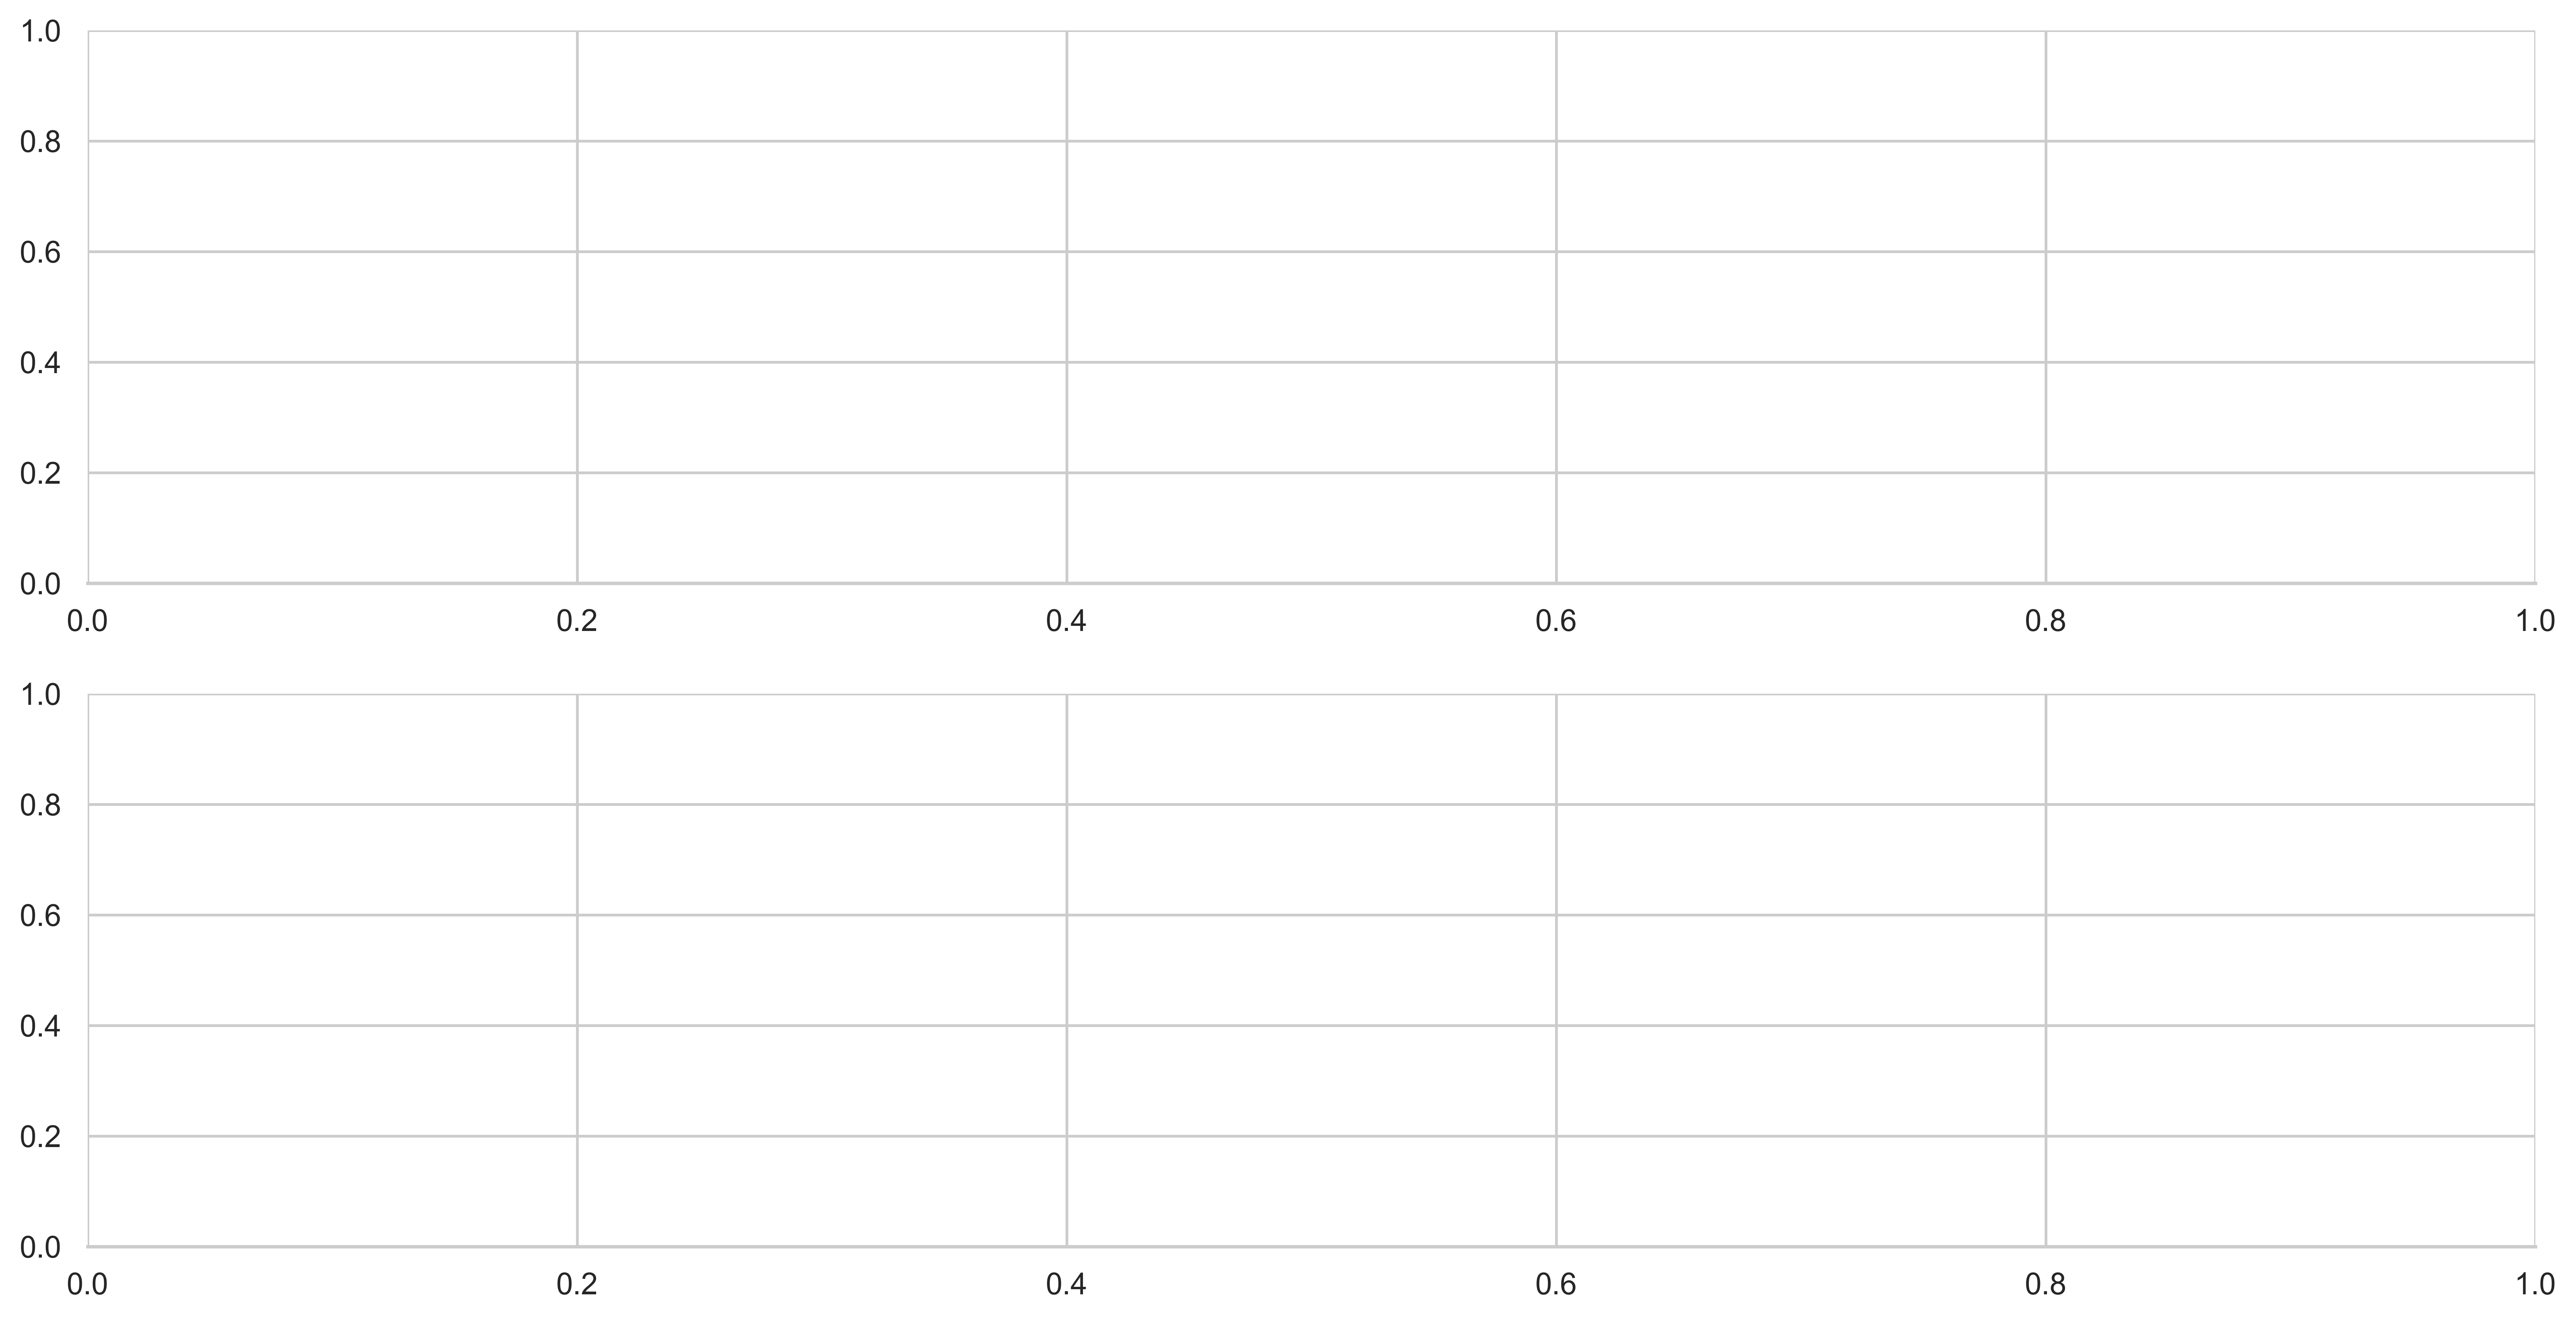

In [6]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')